<a href="https://colab.research.google.com/github/hichemfelouat/my-codes-of-machine-learning/blob/master/GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Convolutional GANs**

X_train shape =  (50000, 32, 32, 3)  X_test shape =  (10000, 32, 32, 3)


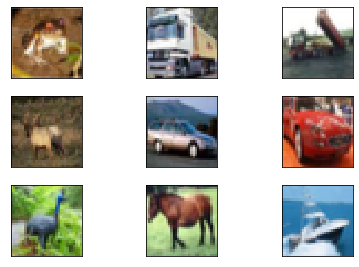

In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

# Using Keras to load the dataset
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print("X_train shape = ",X_train.shape," X_test shape = ",X_test.shape)

fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.xticks([])
  plt.yticks([])

# Scale the pixel intensities down to the [0,1] range by dividing them by 255.0 
X_train = X_train.astype("float32") / 255.0
# Creating a Dataset to iterate through the images
batch_size = 128
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [ ]:
# The Generator
# codings_size : the dimension of the input vector for the generator
codings_size = 100

def build_generator(codings_size=100):
    generator = tf.keras.Sequential()

    # latent variable as input
    generator.add(keras.layers.Dense(1024, activation="relu", input_shape=(codings_size,)))
    generator.add(keras.layers.BatchNormalization())
    generator.add(keras.layers.Dense(1024, activation="relu"))
    generator.add(keras.layers.BatchNormalization())
    generator.add(keras.layers.Dense(128*8*8, activation="relu"))
    generator.add(keras.layers.Reshape((8, 8, 128)))
    assert generator.output_shape == (None, 8, 8, 128)  # Note: None is the batch size

    generator.add(keras.layers.Conv2DTranspose(filters=128, kernel_size=2, strides=2, activation="relu", padding="same"))
    assert generator.output_shape == (None, 16, 16, 128)
    generator.add(keras.layers.BatchNormalization())

    generator.add(keras.layers.Conv2DTranspose(filters=3, kernel_size=2, strides=2, activation="tanh", padding="same"))
    assert generator.output_shape == (None, 32, 32, 3)
    generator.add(keras.layers.BatchNormalization())
    
    return generator

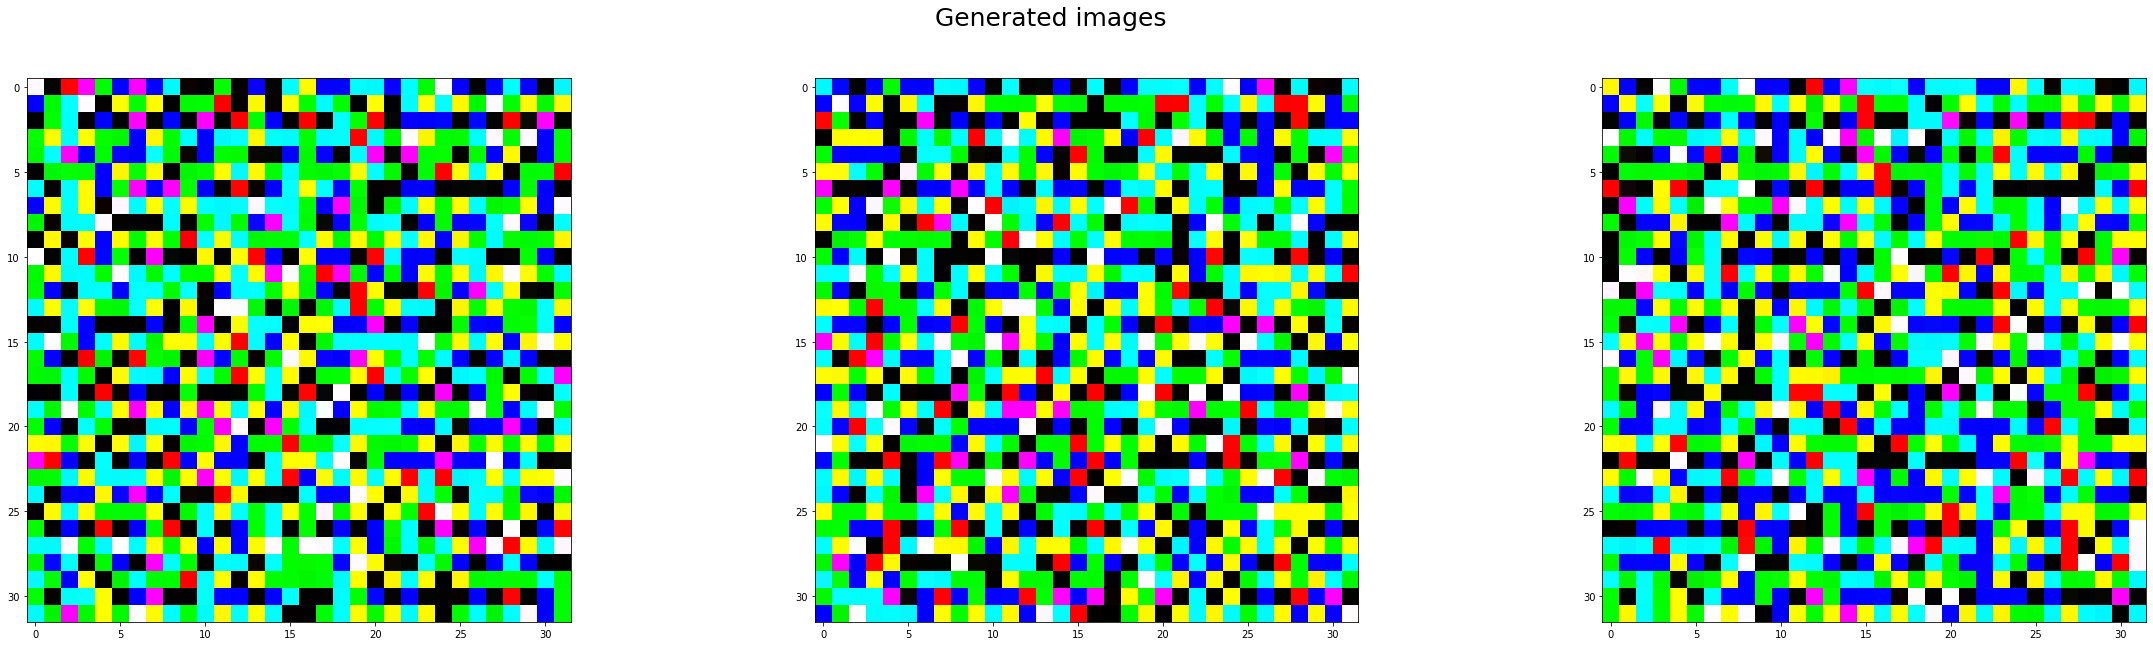

In [ ]:
generator = build_generator()
nbr_imgs = 3

def plot_generated_images(nbr_imgs, titleadd=""):
    noise = tf.random.normal([nbr_imgs, 100])
    imgs = generator.predict(noise)
    
    fig = plt.figure(figsize=(40,10))
    for i, img in enumerate(imgs):
        ax = fig.add_subplot(1,nbr_imgs,i+1)
        ax.imshow((img * 255).astype(np.uint8))
    fig.suptitle("Generated images"+titleadd,fontsize=25)
    plt.show()
  
plot_generated_images(nbr_imgs)  

In [ ]:
# discriminator
def build_discriminator():
    discriminator = tf.keras.Sequential()

    discriminator.add(keras.layers.Conv2D(filters=64, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same", input_shape=(32, 32, 3)))
    discriminator.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
    discriminator.add(keras.layers.Conv2D(filters=128, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
    discriminator.add(keras.layers.Conv2D(filters=256, kernel_size=3, strides=2, 
            activation=keras.layers.LeakyReLU(0.2), padding="same"))
  
    # classifier
    discriminator.add(keras.layers.Flatten())
    discriminator.add(keras.layers.Dropout(0.4))
    # discriminator.add(keras.layers.Dense(1024, activation=keras.layers.LeakyReLU(0.2)))
    discriminator.add(keras.layers.Dense(1, activation="sigmoid"))

    return discriminator

discriminator = build_discriminator()

# compile model
opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
discriminator.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
discriminator.trainable = False

---------------------------------------------------------------
epoch :  0  d_loss =  [0.1449032723903656, 0.9453125]  g_loss =  2.6530306339263916


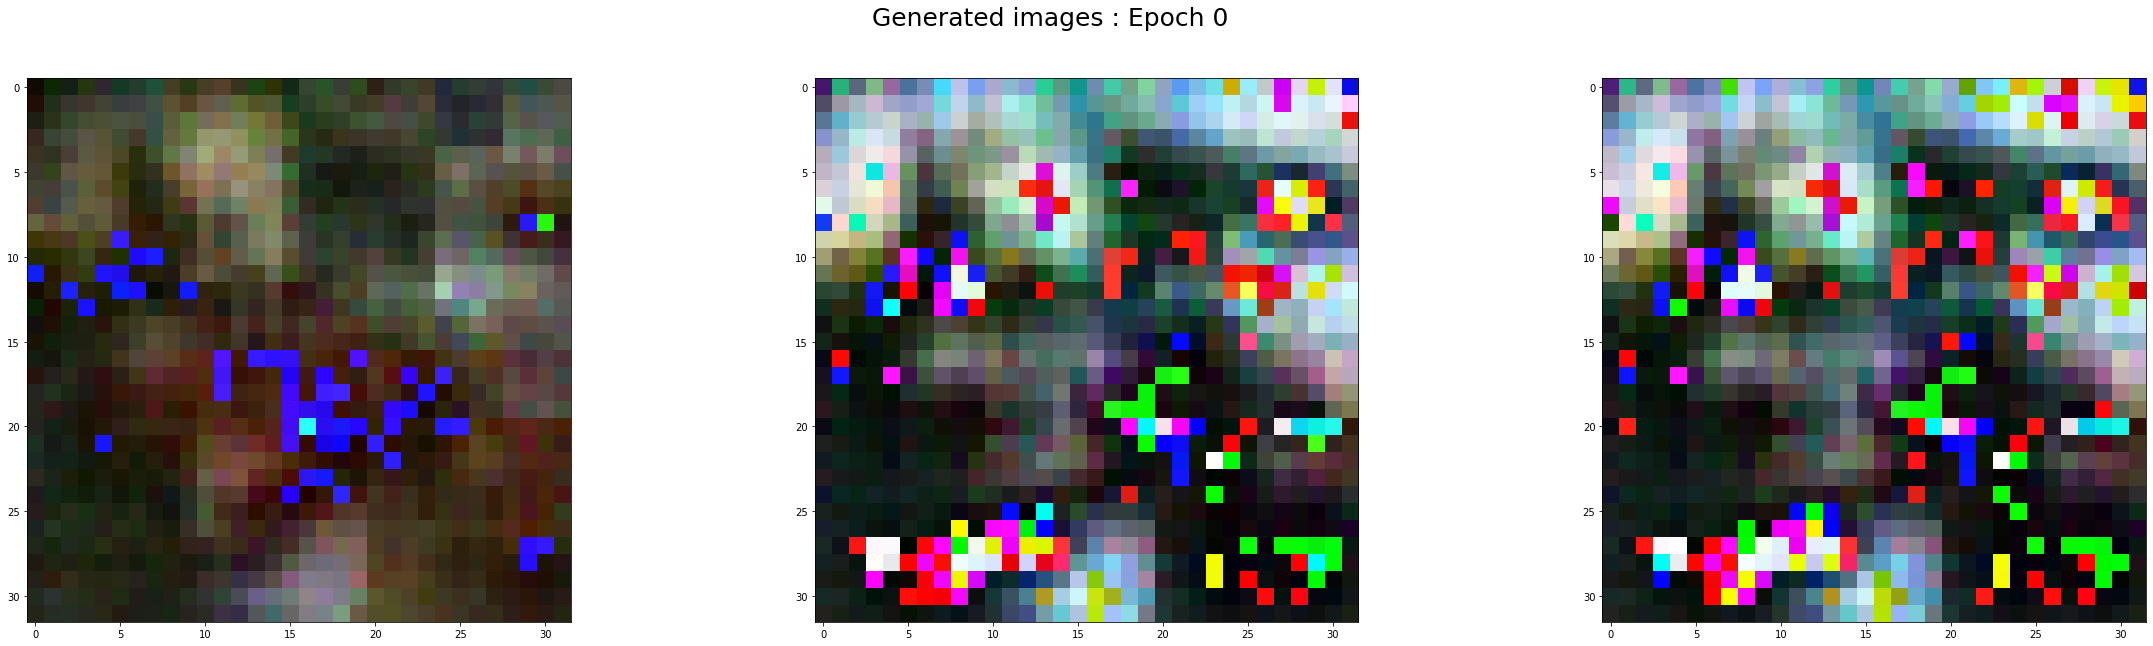

---------------------------------------------------------------
epoch :  1  d_loss =  [0.24768568575382233, 0.921875]  g_loss =  2.1571969985961914


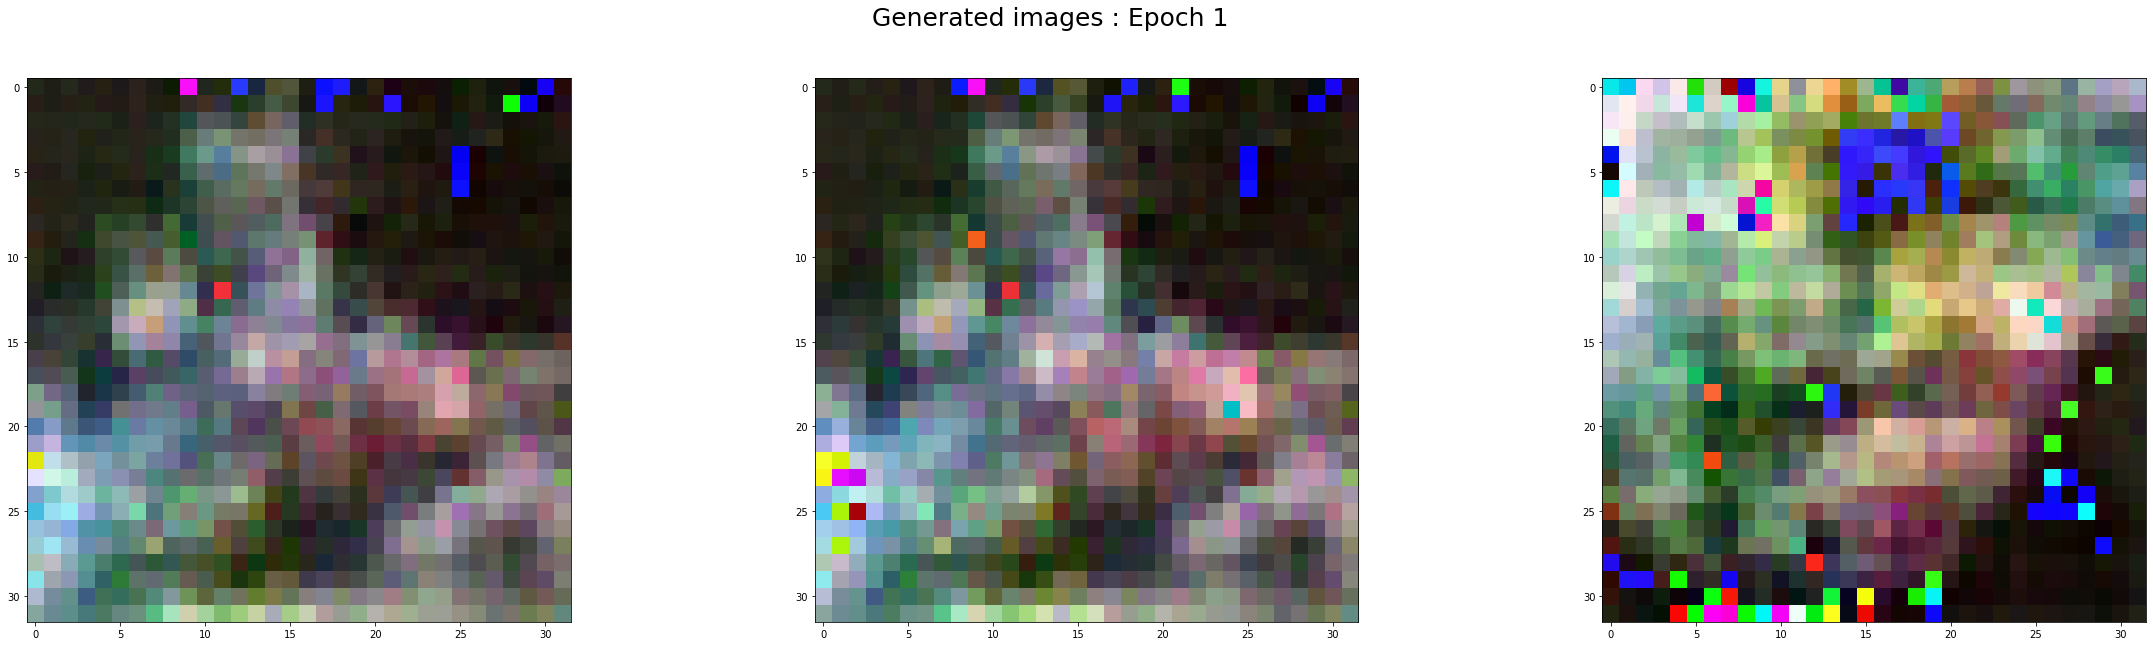

---------------------------------------------------------------
epoch :  2  d_loss =  [0.4184306263923645, 0.86328125]  g_loss =  2.1109352111816406


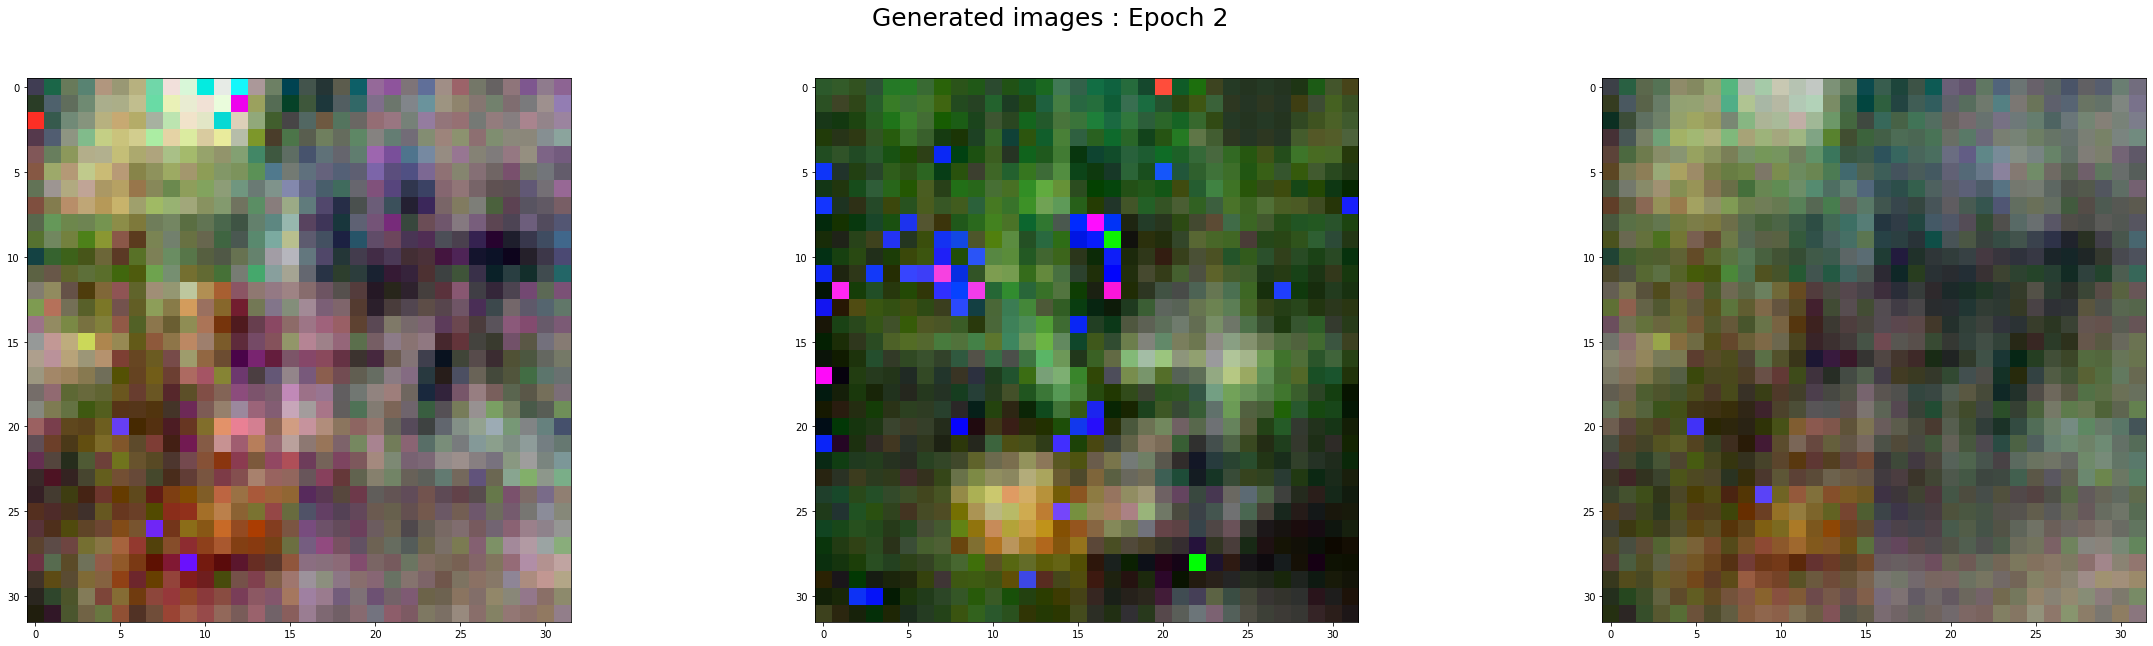

---------------------------------------------------------------
epoch :  3  d_loss =  [0.4387025237083435, 0.8046875]  g_loss =  1.1719194650650024


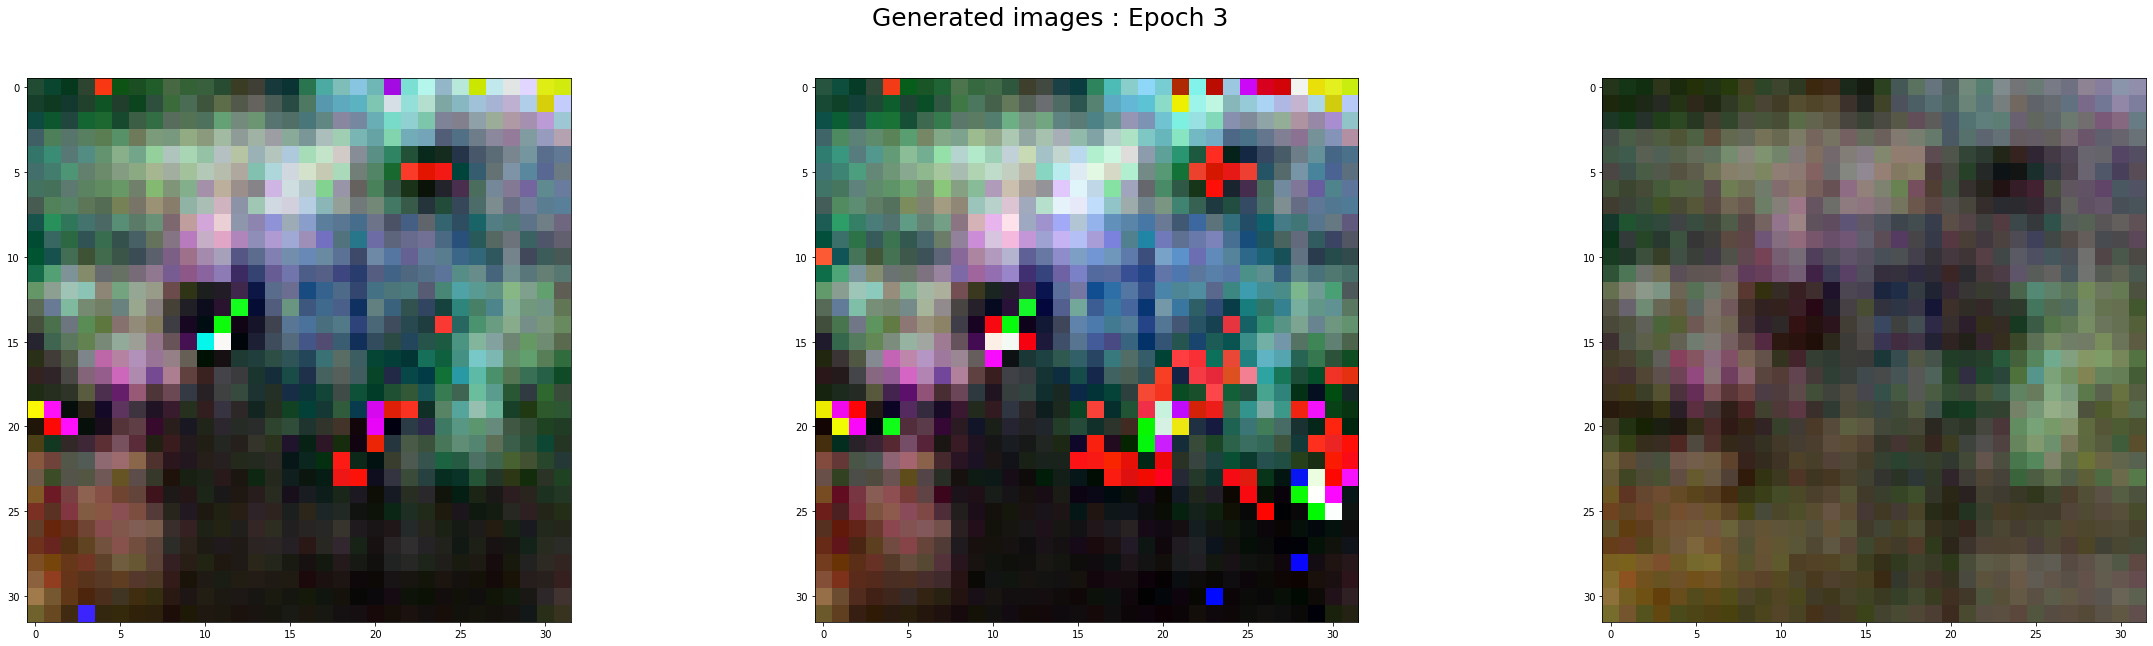

---------------------------------------------------------------
epoch :  4  d_loss =  [0.404226154088974, 0.83203125]  g_loss =  0.9994319677352905


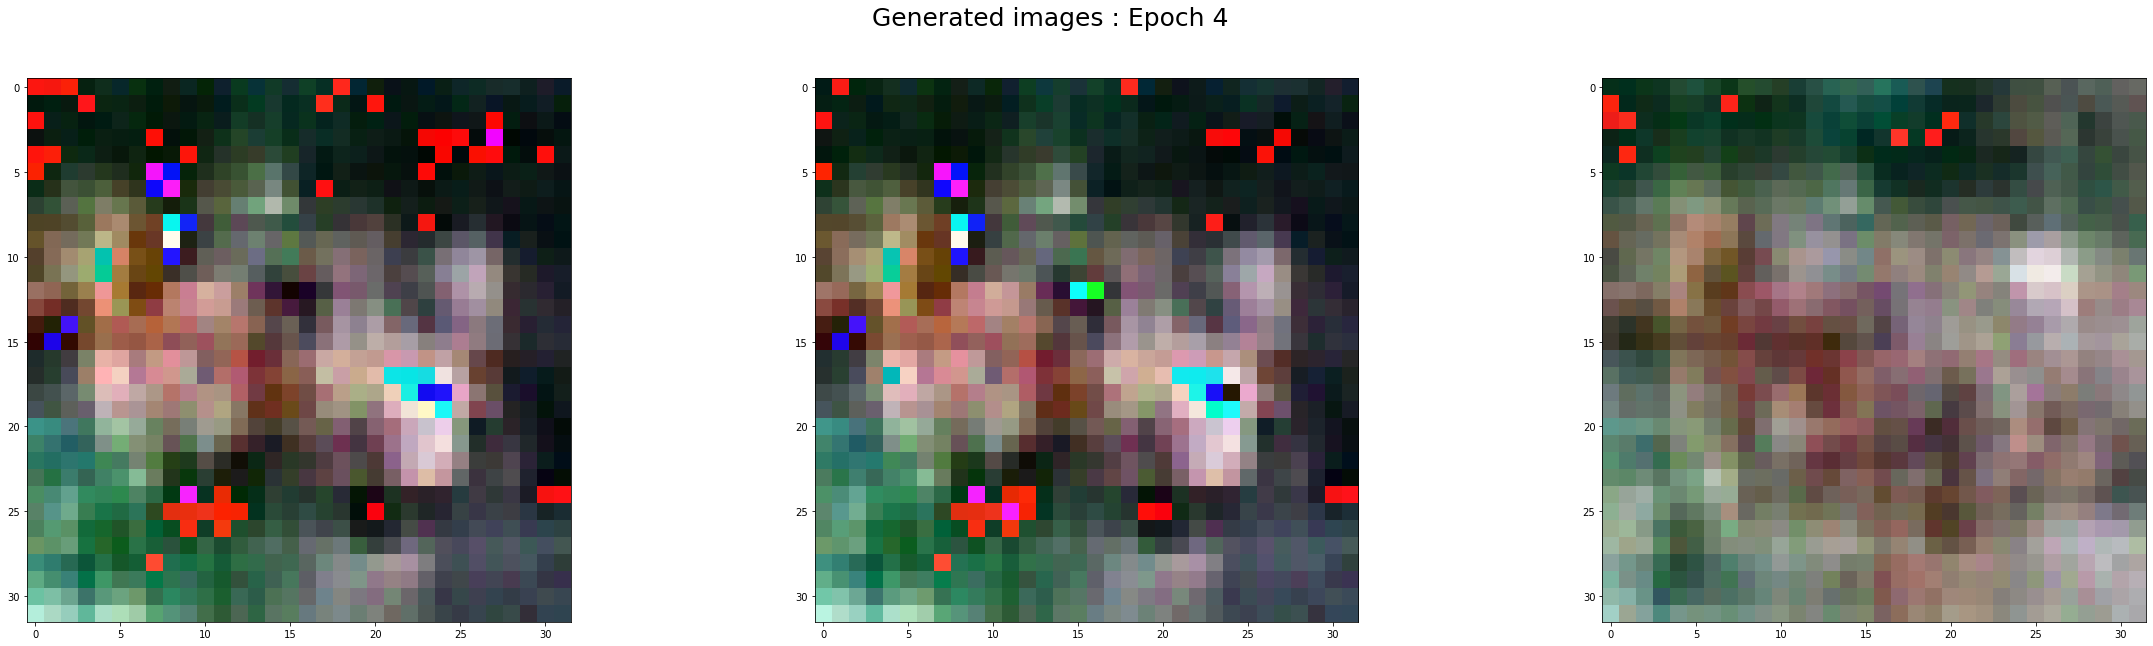

---------------------------------------------------------------
epoch :  5  d_loss =  [0.4651319980621338, 0.76171875]  g_loss =  1.1172188520431519


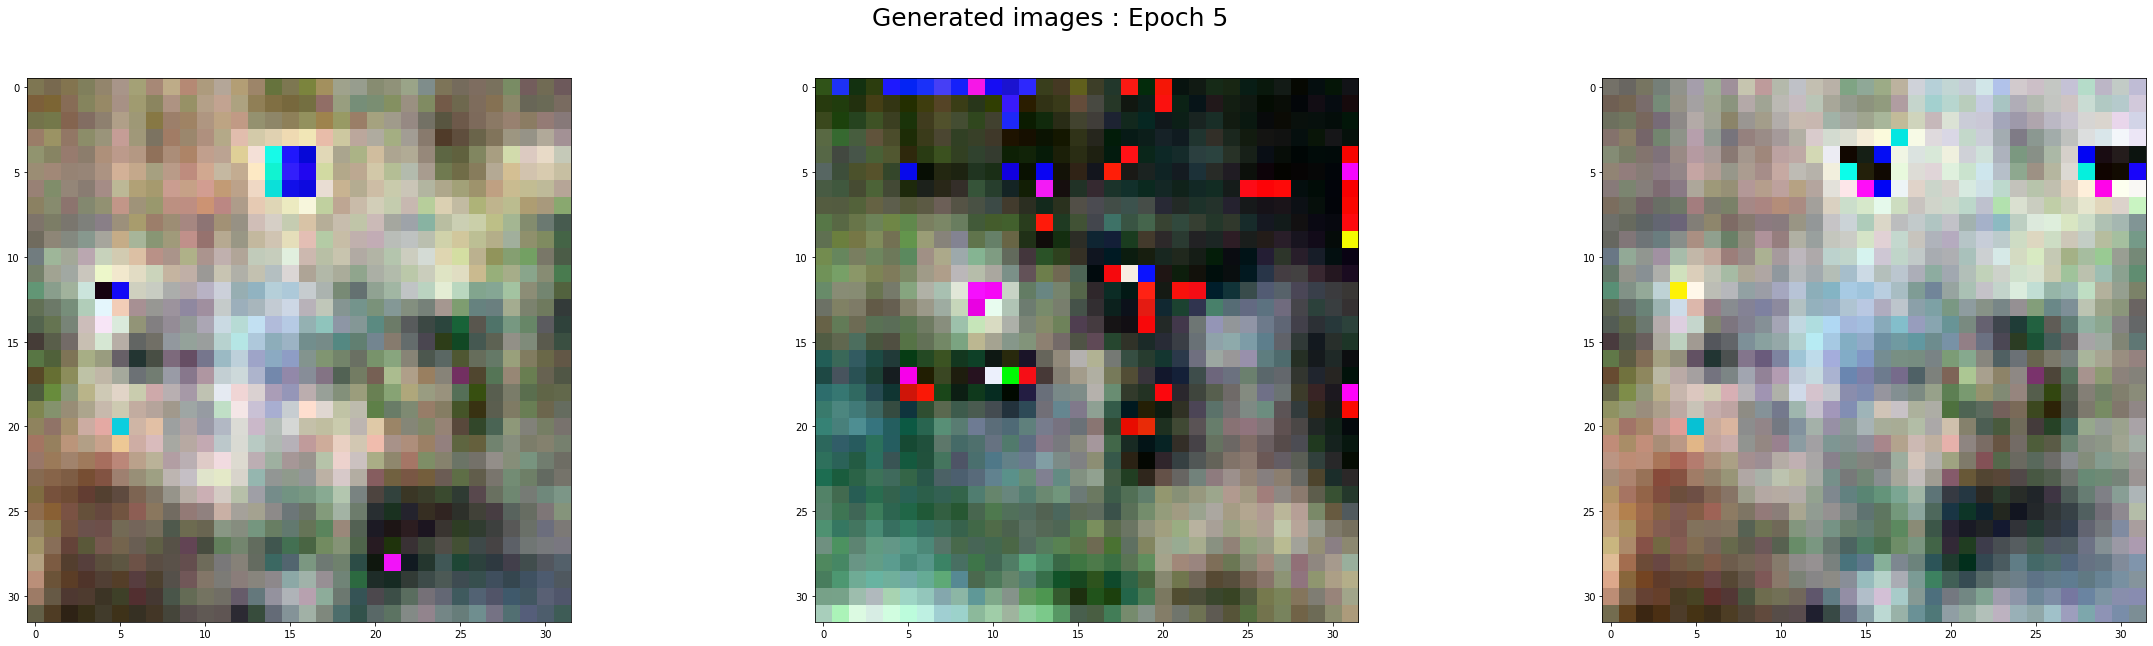

---------------------------------------------------------------
epoch :  6  d_loss =  [0.5632829666137695, 0.7421875]  g_loss =  0.9129171371459961


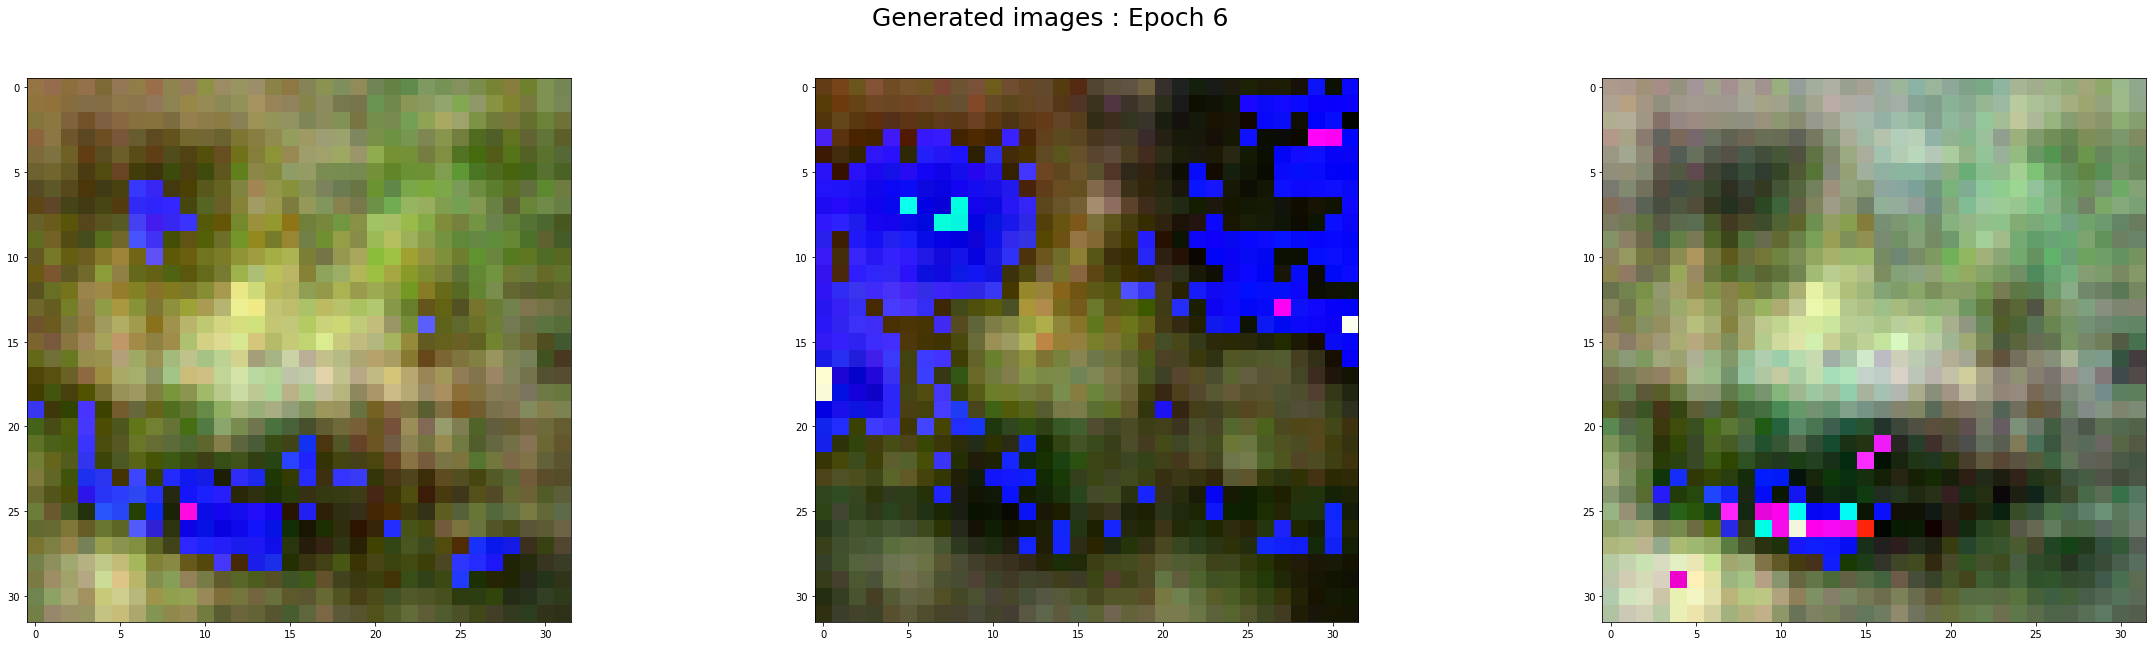

---------------------------------------------------------------
epoch :  7  d_loss =  [0.5766781568527222, 0.69140625]  g_loss =  0.9743303060531616


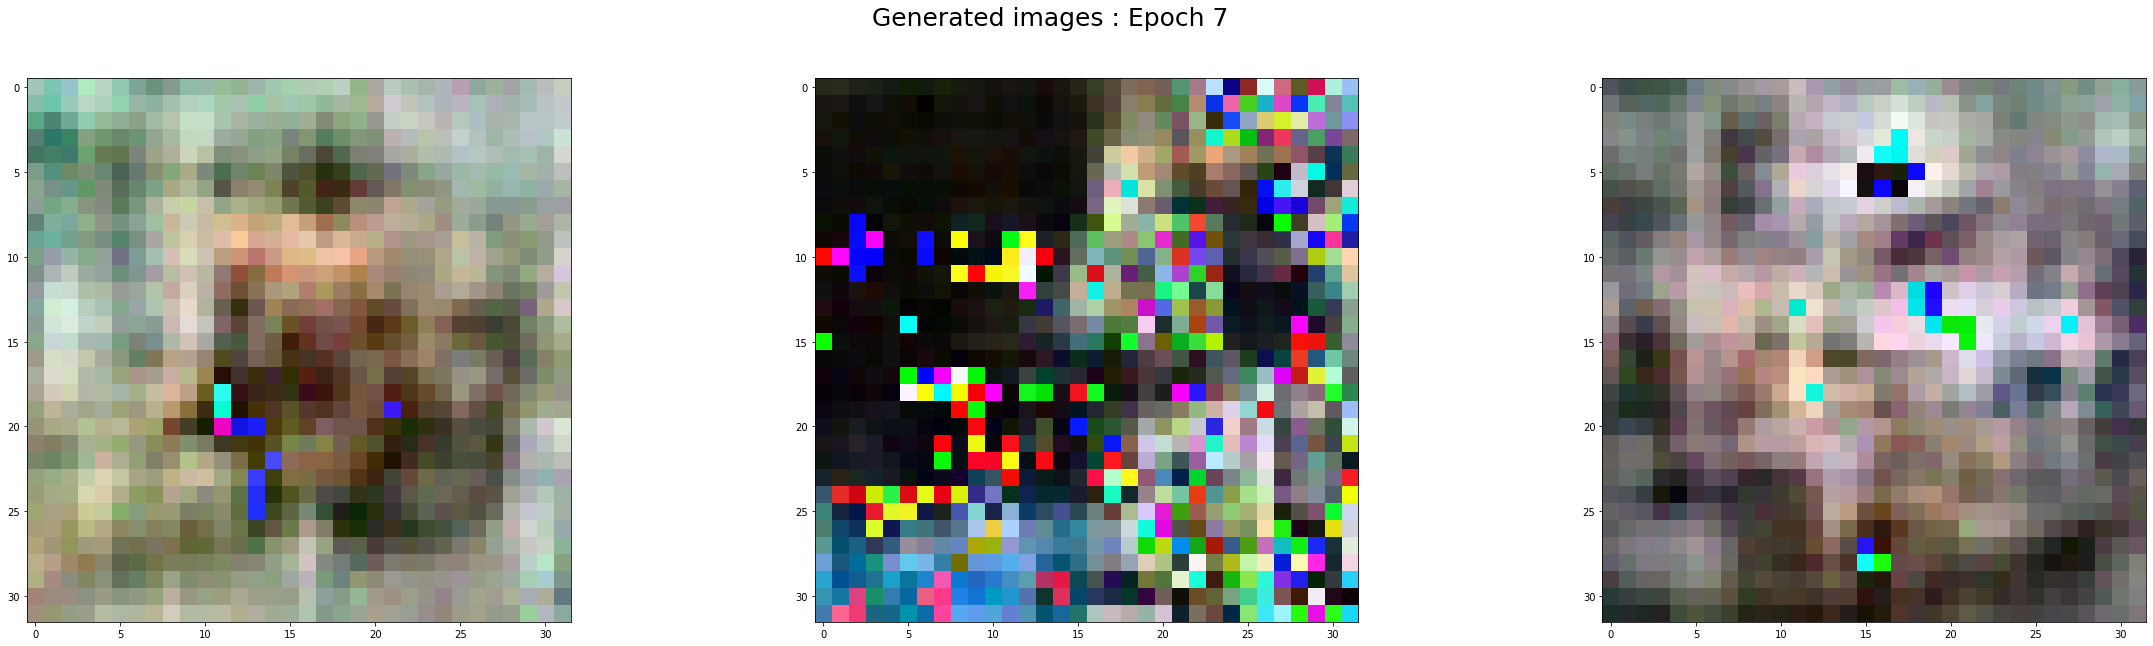

---------------------------------------------------------------
epoch :  8  d_loss =  [0.5509641766548157, 0.7421875]  g_loss =  0.7898291349411011


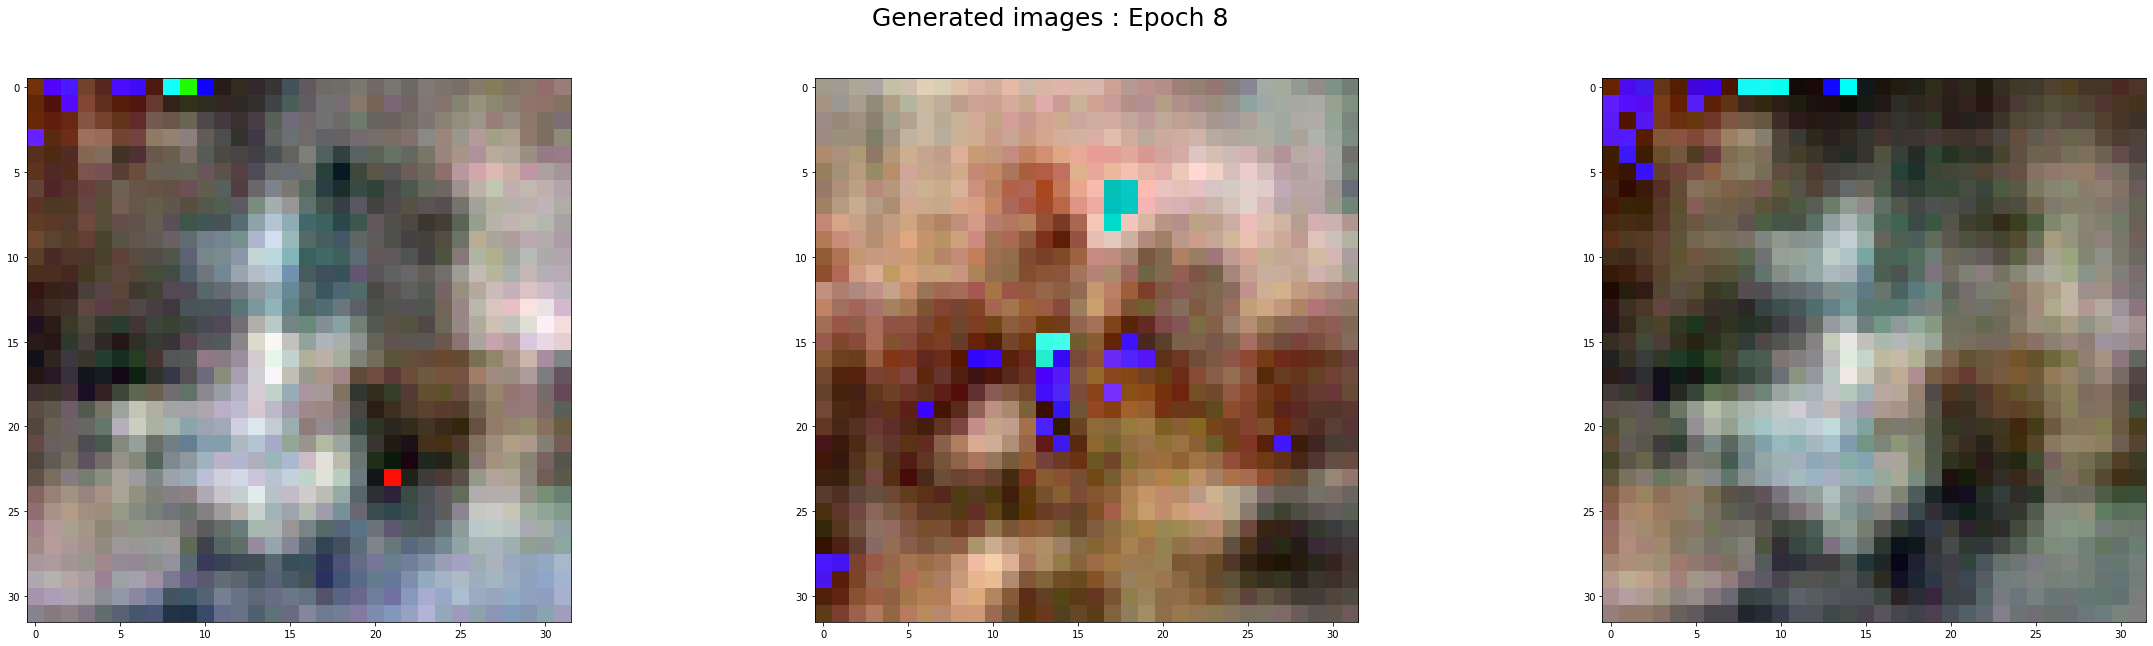

---------------------------------------------------------------
epoch :  9  d_loss =  [0.578855574131012, 0.671875]  g_loss =  1.3753467798233032


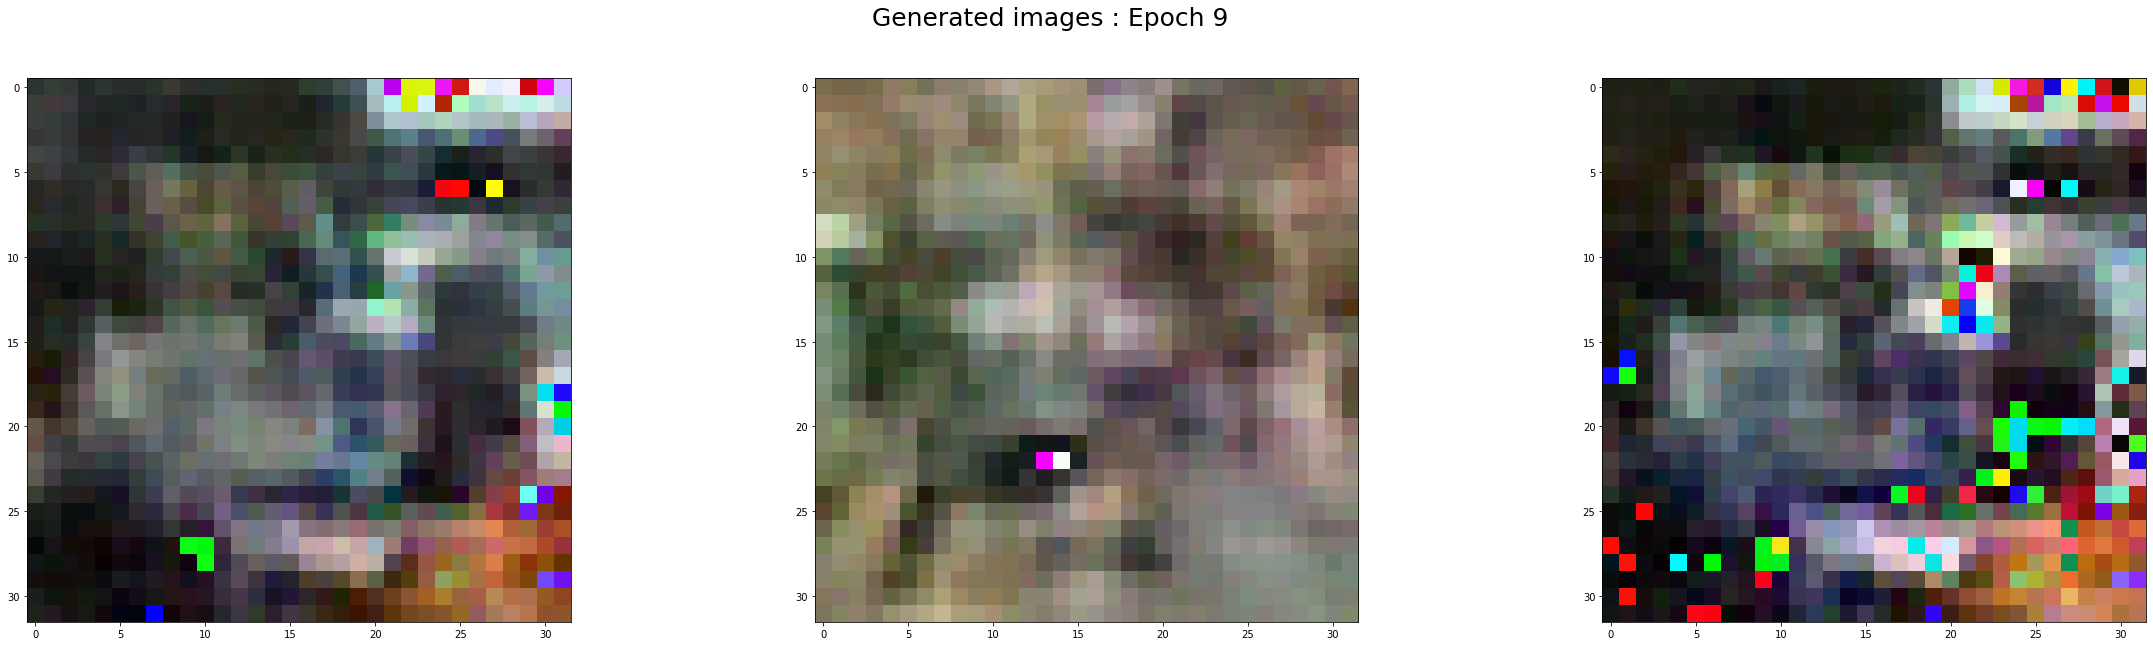

---------------------------------------------------------------
epoch :  10  d_loss =  [0.5993070006370544, 0.65625]  g_loss =  0.7088280916213989


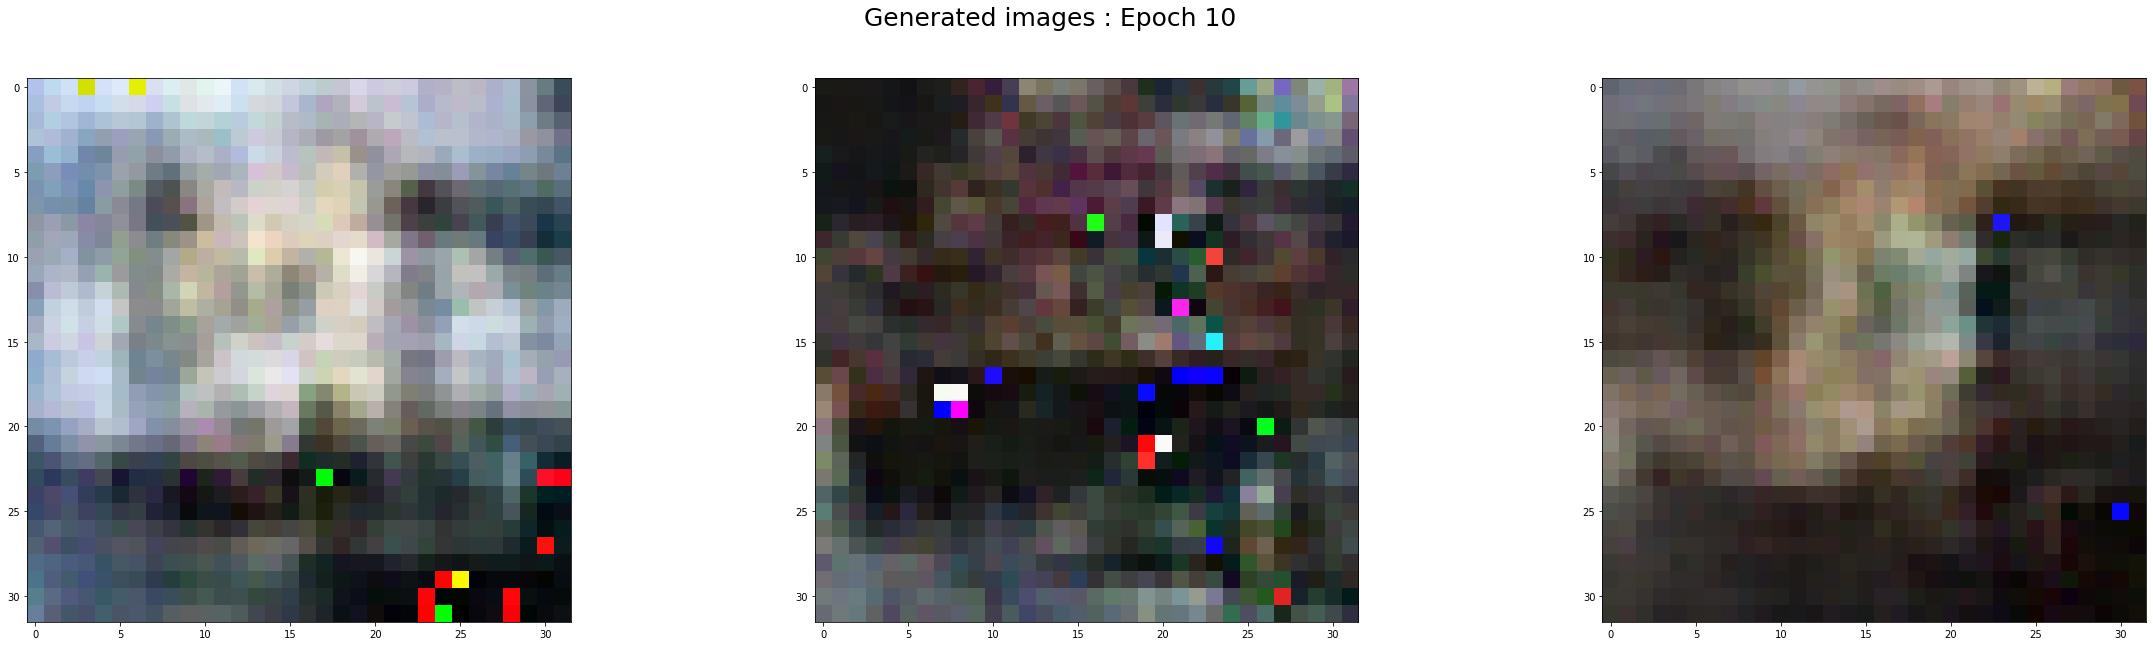

---------------------------------------------------------------
epoch :  11  d_loss =  [0.8097754120826721, 0.515625]  g_loss =  1.0821397304534912


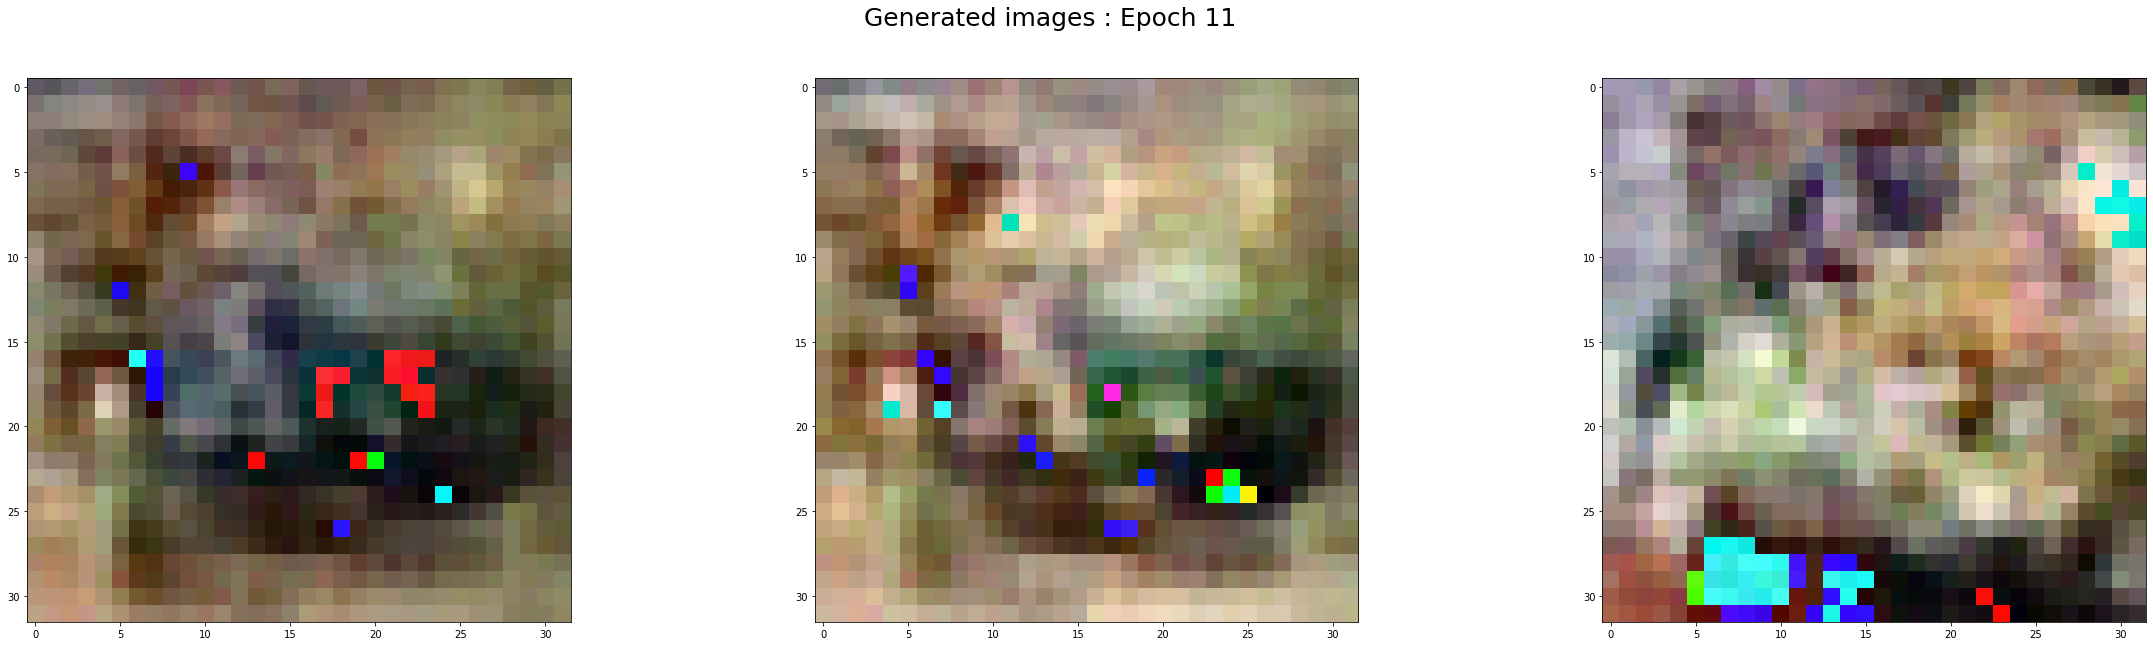

---------------------------------------------------------------
epoch :  12  d_loss =  [0.5983564257621765, 0.67578125]  g_loss =  0.9438577890396118


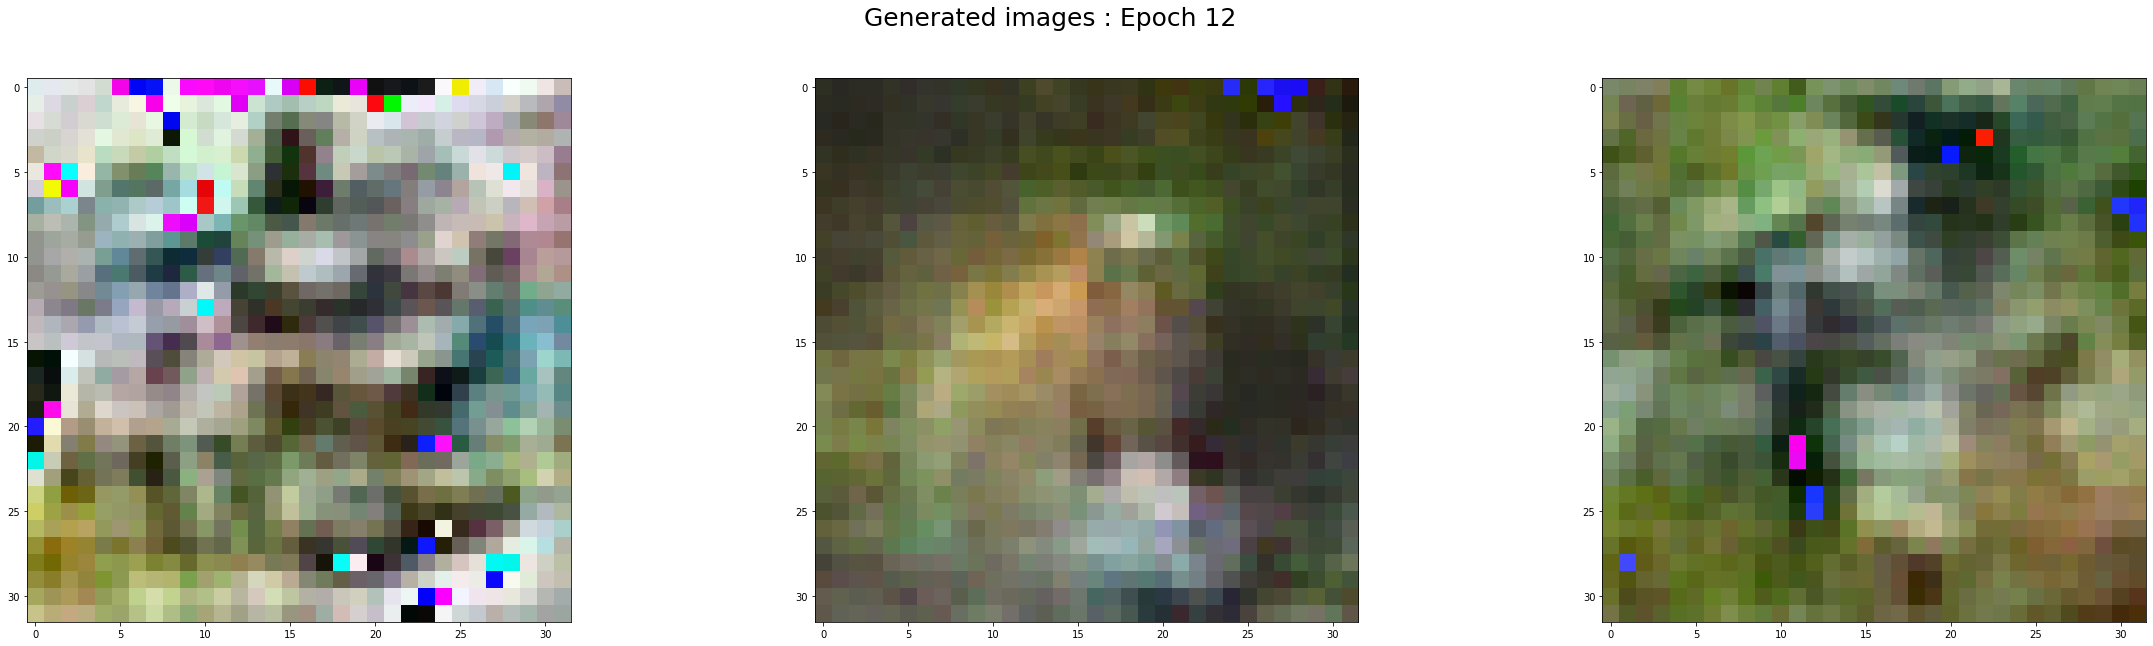

---------------------------------------------------------------
epoch :  13  d_loss =  [0.6284429430961609, 0.64453125]  g_loss =  0.7370817065238953


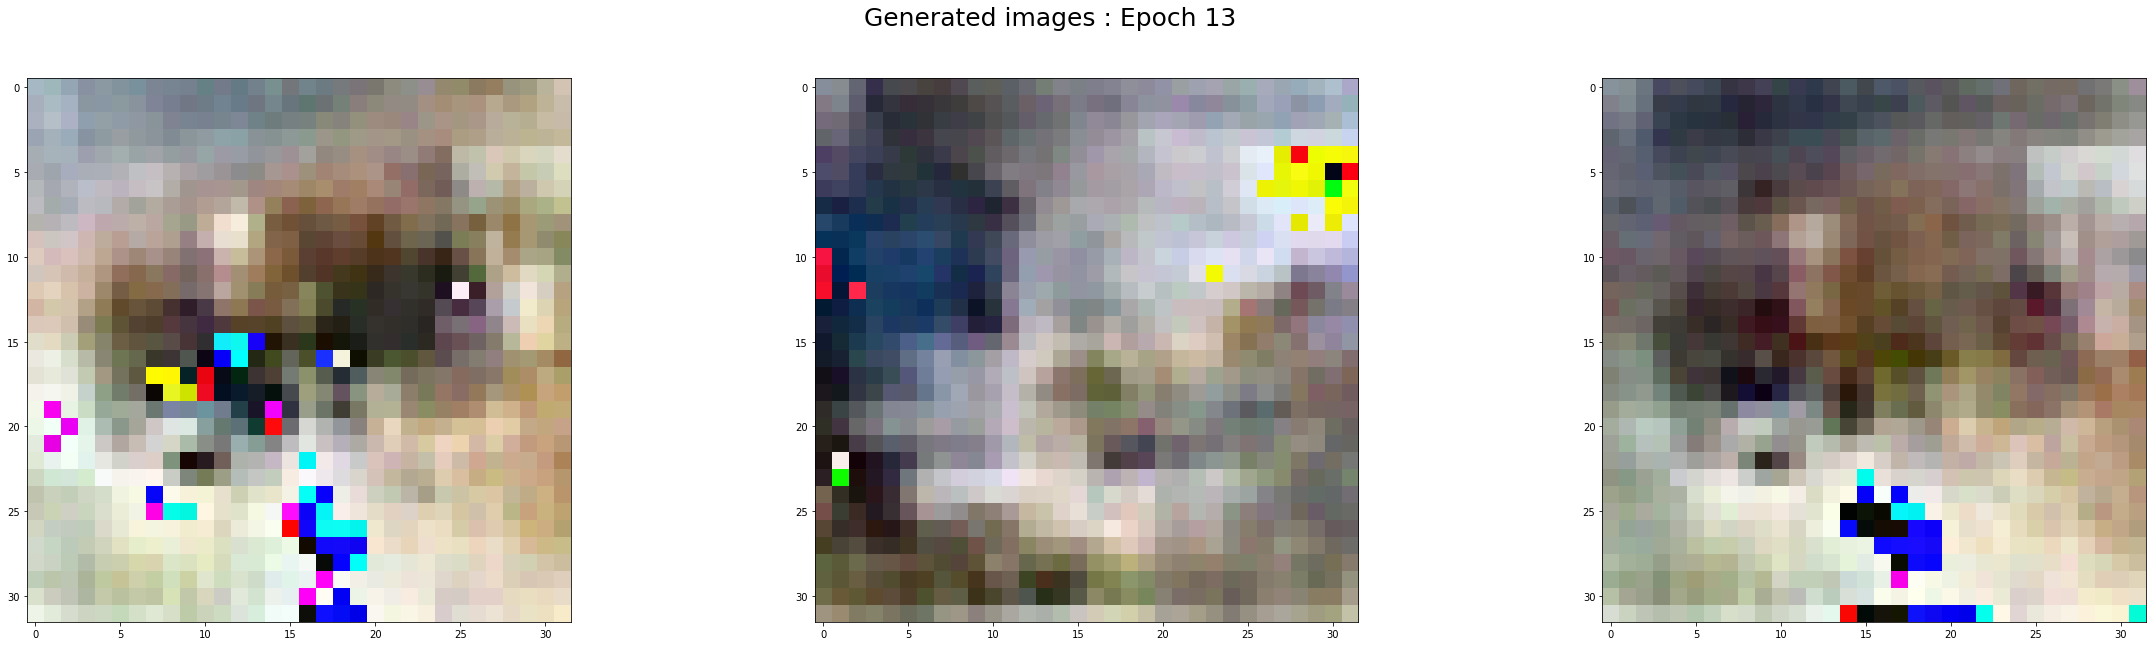

---------------------------------------------------------------
epoch :  14  d_loss =  [0.557517409324646, 0.71875]  g_loss =  0.7287804484367371


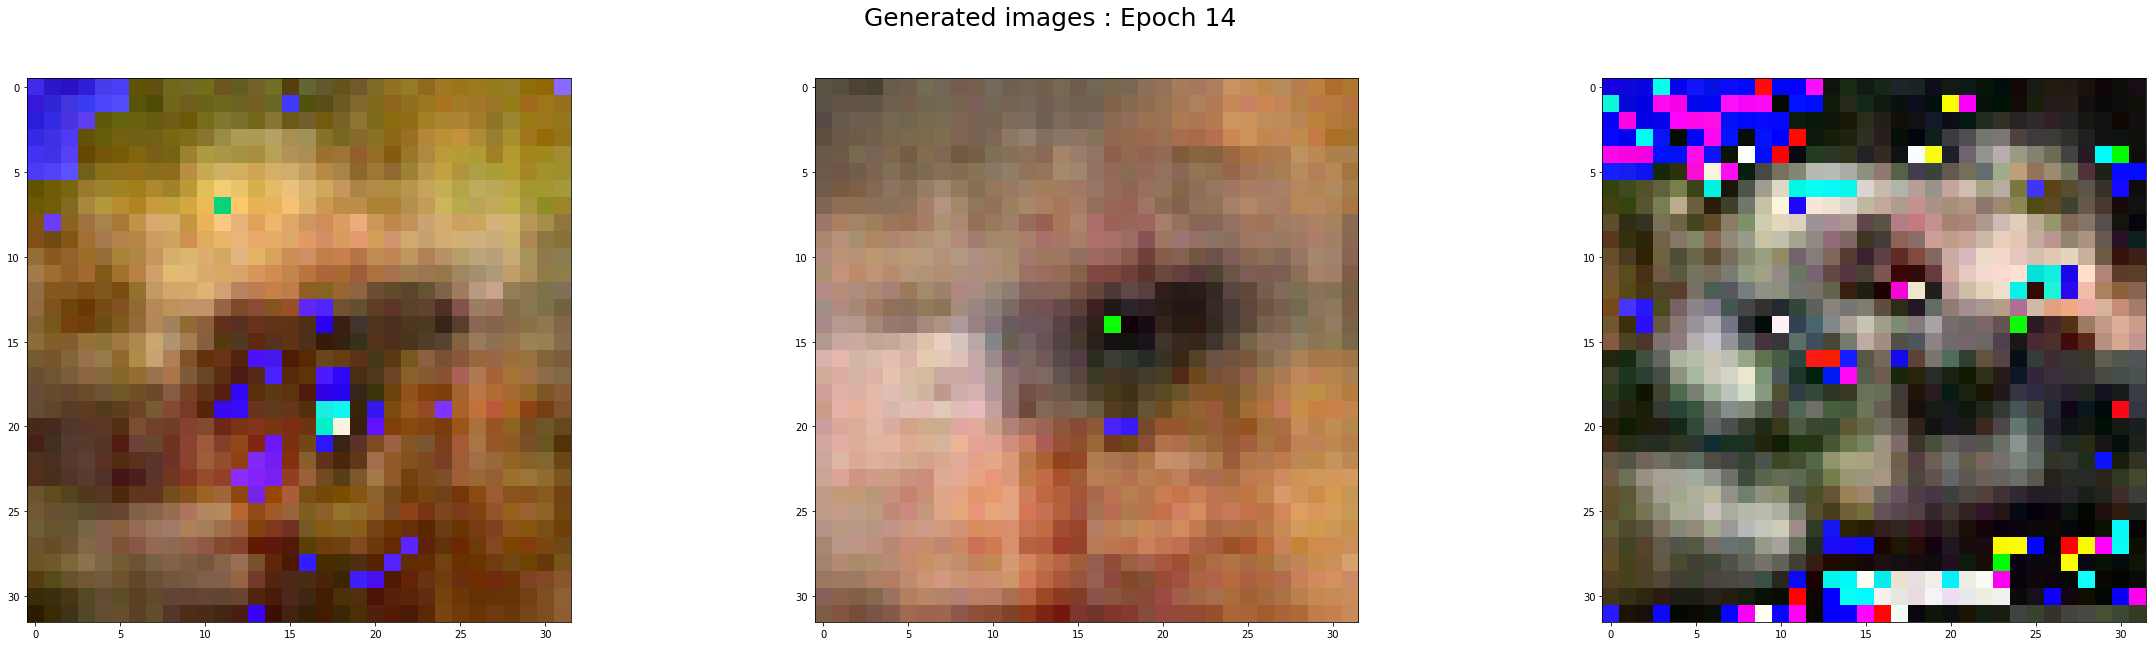

---------------------------------------------------------------
epoch :  15  d_loss =  [0.5768007040023804, 0.69140625]  g_loss =  0.8724890947341919


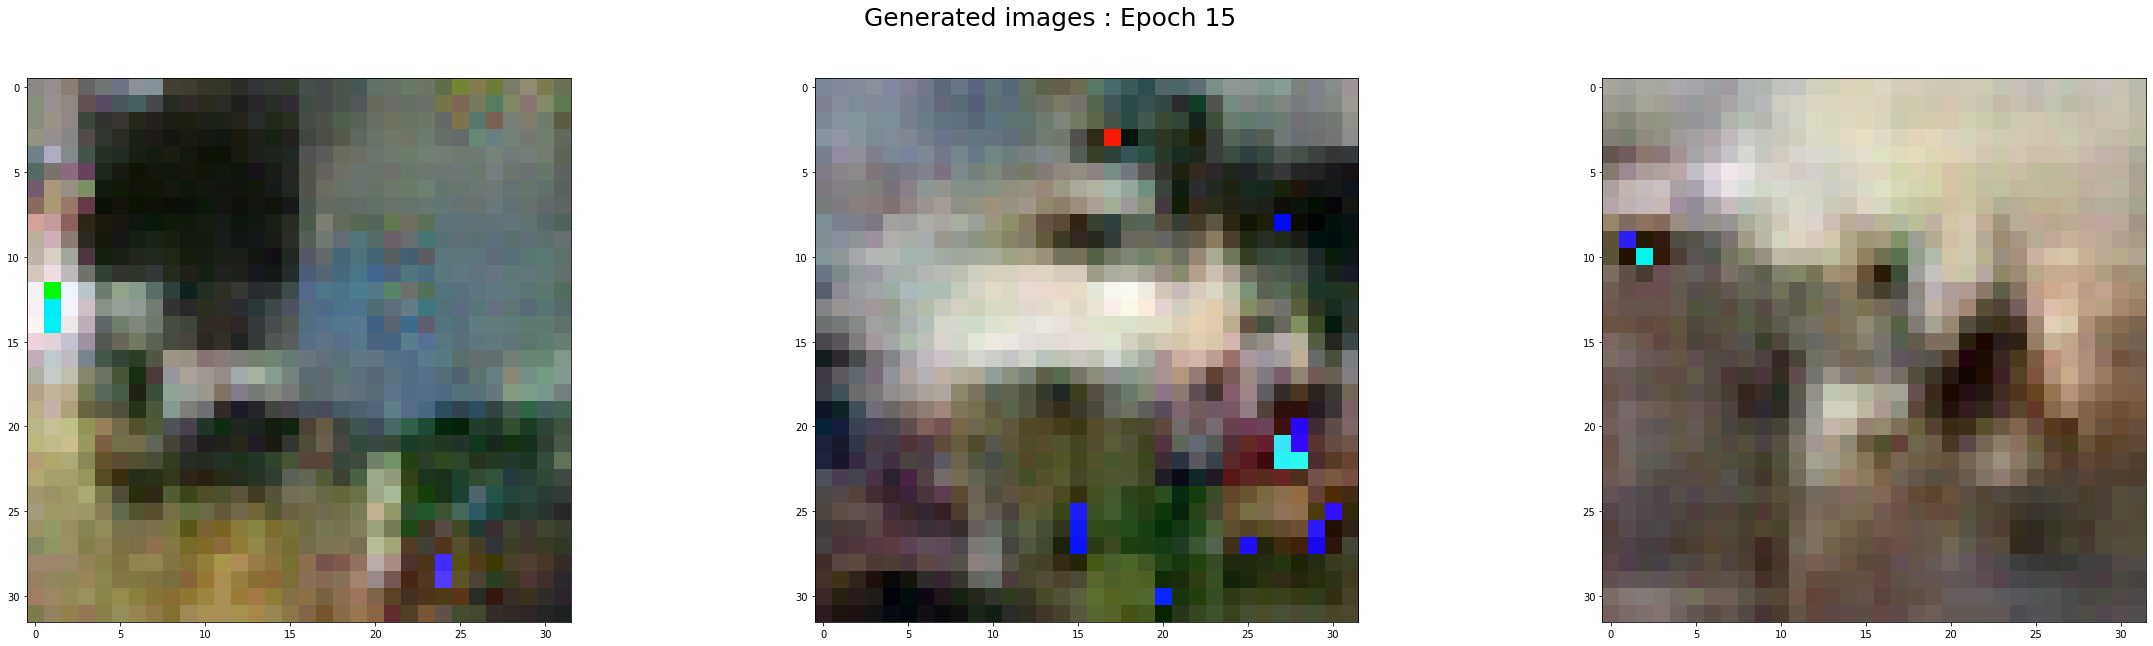

---------------------------------------------------------------
epoch :  16  d_loss =  [0.5205584764480591, 0.77734375]  g_loss =  0.9546021223068237


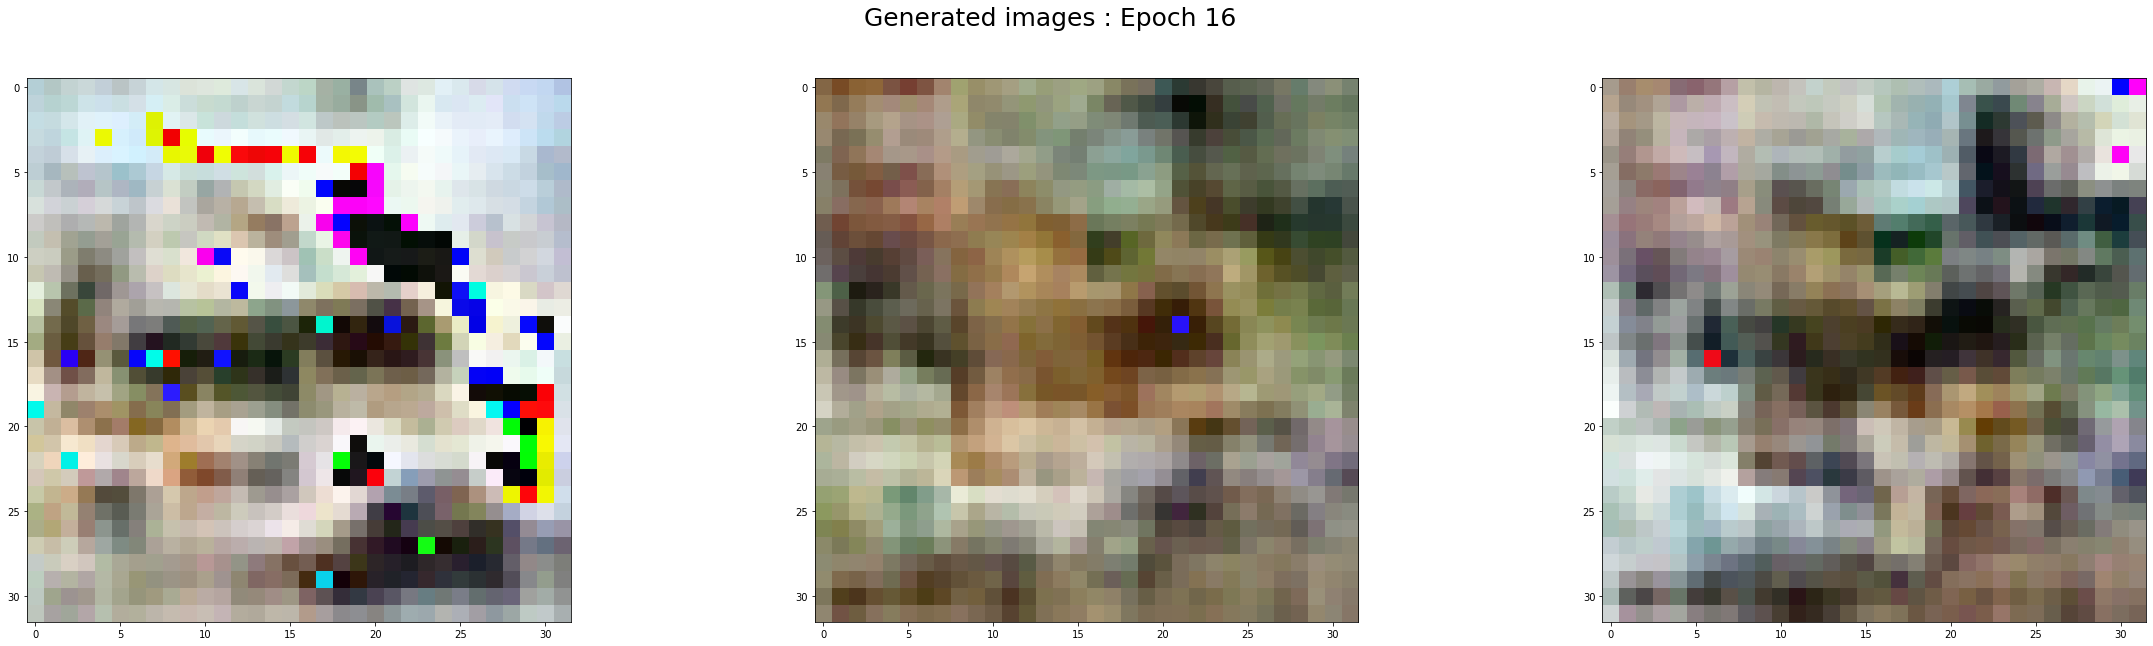

---------------------------------------------------------------
epoch :  17  d_loss =  [0.6424612402915955, 0.62890625]  g_loss =  1.0441628694534302


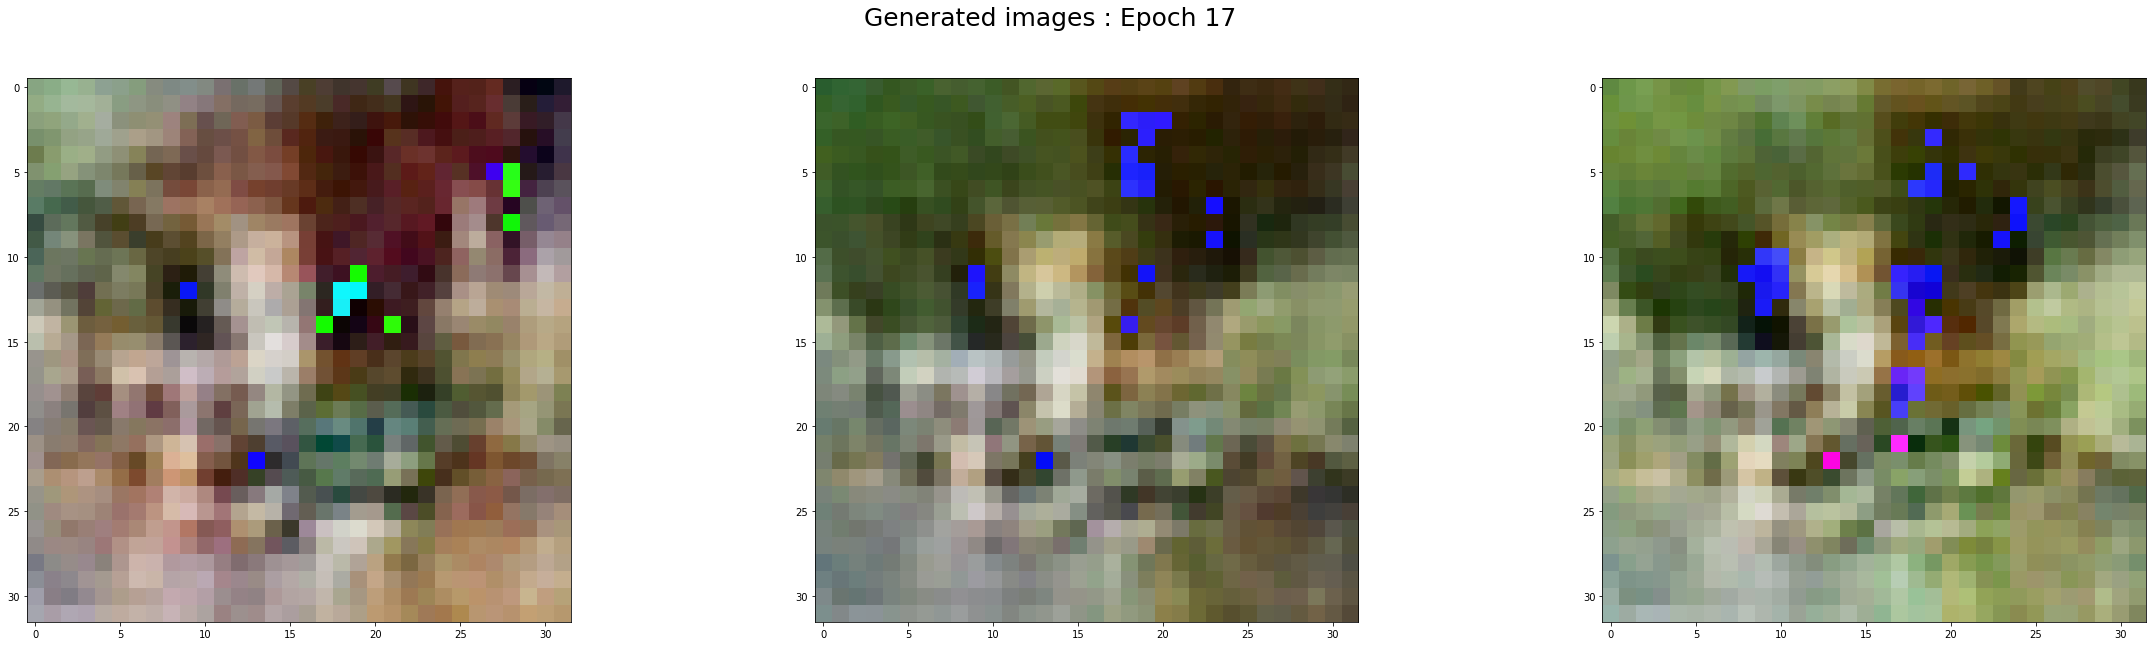

---------------------------------------------------------------
epoch :  18  d_loss =  [0.656510055065155, 0.625]  g_loss =  0.8614206314086914


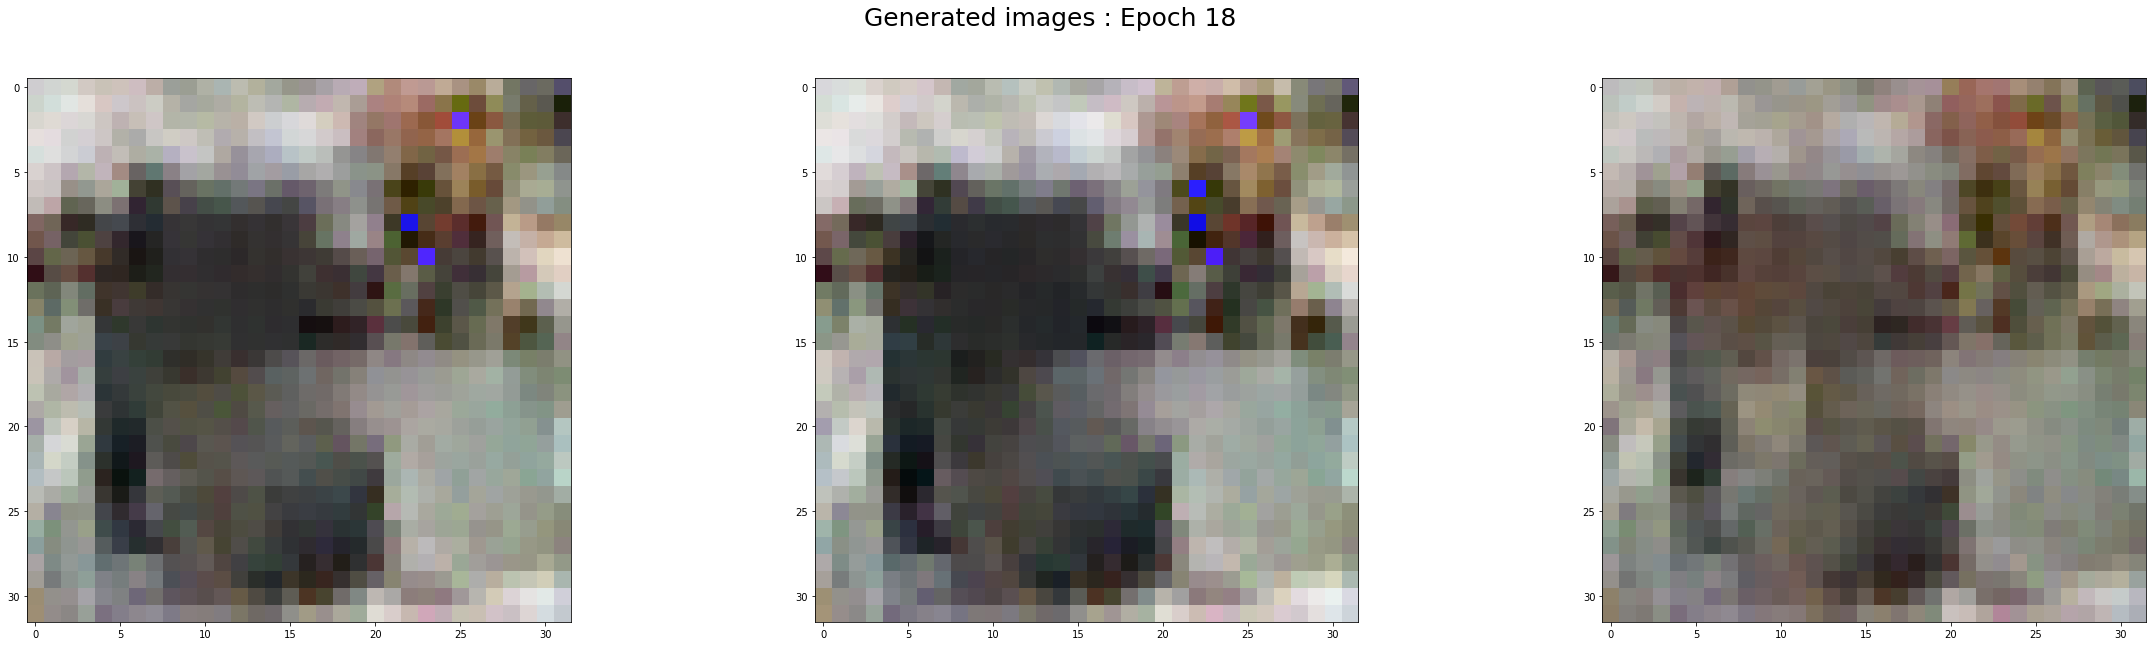

---------------------------------------------------------------
epoch :  19  d_loss =  [0.5847226977348328, 0.70703125]  g_loss =  0.9438526034355164


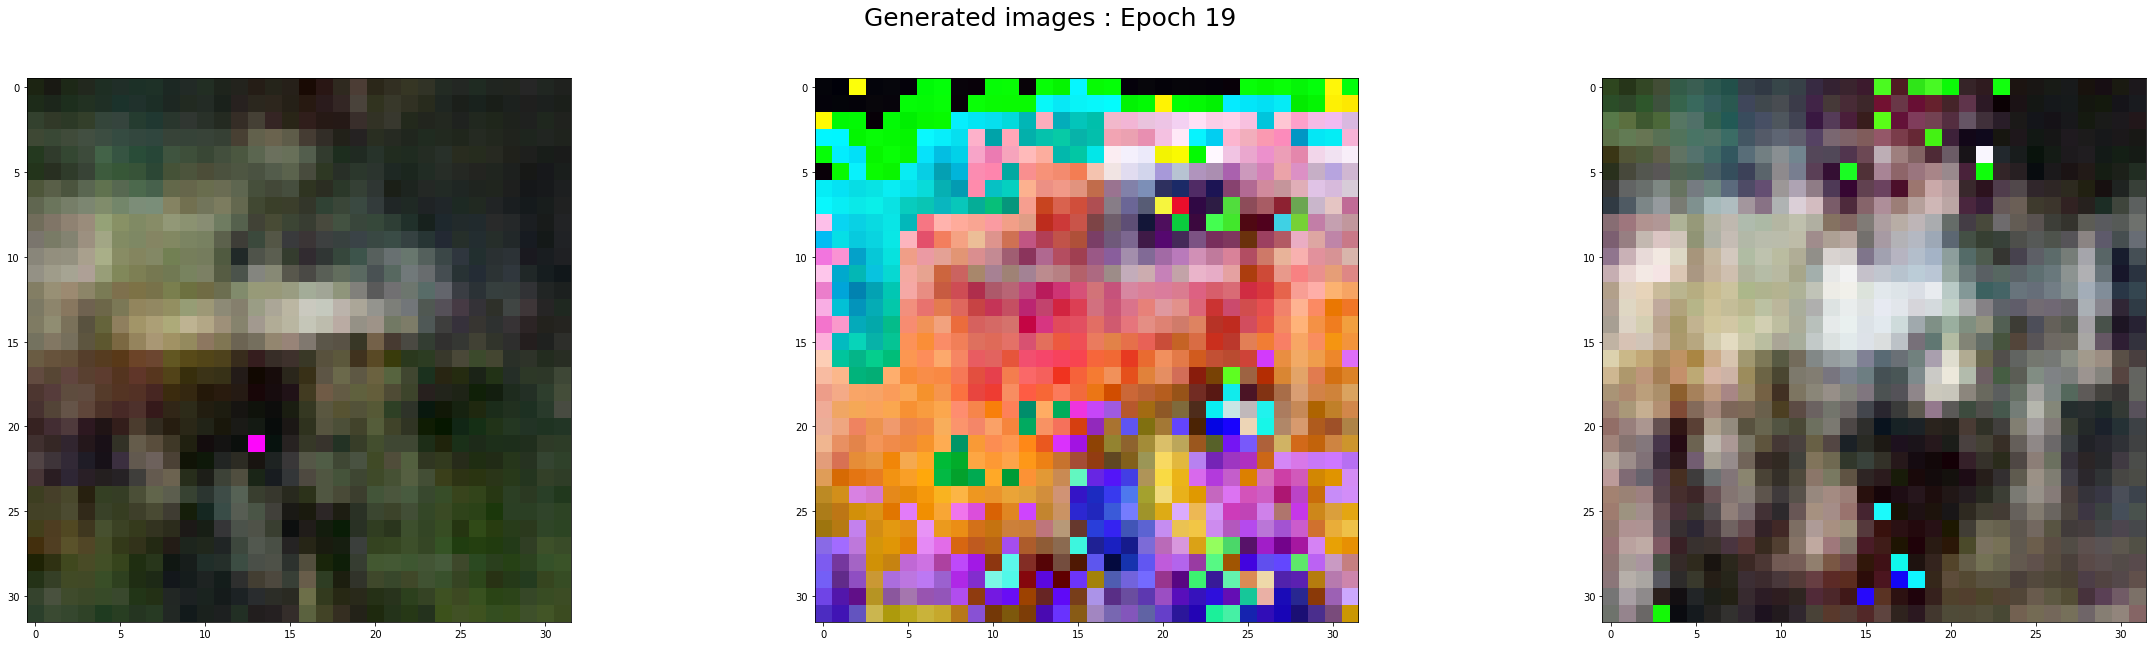

---------------------------------------------------------------
epoch :  20  d_loss =  [0.605617105960846, 0.671875]  g_loss =  0.7712477445602417


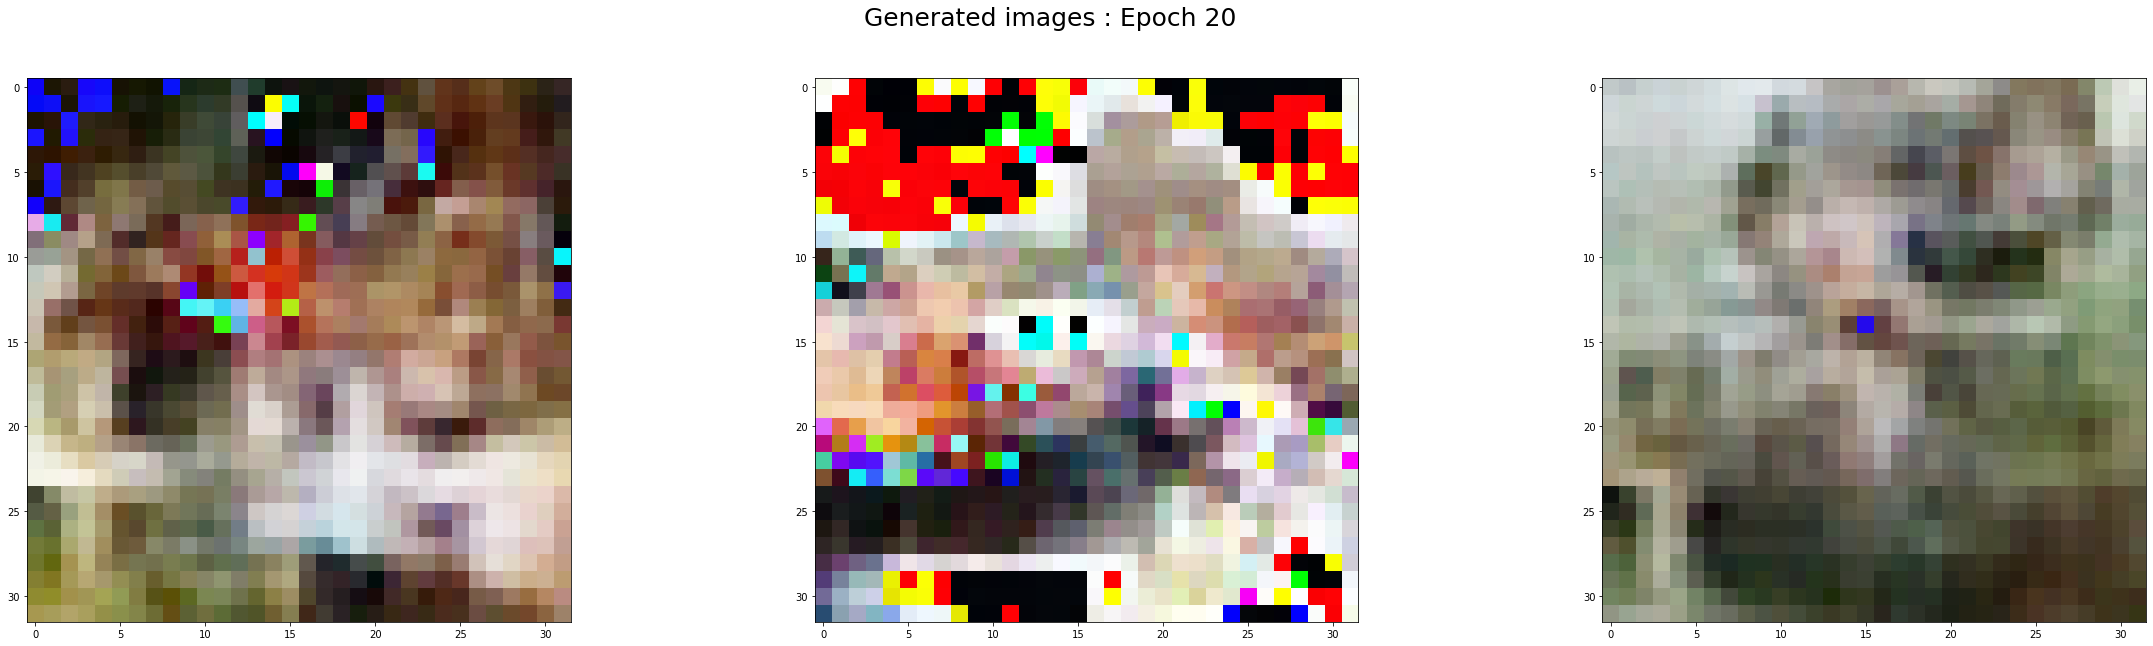

---------------------------------------------------------------
epoch :  21  d_loss =  [0.58518385887146, 0.6953125]  g_loss =  0.6552270650863647


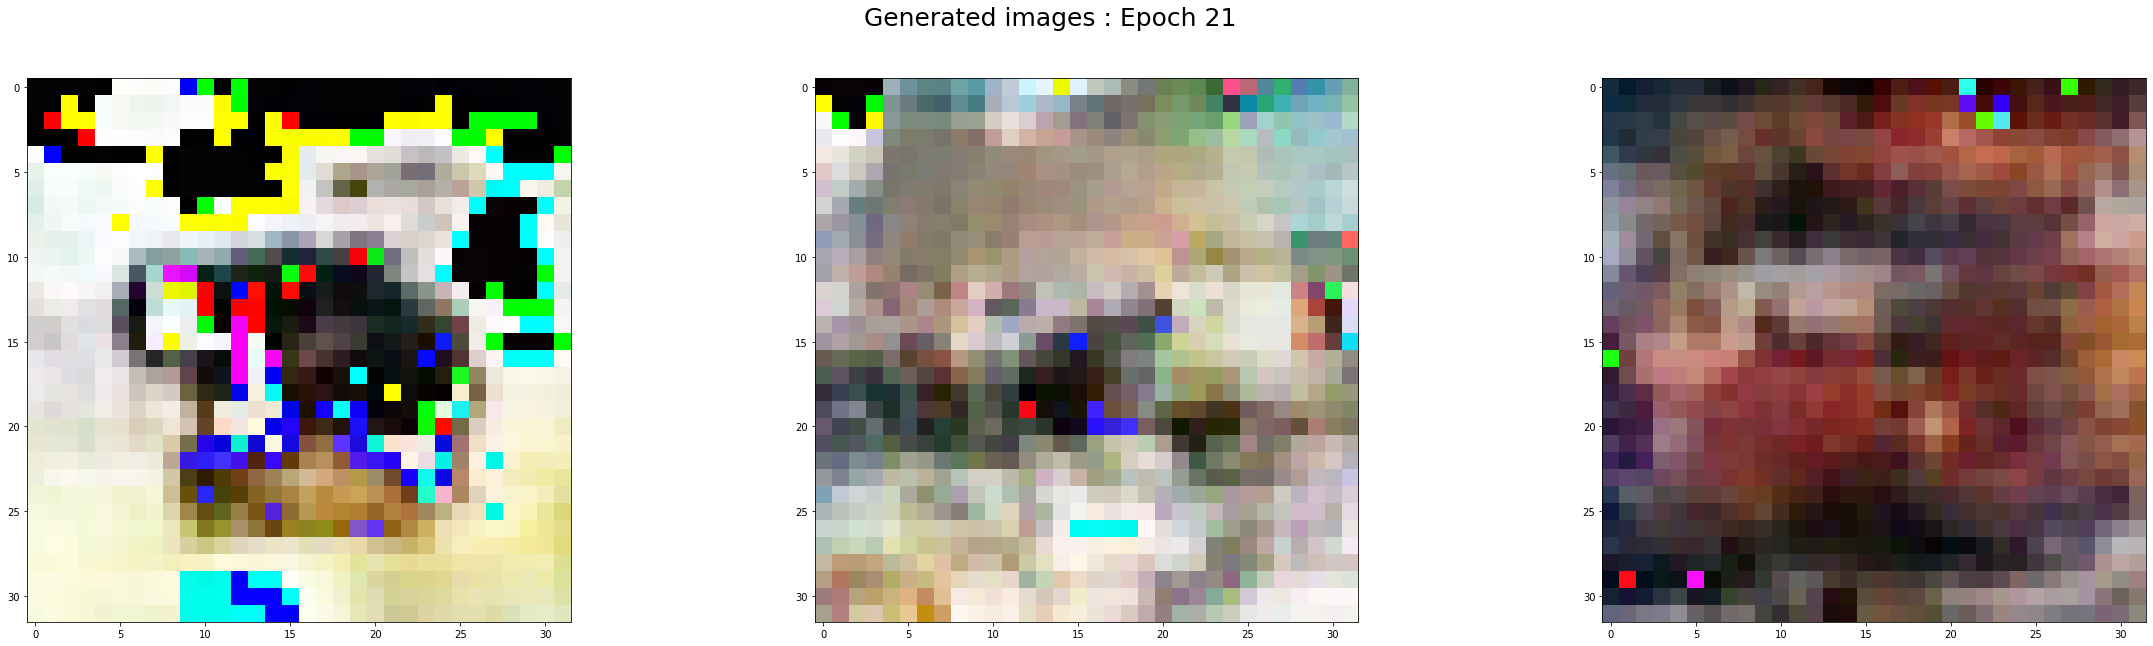

---------------------------------------------------------------
epoch :  22  d_loss =  [0.5871021747589111, 0.67578125]  g_loss =  1.0755573511123657


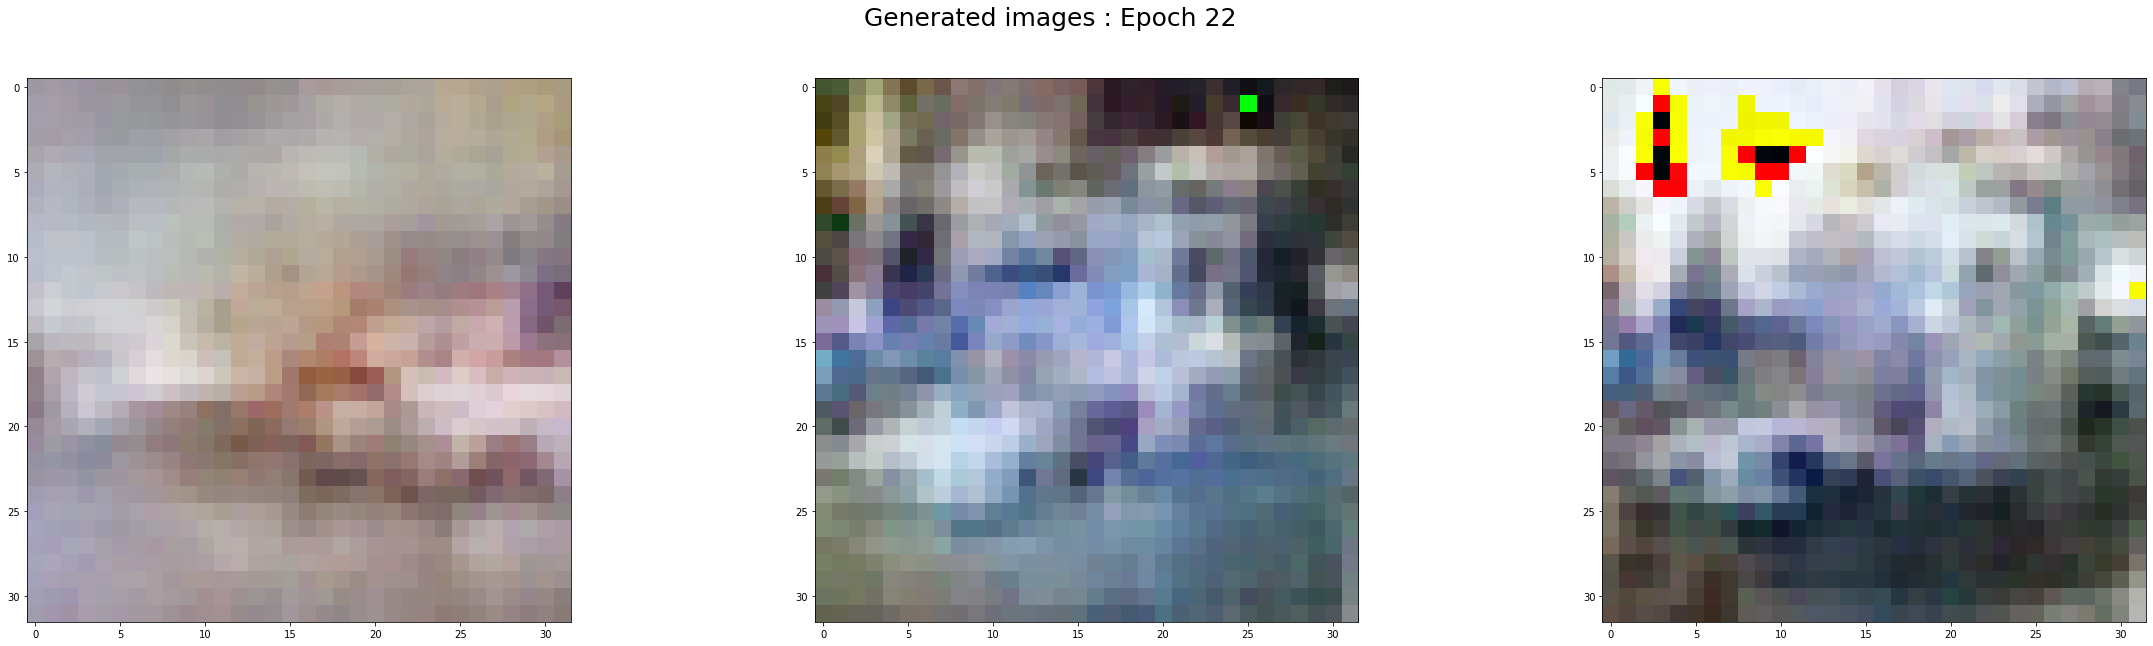

---------------------------------------------------------------
epoch :  23  d_loss =  [0.5842589139938354, 0.68359375]  g_loss =  0.9048477411270142


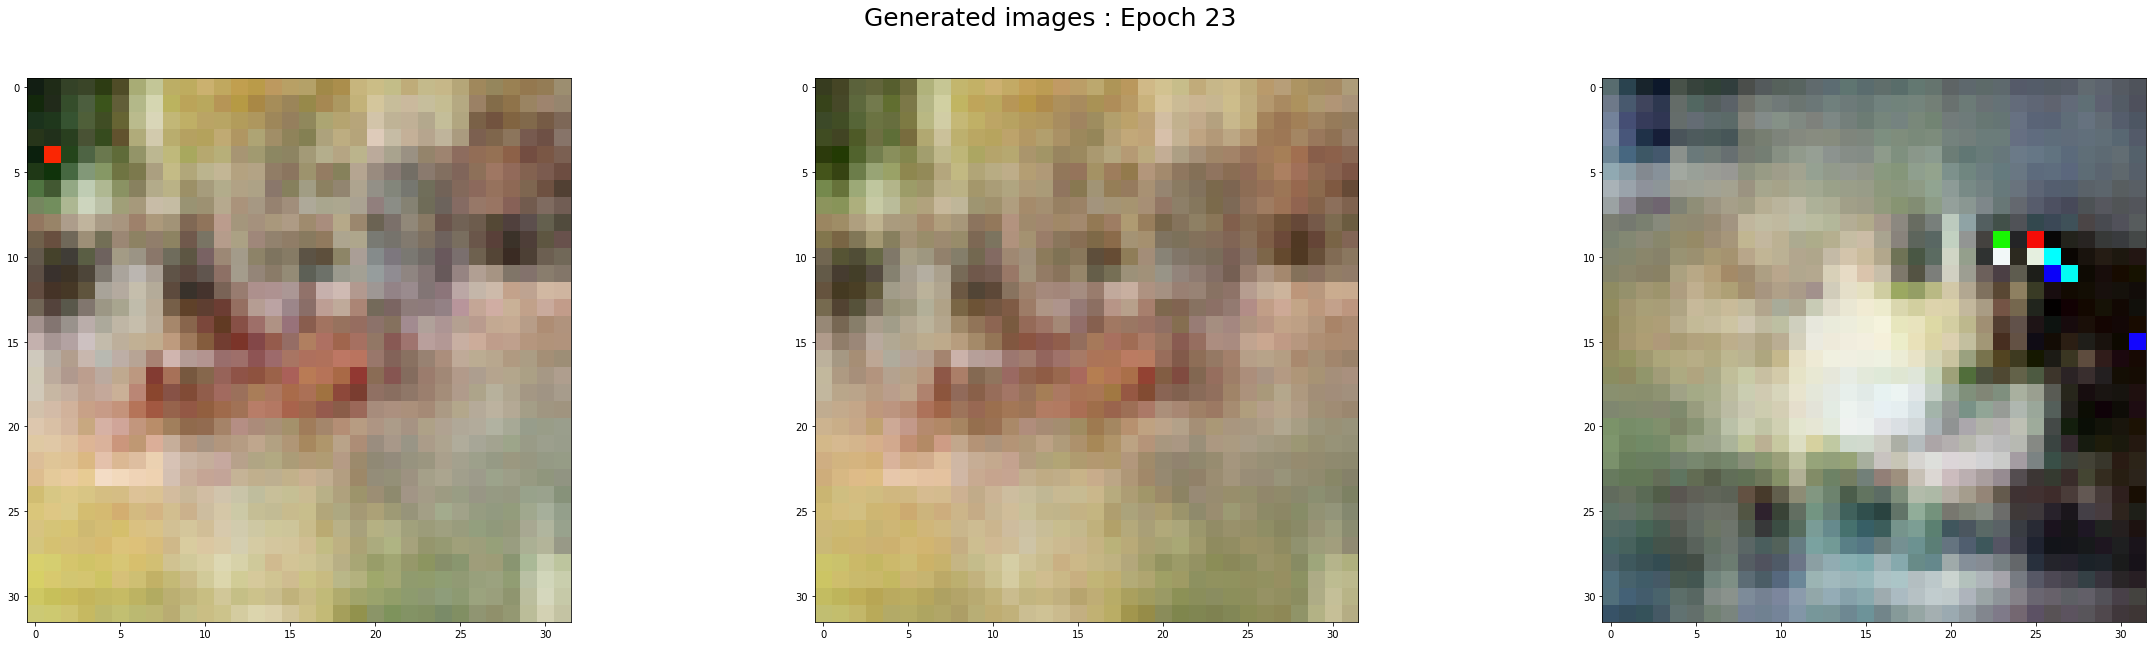

---------------------------------------------------------------
epoch :  24  d_loss =  [0.5258585810661316, 0.73828125]  g_loss =  1.2839040756225586


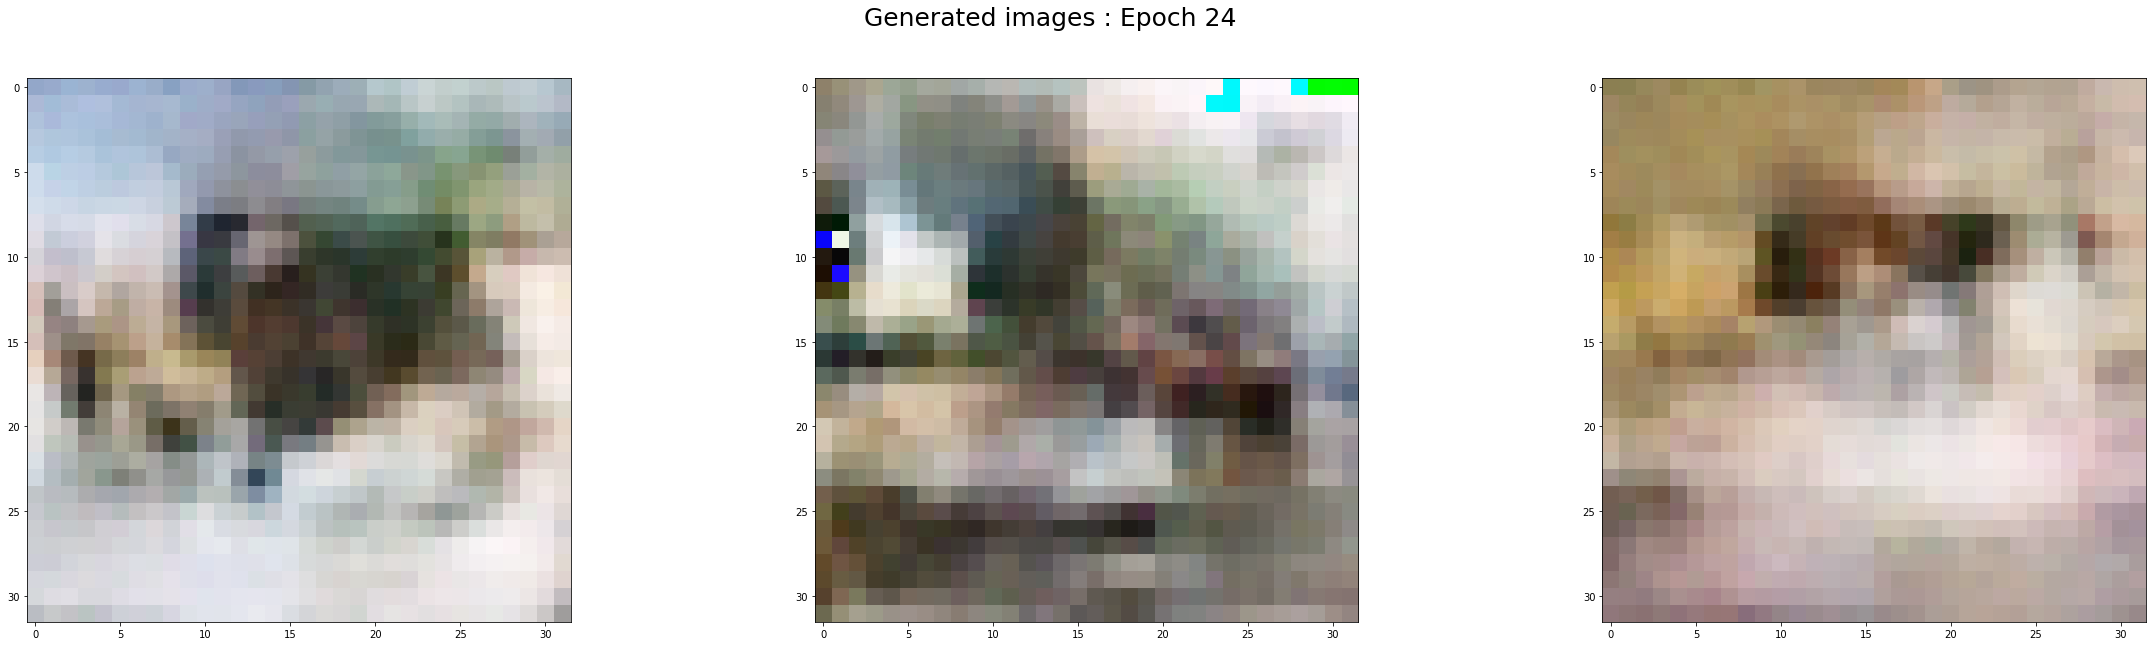

---------------------------------------------------------------
epoch :  25  d_loss =  [0.5970698595046997, 0.67578125]  g_loss =  0.6550467014312744


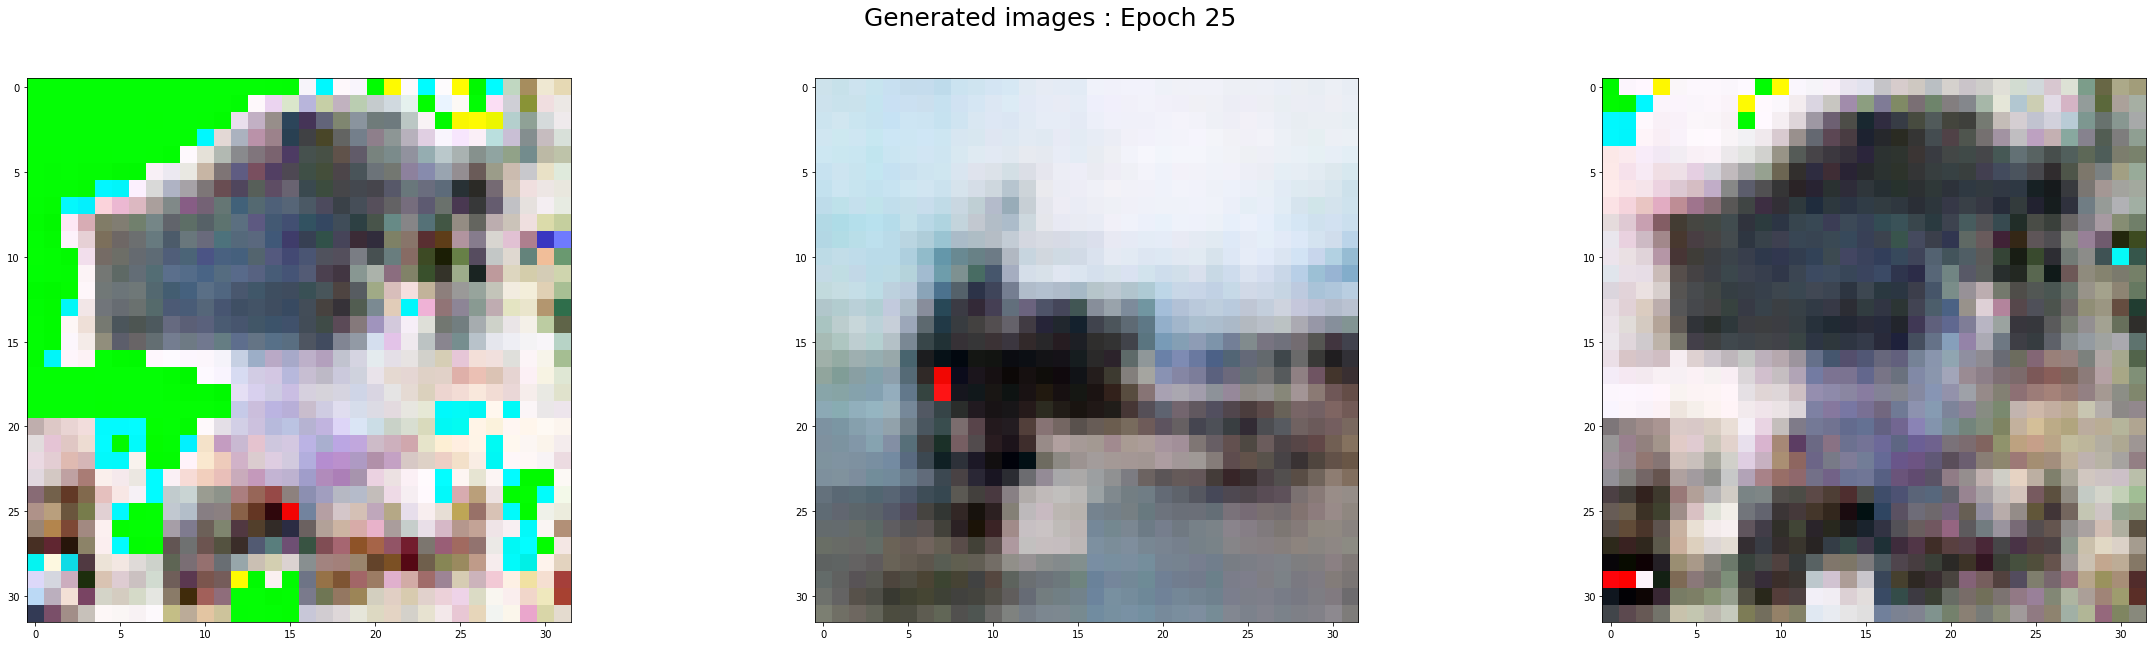

---------------------------------------------------------------
epoch :  26  d_loss =  [0.680140495300293, 0.6015625]  g_loss =  1.1918126344680786


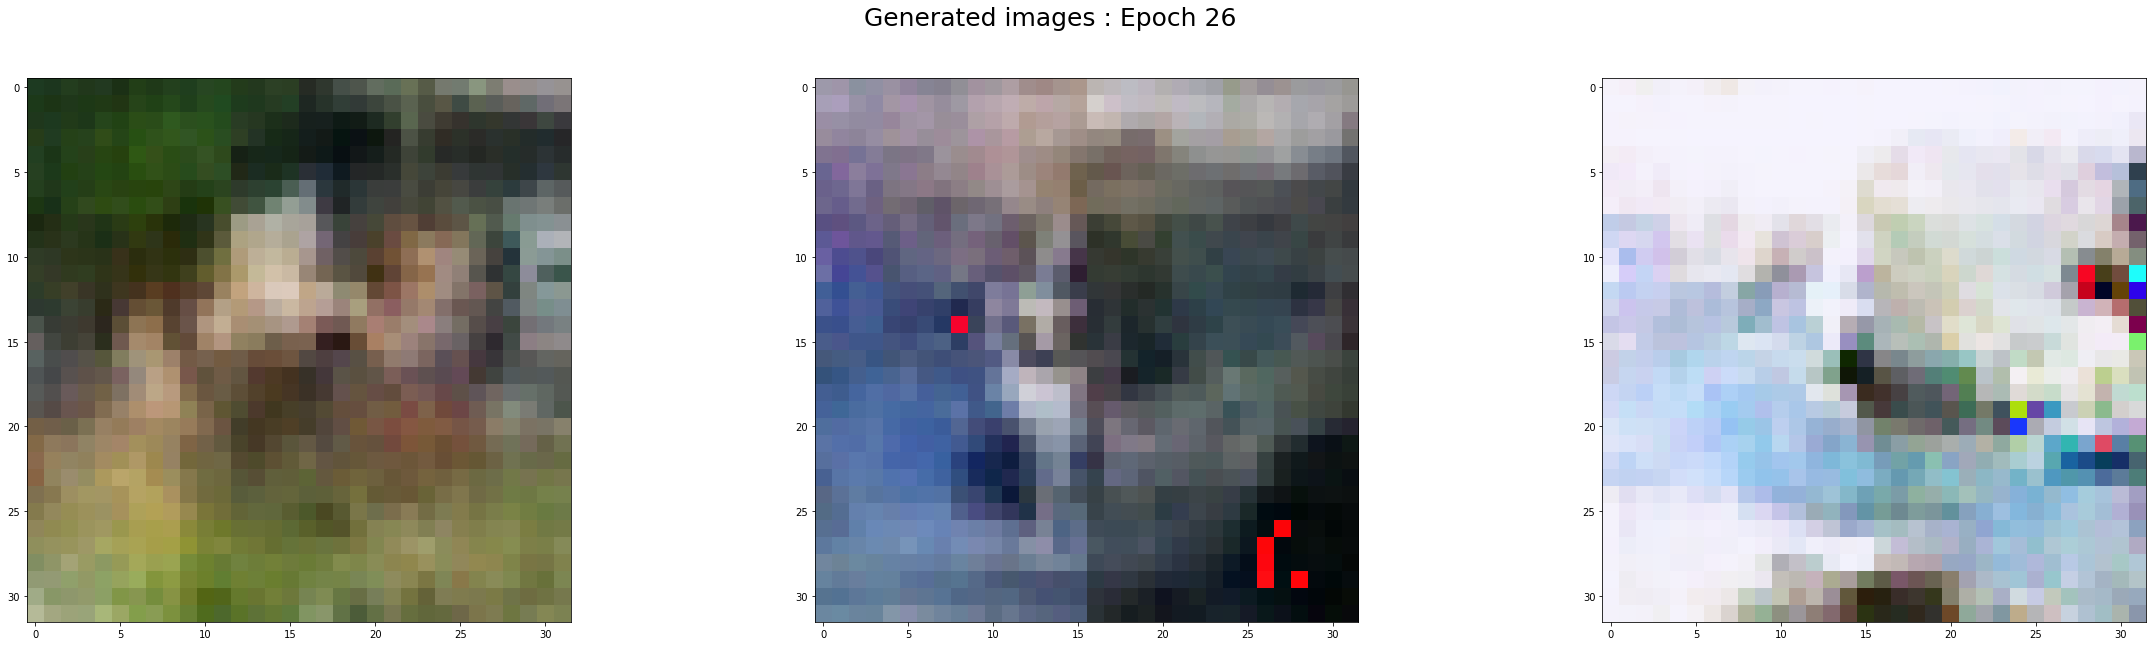

---------------------------------------------------------------
epoch :  27  d_loss =  [0.6170467138290405, 0.6640625]  g_loss =  0.862438976764679


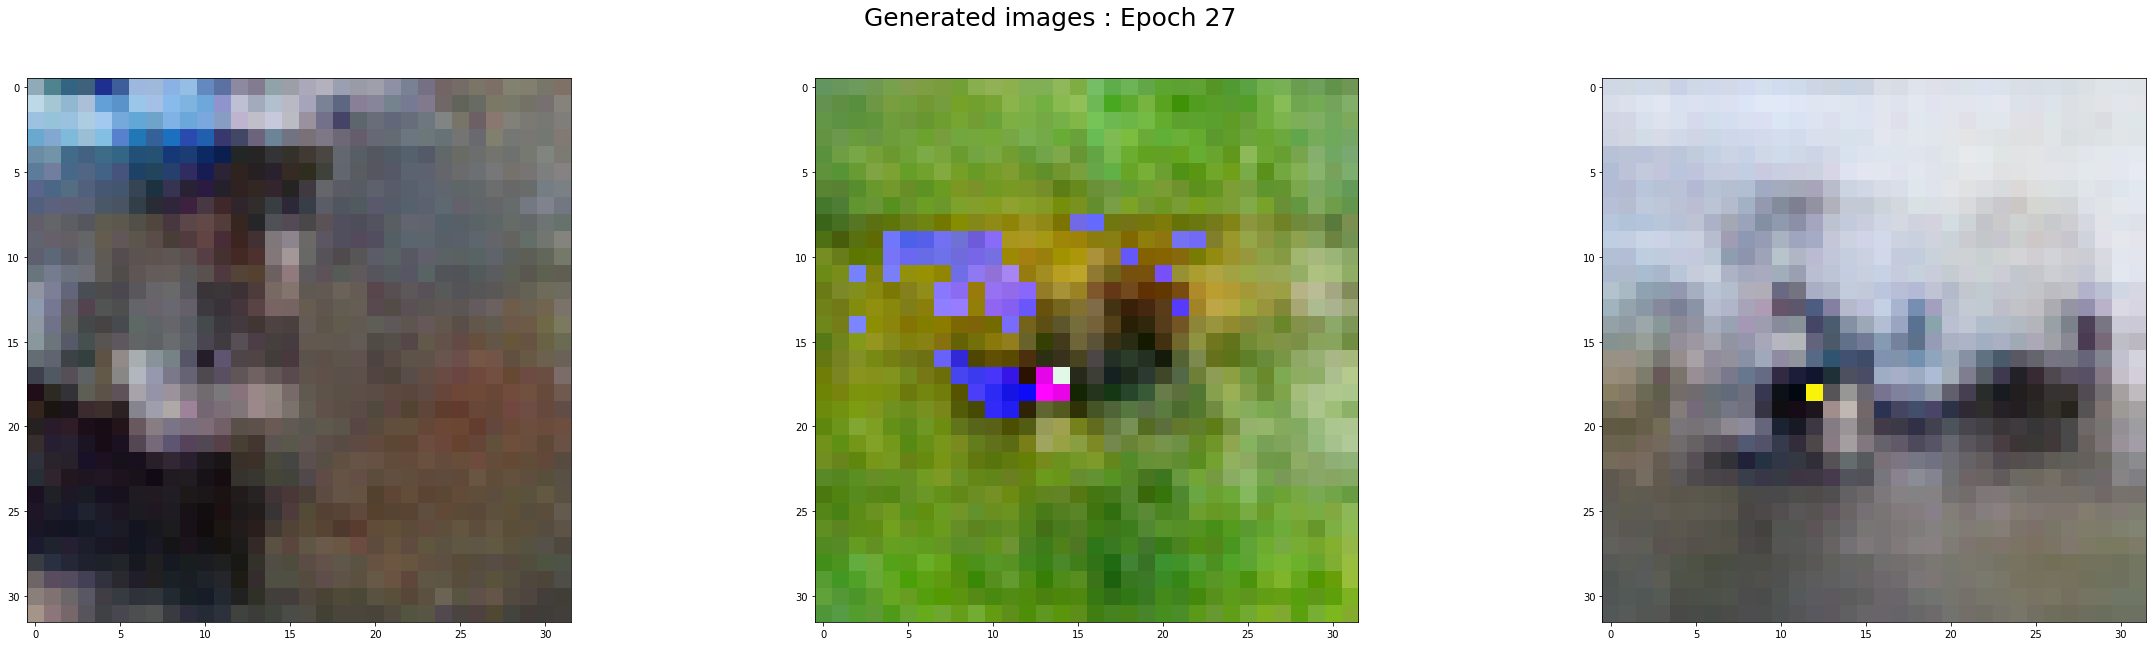

---------------------------------------------------------------
epoch :  28  d_loss =  [0.6673738956451416, 0.55859375]  g_loss =  0.5990206599235535


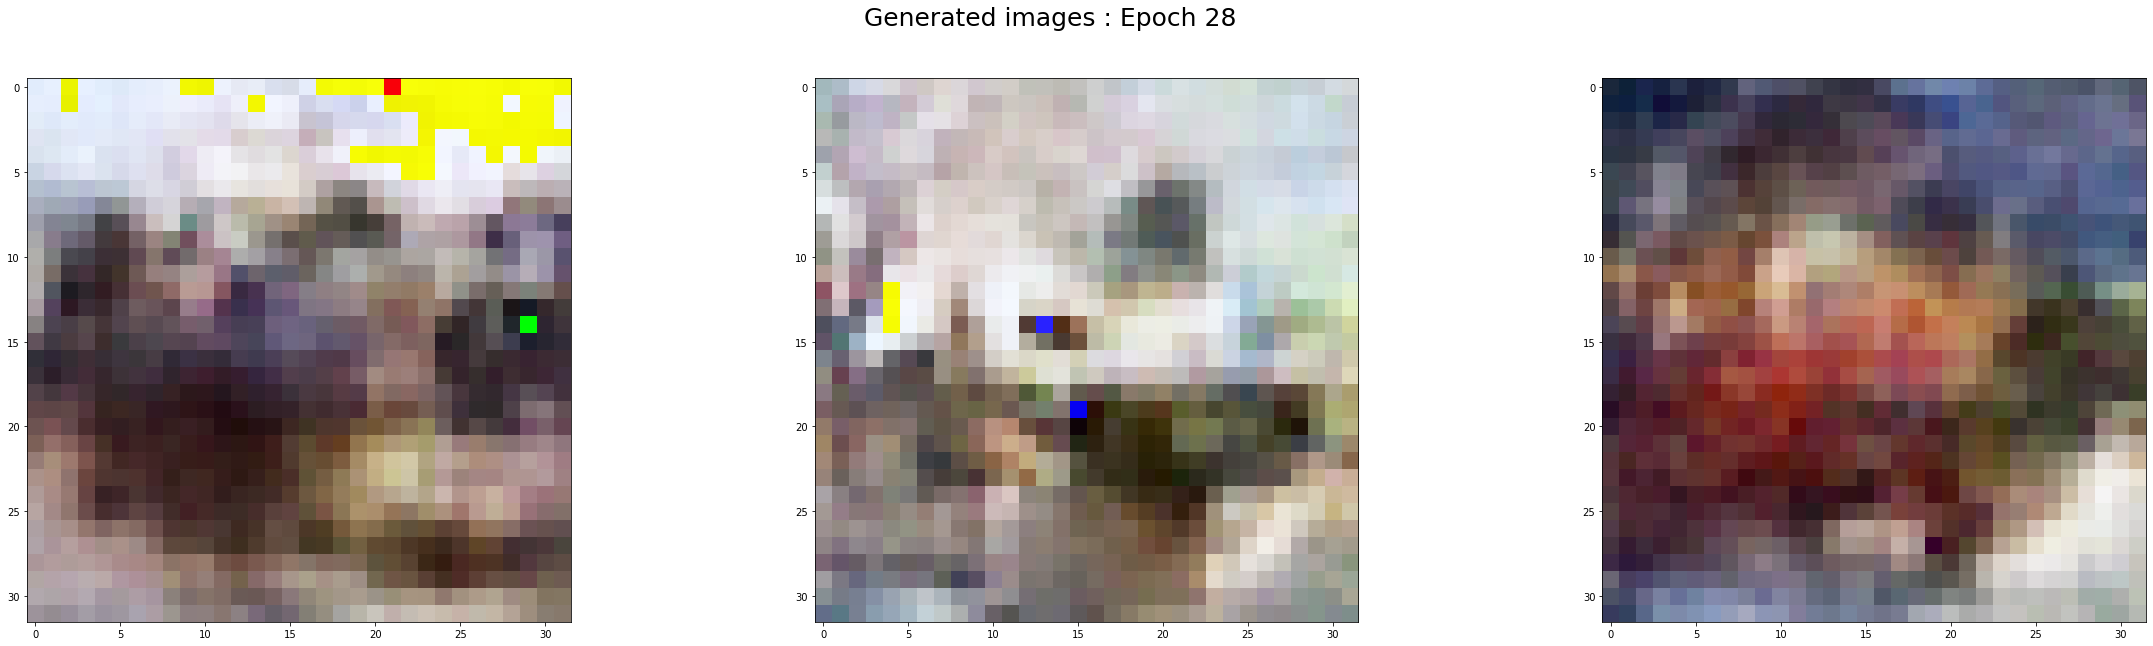

---------------------------------------------------------------
epoch :  29  d_loss =  [0.5729633569717407, 0.7109375]  g_loss =  0.7895792722702026


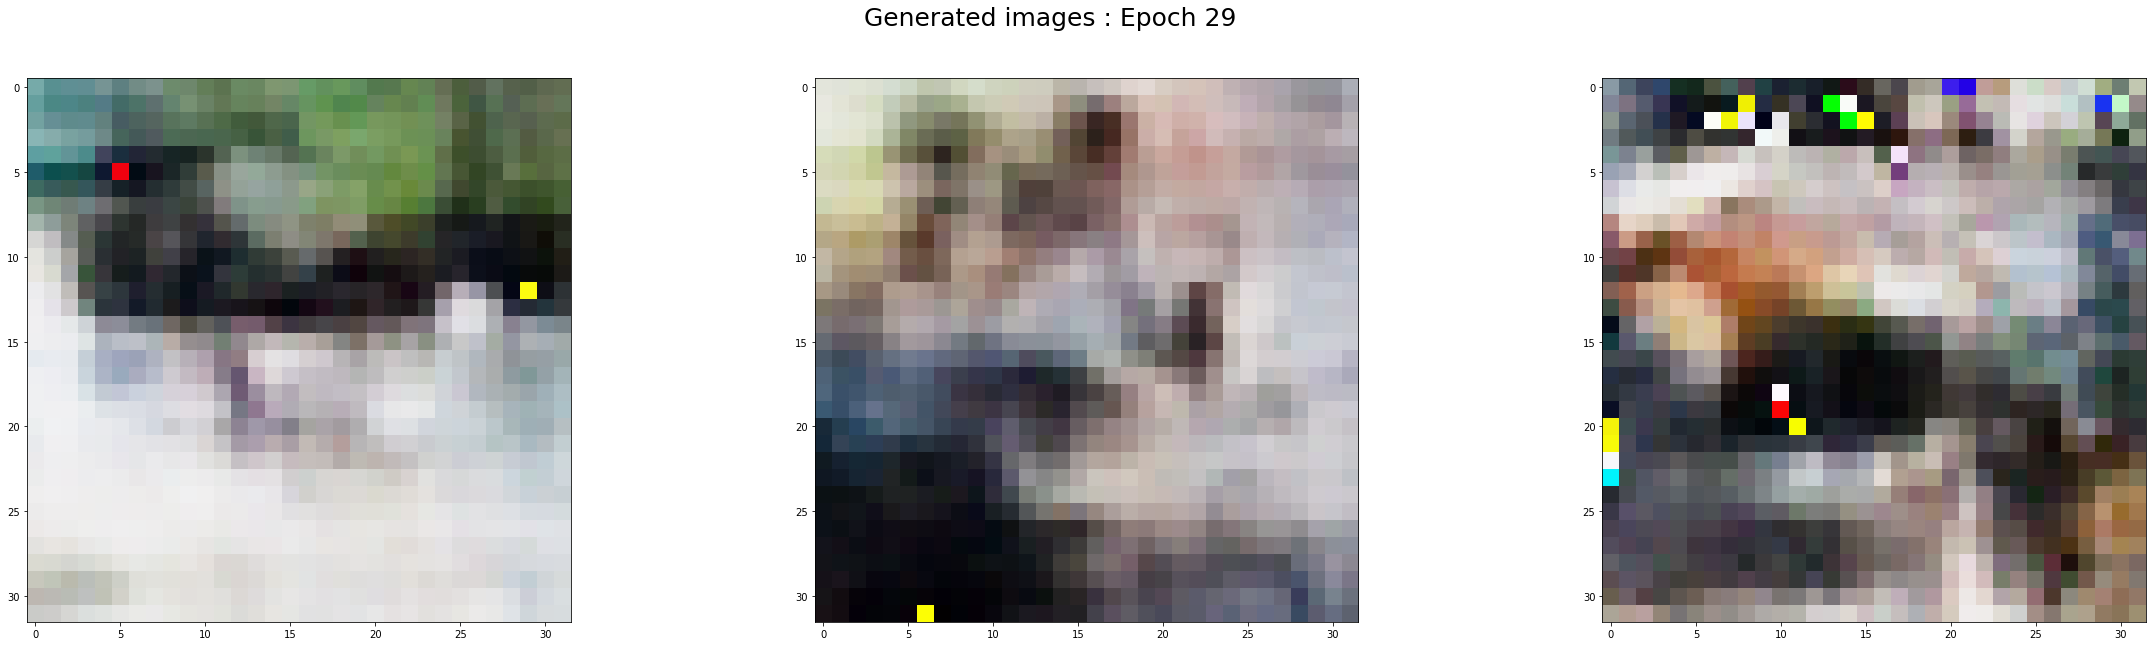

---------------------------------------------------------------
epoch :  30  d_loss =  [0.6827237606048584, 0.625]  g_loss =  1.0430238246917725


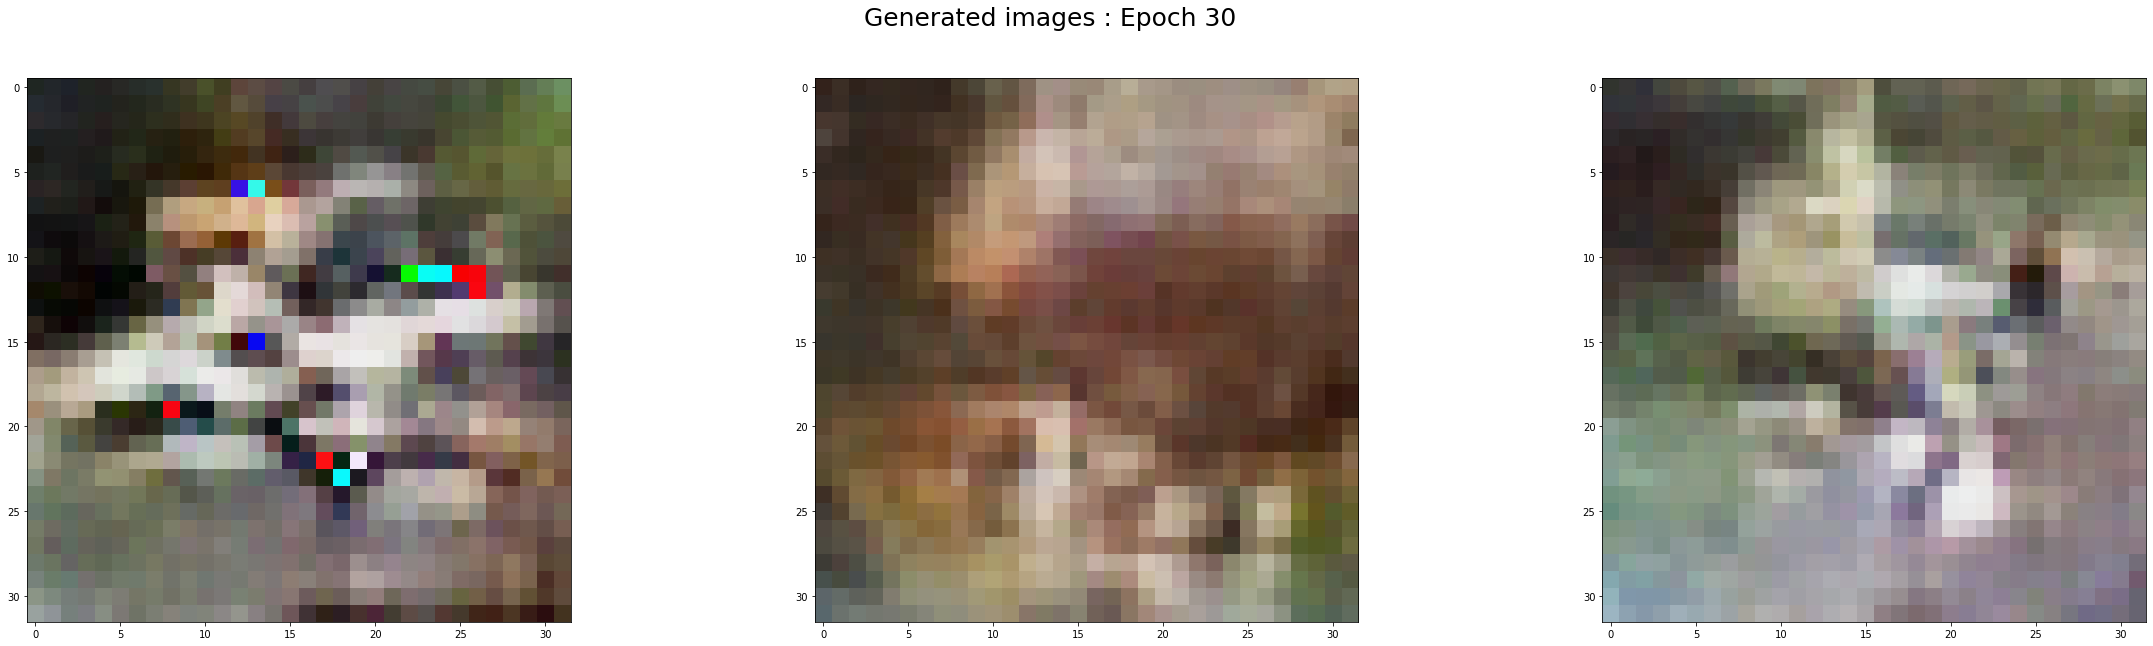

---------------------------------------------------------------
epoch :  31  d_loss =  [0.5945968627929688, 0.6953125]  g_loss =  1.0330244302749634


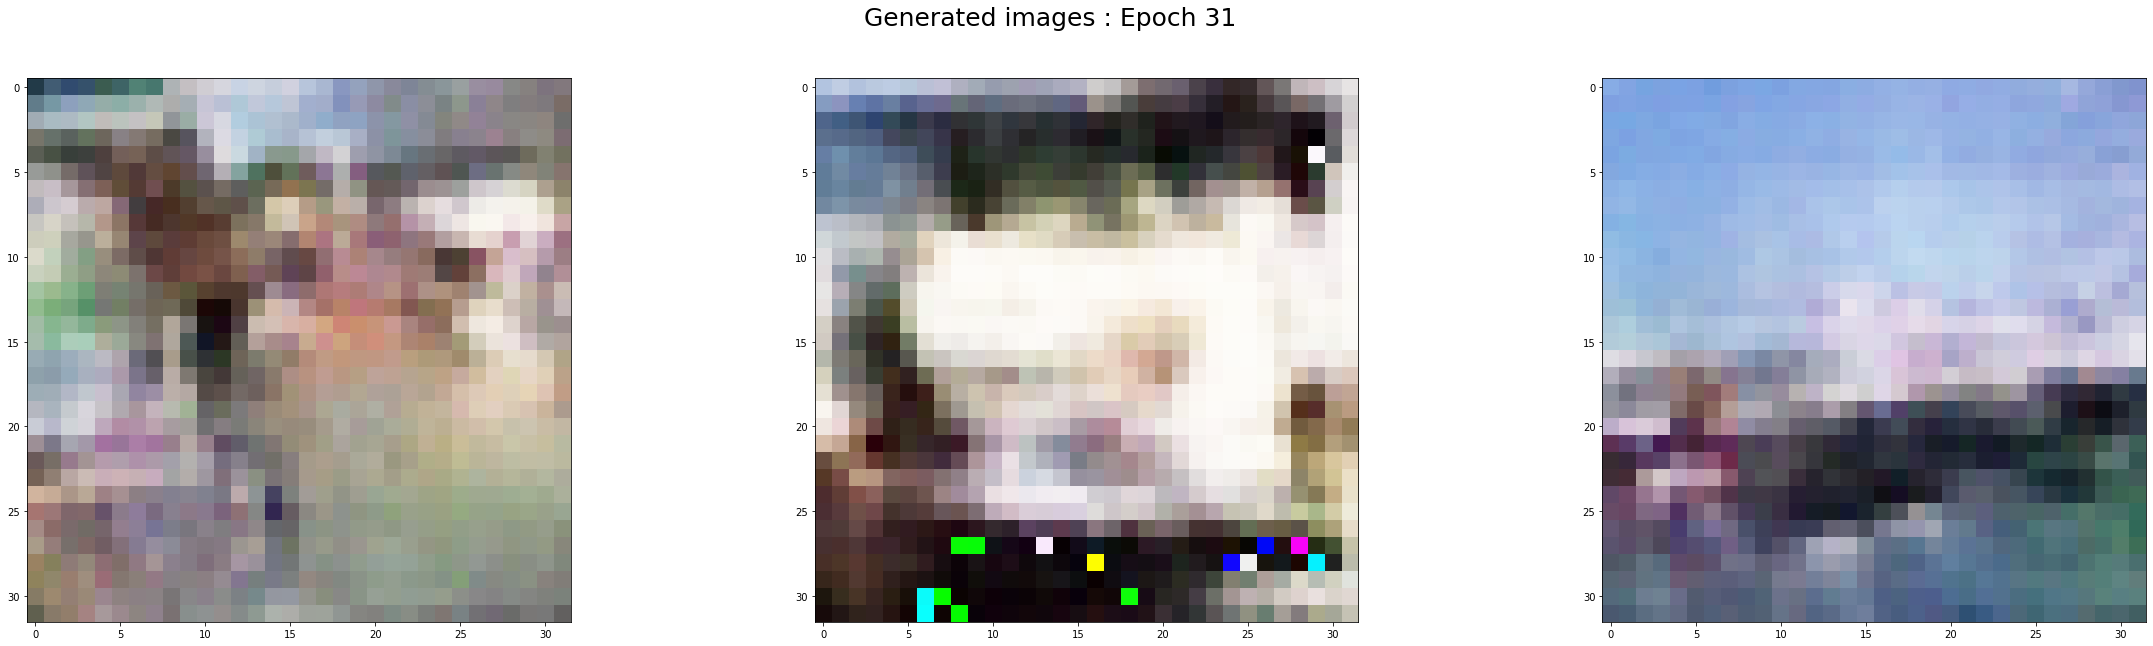

---------------------------------------------------------------
epoch :  32  d_loss =  [0.6163554191589355, 0.6796875]  g_loss =  0.7473825216293335


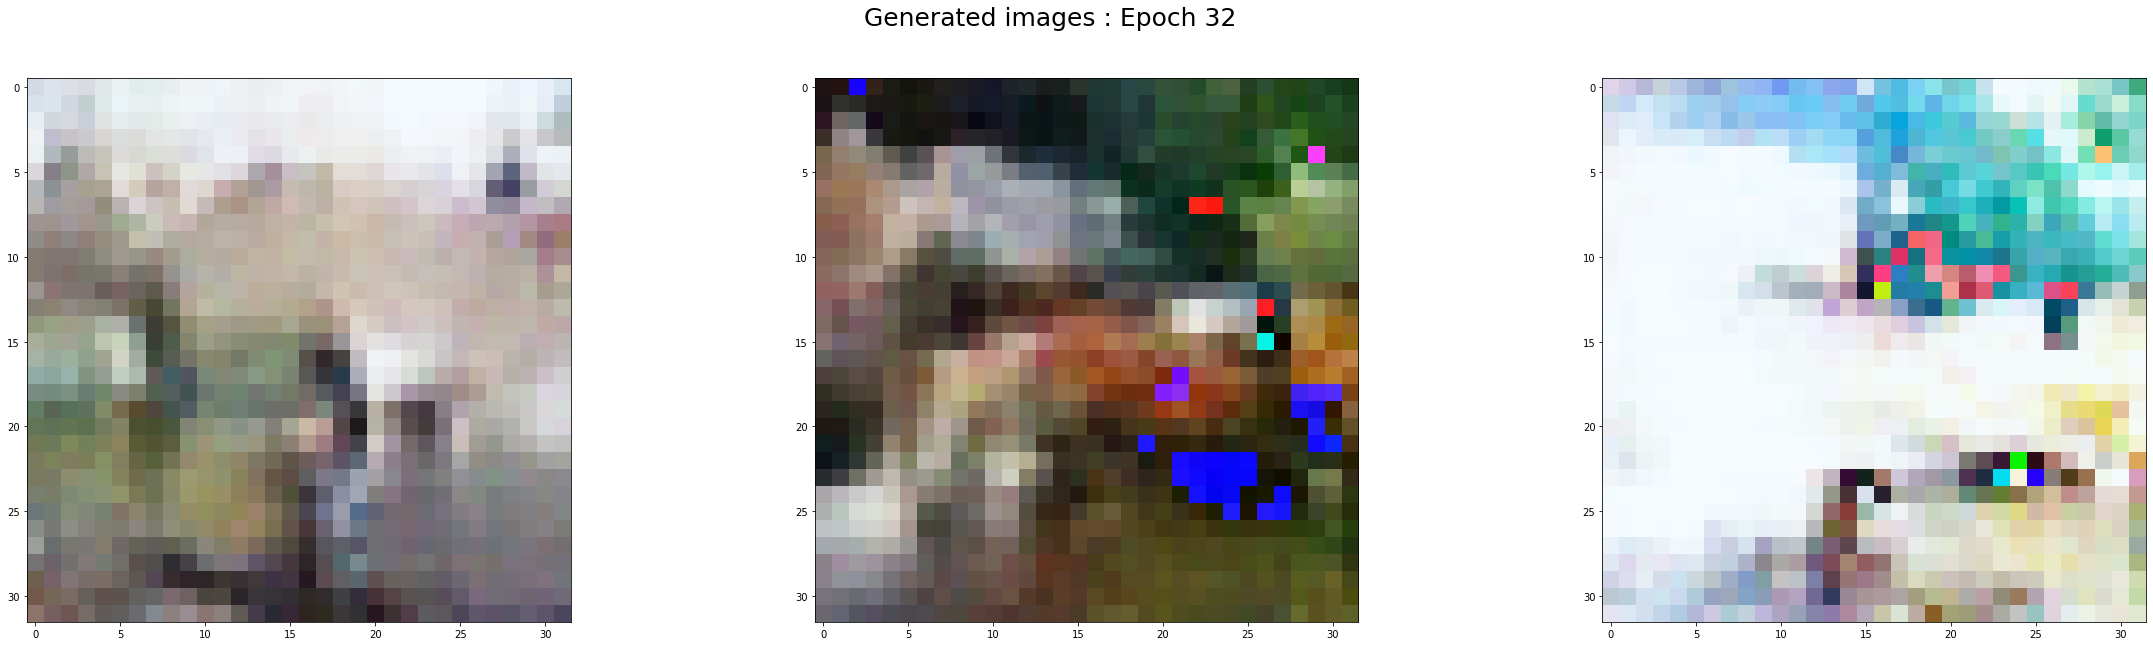

---------------------------------------------------------------
epoch :  33  d_loss =  [0.6162999272346497, 0.65625]  g_loss =  0.8553427457809448


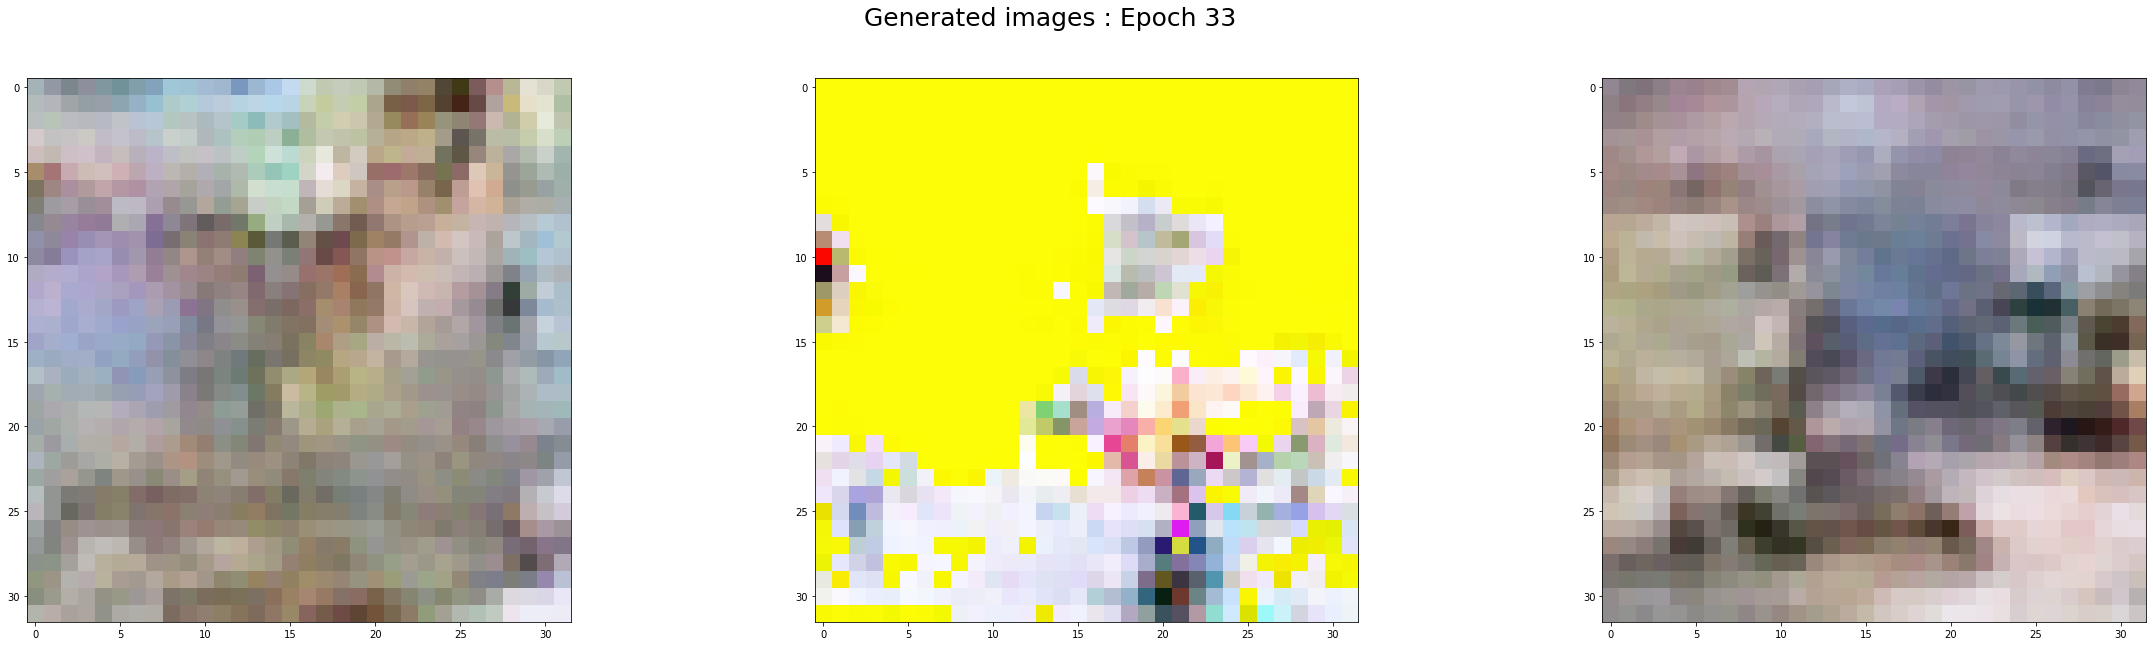

---------------------------------------------------------------
epoch :  34  d_loss =  [0.564799427986145, 0.71484375]  g_loss =  0.5897278785705566


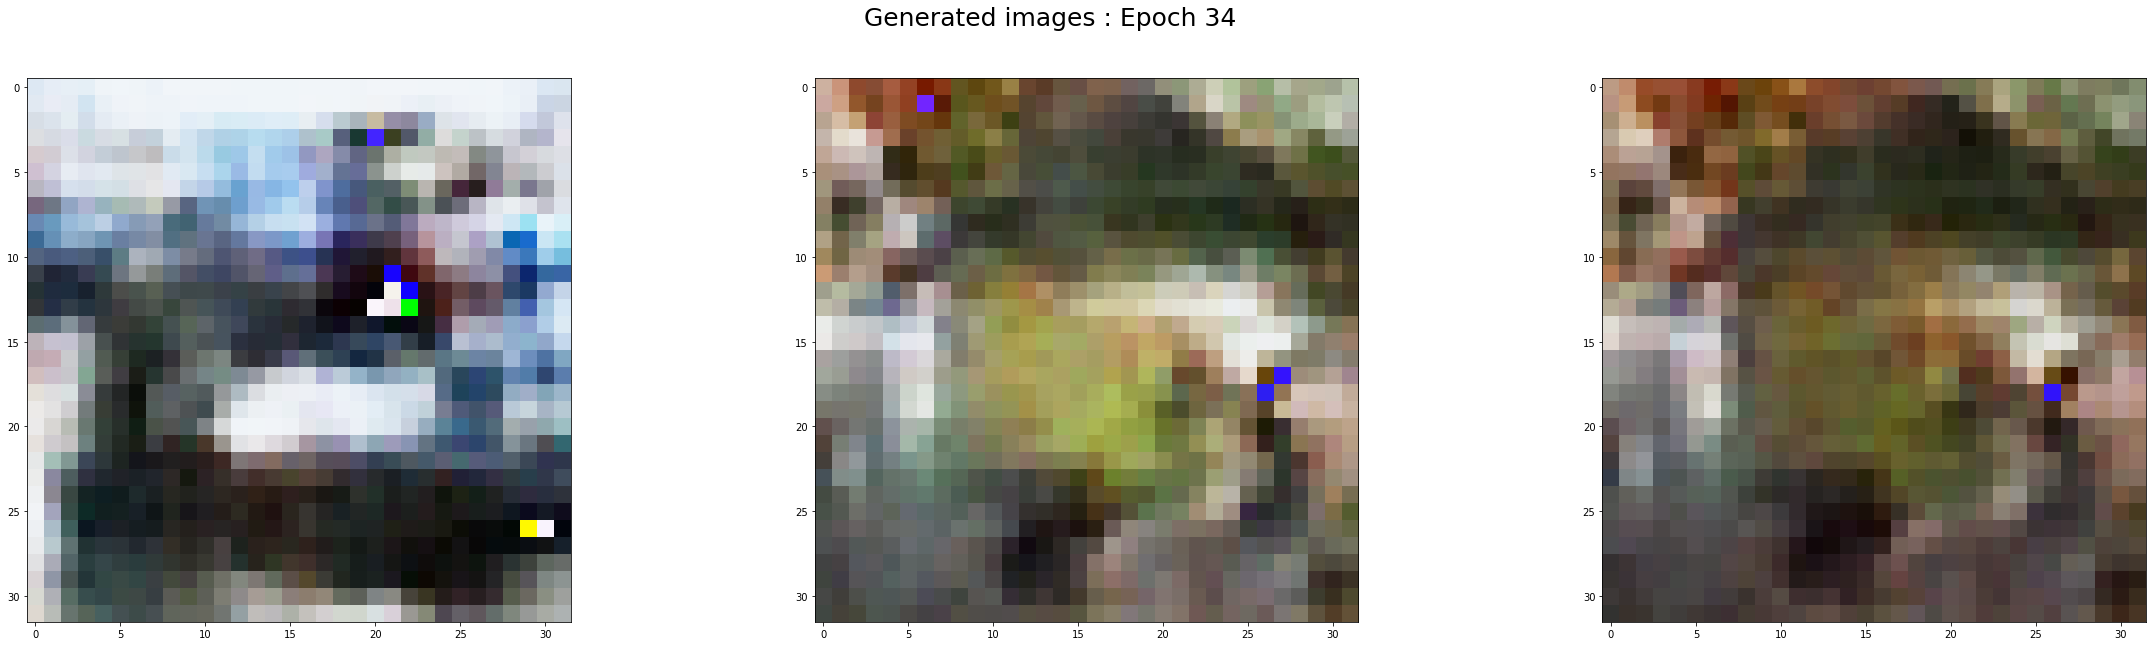

---------------------------------------------------------------
epoch :  35  d_loss =  [0.5871914625167847, 0.69921875]  g_loss =  0.8638474941253662


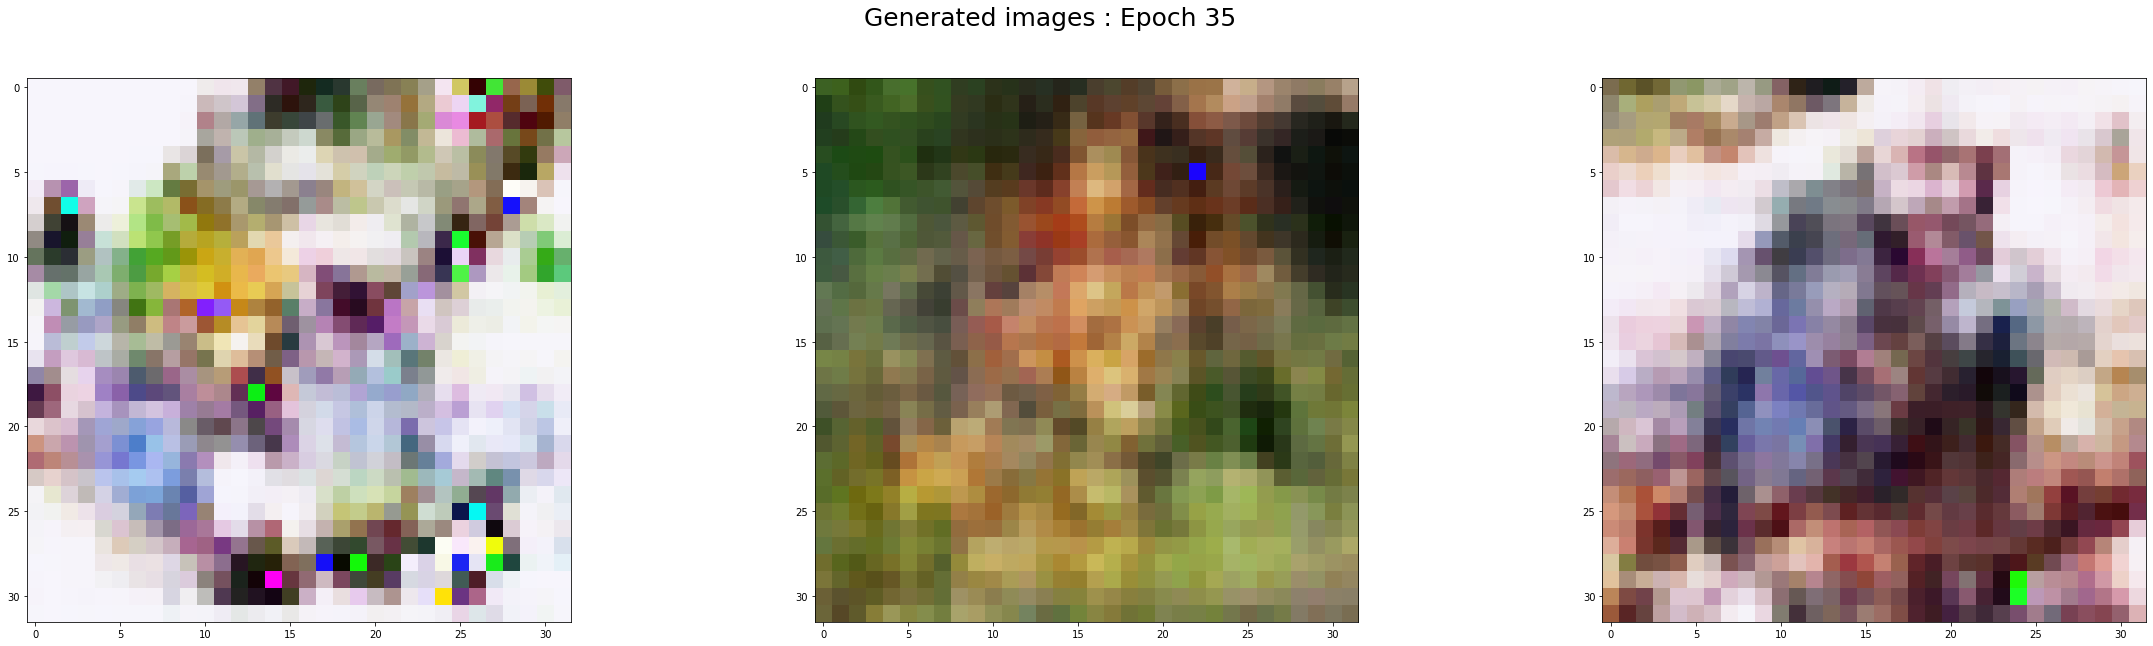

---------------------------------------------------------------
epoch :  36  d_loss =  [0.6340841054916382, 0.578125]  g_loss =  0.9370028972625732


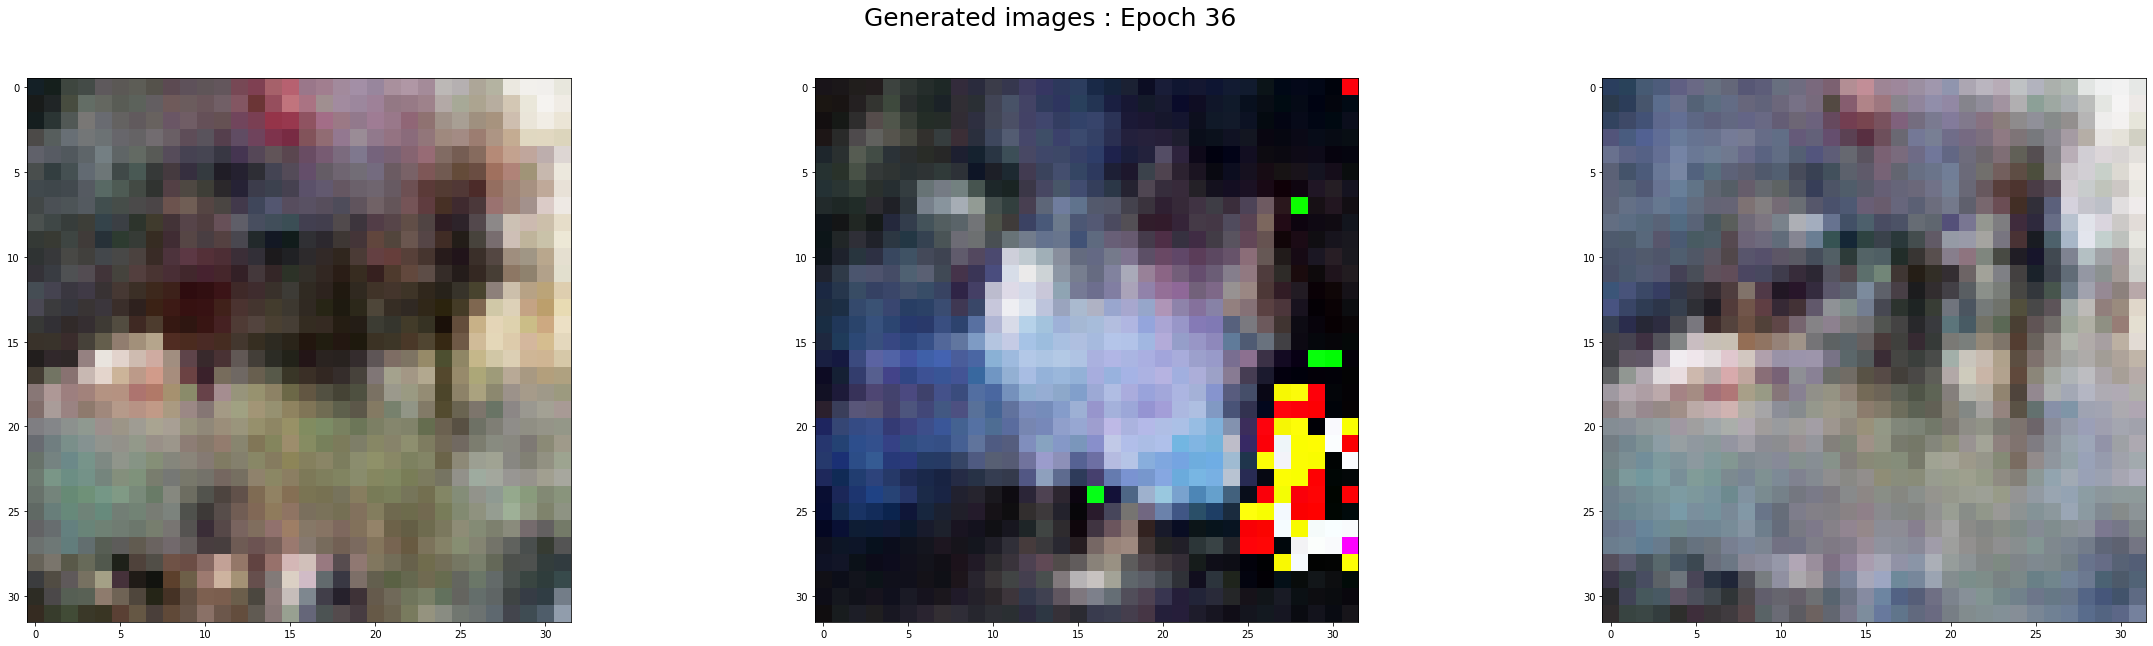

---------------------------------------------------------------
epoch :  37  d_loss =  [0.6184468269348145, 0.65234375]  g_loss =  1.1667490005493164


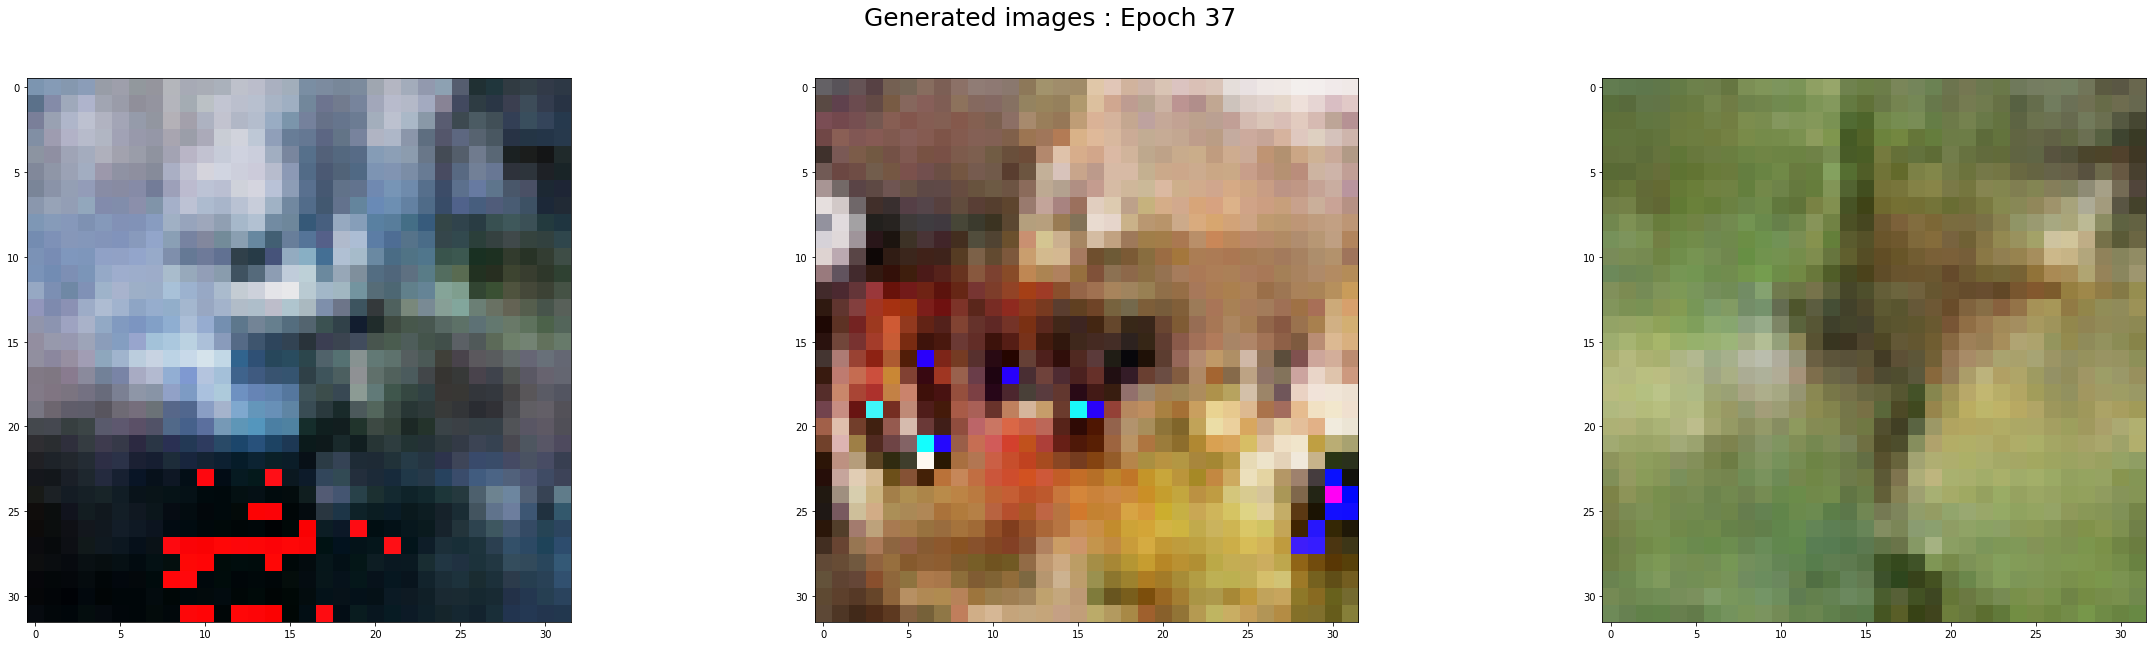

---------------------------------------------------------------
epoch :  38  d_loss =  [0.9978899955749512, 0.51171875]  g_loss =  1.9196029901504517


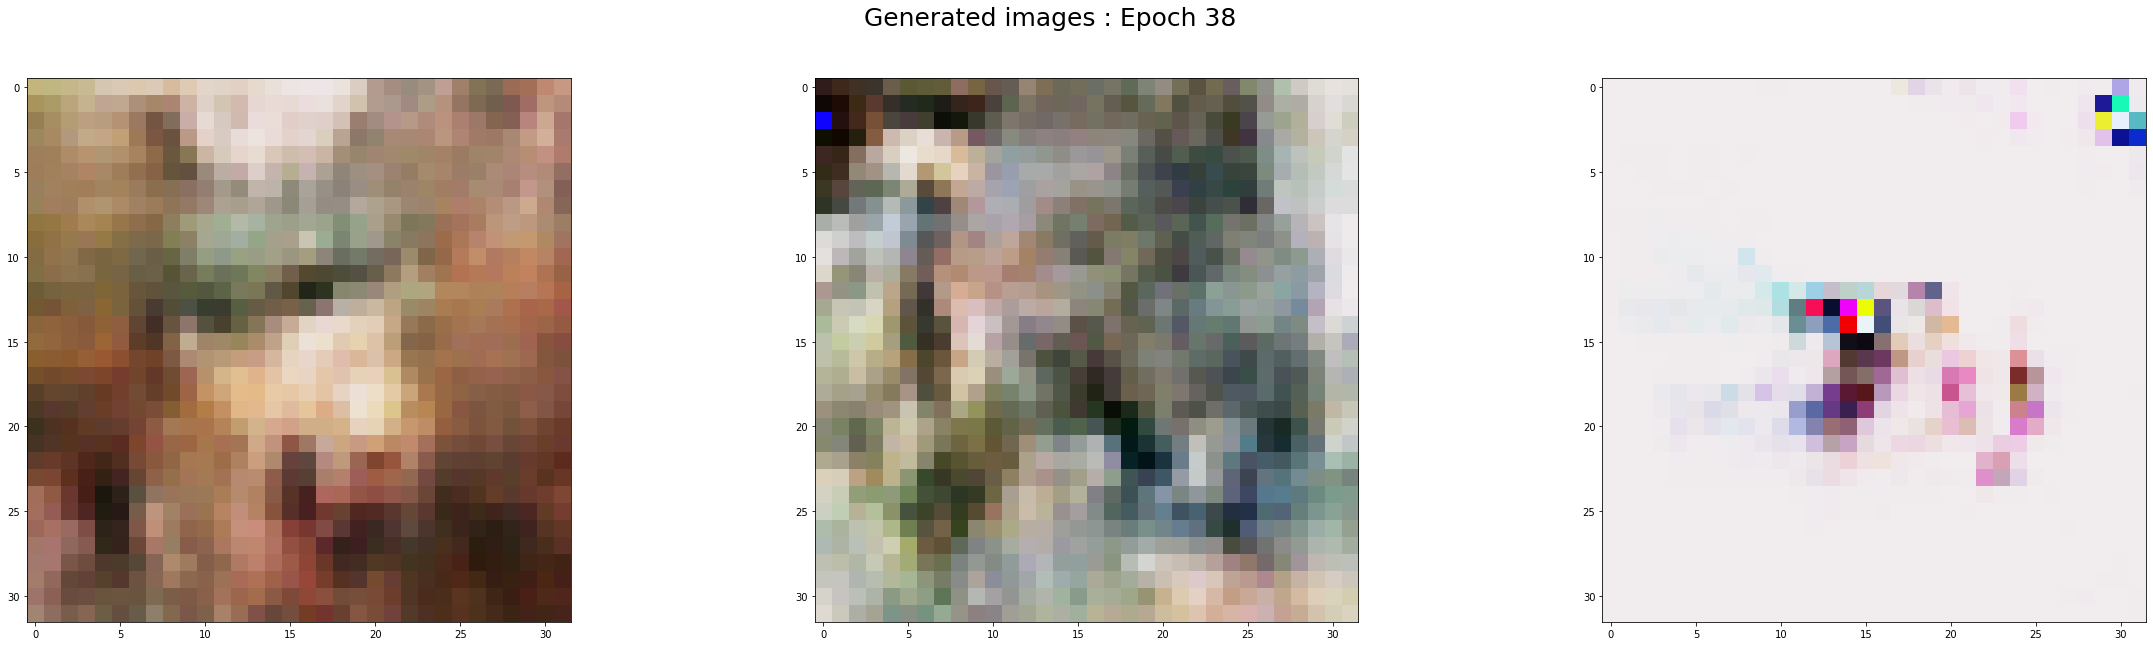

---------------------------------------------------------------
epoch :  39  d_loss =  [0.575170636177063, 0.66796875]  g_loss =  1.0593888759613037


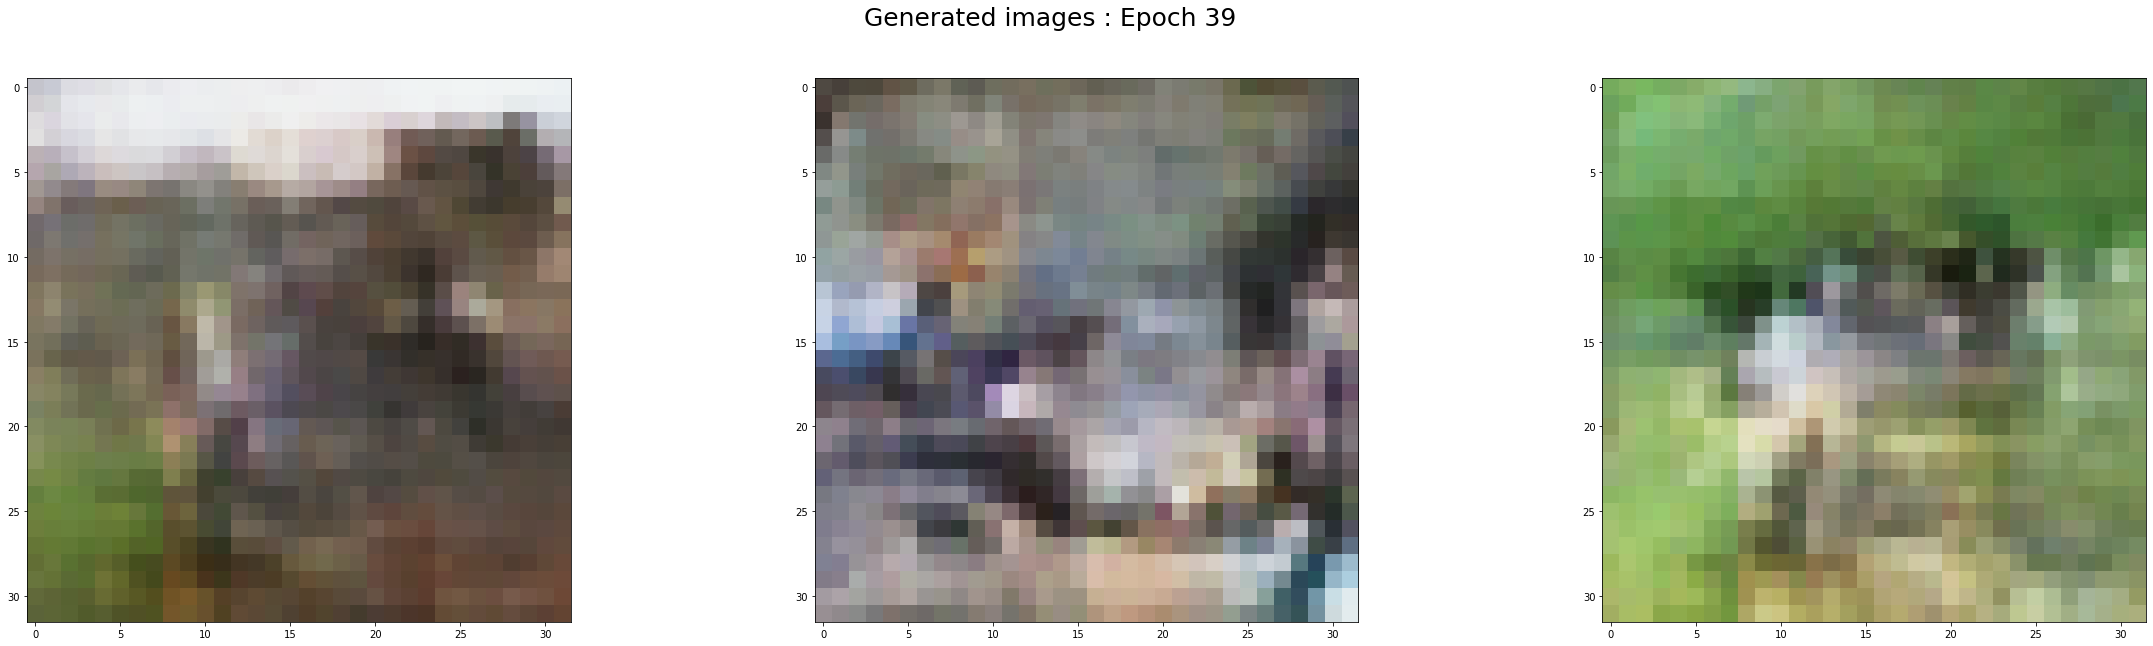

---------------------------------------------------------------
epoch :  40  d_loss =  [0.5145766735076904, 0.76953125]  g_loss =  1.0081486701965332


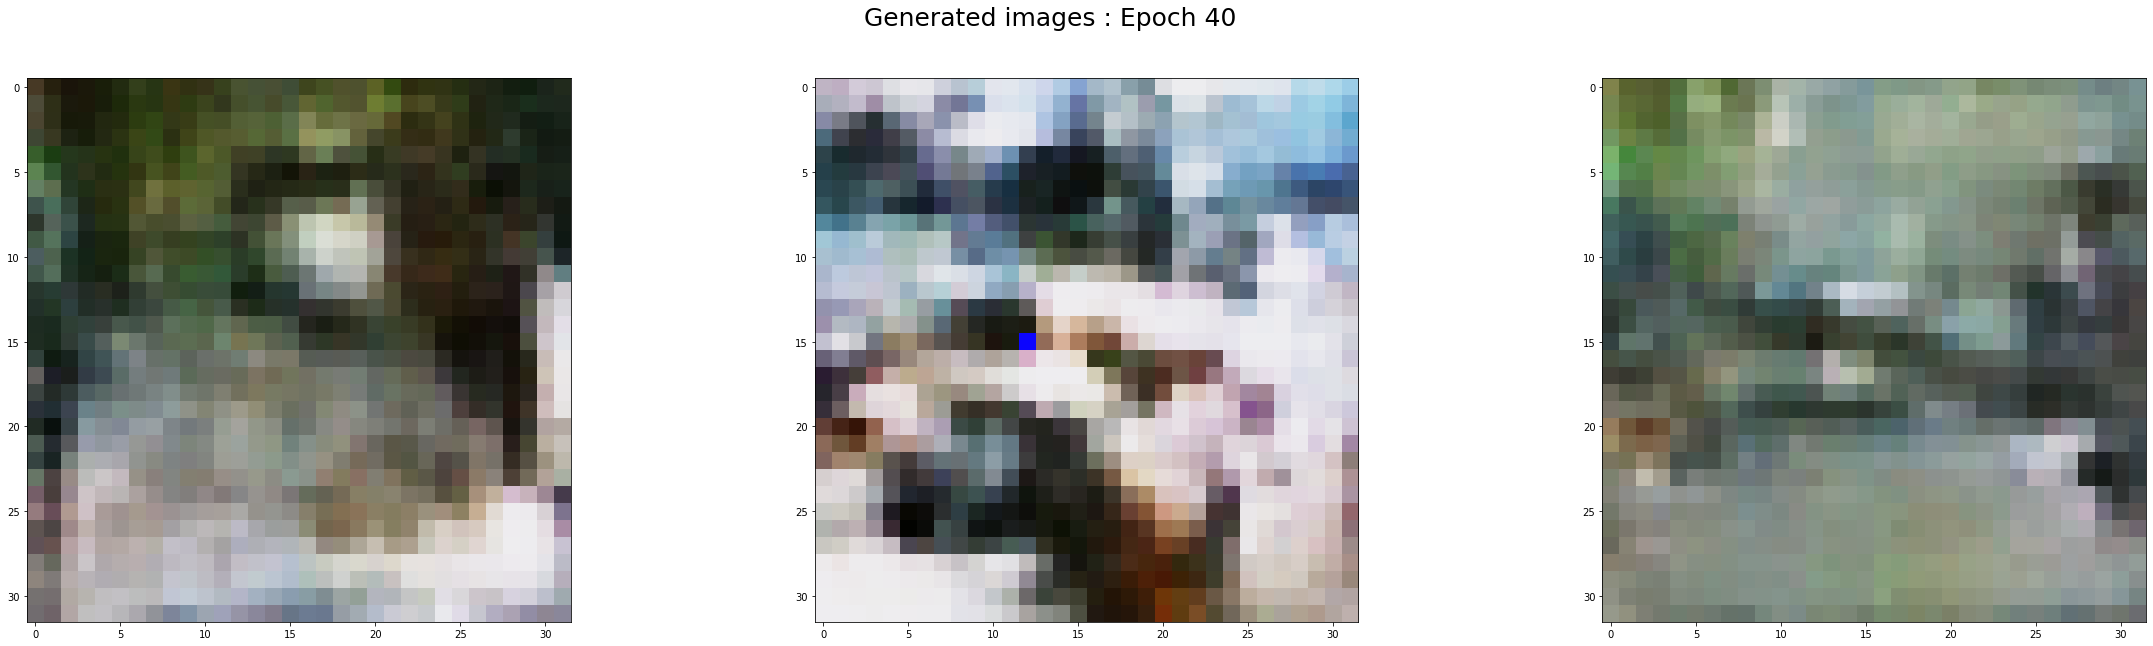

---------------------------------------------------------------
epoch :  41  d_loss =  [0.4941212236881256, 0.78515625]  g_loss =  1.0228172540664673


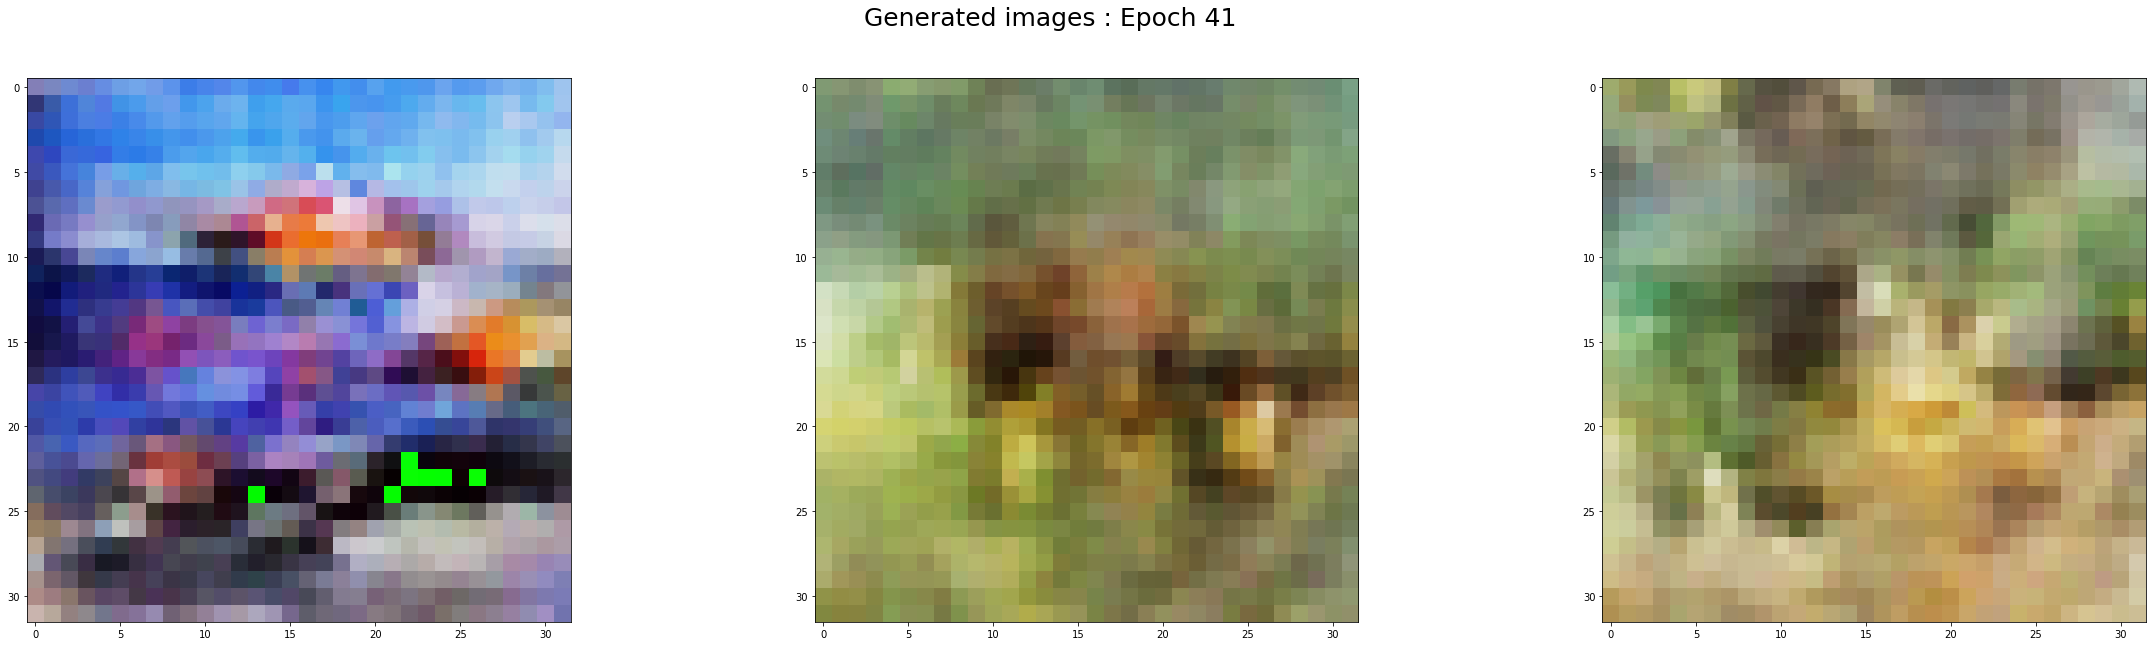

---------------------------------------------------------------
epoch :  42  d_loss =  [0.6450024843215942, 0.578125]  g_loss =  0.8281978368759155


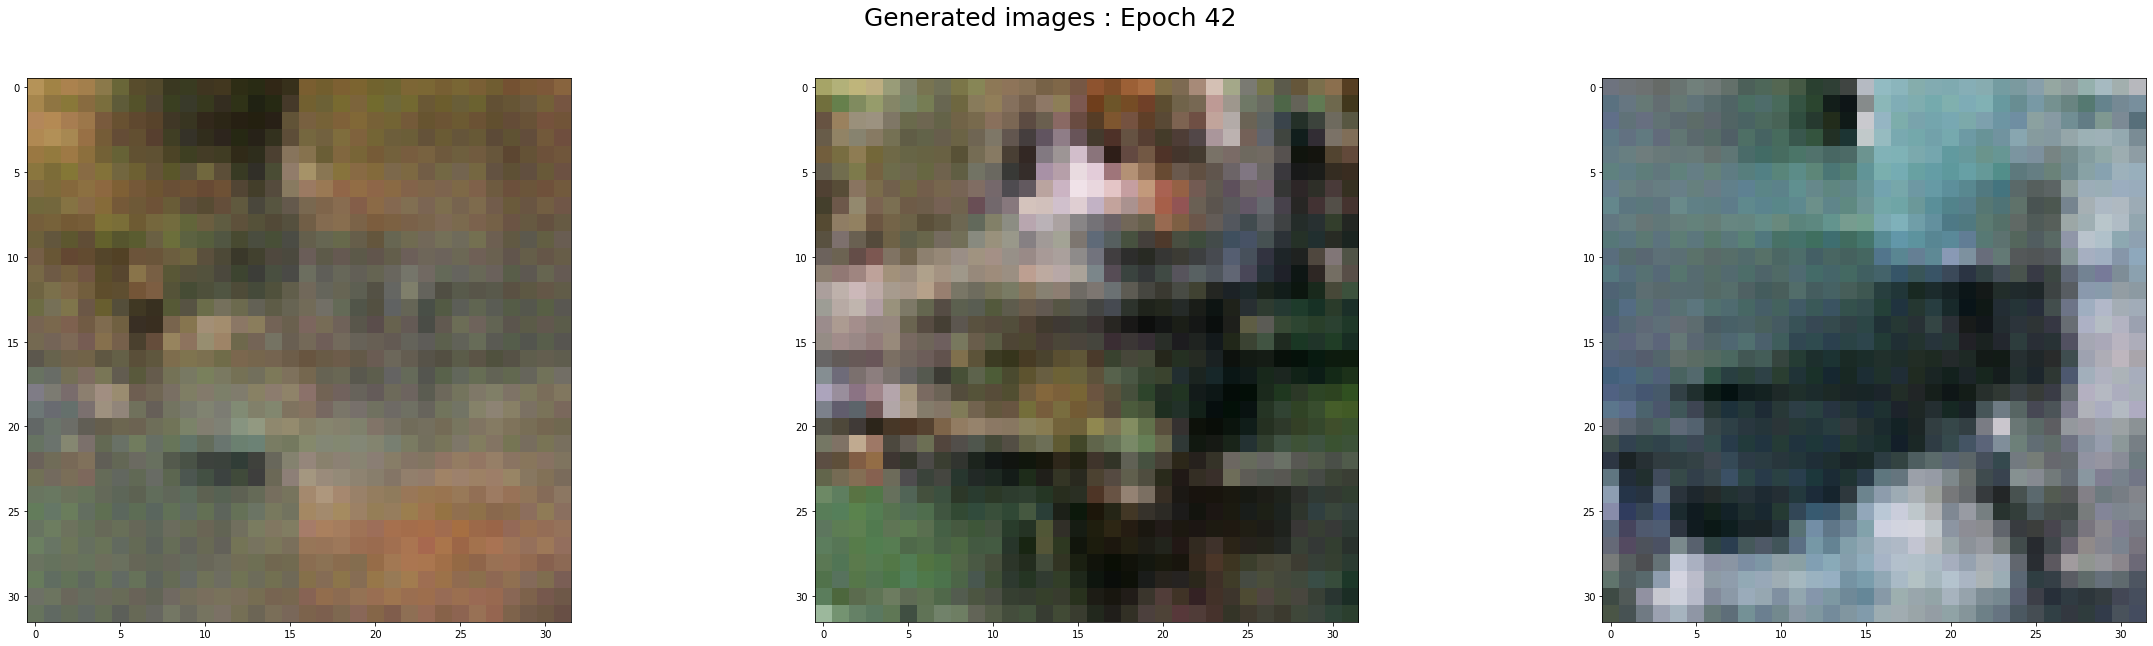

---------------------------------------------------------------
epoch :  43  d_loss =  [0.7033983469009399, 0.5625]  g_loss =  1.0748238563537598


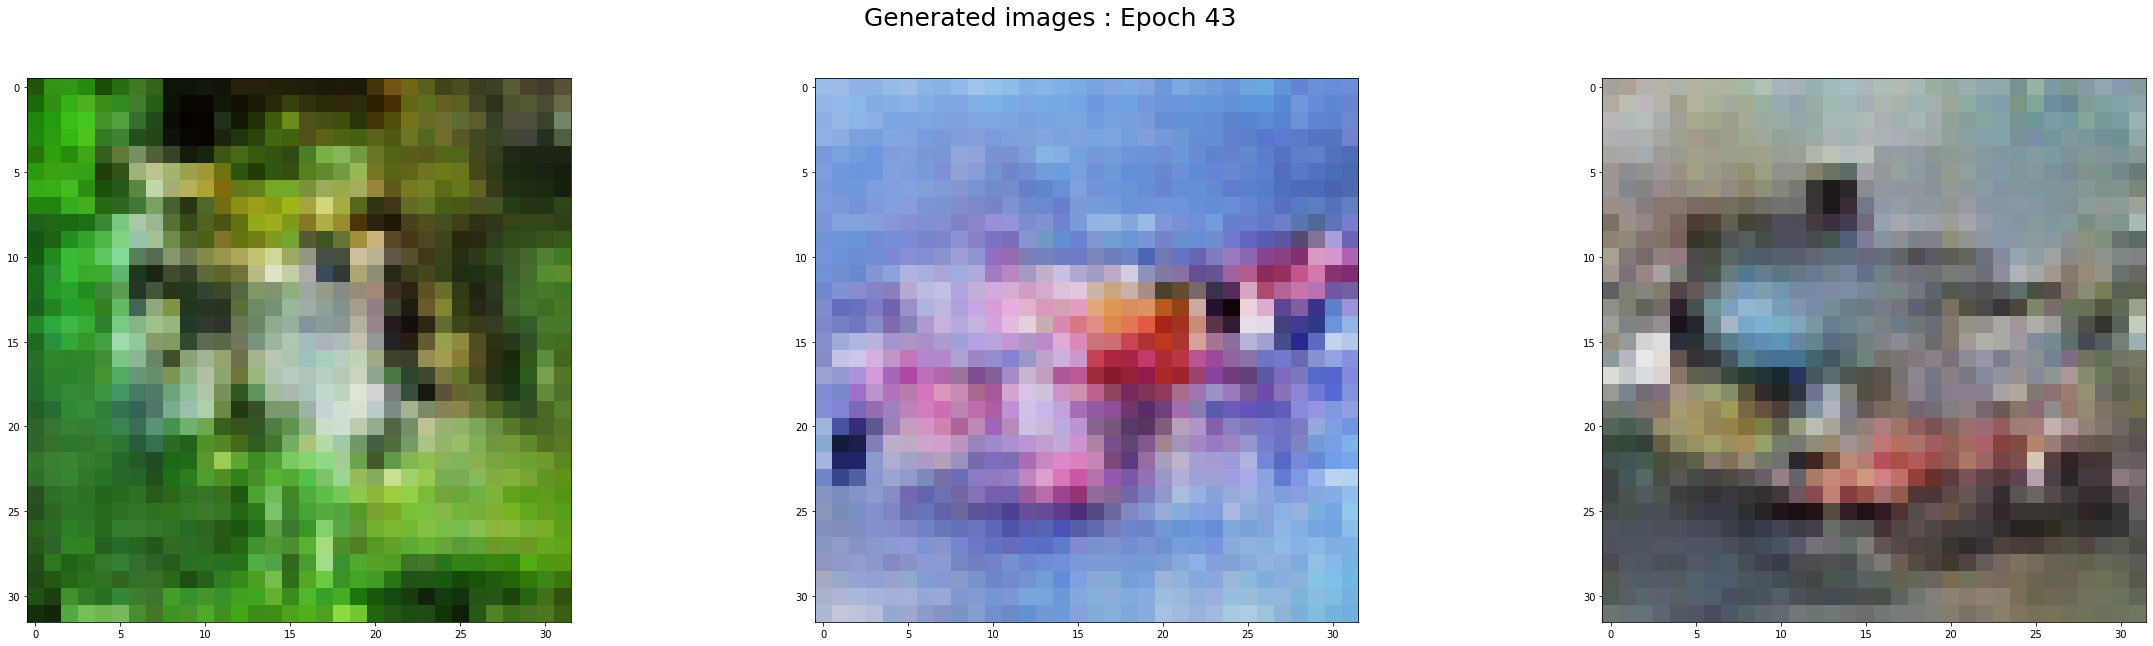

---------------------------------------------------------------
epoch :  44  d_loss =  [0.508983314037323, 0.7421875]  g_loss =  1.1482945680618286


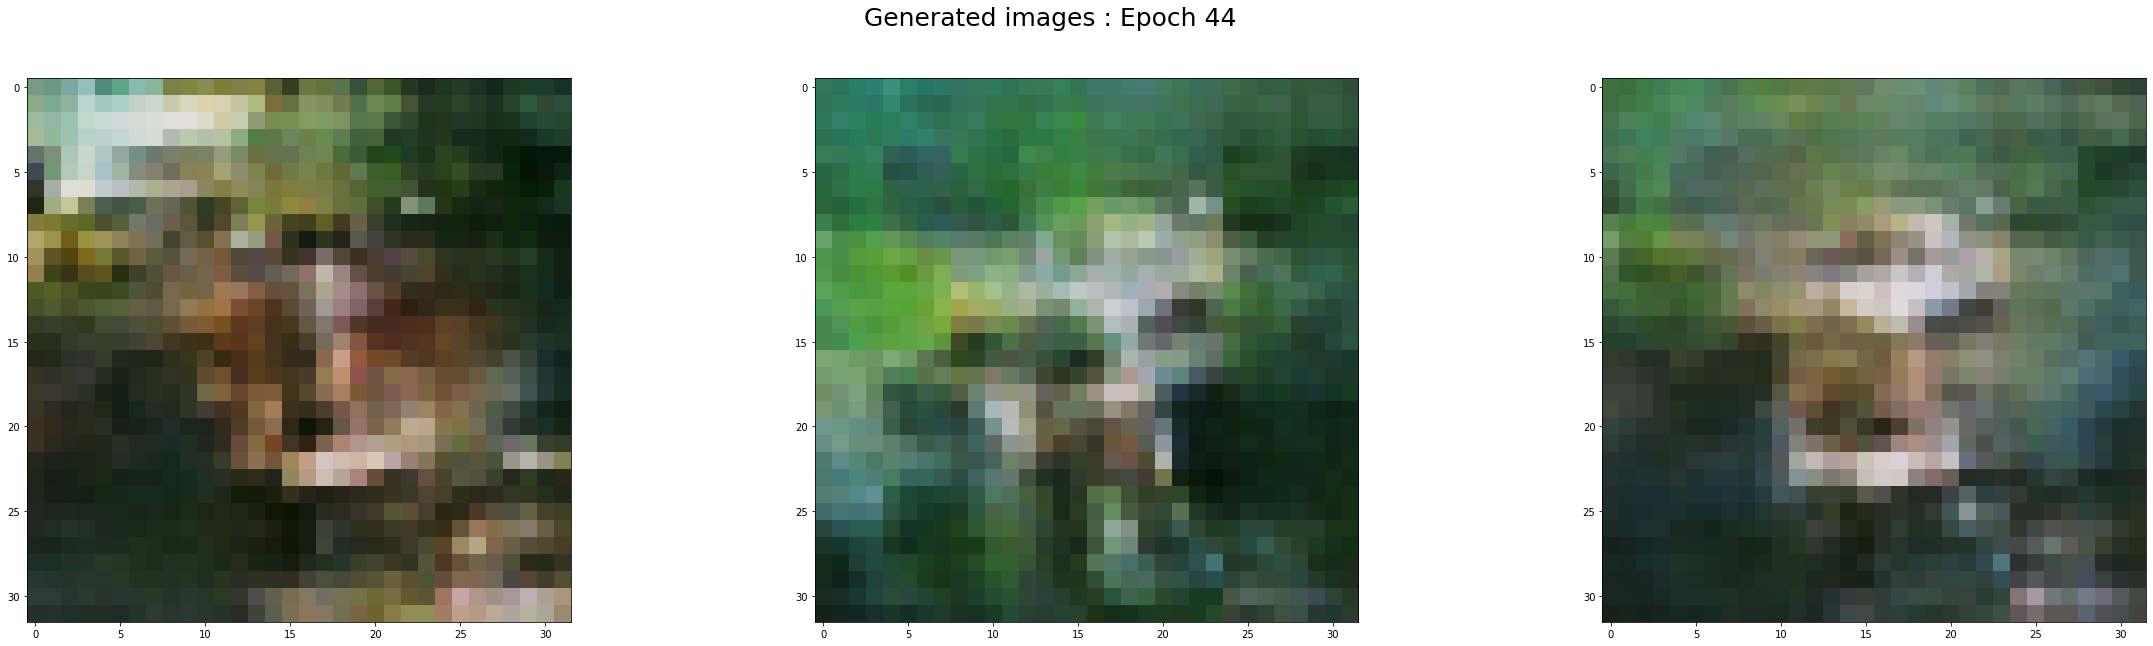

---------------------------------------------------------------
epoch :  45  d_loss =  [0.53749680519104, 0.73046875]  g_loss =  1.08155357837677


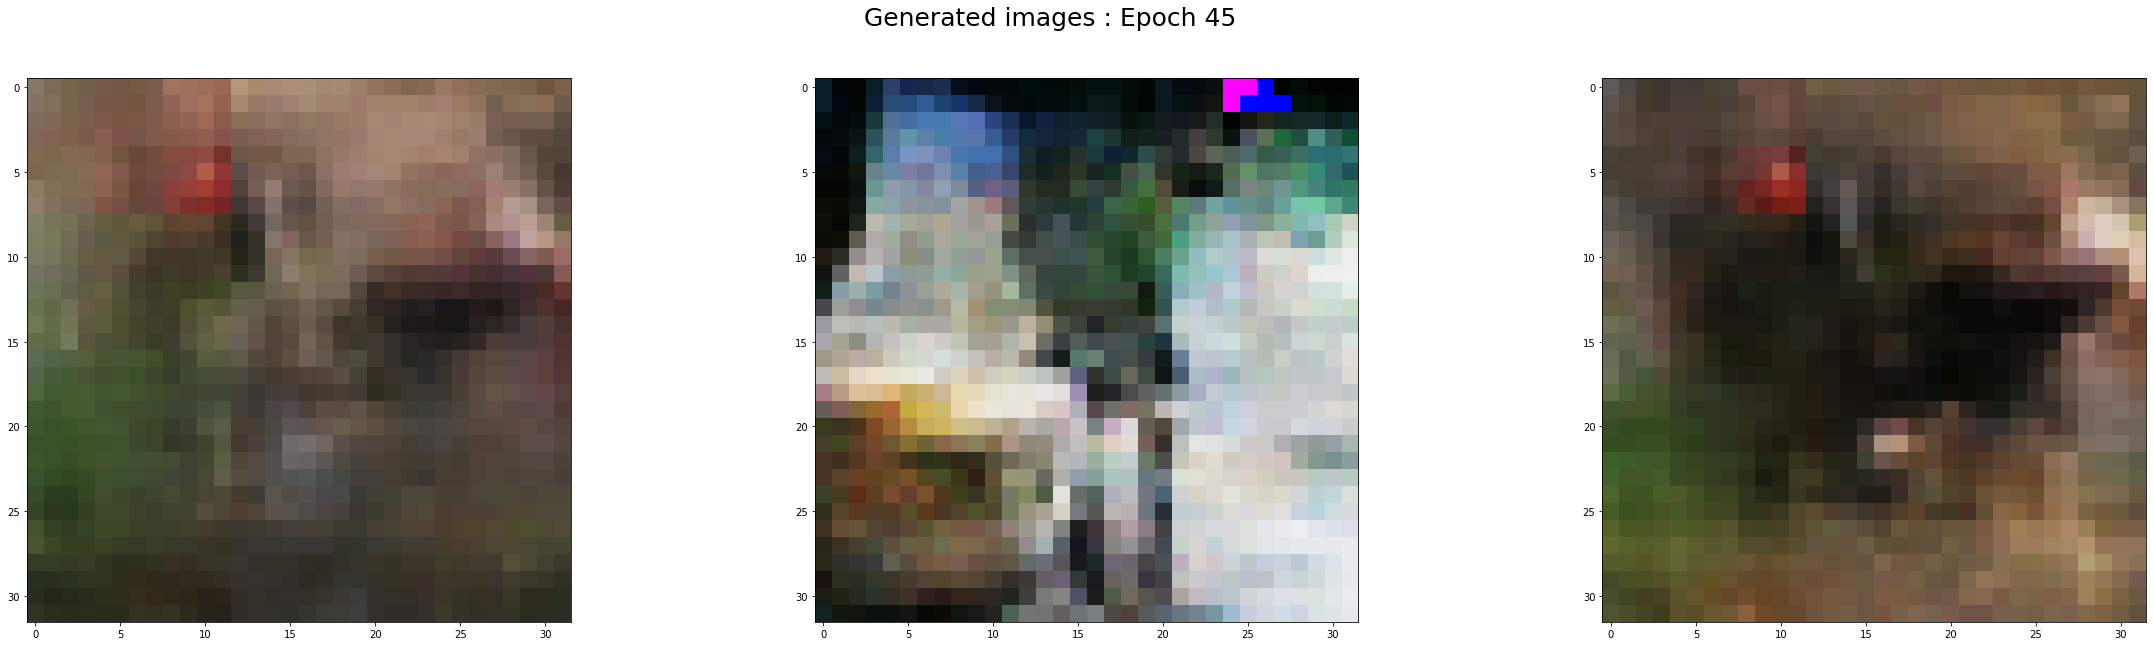

---------------------------------------------------------------
epoch :  46  d_loss =  [0.5809249877929688, 0.62109375]  g_loss =  1.3430721759796143


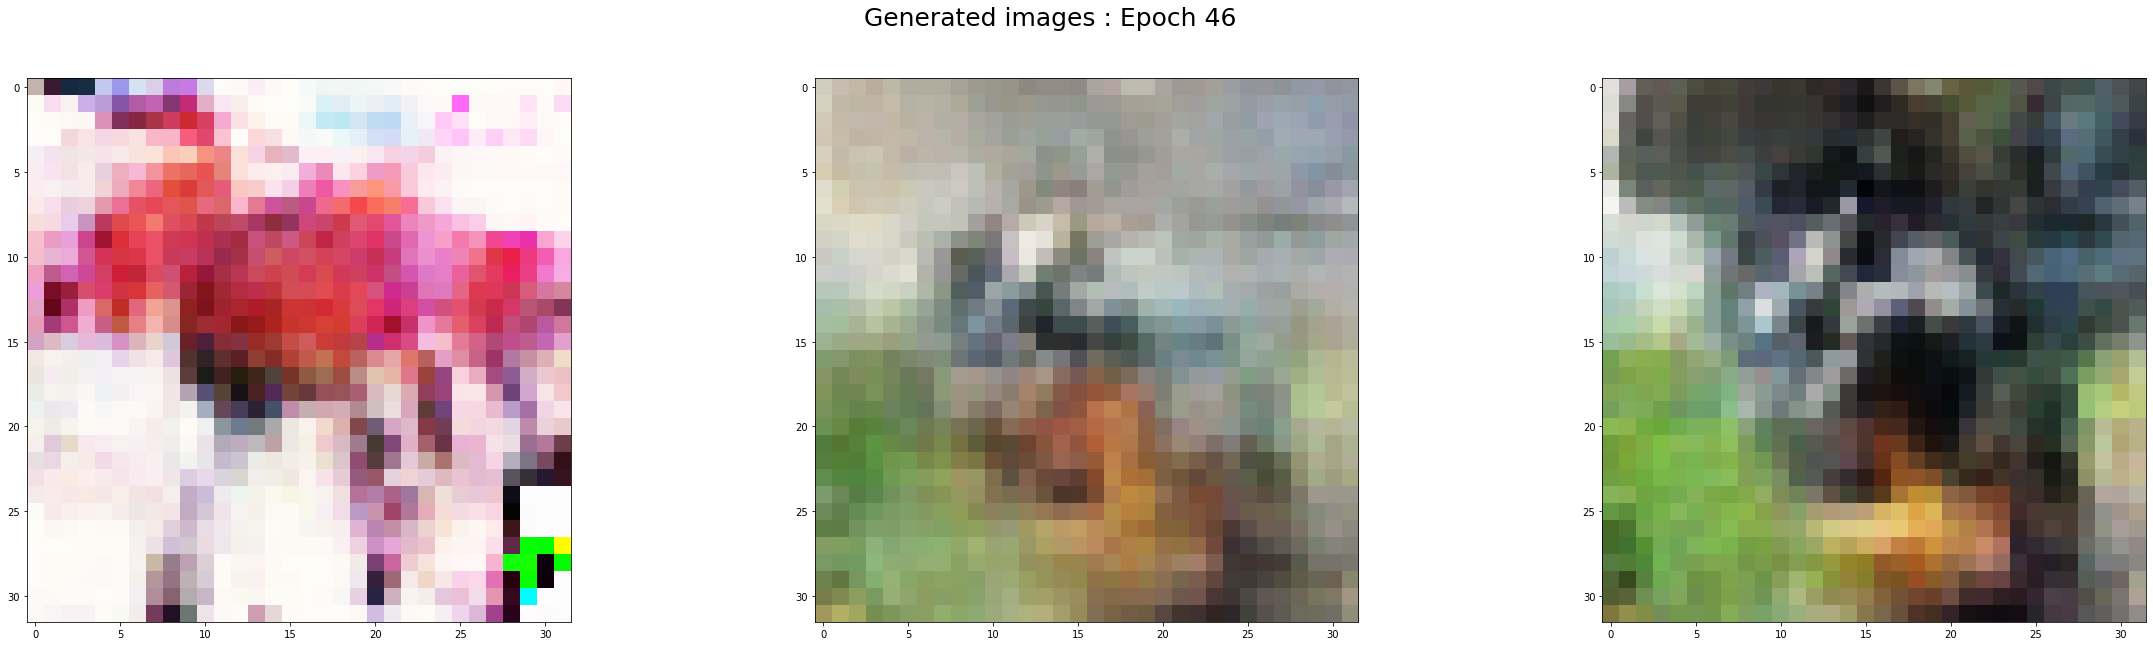

---------------------------------------------------------------
epoch :  47  d_loss =  [0.5768665671348572, 0.6875]  g_loss =  1.0490217208862305


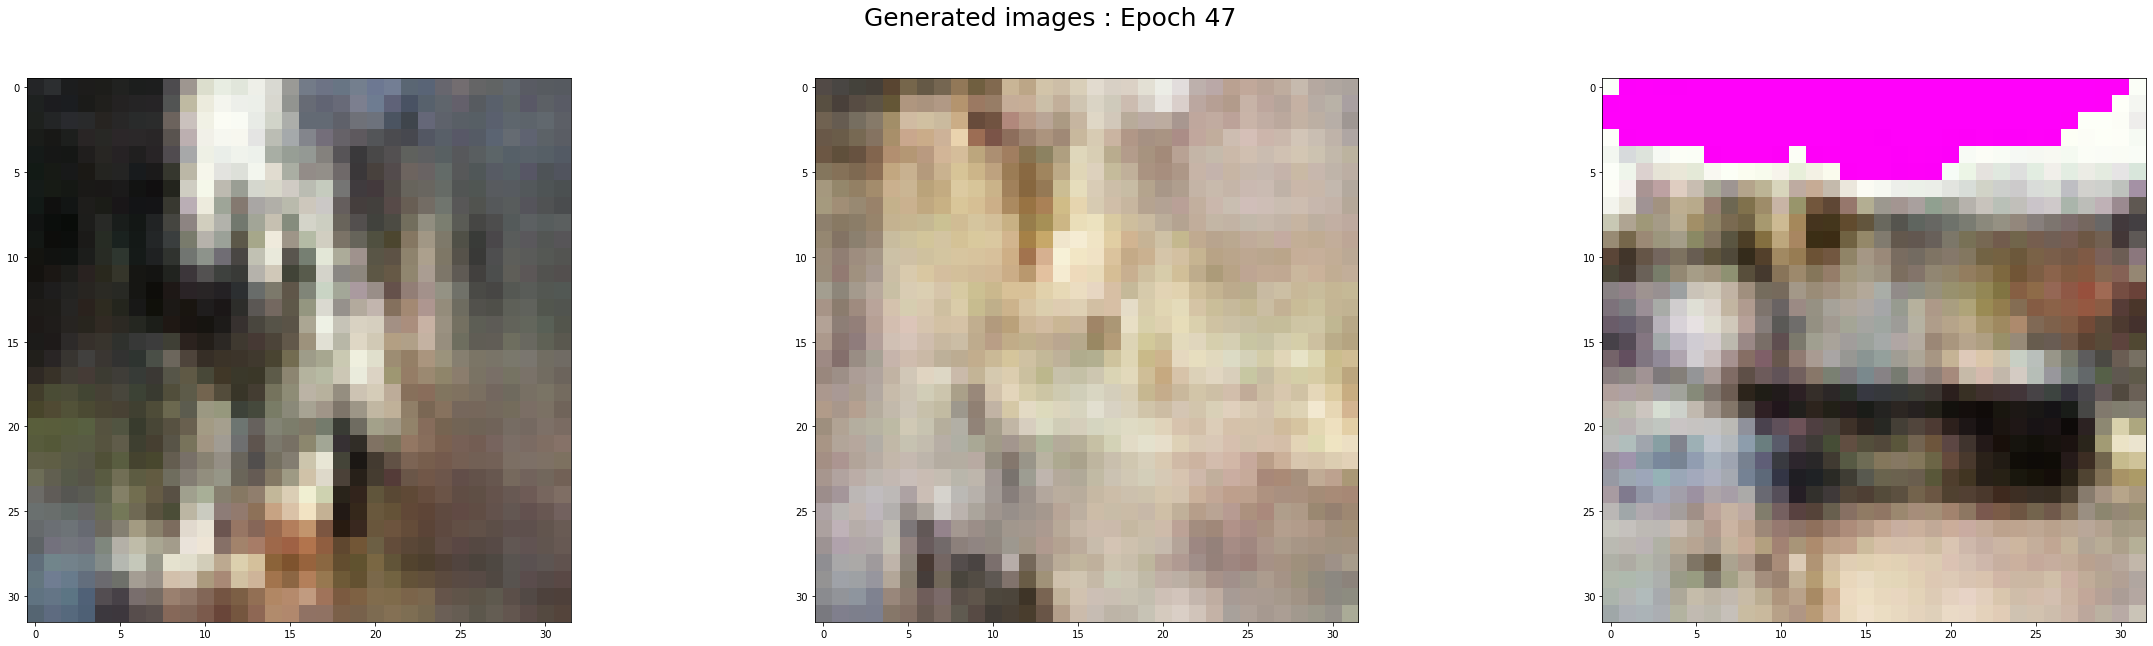

---------------------------------------------------------------
epoch :  48  d_loss =  [0.6701335906982422, 0.640625]  g_loss =  0.784252405166626


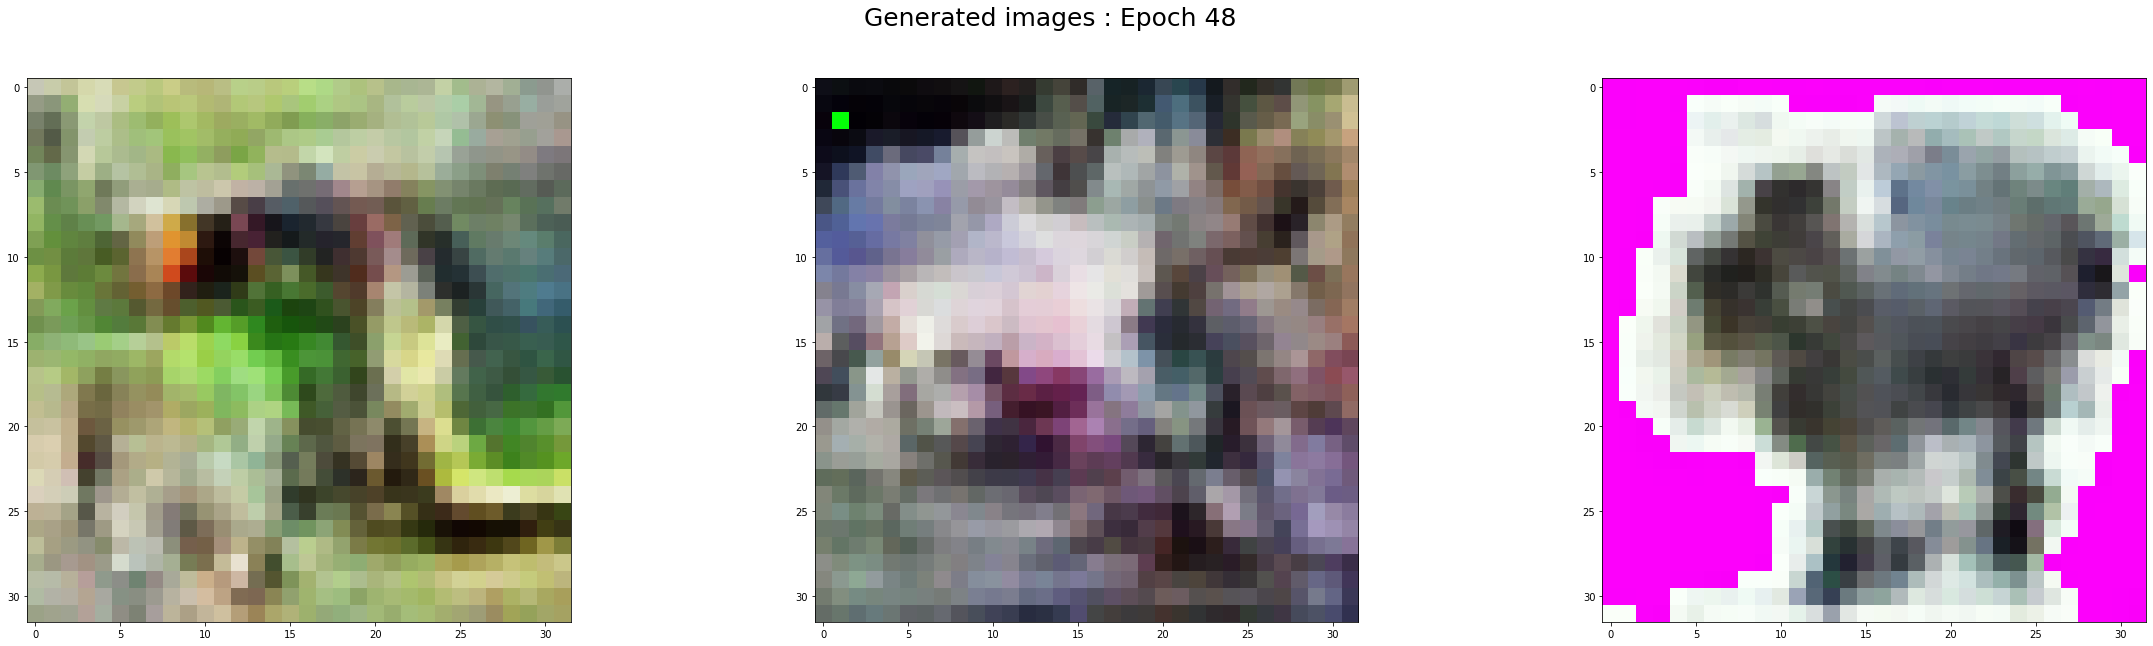

---------------------------------------------------------------
epoch :  49  d_loss =  [0.7348877787590027, 0.578125]  g_loss =  1.4207909107208252


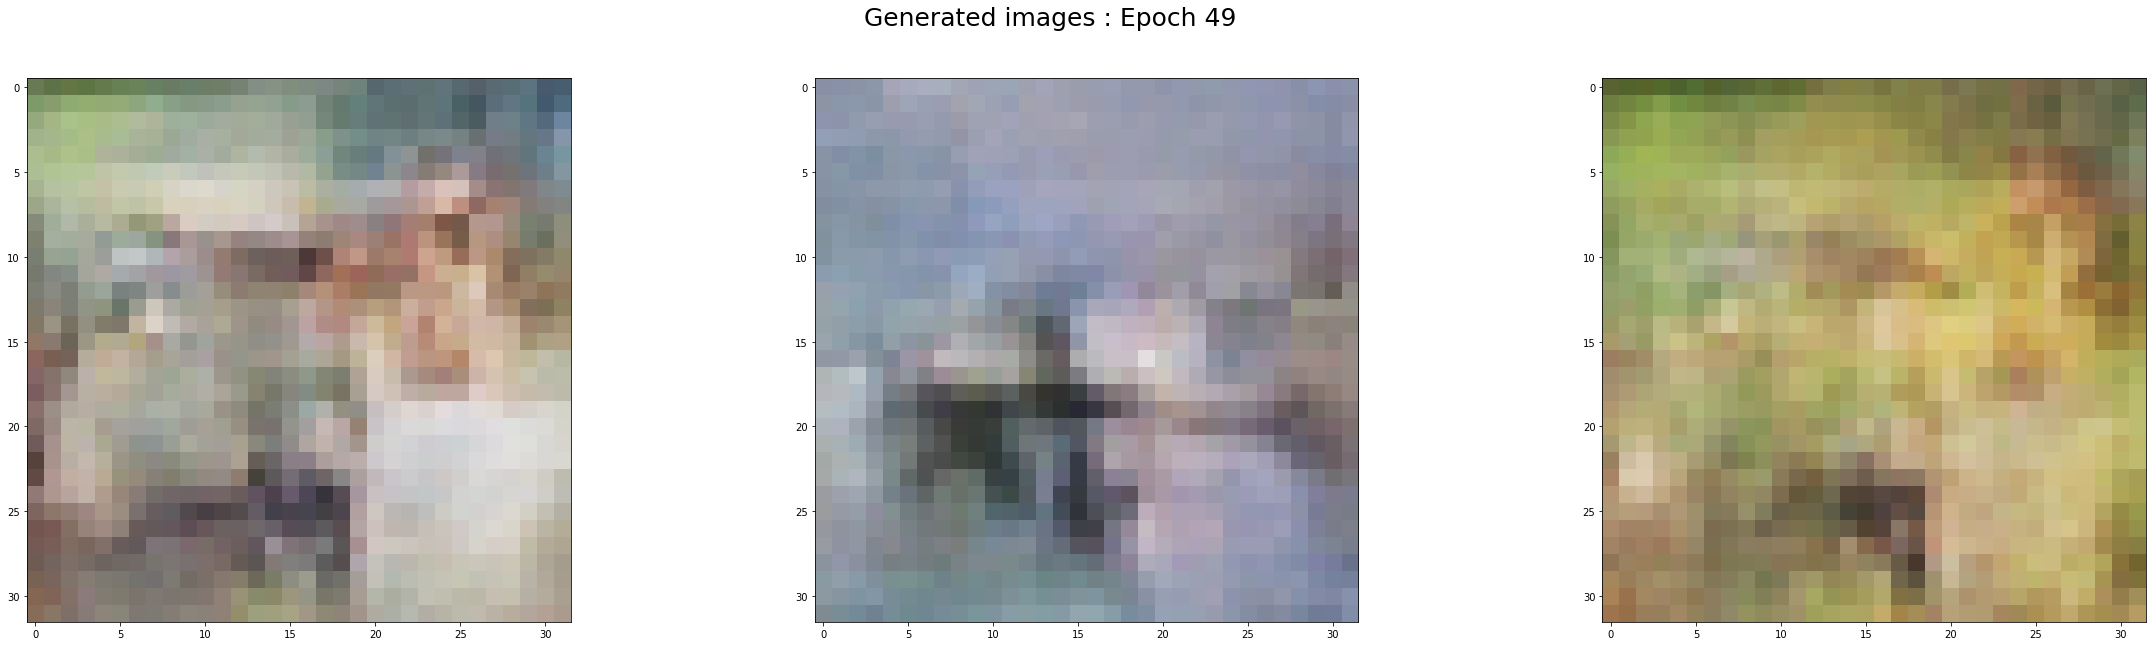

---------------------------------------------------------------
epoch :  50  d_loss =  [0.8055915236473083, 0.55859375]  g_loss =  1.0102345943450928


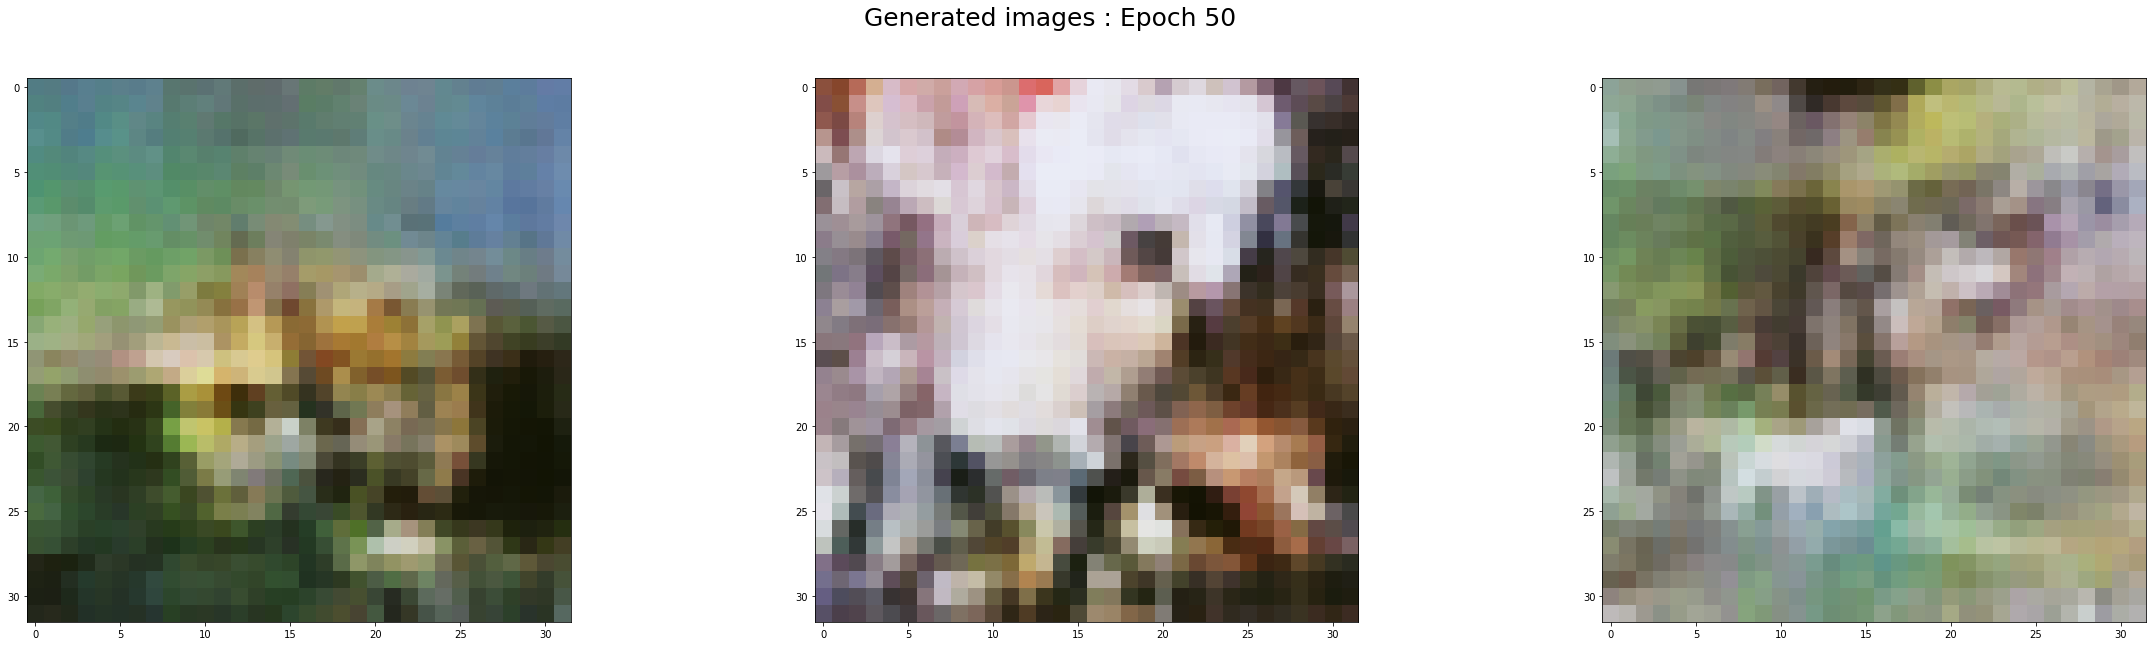

---------------------------------------------------------------
epoch :  51  d_loss =  [0.47426801919937134, 0.77734375]  g_loss =  1.1489894390106201


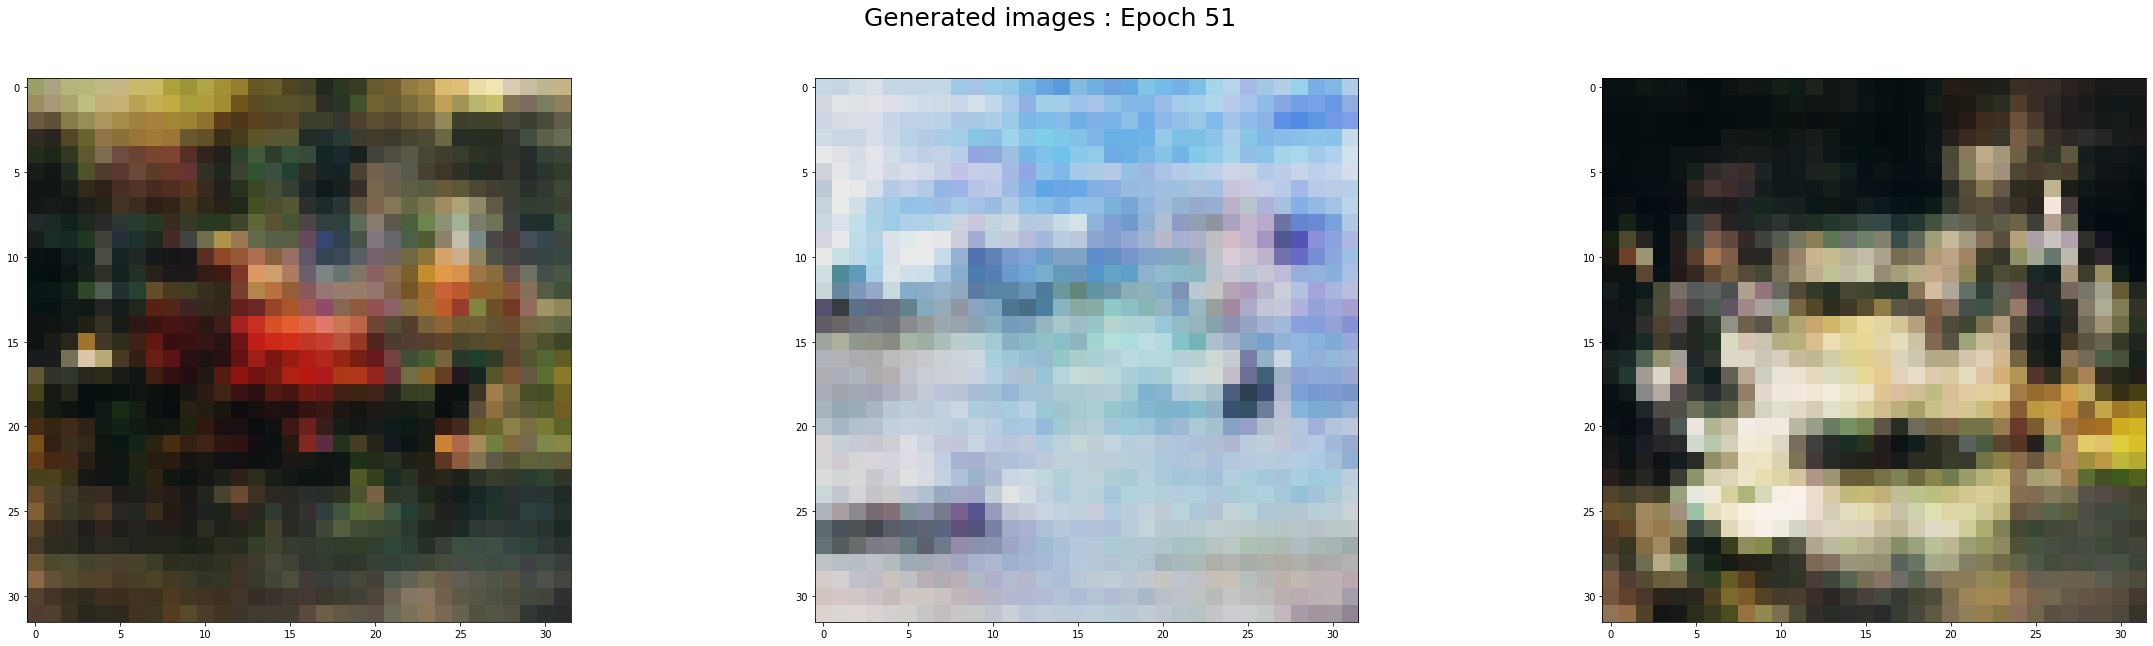

---------------------------------------------------------------
epoch :  52  d_loss =  [0.6437407732009888, 0.640625]  g_loss =  1.1965234279632568


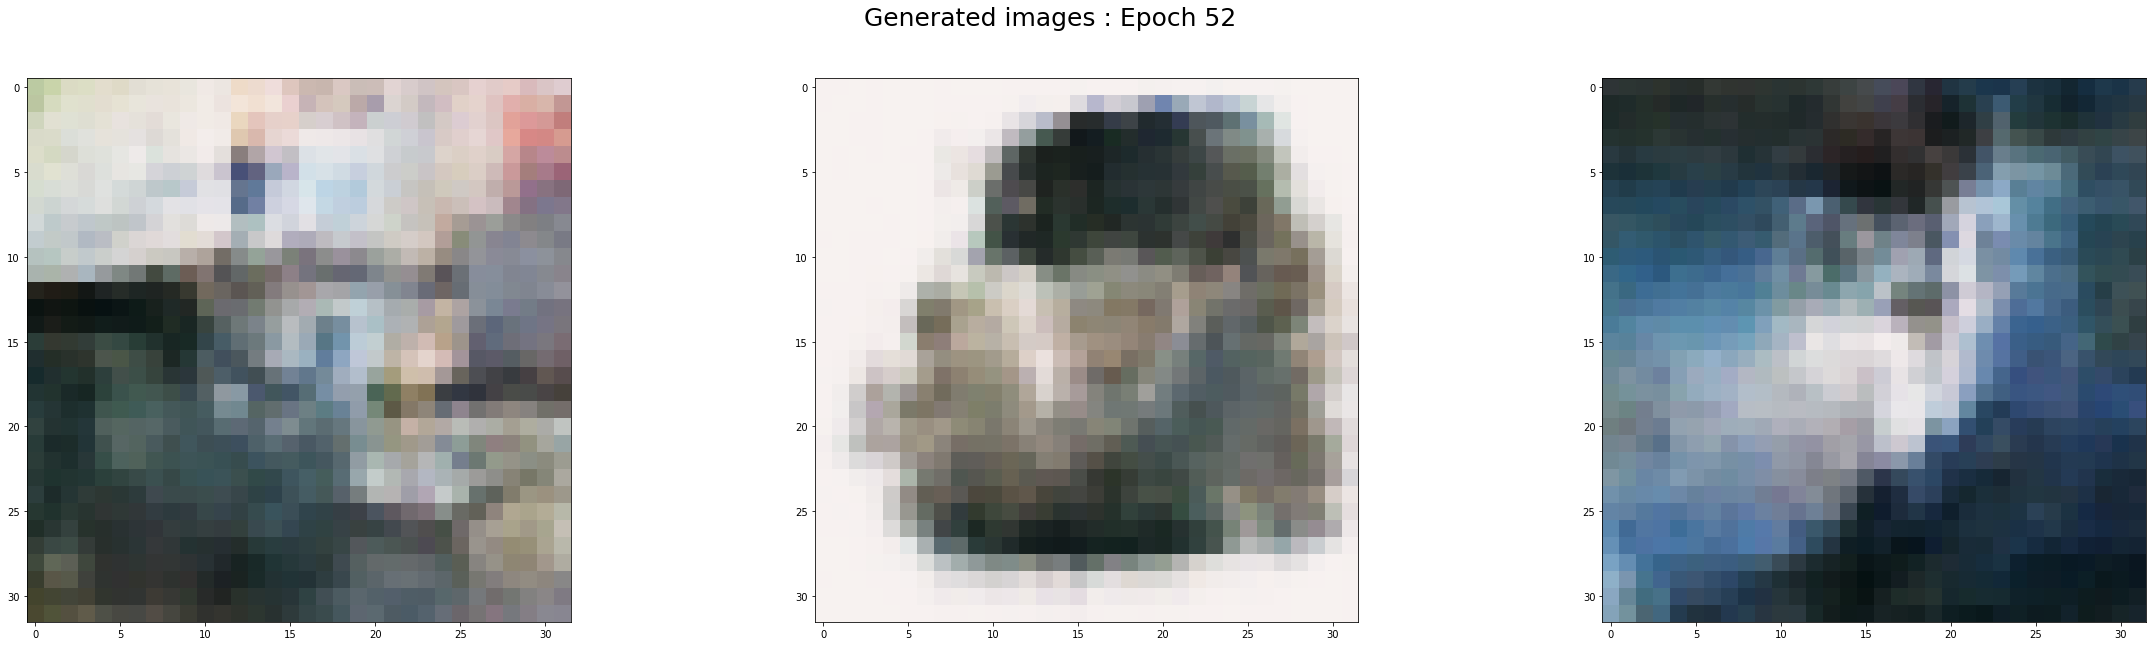

---------------------------------------------------------------
epoch :  53  d_loss =  [0.5549569725990295, 0.71484375]  g_loss =  1.333709955215454


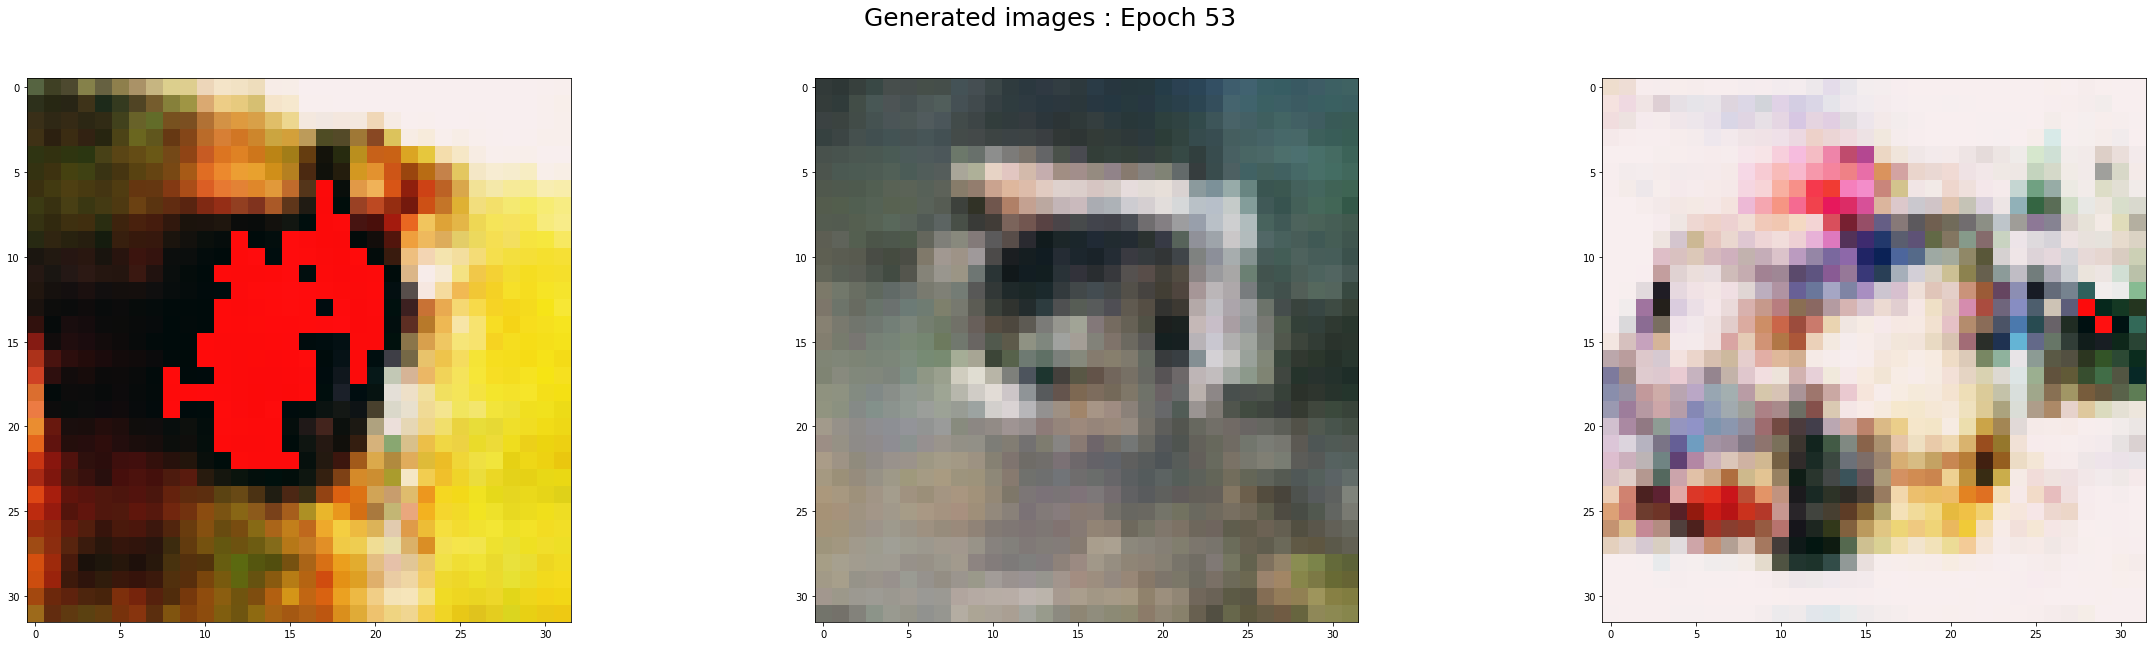

---------------------------------------------------------------
epoch :  54  d_loss =  [0.5761093497276306, 0.73046875]  g_loss =  0.9888542890548706


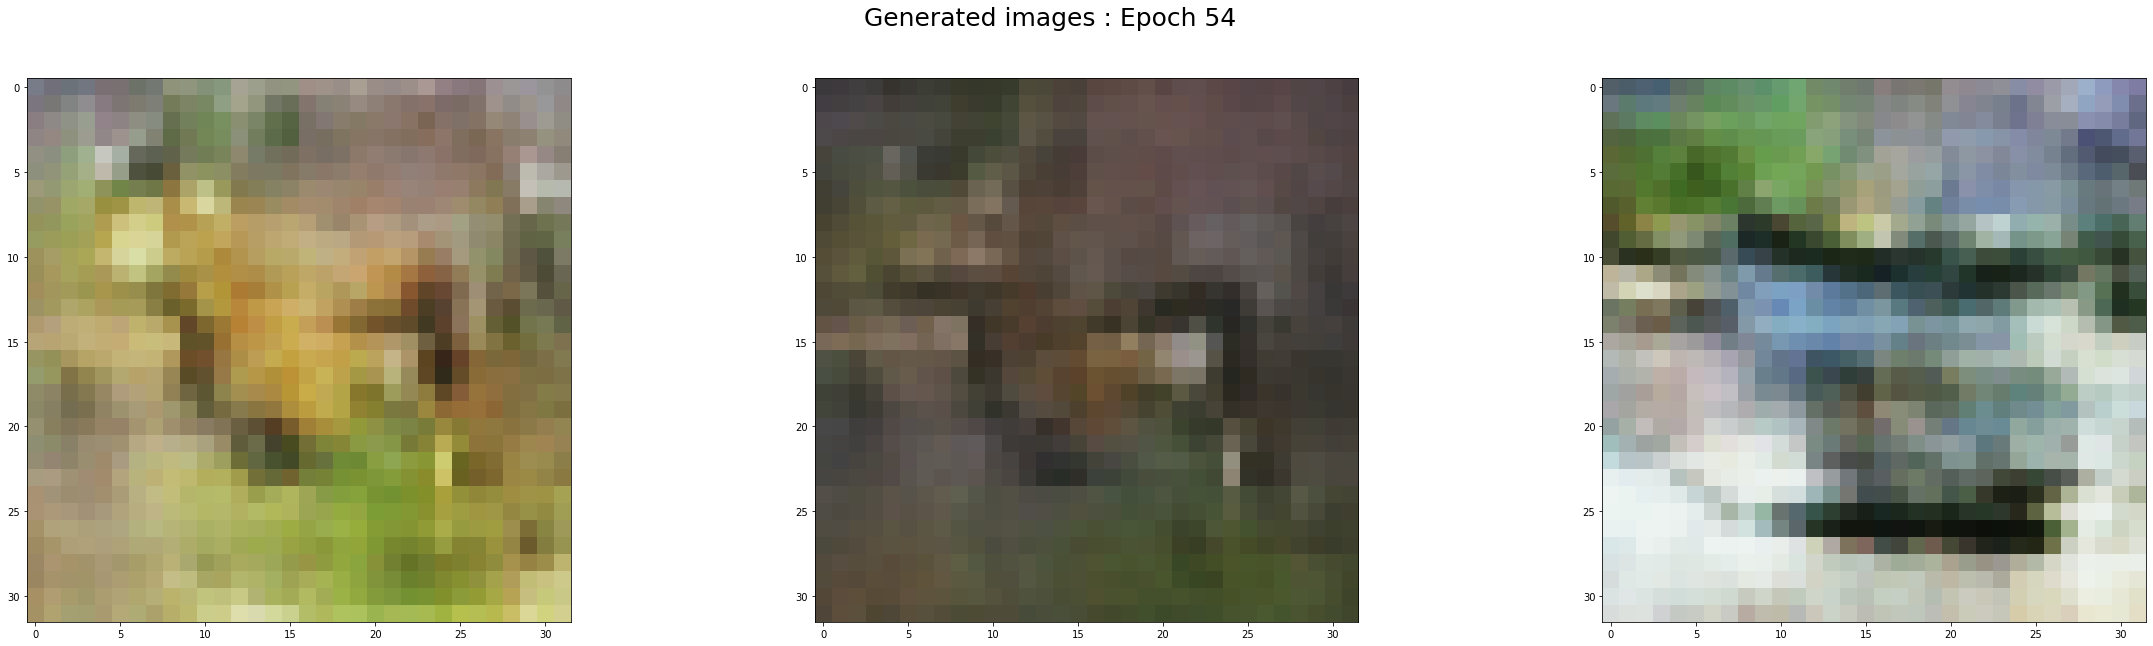

---------------------------------------------------------------
epoch :  55  d_loss =  [0.5680466890335083, 0.69921875]  g_loss =  0.989495038986206


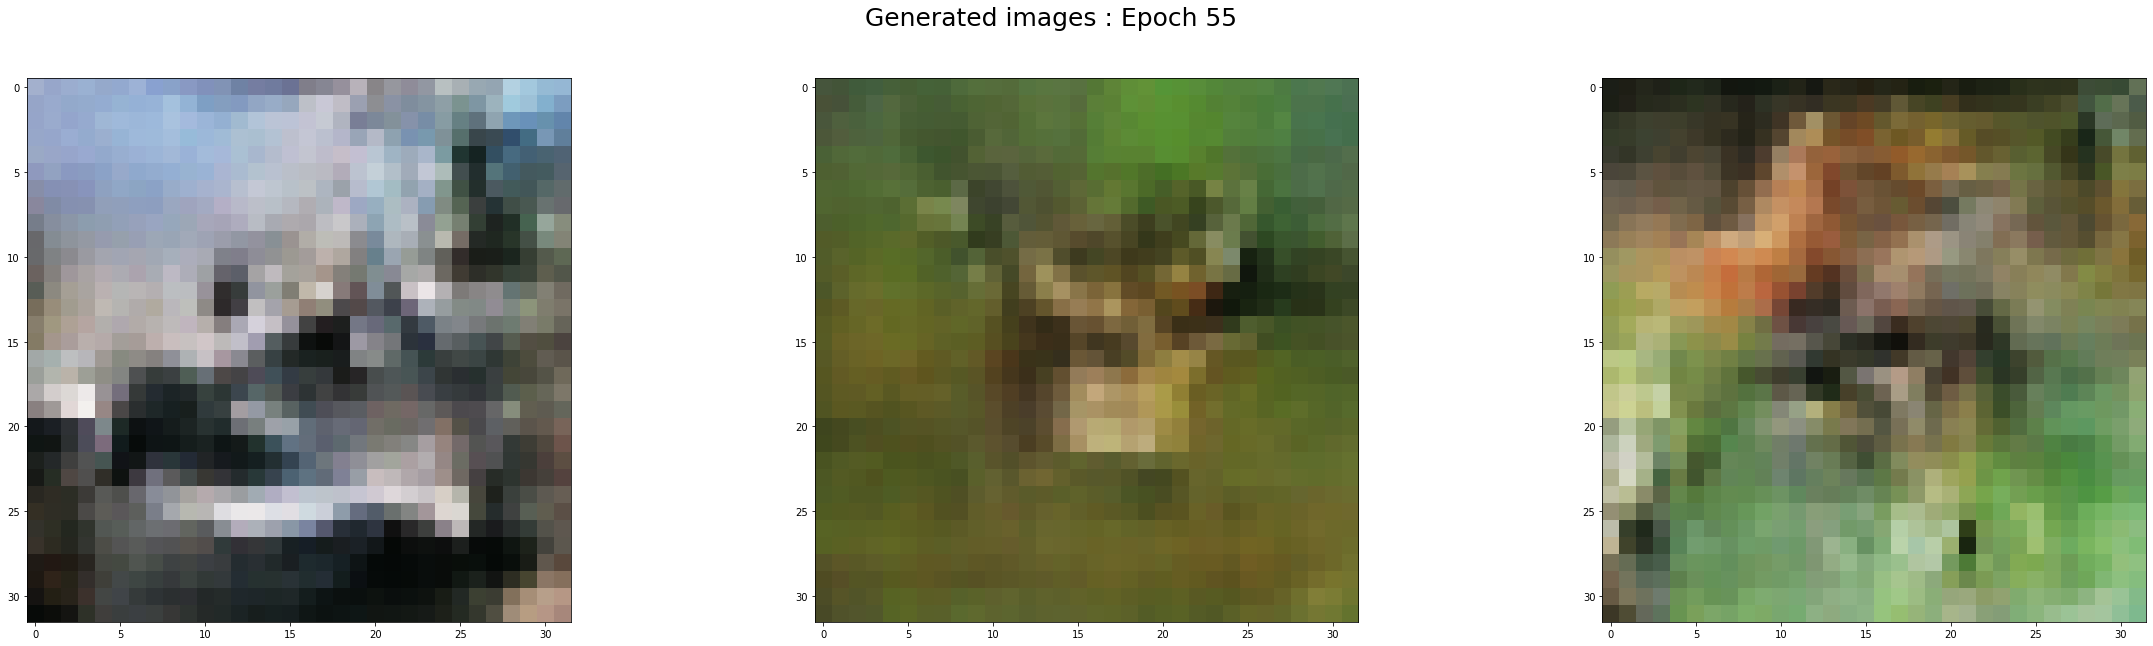

---------------------------------------------------------------
epoch :  56  d_loss =  [0.4942052960395813, 0.77734375]  g_loss =  1.0063371658325195


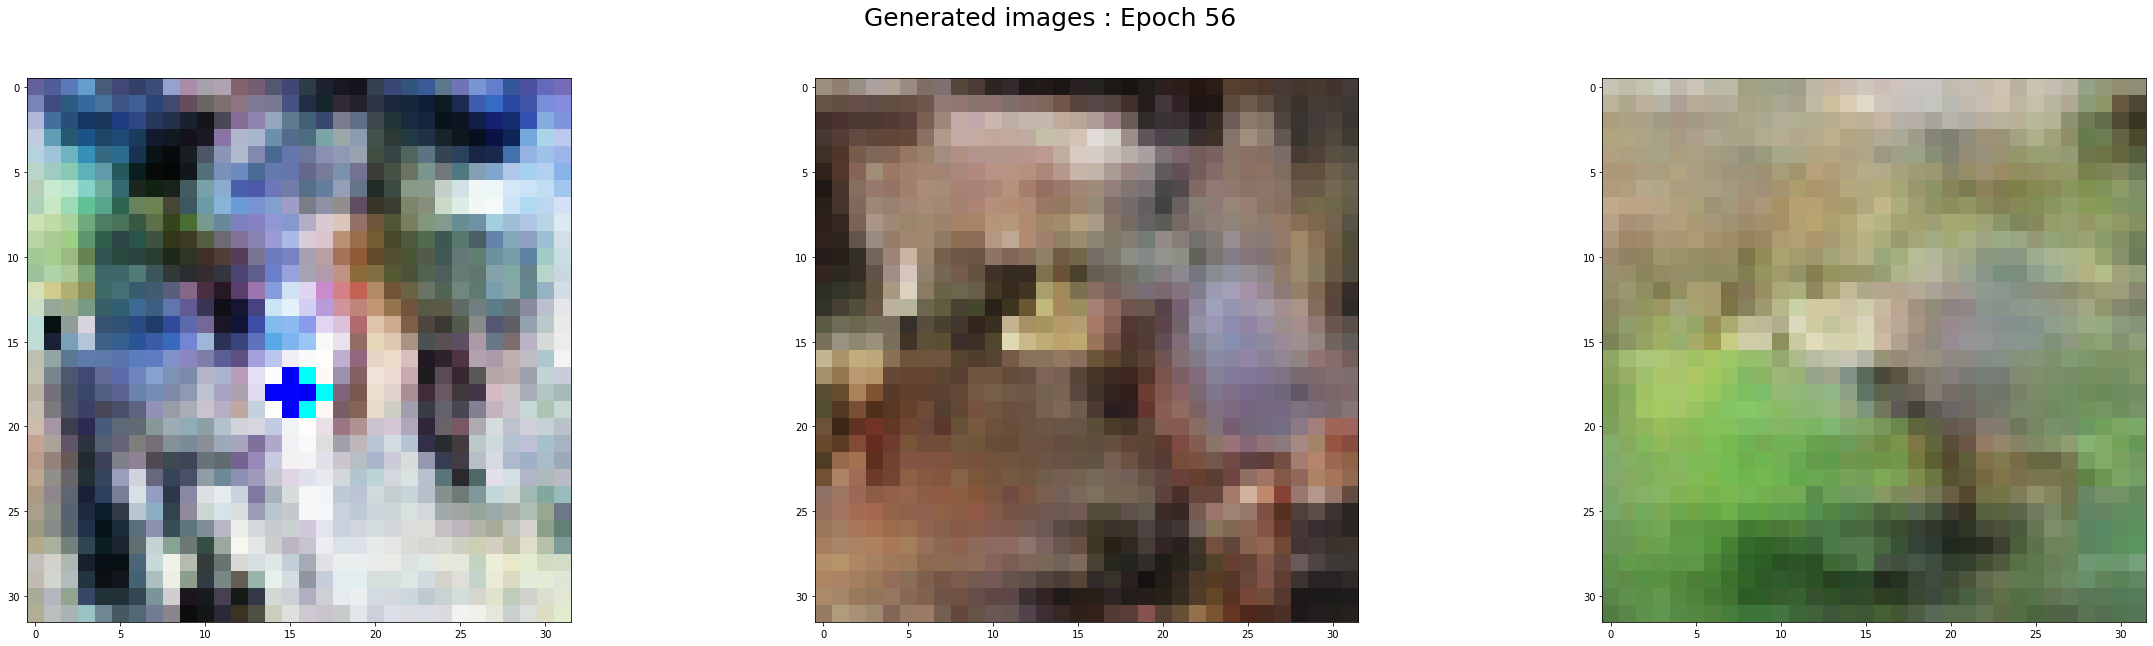

---------------------------------------------------------------
epoch :  57  d_loss =  [0.5086016654968262, 0.78125]  g_loss =  1.021872878074646


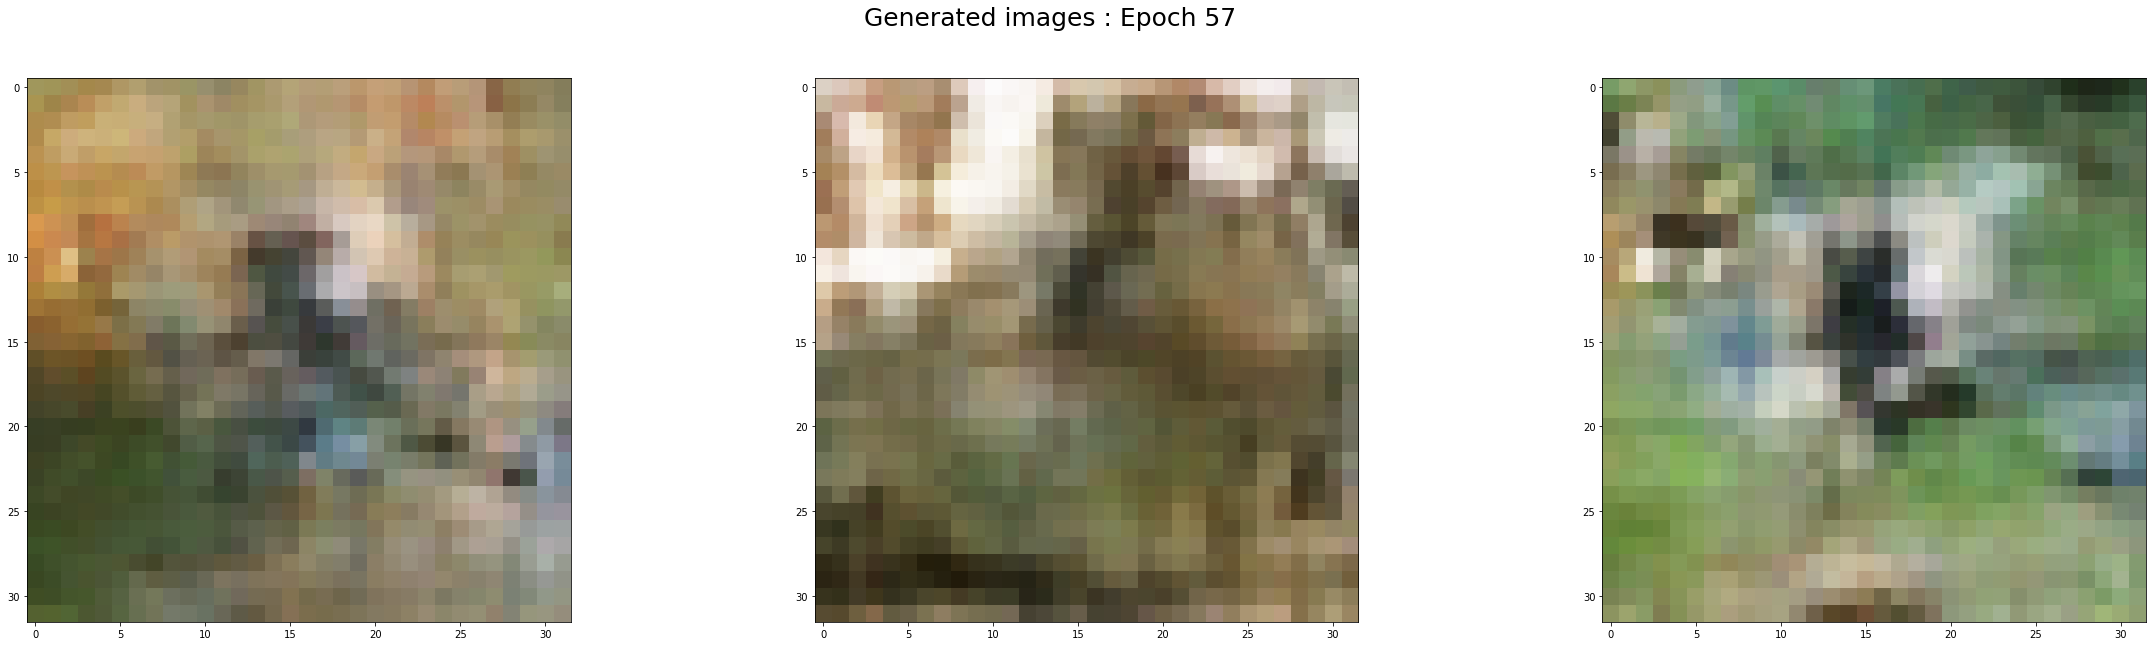

---------------------------------------------------------------
epoch :  58  d_loss =  [0.4690152704715729, 0.80859375]  g_loss =  1.0242235660552979


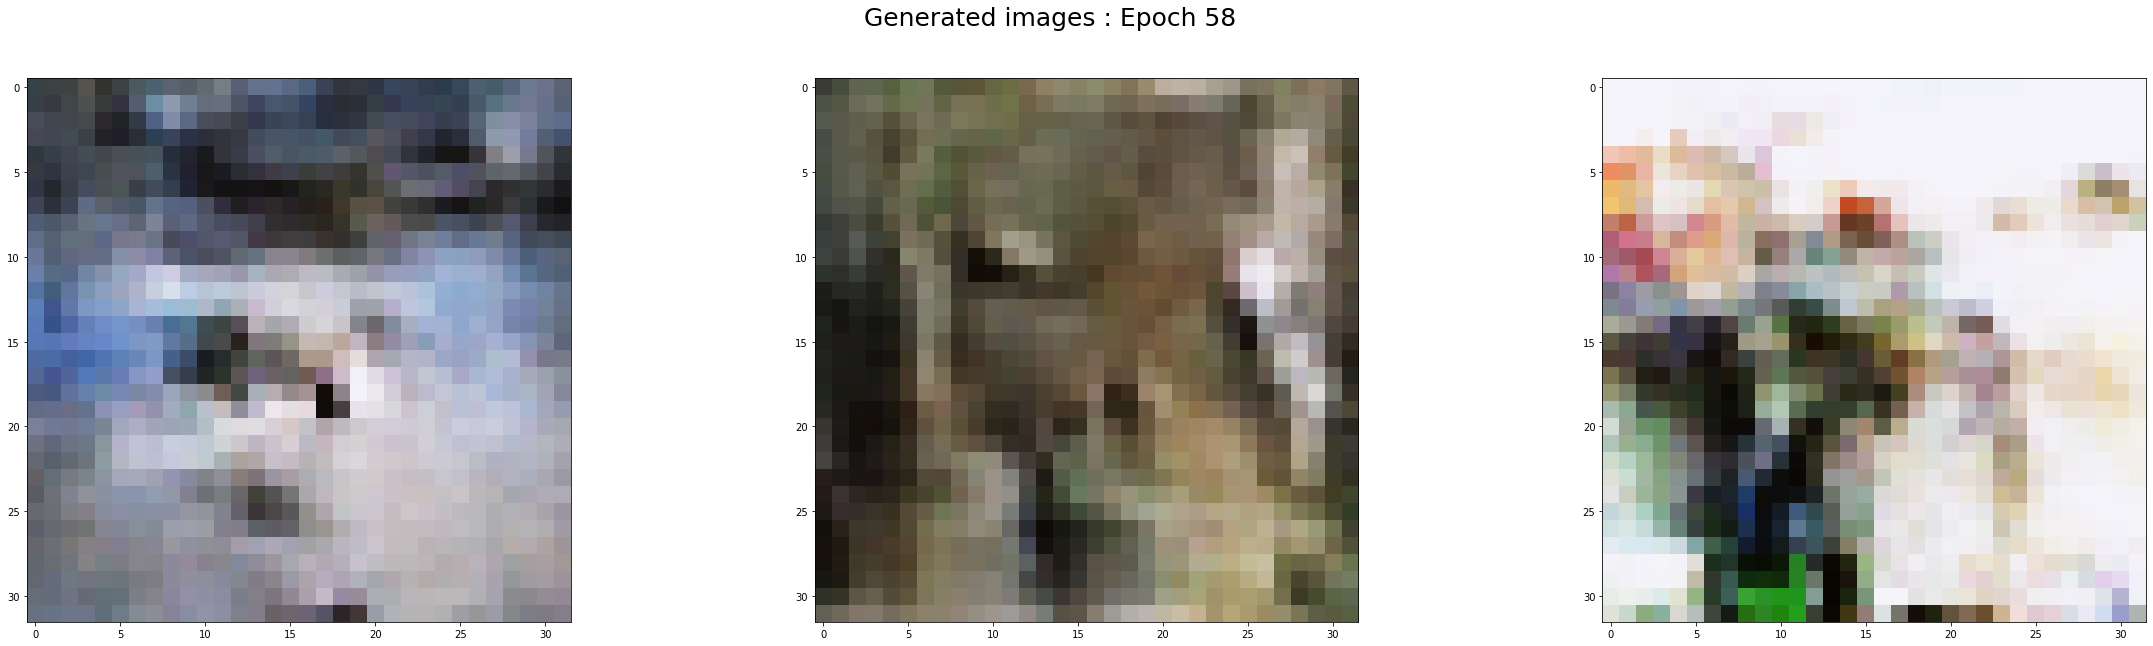

---------------------------------------------------------------
epoch :  59  d_loss =  [0.5720112919807434, 0.6953125]  g_loss =  1.6209888458251953


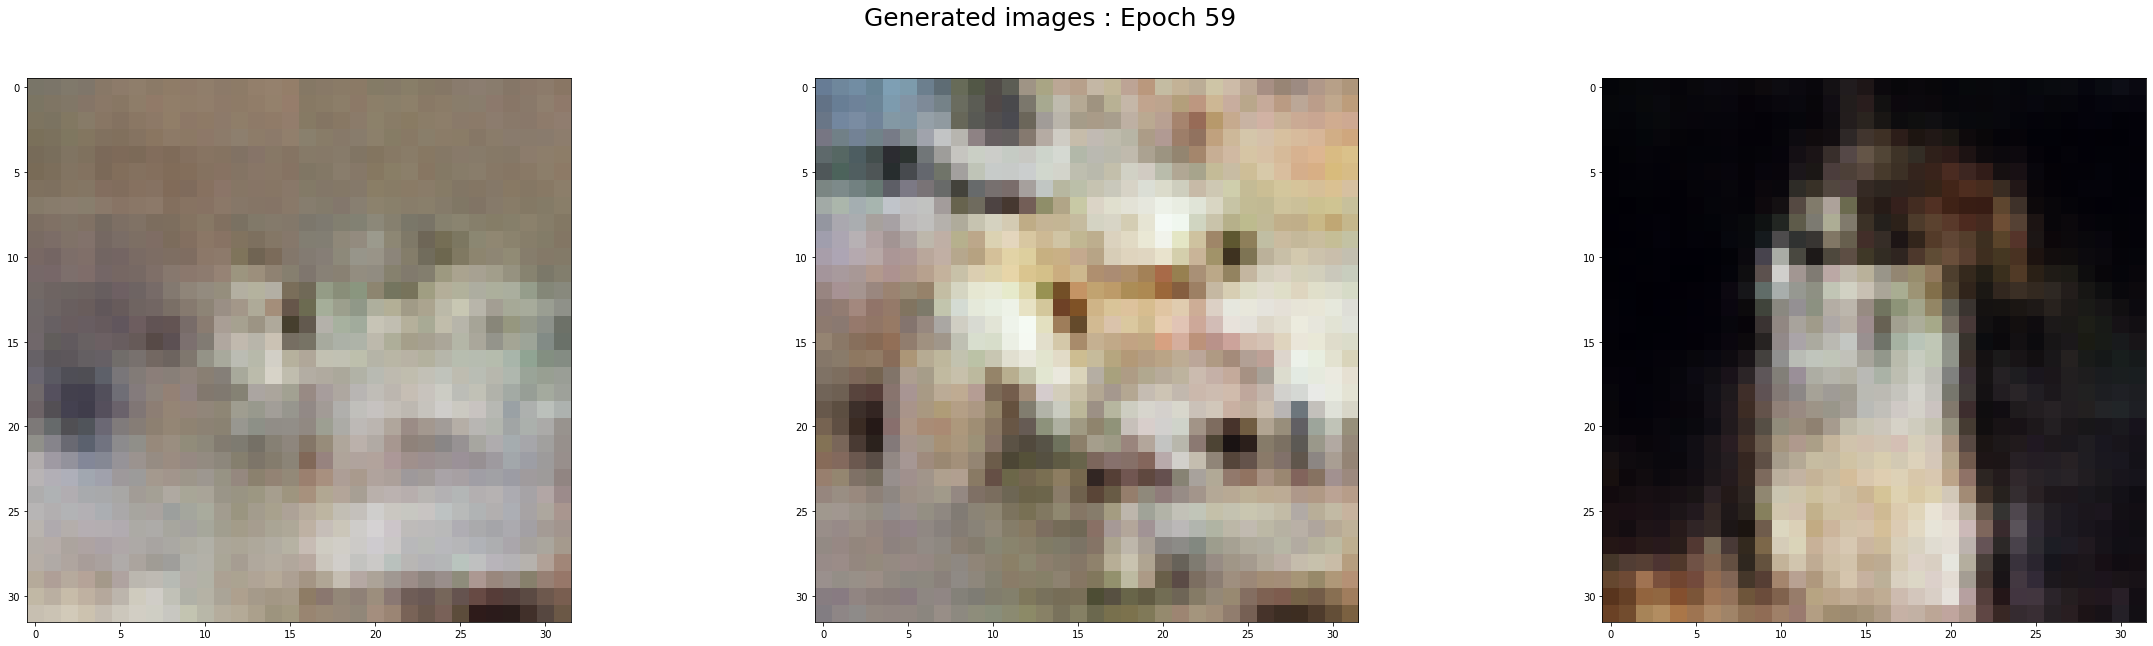

---------------------------------------------------------------
epoch :  60  d_loss =  [0.45809274911880493, 0.796875]  g_loss =  1.2951668500900269


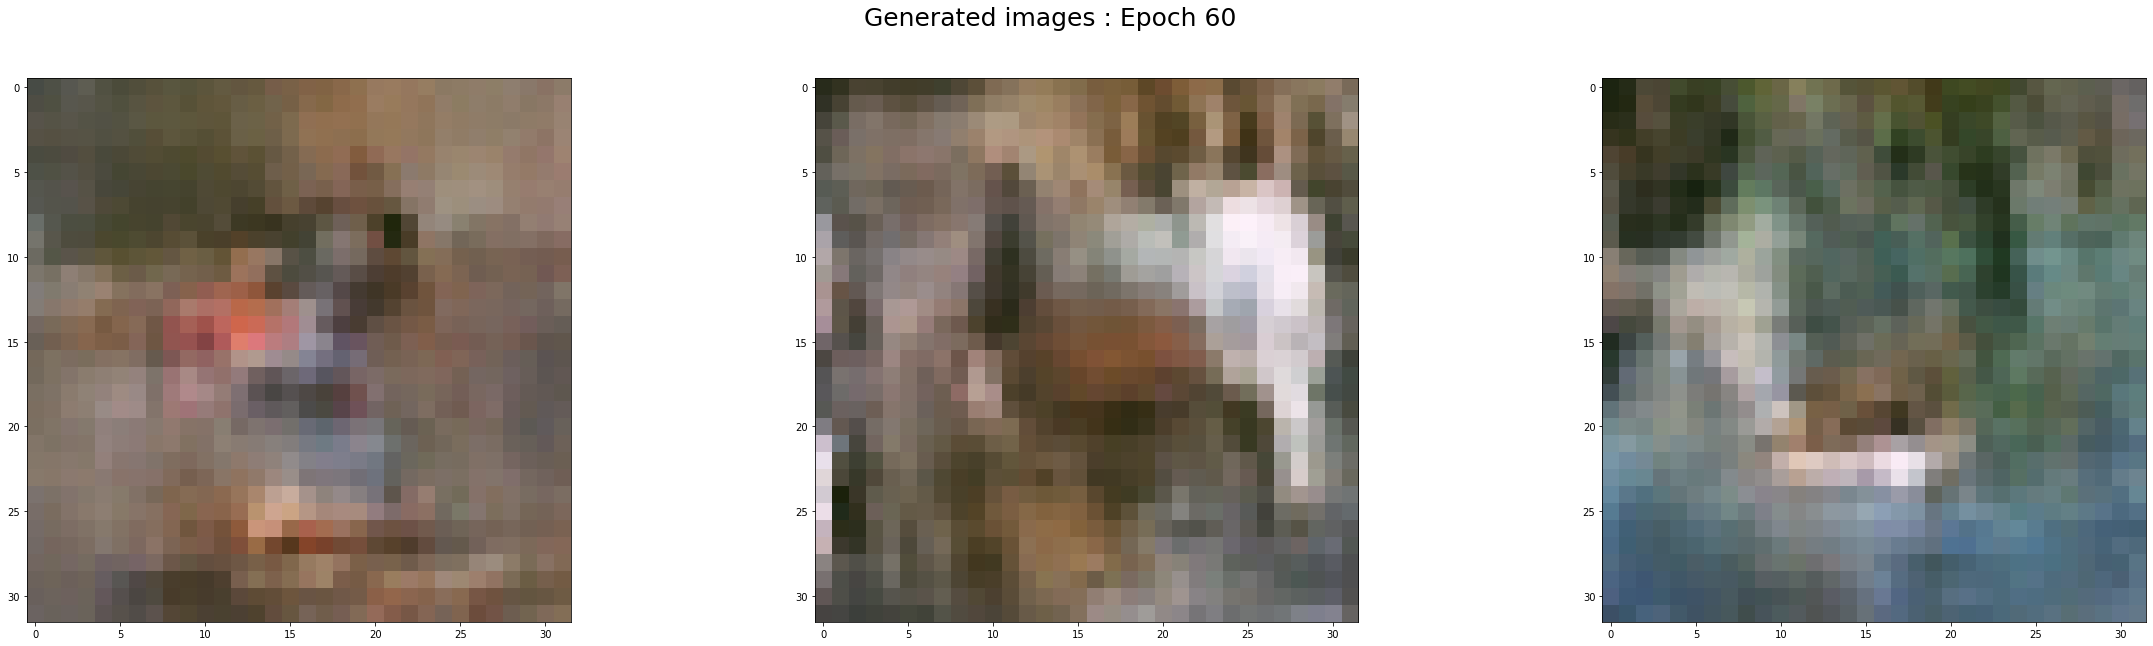

---------------------------------------------------------------
epoch :  61  d_loss =  [0.40805482864379883, 0.8515625]  g_loss =  1.0832487344741821


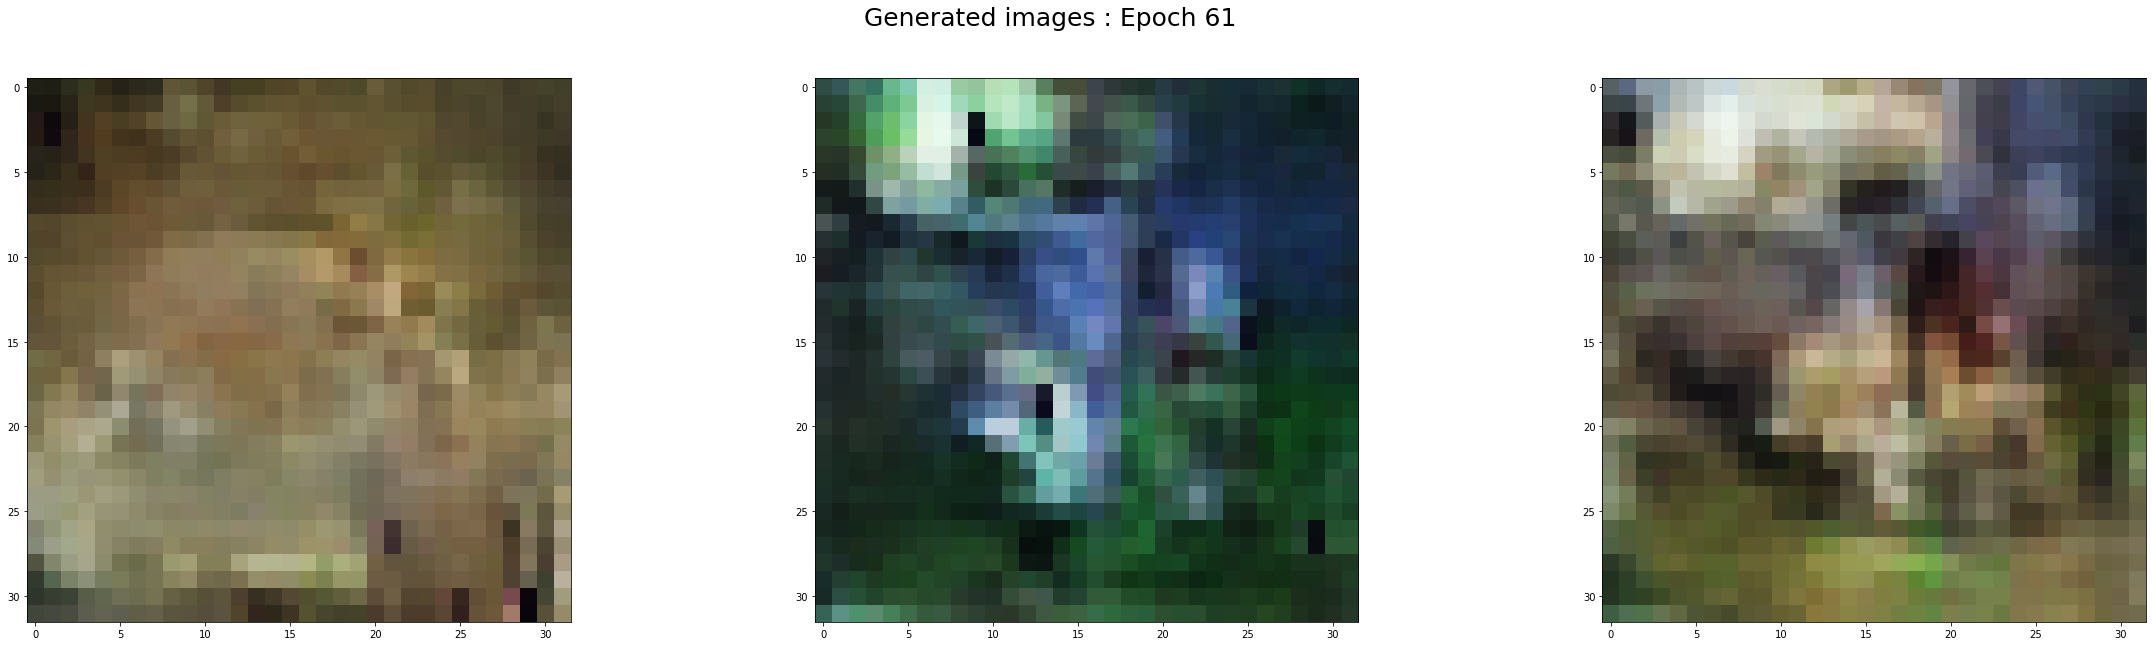

---------------------------------------------------------------
epoch :  62  d_loss =  [0.6661829948425293, 0.63671875]  g_loss =  1.1523429155349731


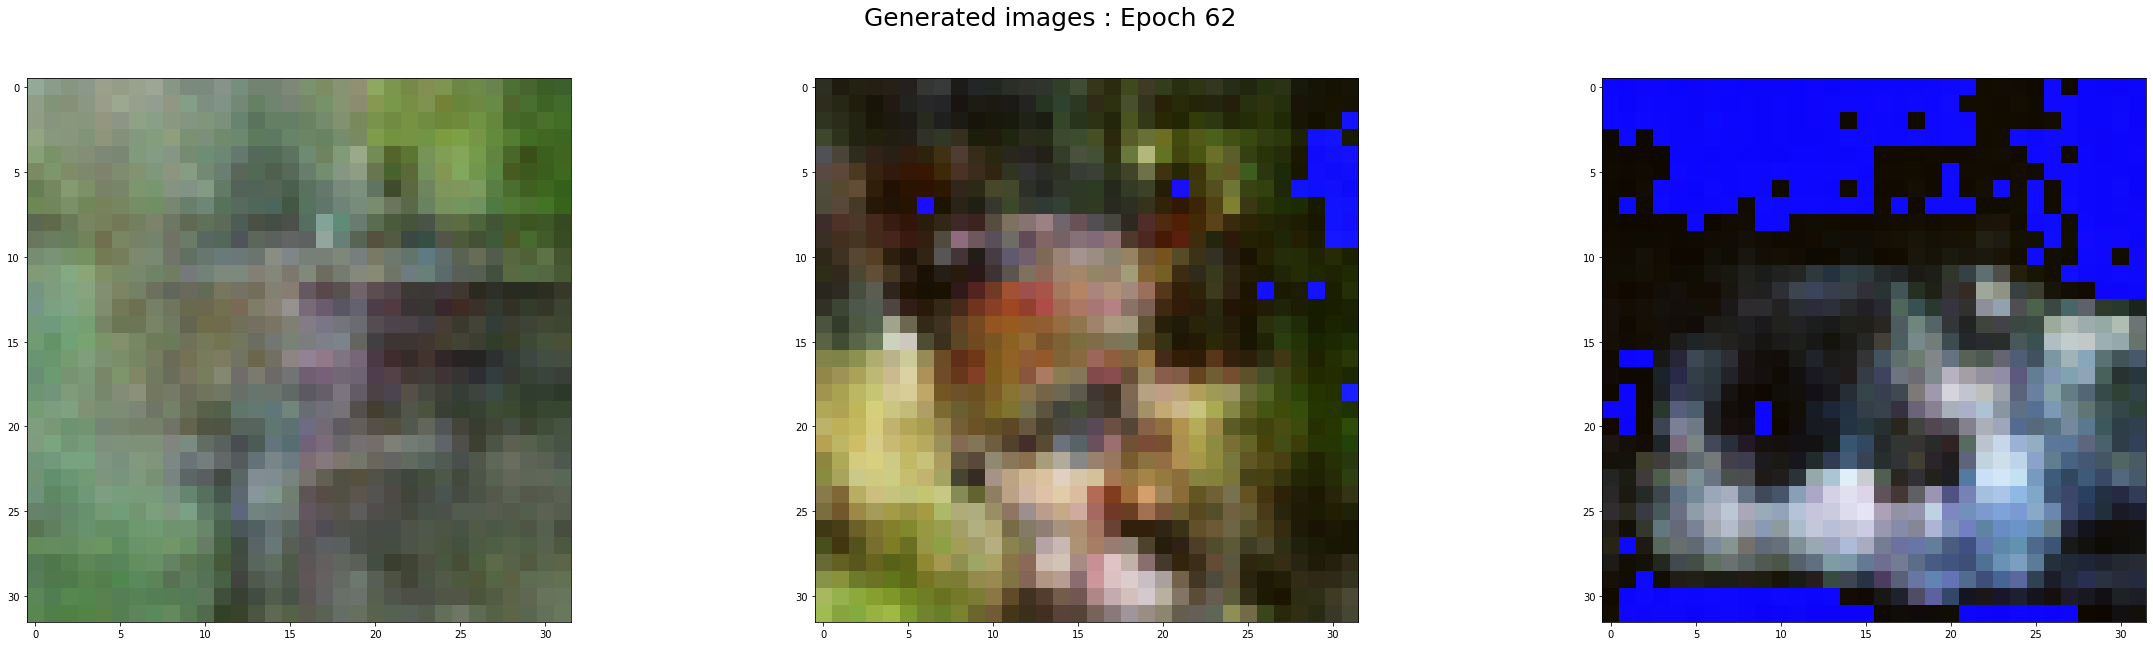

---------------------------------------------------------------
epoch :  63  d_loss =  [0.43268680572509766, 0.8203125]  g_loss =  0.8282883167266846


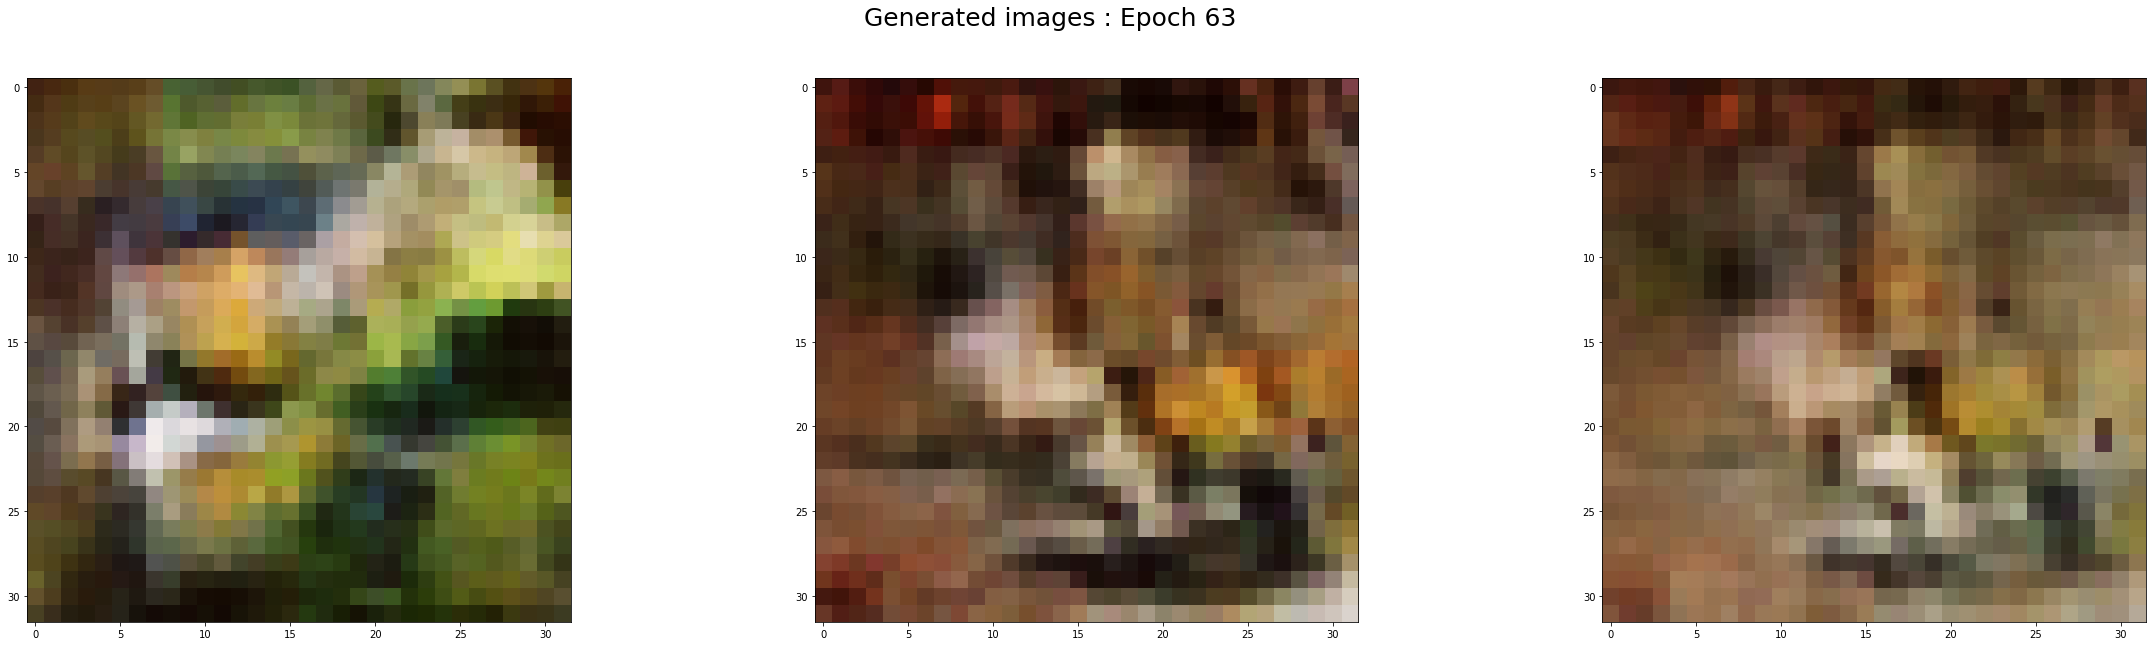

---------------------------------------------------------------
epoch :  64  d_loss =  [0.368087500333786, 0.85546875]  g_loss =  0.29530784487724304


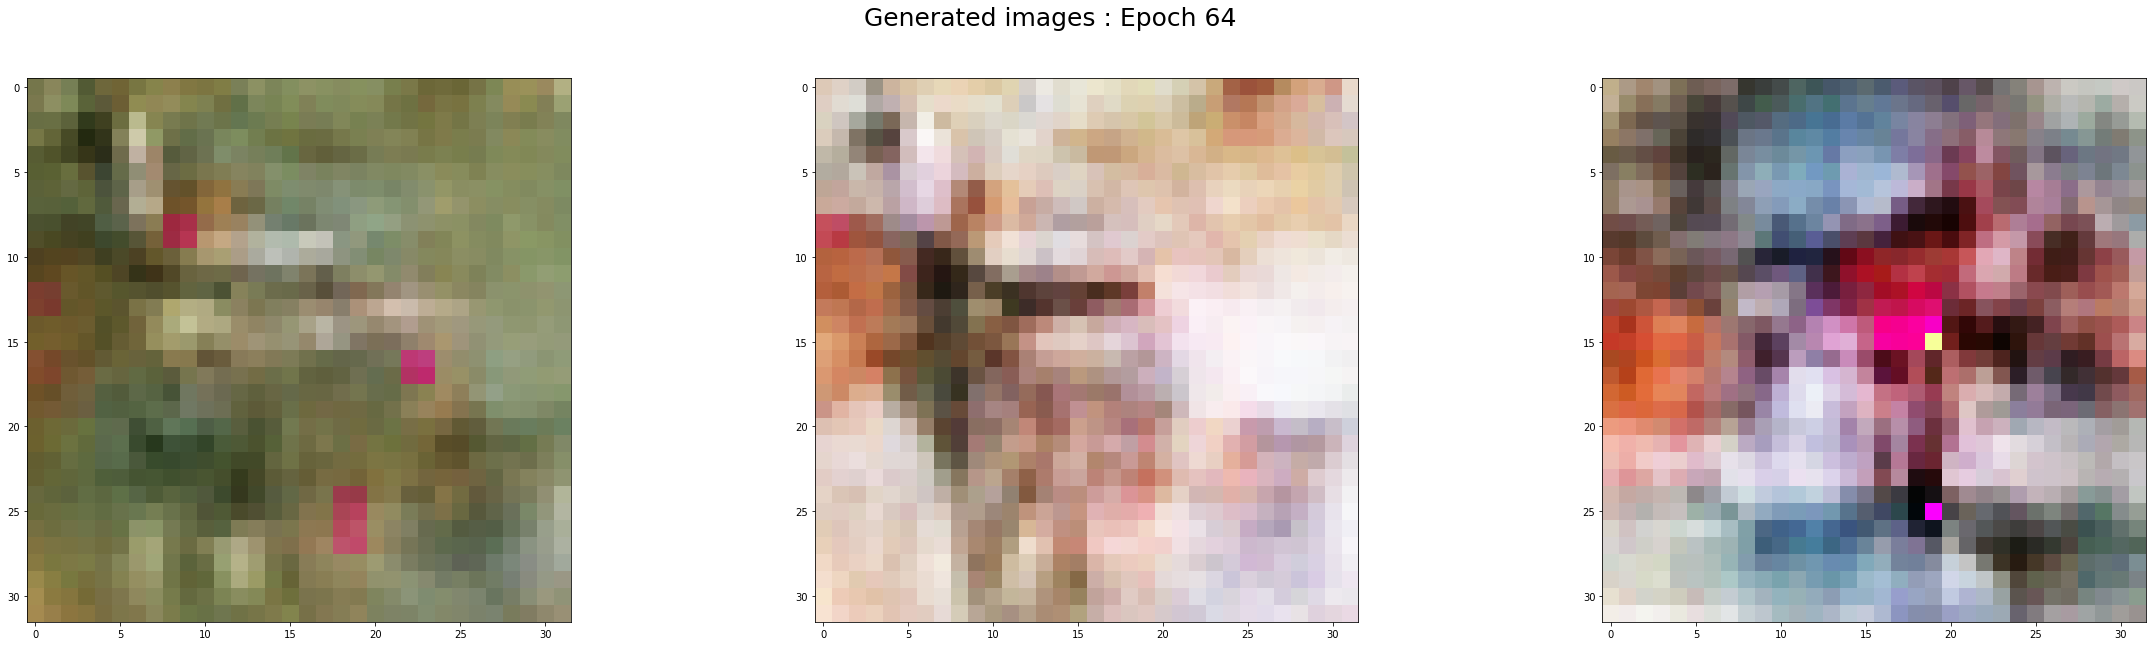

---------------------------------------------------------------
epoch :  65  d_loss =  [0.4108678102493286, 0.828125]  g_loss =  1.0485190153121948


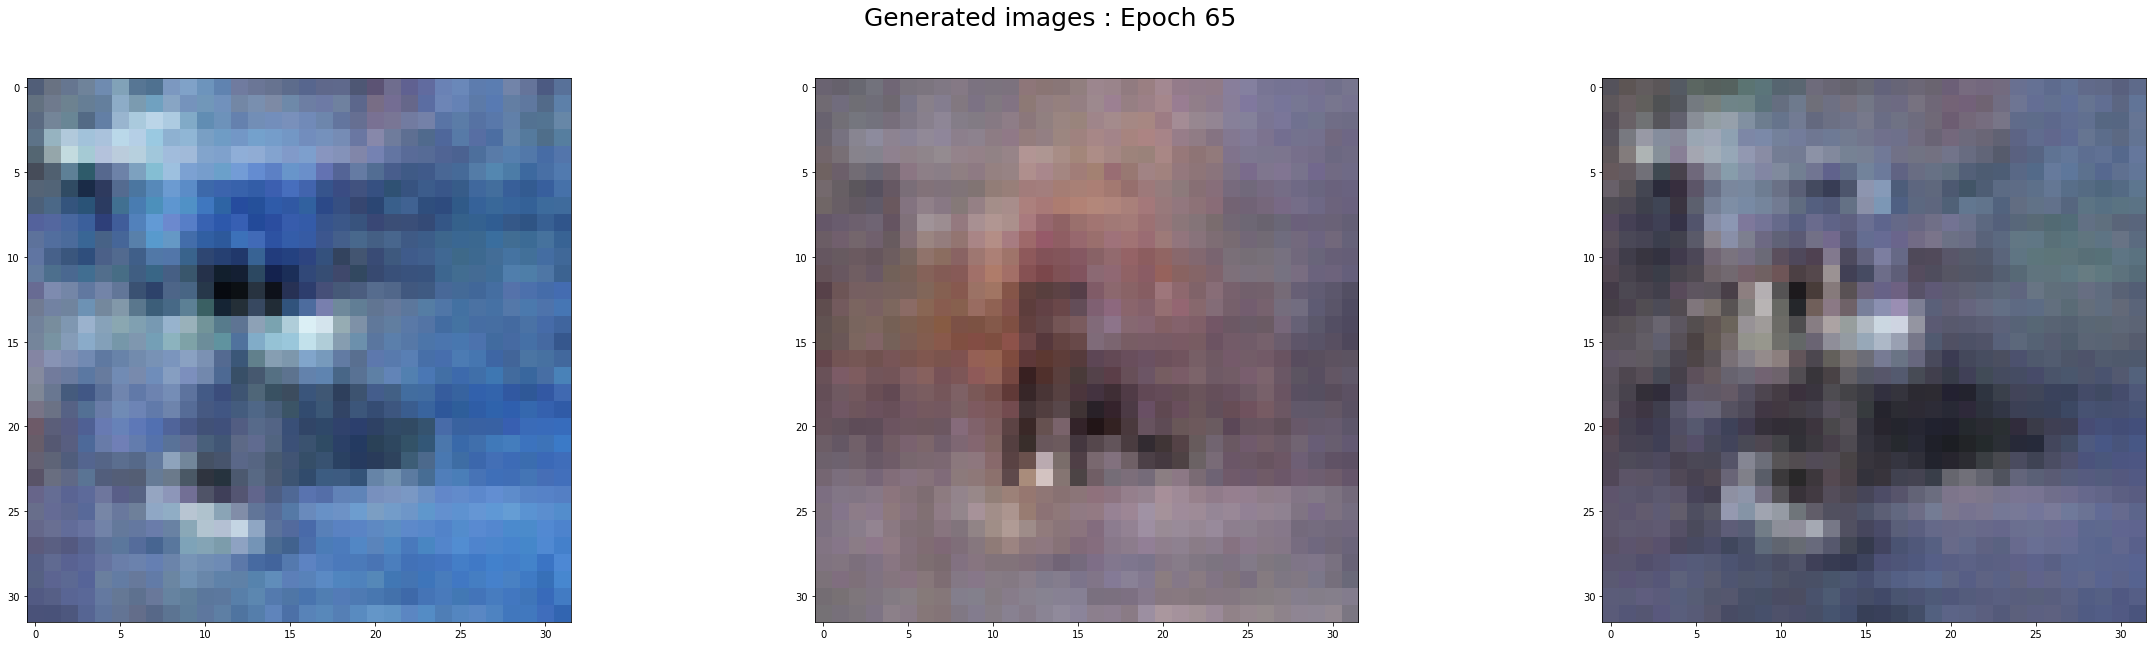

---------------------------------------------------------------
epoch :  66  d_loss =  [0.445648193359375, 0.81640625]  g_loss =  1.297816276550293


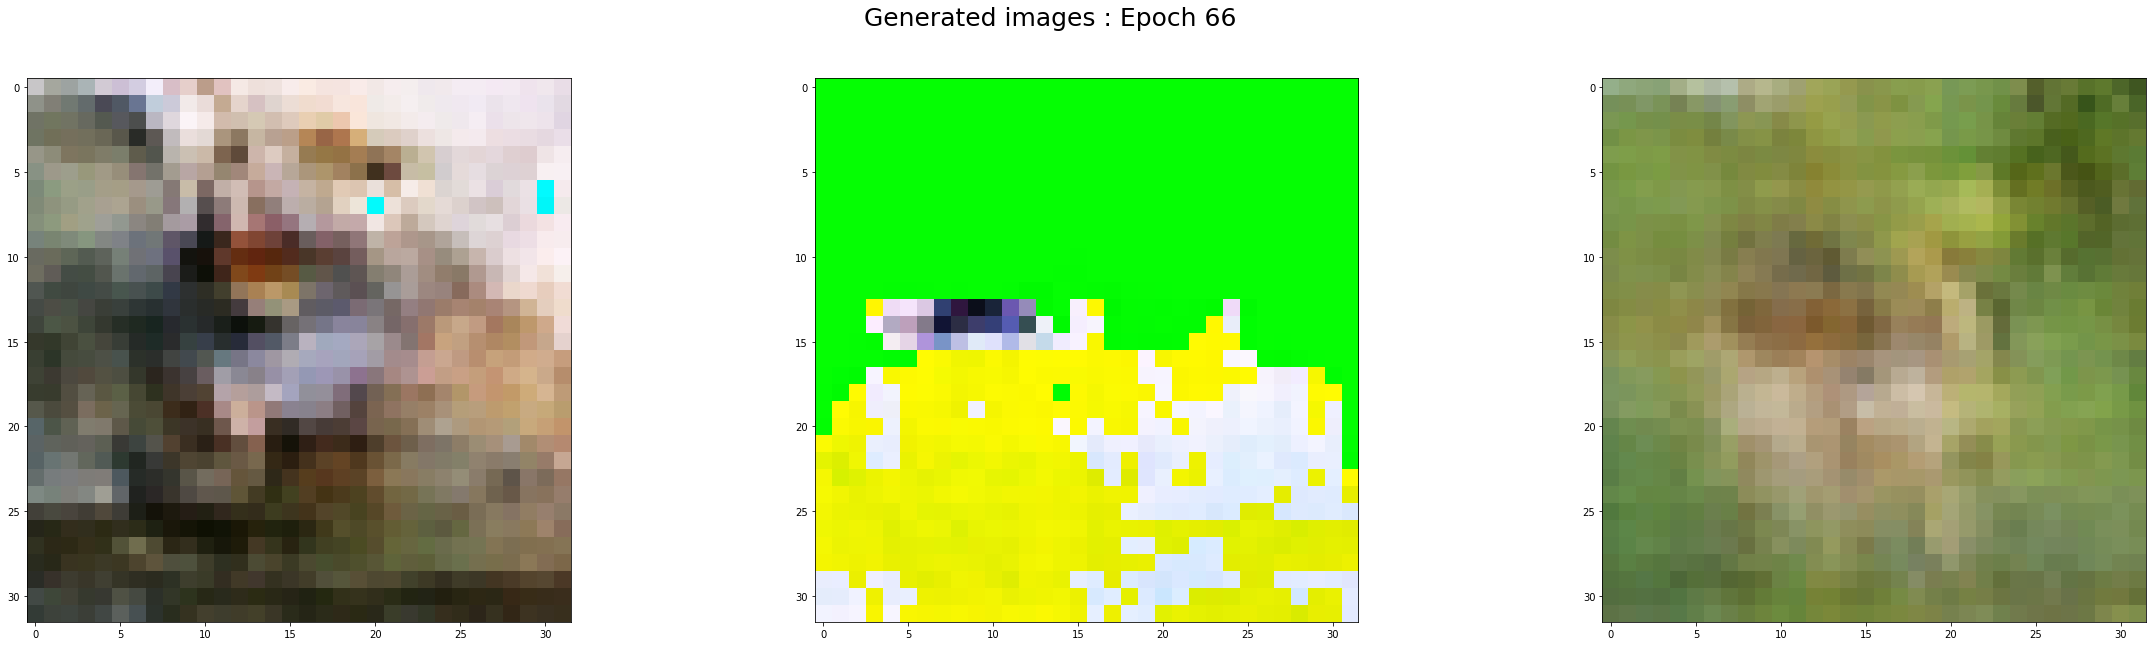

---------------------------------------------------------------
epoch :  67  d_loss =  [0.4354528784751892, 0.81640625]  g_loss =  1.3947004079818726


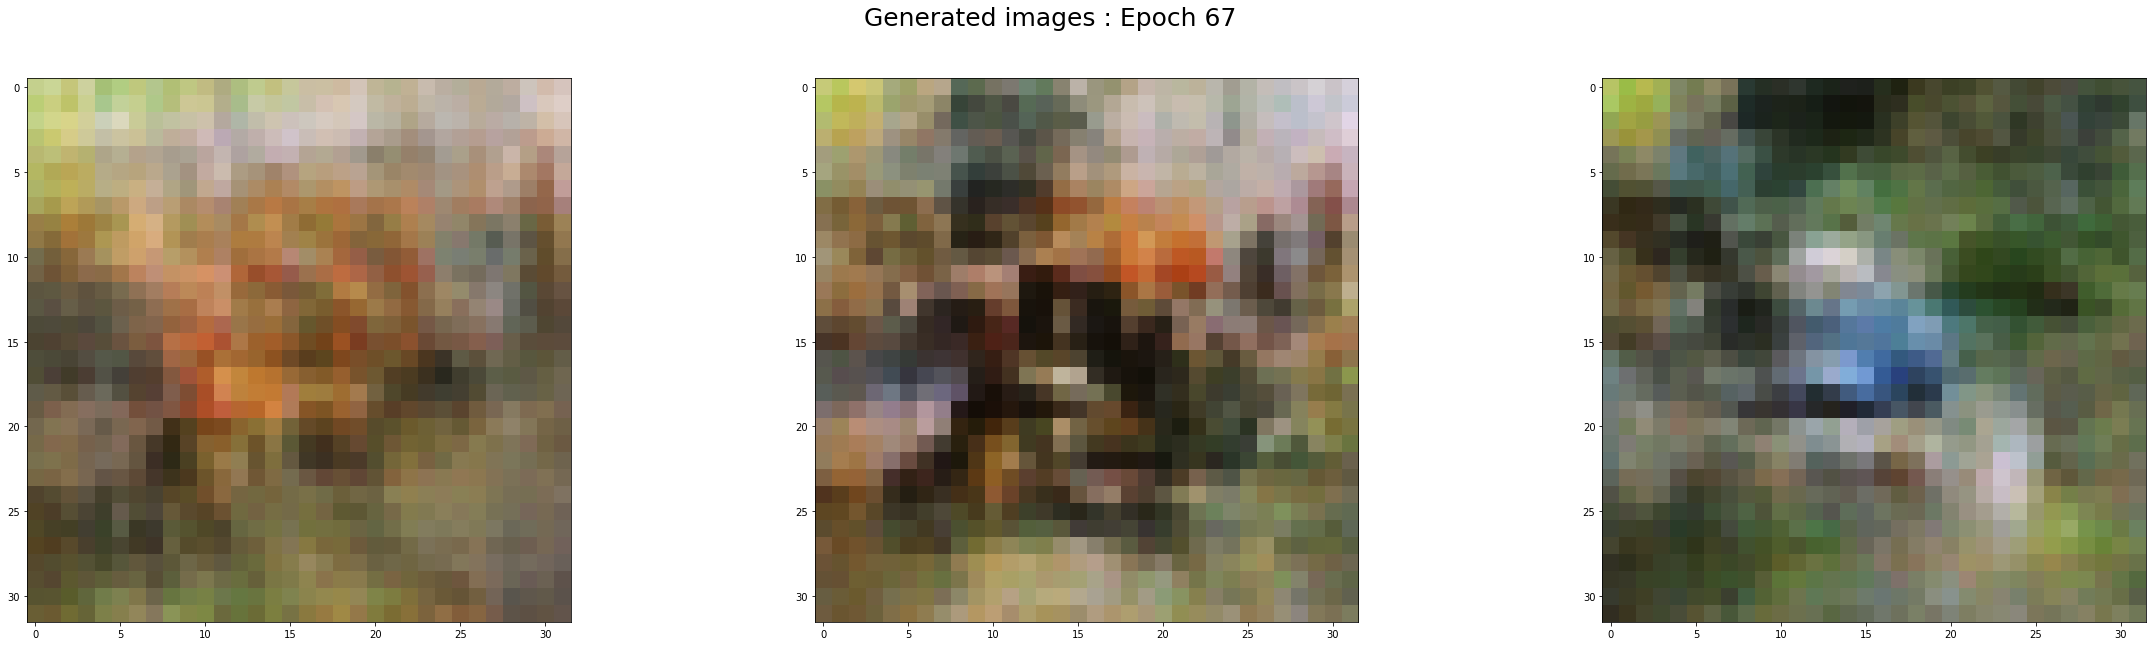

---------------------------------------------------------------
epoch :  68  d_loss =  [0.3270479738712311, 0.875]  g_loss =  1.0610032081604004


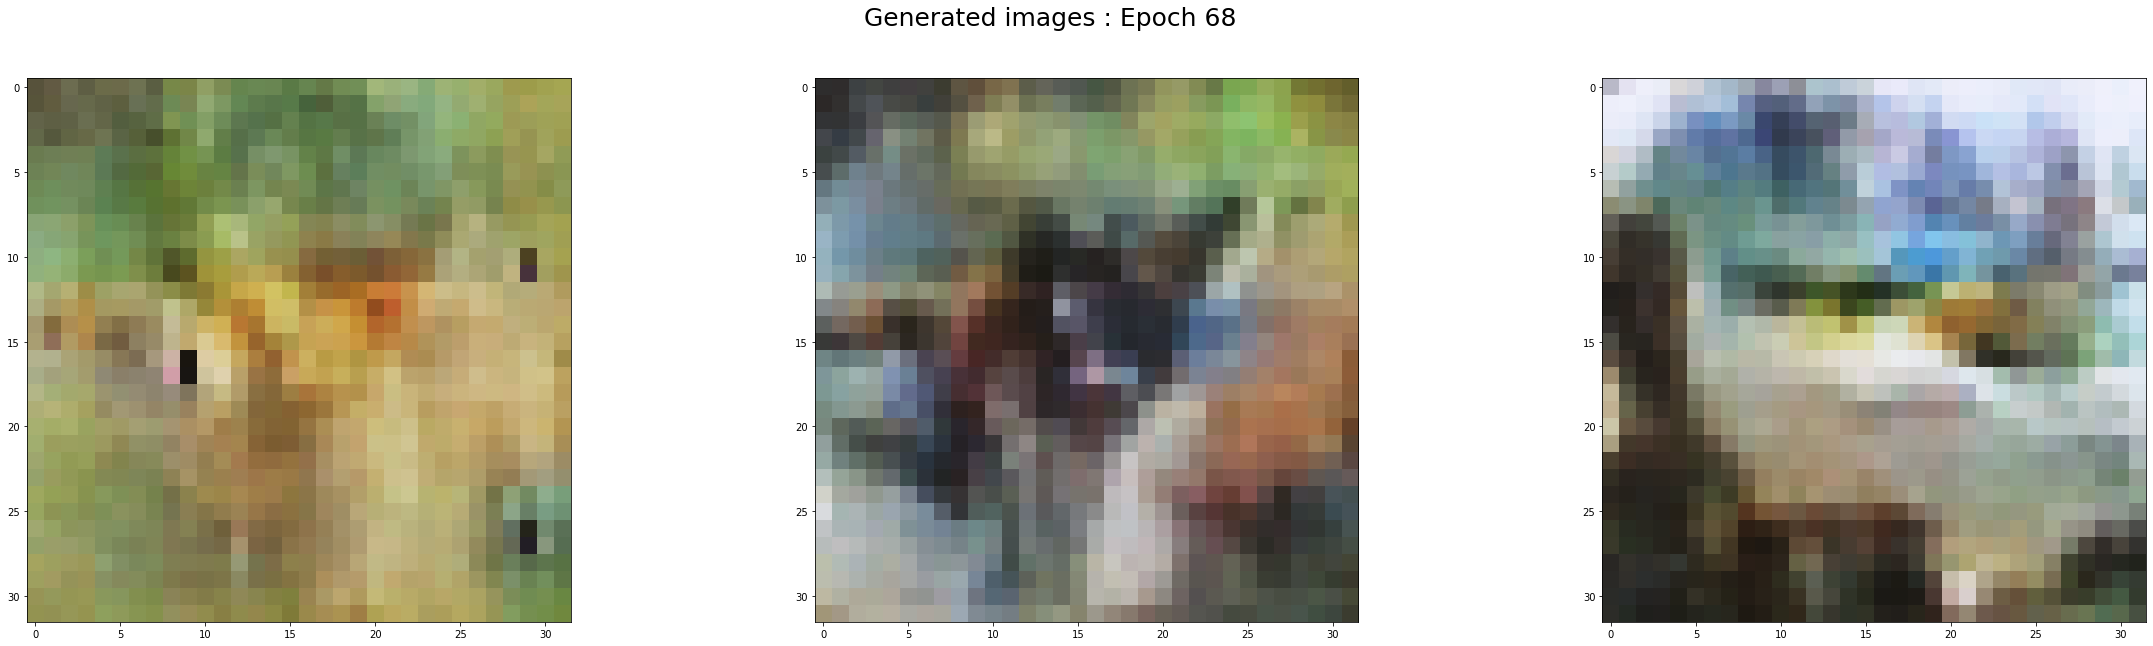

---------------------------------------------------------------
epoch :  69  d_loss =  [0.2883588969707489, 0.8984375]  g_loss =  1.788454294204712


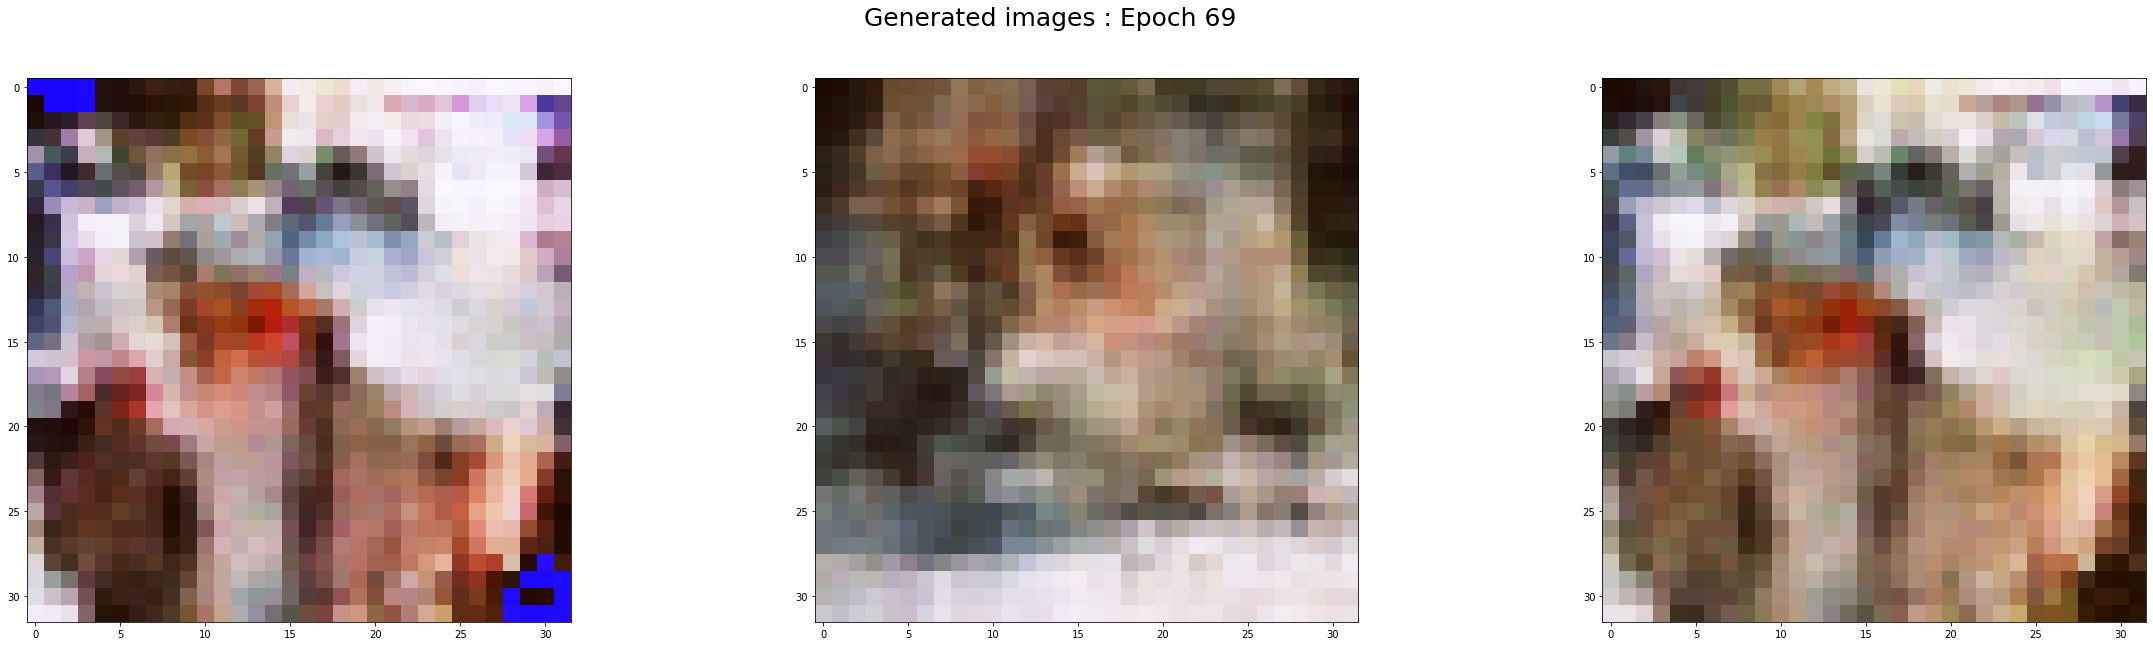

---------------------------------------------------------------
epoch :  70  d_loss =  [0.3737106919288635, 0.84375]  g_loss =  1.835566759109497


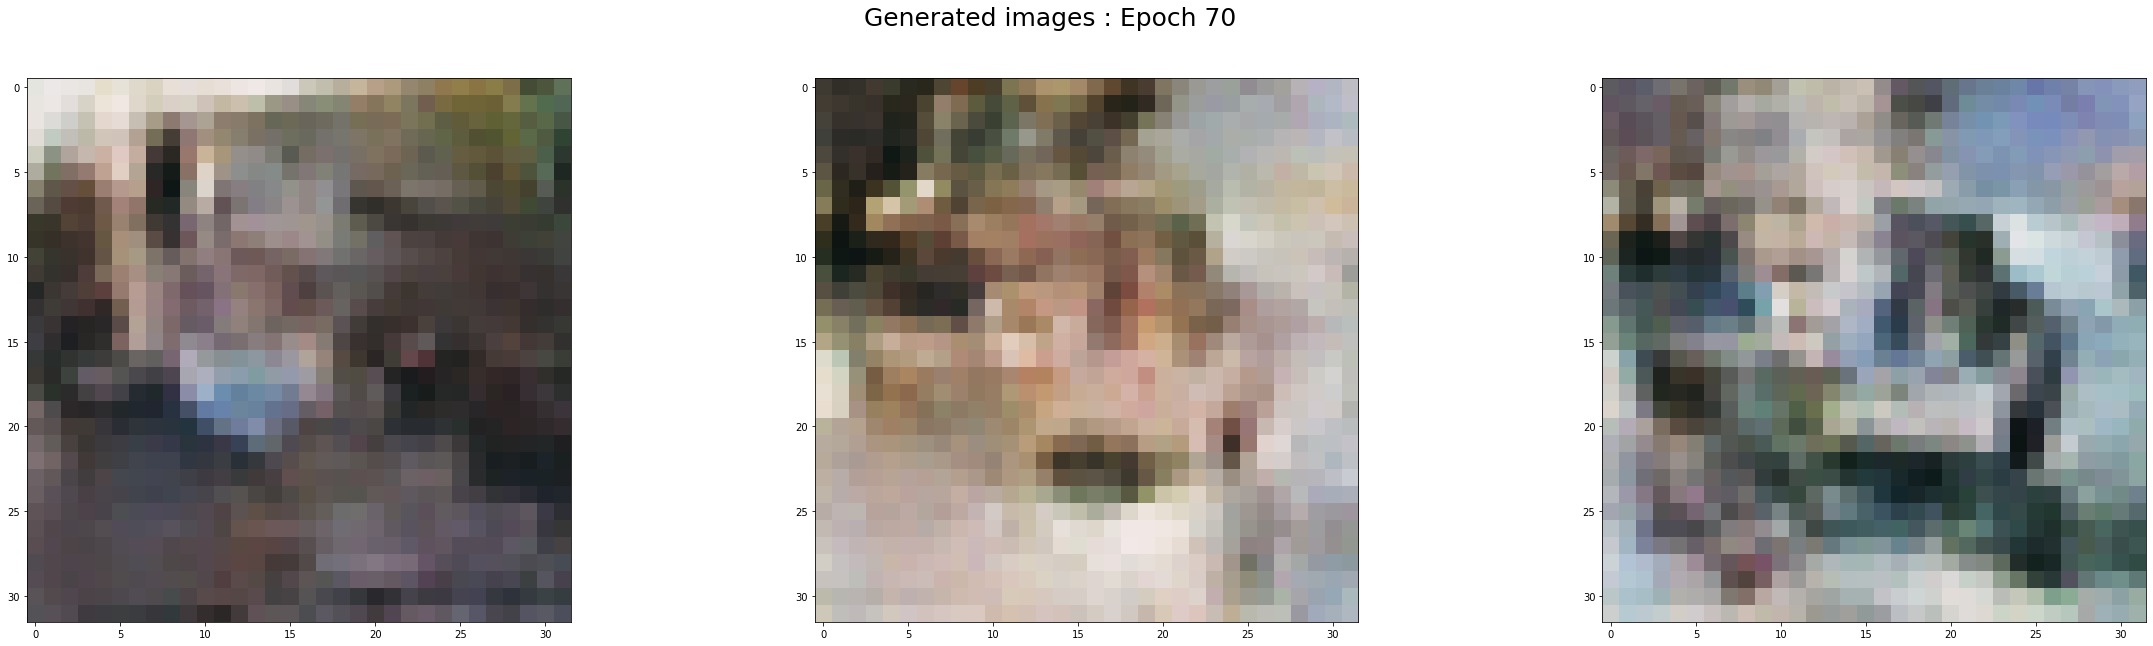

---------------------------------------------------------------
epoch :  71  d_loss =  [0.27573487162590027, 0.890625]  g_loss =  2.138275146484375


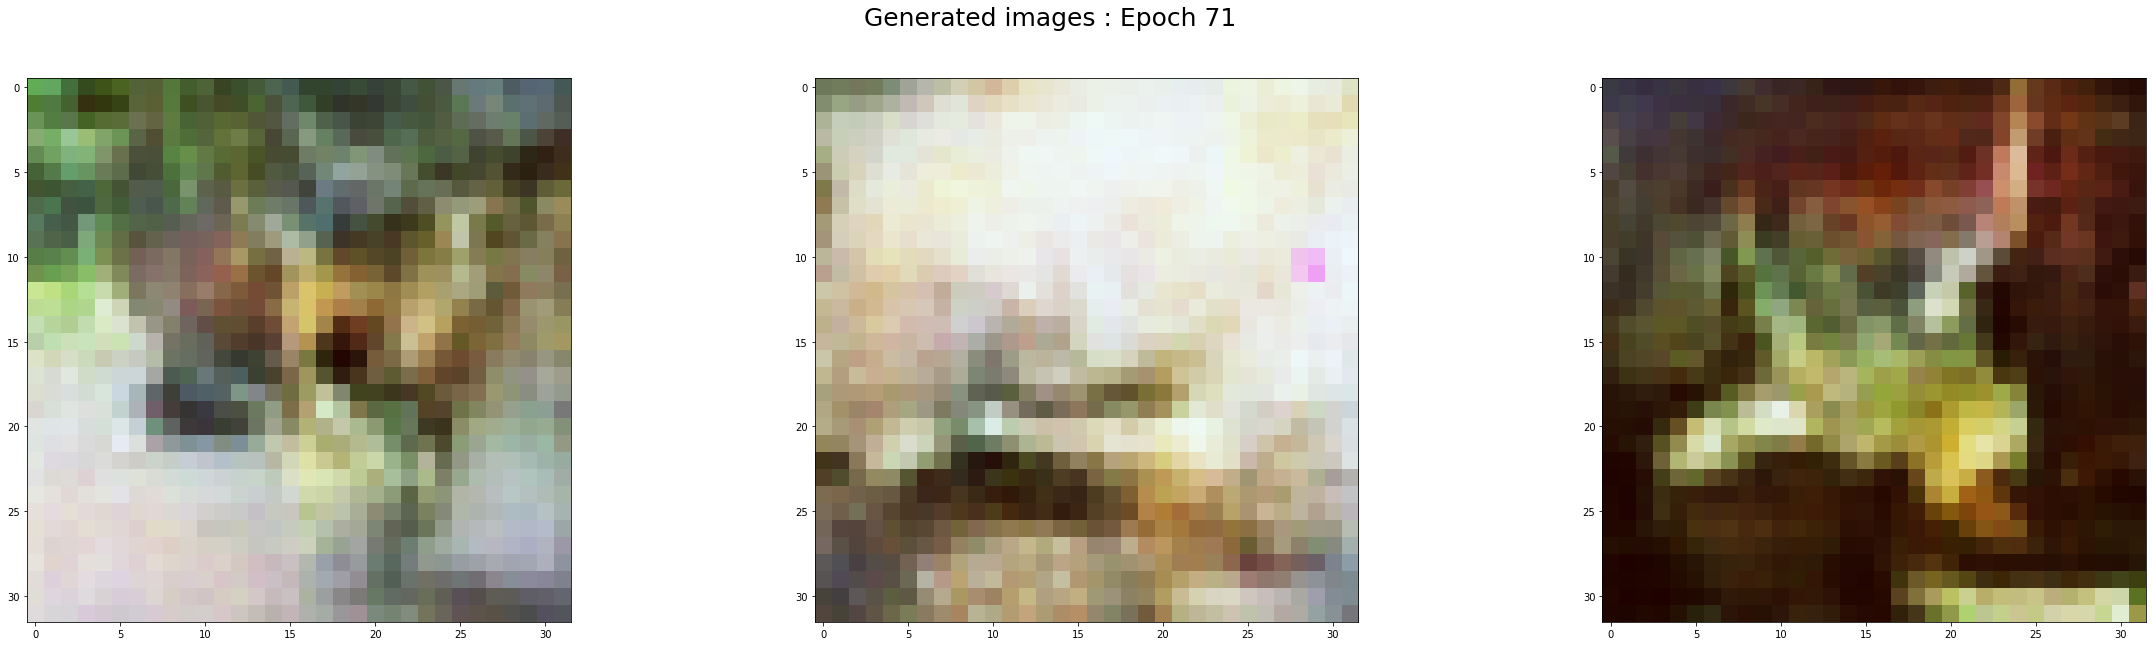

---------------------------------------------------------------
epoch :  72  d_loss =  [0.35177385807037354, 0.875]  g_loss =  1.4672329425811768


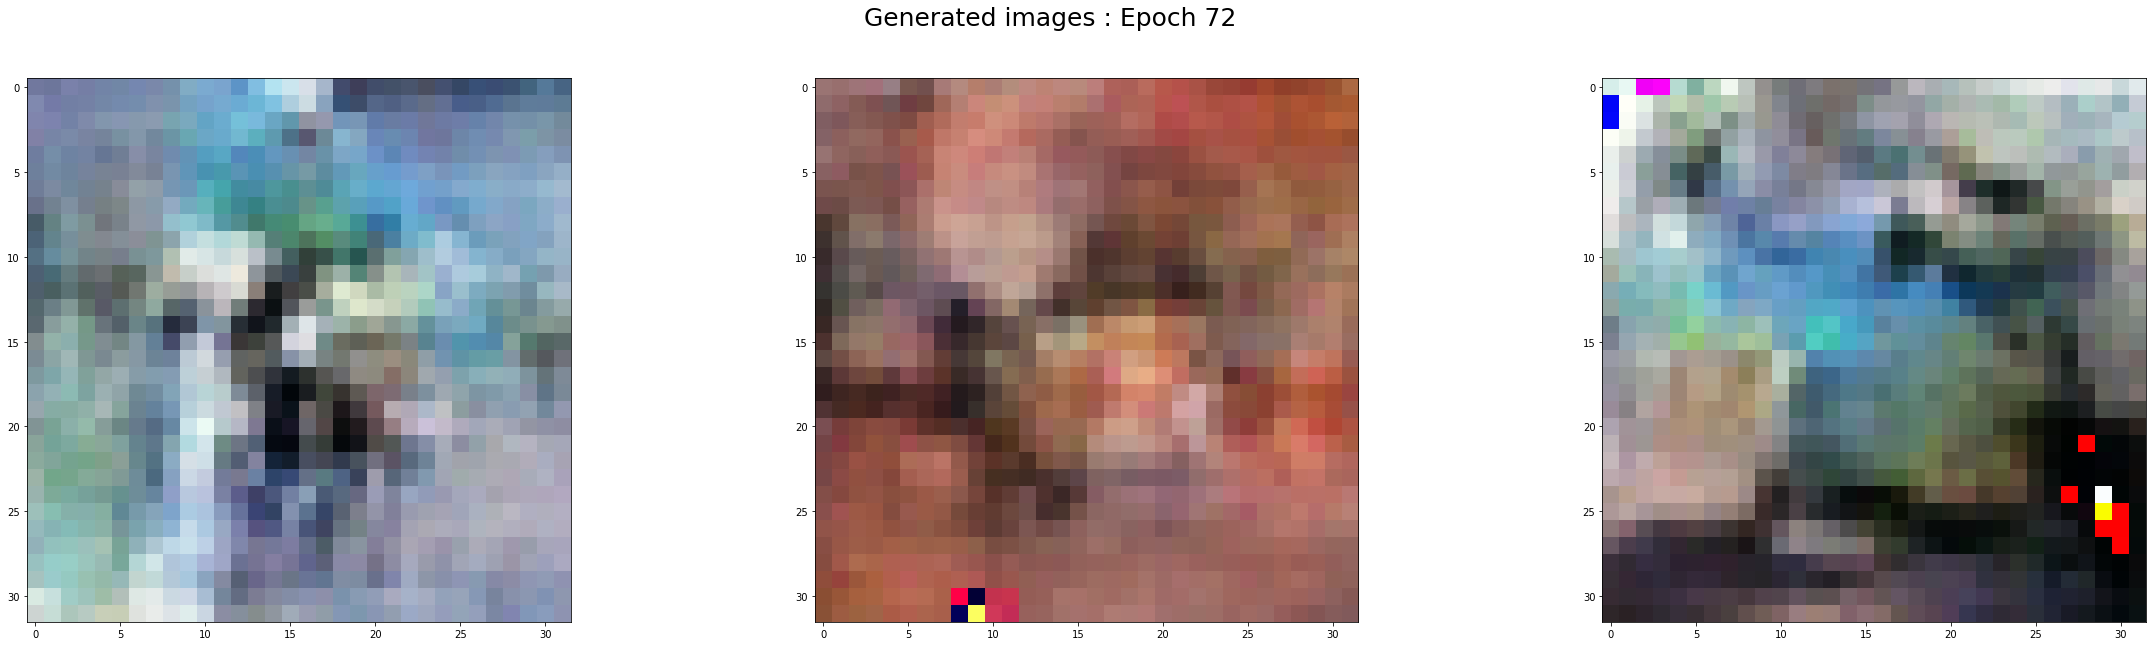

---------------------------------------------------------------
epoch :  73  d_loss =  [0.6999228000640869, 0.63671875]  g_loss =  1.8123588562011719


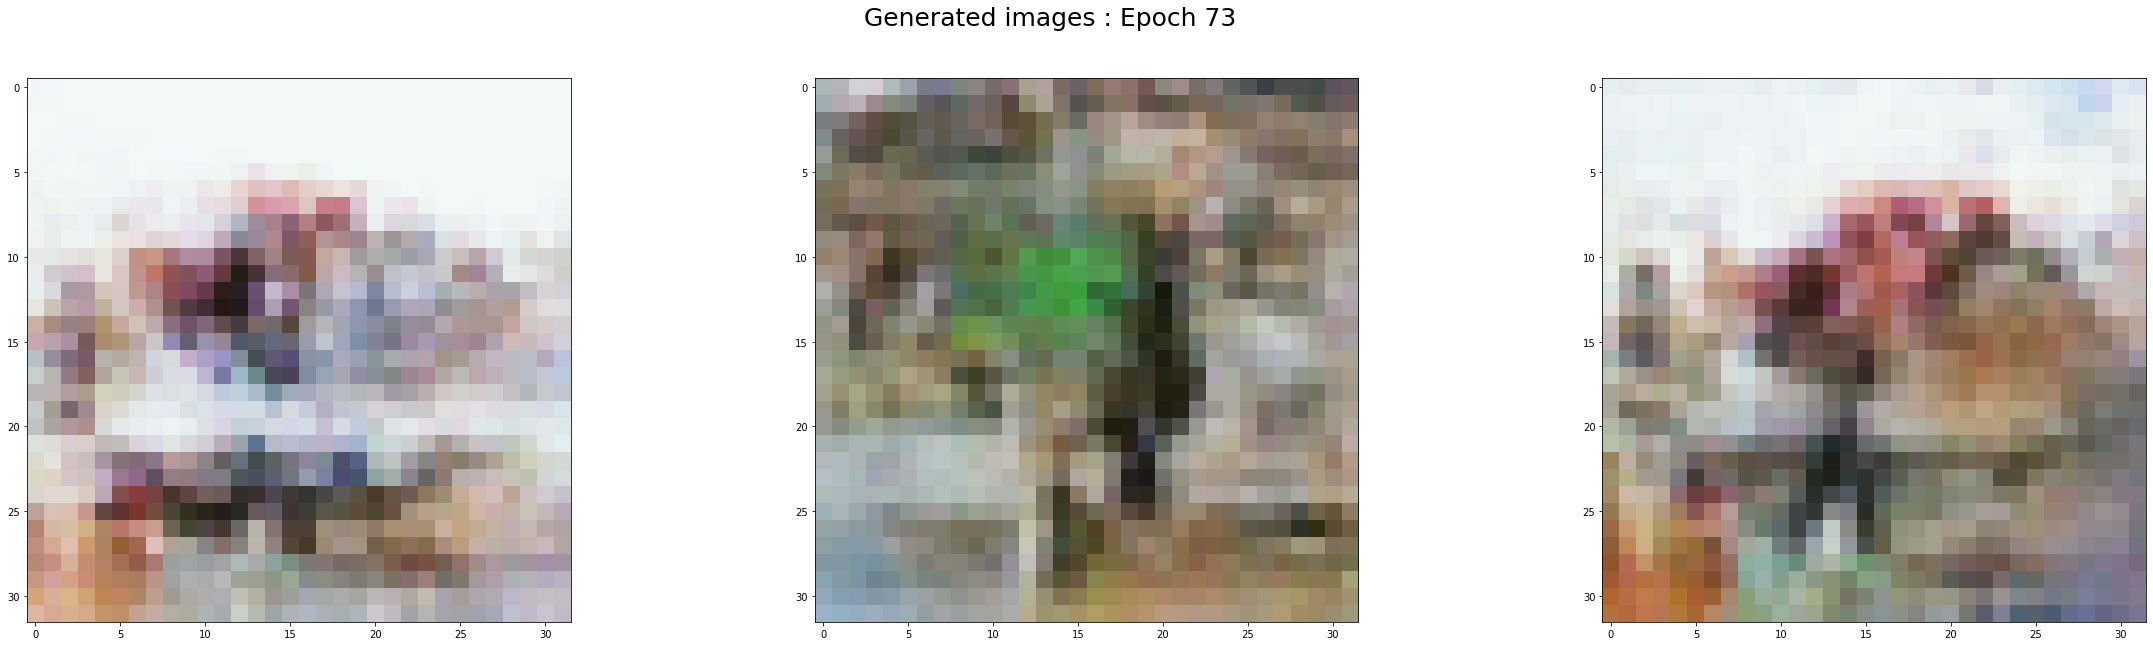

---------------------------------------------------------------
epoch :  74  d_loss =  [0.34640586376190186, 0.83984375]  g_loss =  1.7271908521652222


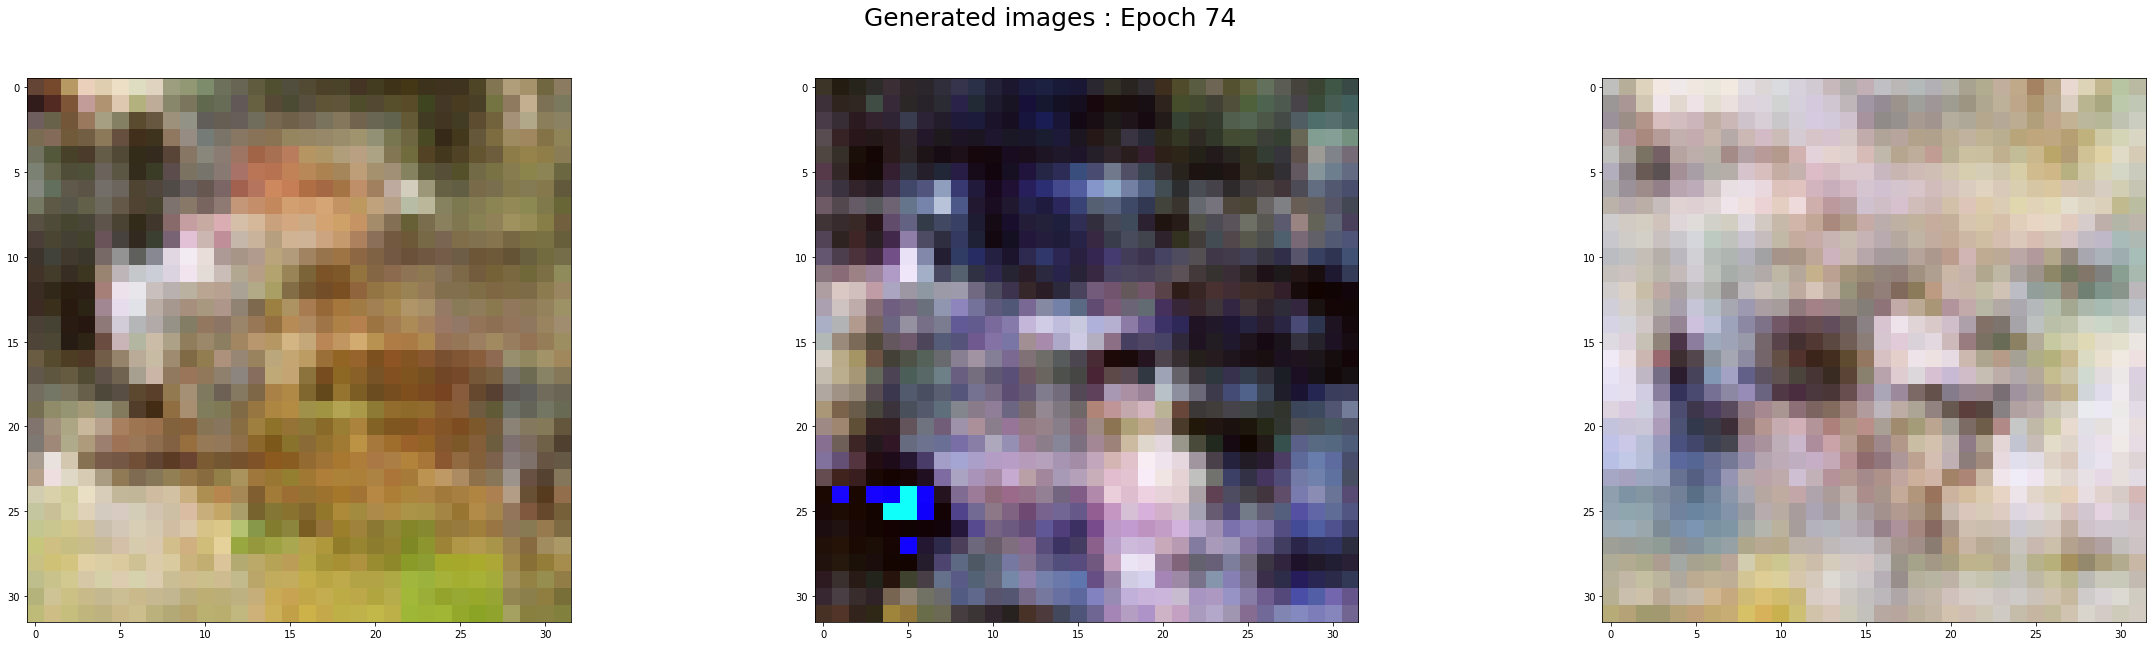

---------------------------------------------------------------
epoch :  75  d_loss =  [0.35747286677360535, 0.85546875]  g_loss =  1.1884276866912842


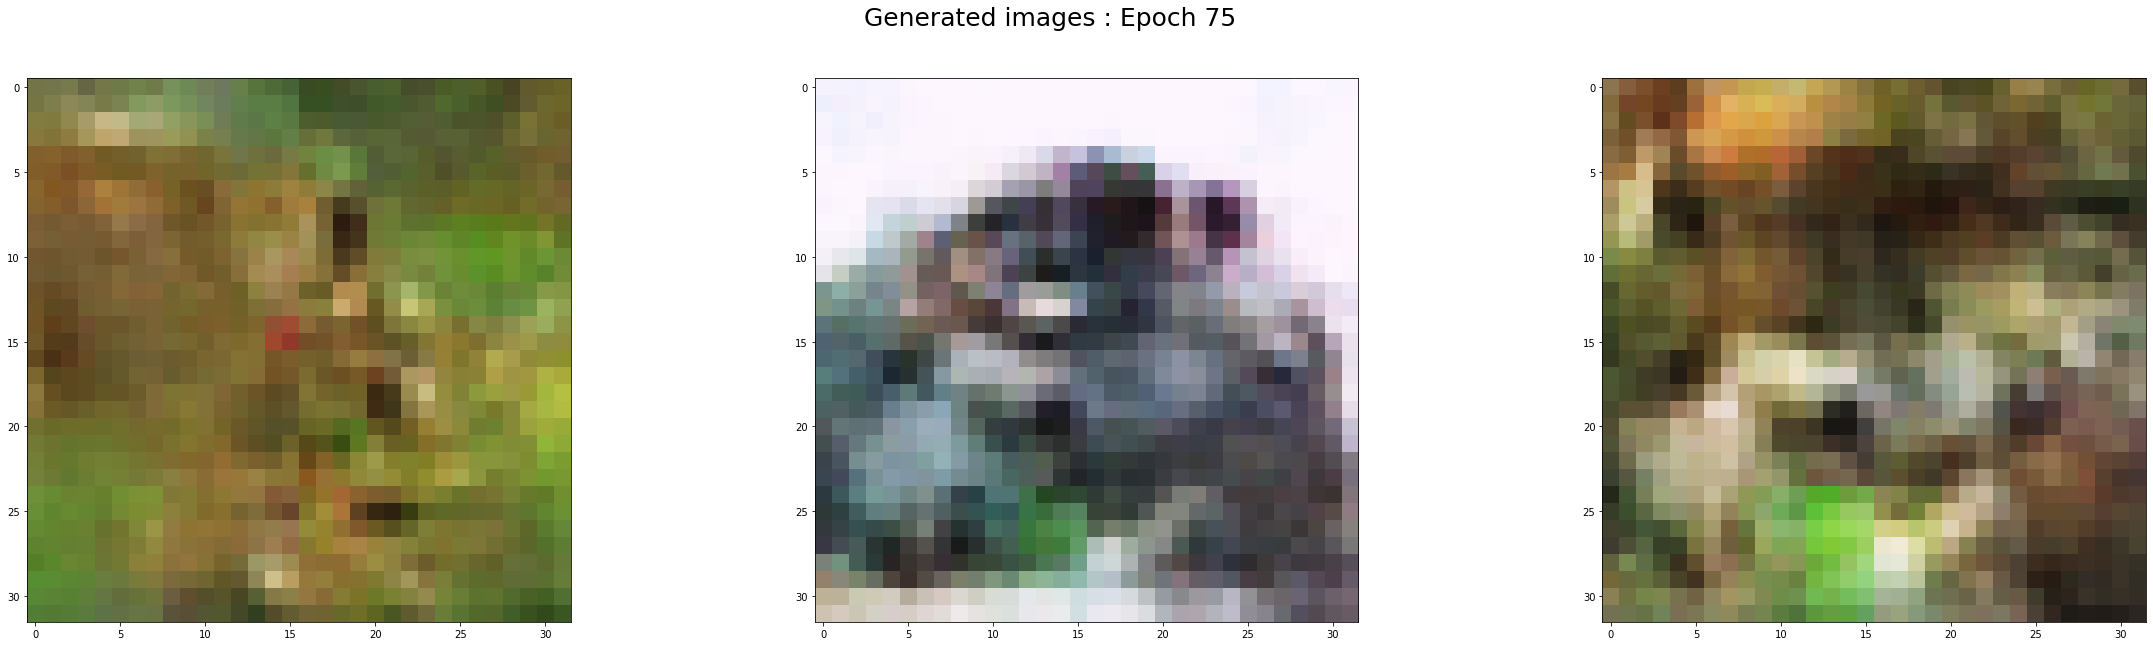

---------------------------------------------------------------
epoch :  76  d_loss =  [0.4968944191932678, 0.7421875]  g_loss =  1.8969154357910156


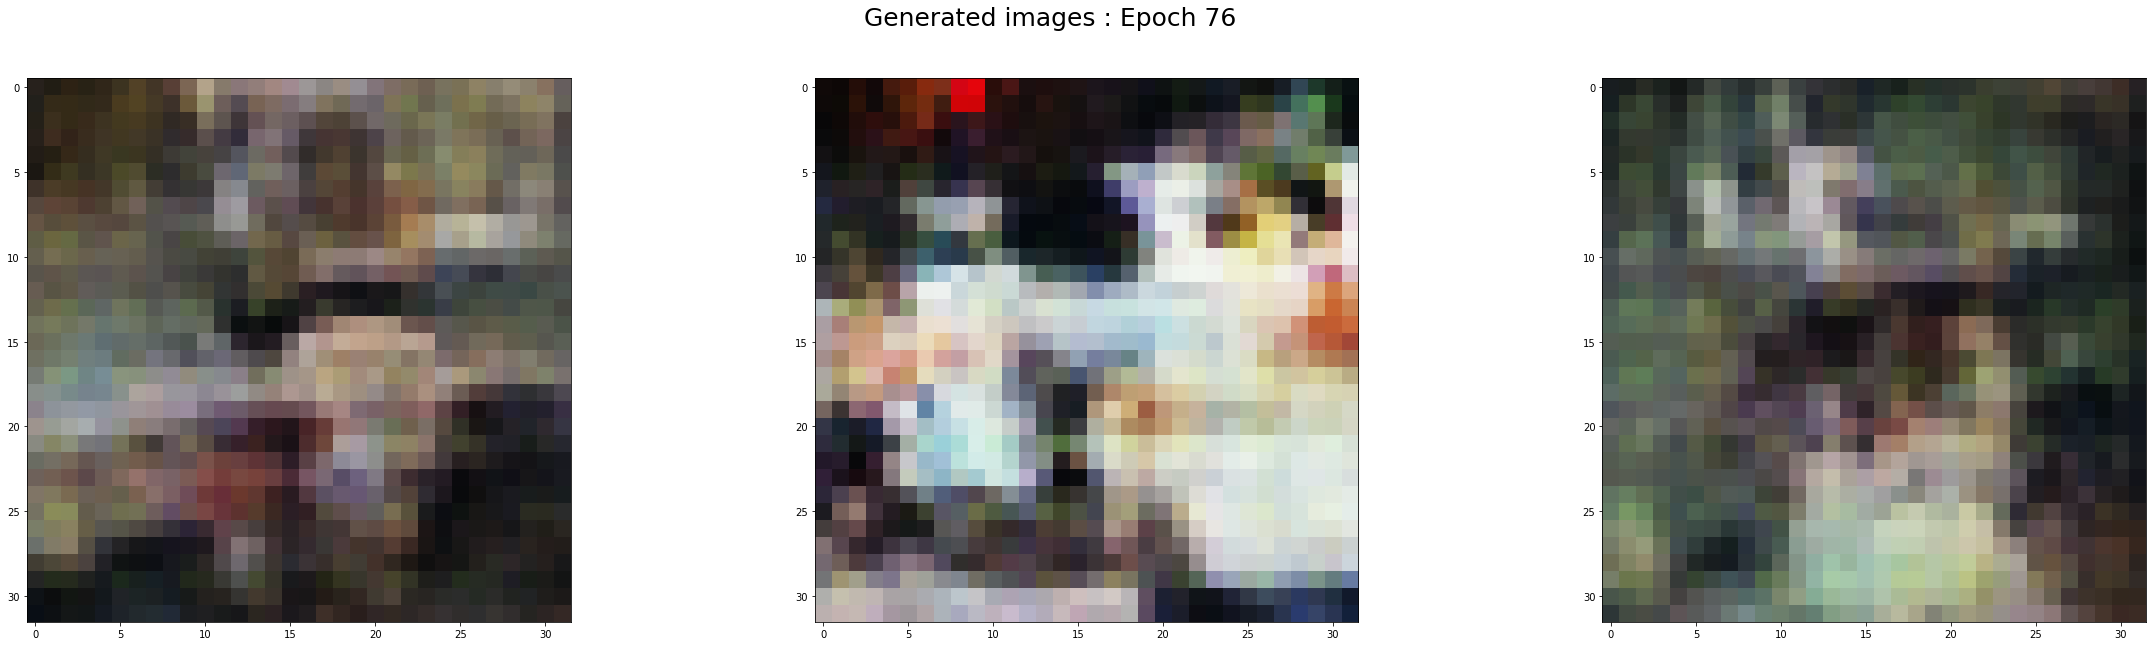

---------------------------------------------------------------
epoch :  77  d_loss =  [0.3653174340724945, 0.8359375]  g_loss =  1.4803358316421509


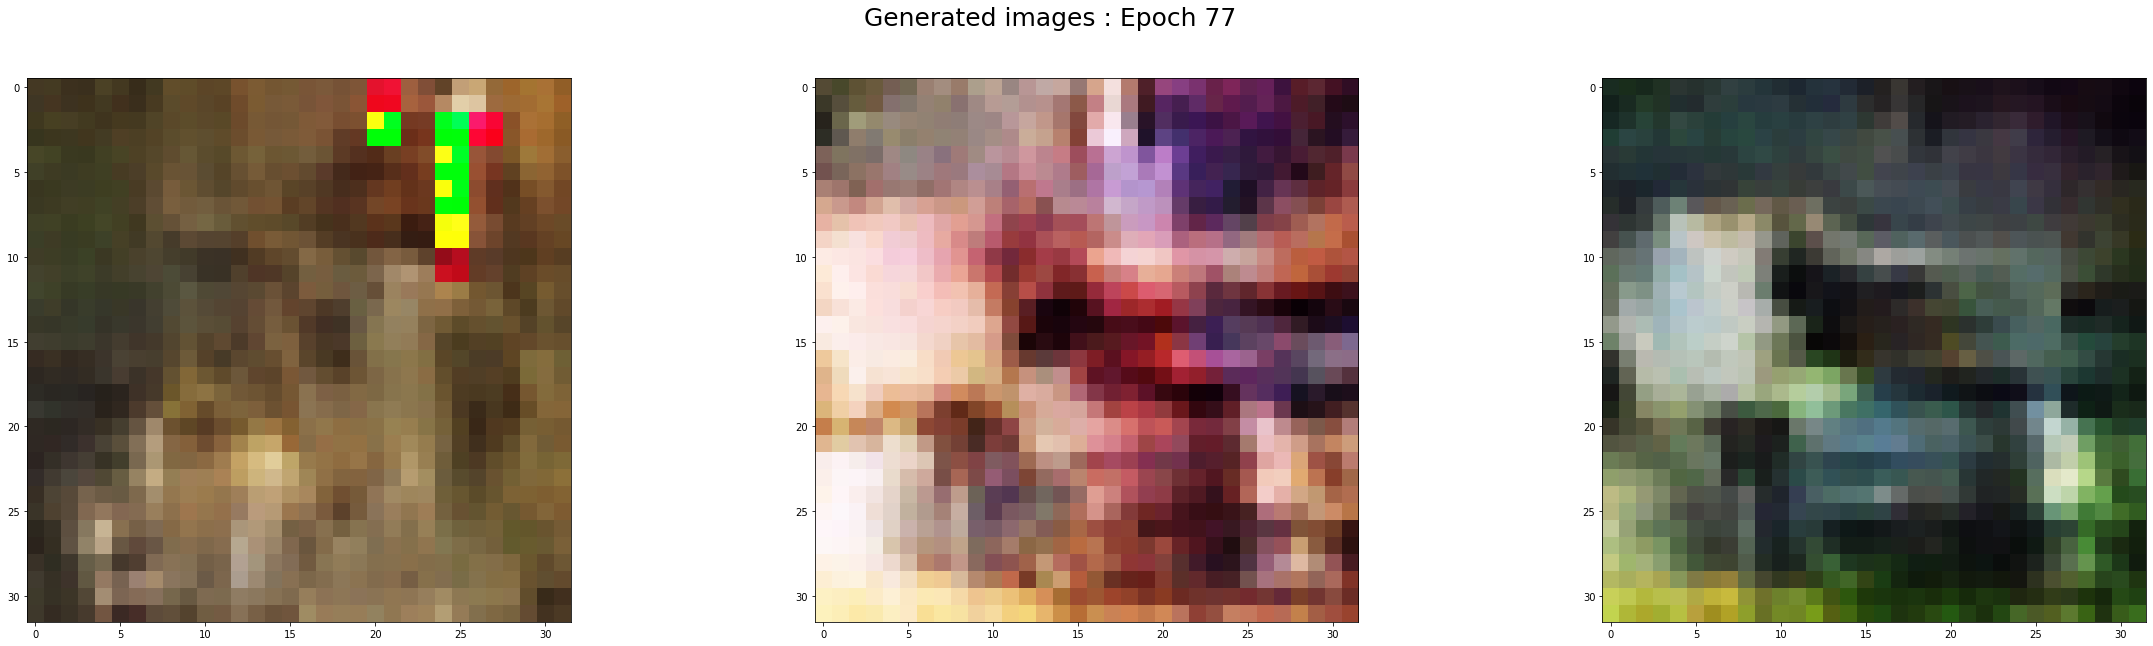

---------------------------------------------------------------
epoch :  78  d_loss =  [0.221086323261261, 0.90234375]  g_loss =  1.1481847763061523


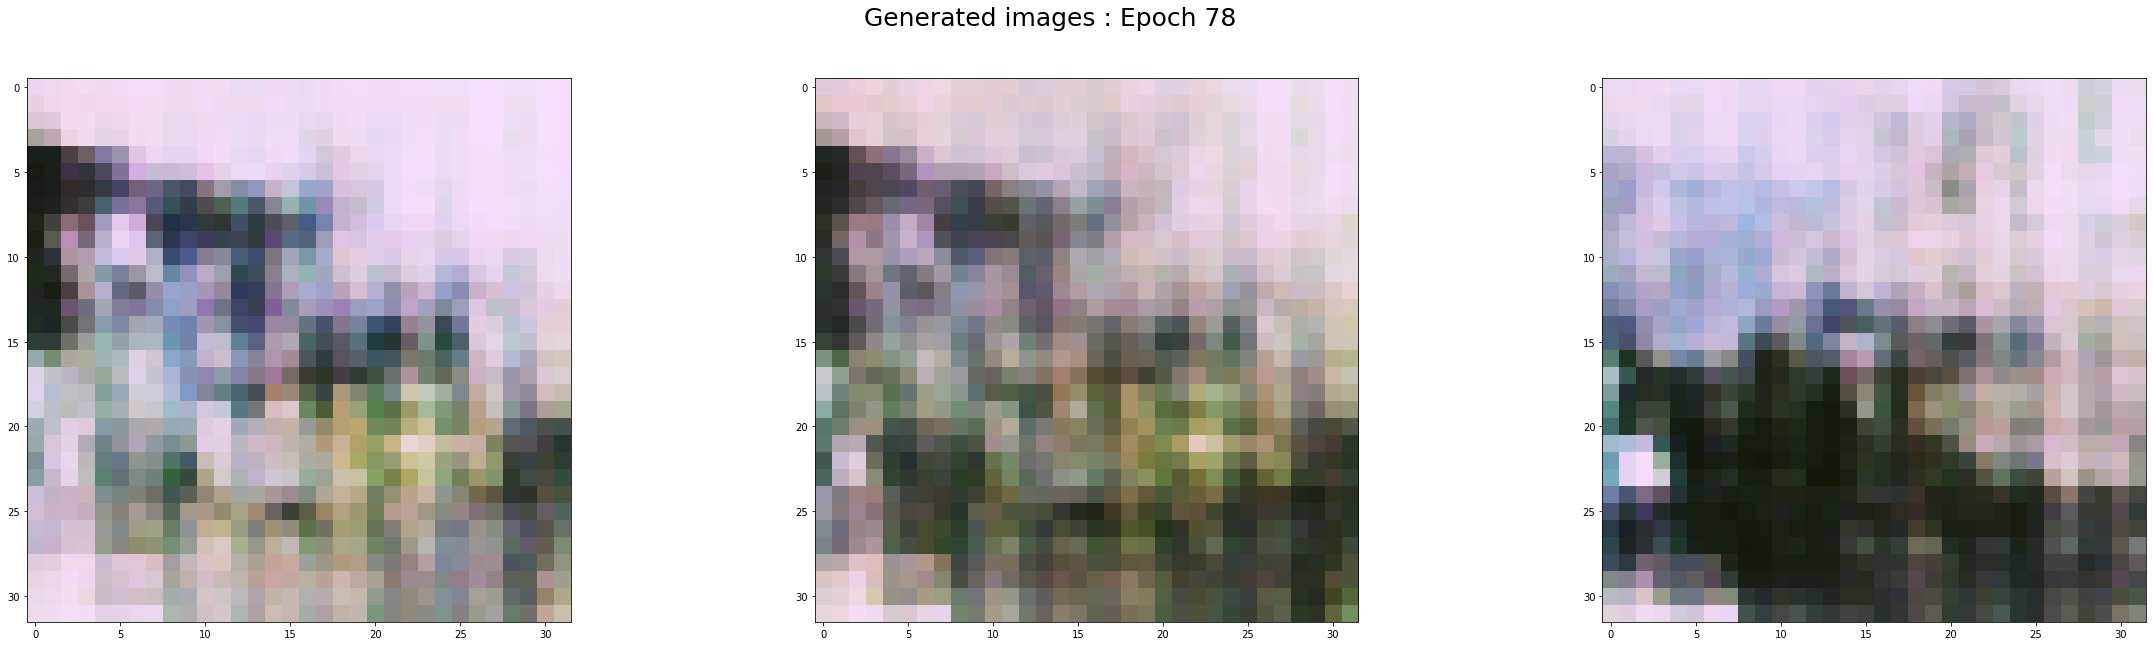

---------------------------------------------------------------
epoch :  79  d_loss =  [0.27481913566589355, 0.90234375]  g_loss =  1.5122486352920532


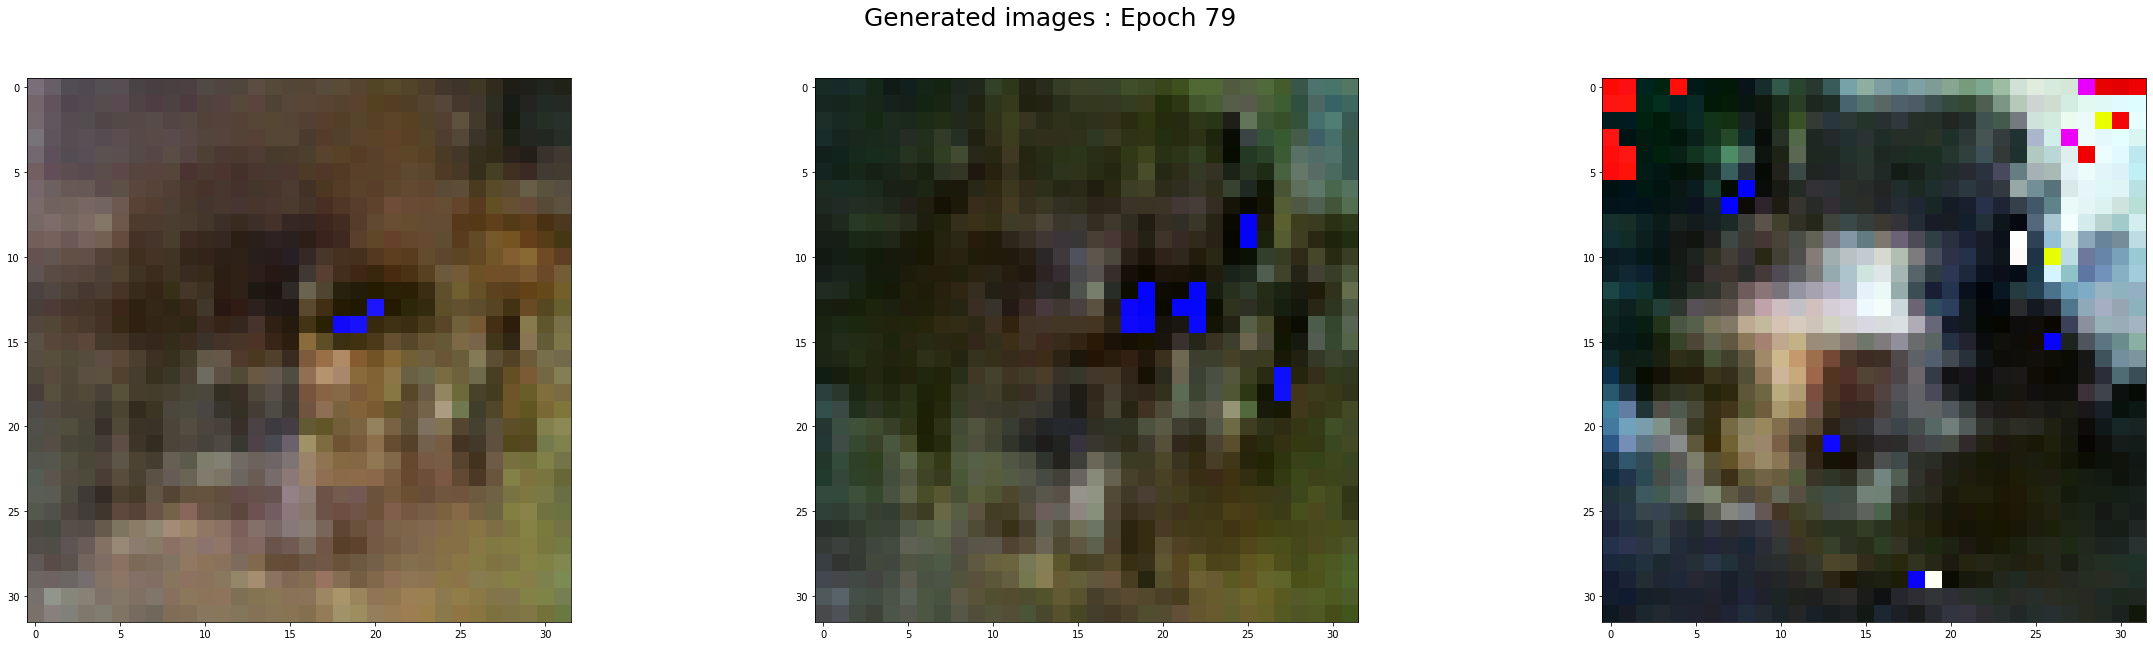

---------------------------------------------------------------
epoch :  80  d_loss =  [0.11033401638269424, 0.97265625]  g_loss =  1.1466033458709717


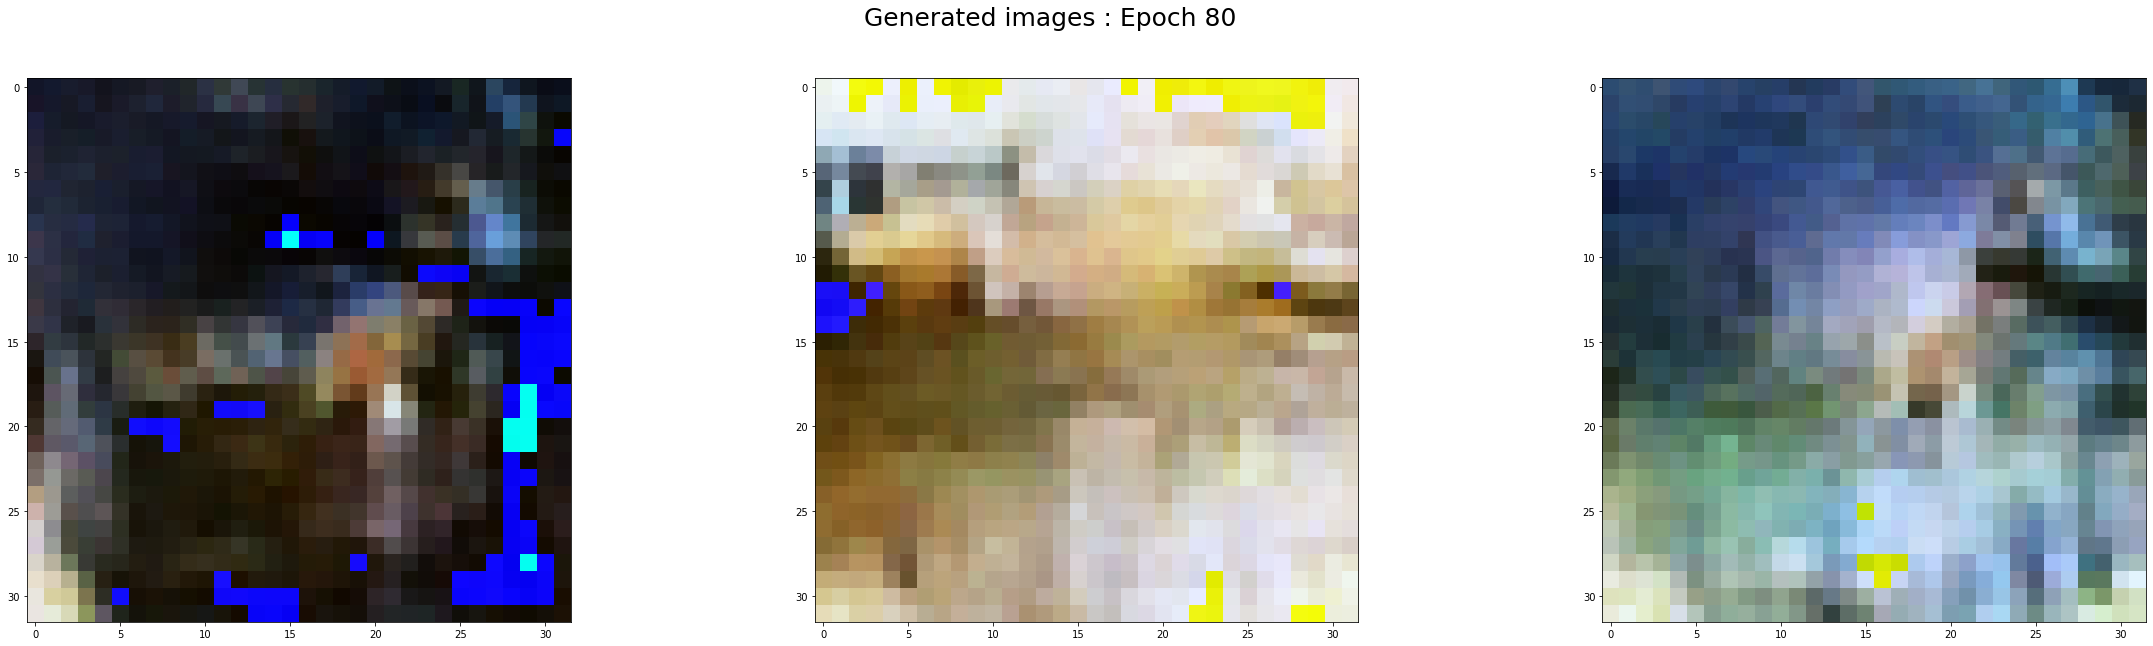

---------------------------------------------------------------
epoch :  81  d_loss =  [0.08320657163858414, 0.97265625]  g_loss =  0.21799816191196442


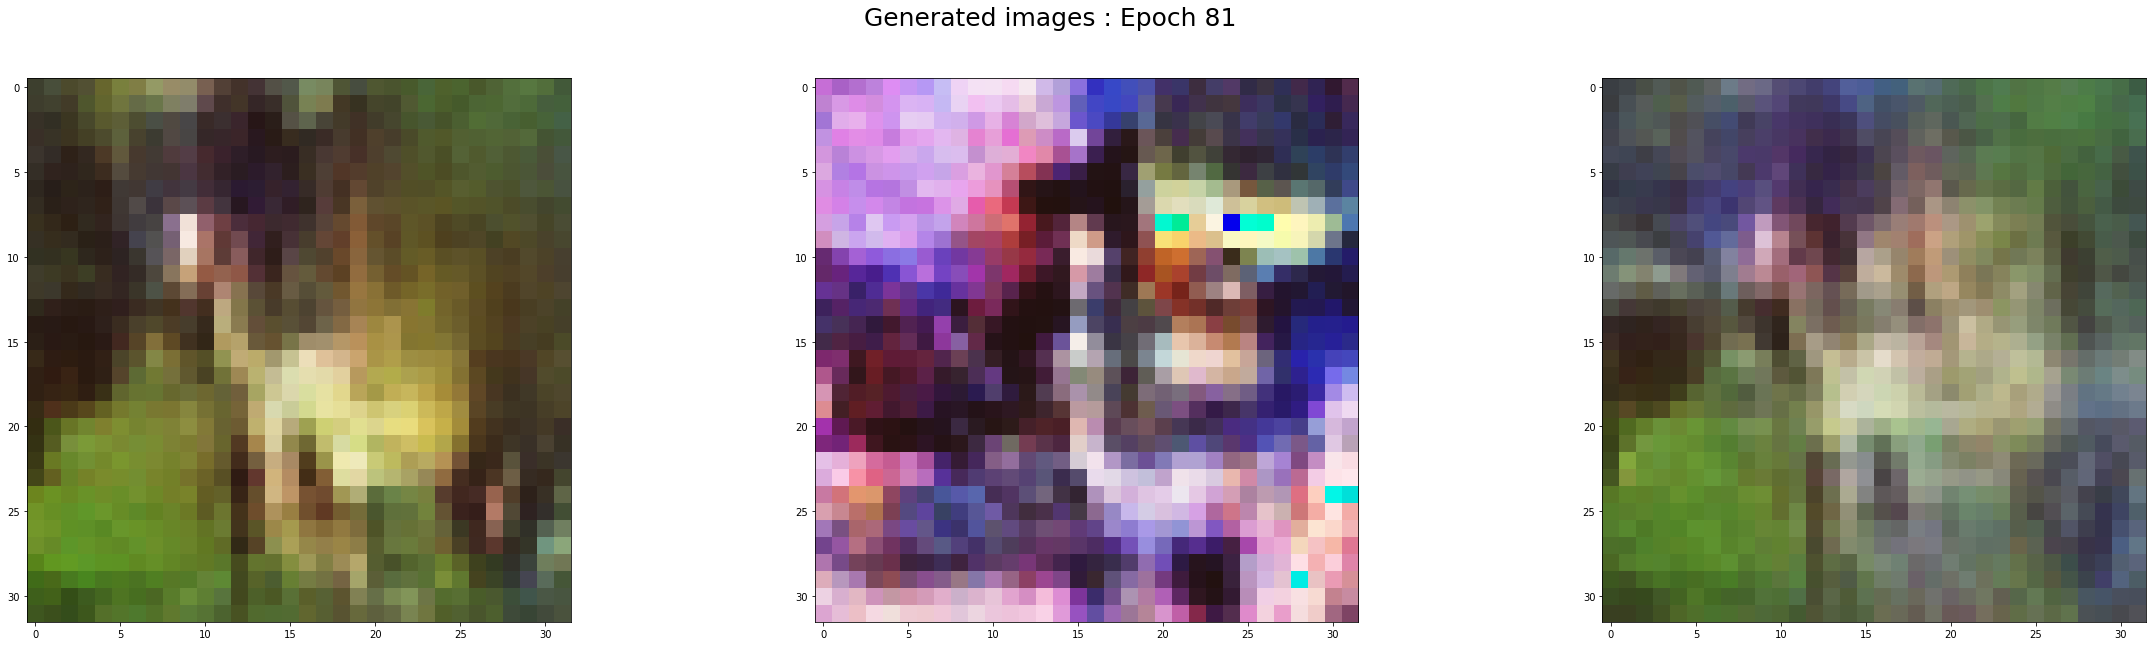

---------------------------------------------------------------
epoch :  82  d_loss =  [0.3025214374065399, 0.90625]  g_loss =  0.6298468112945557


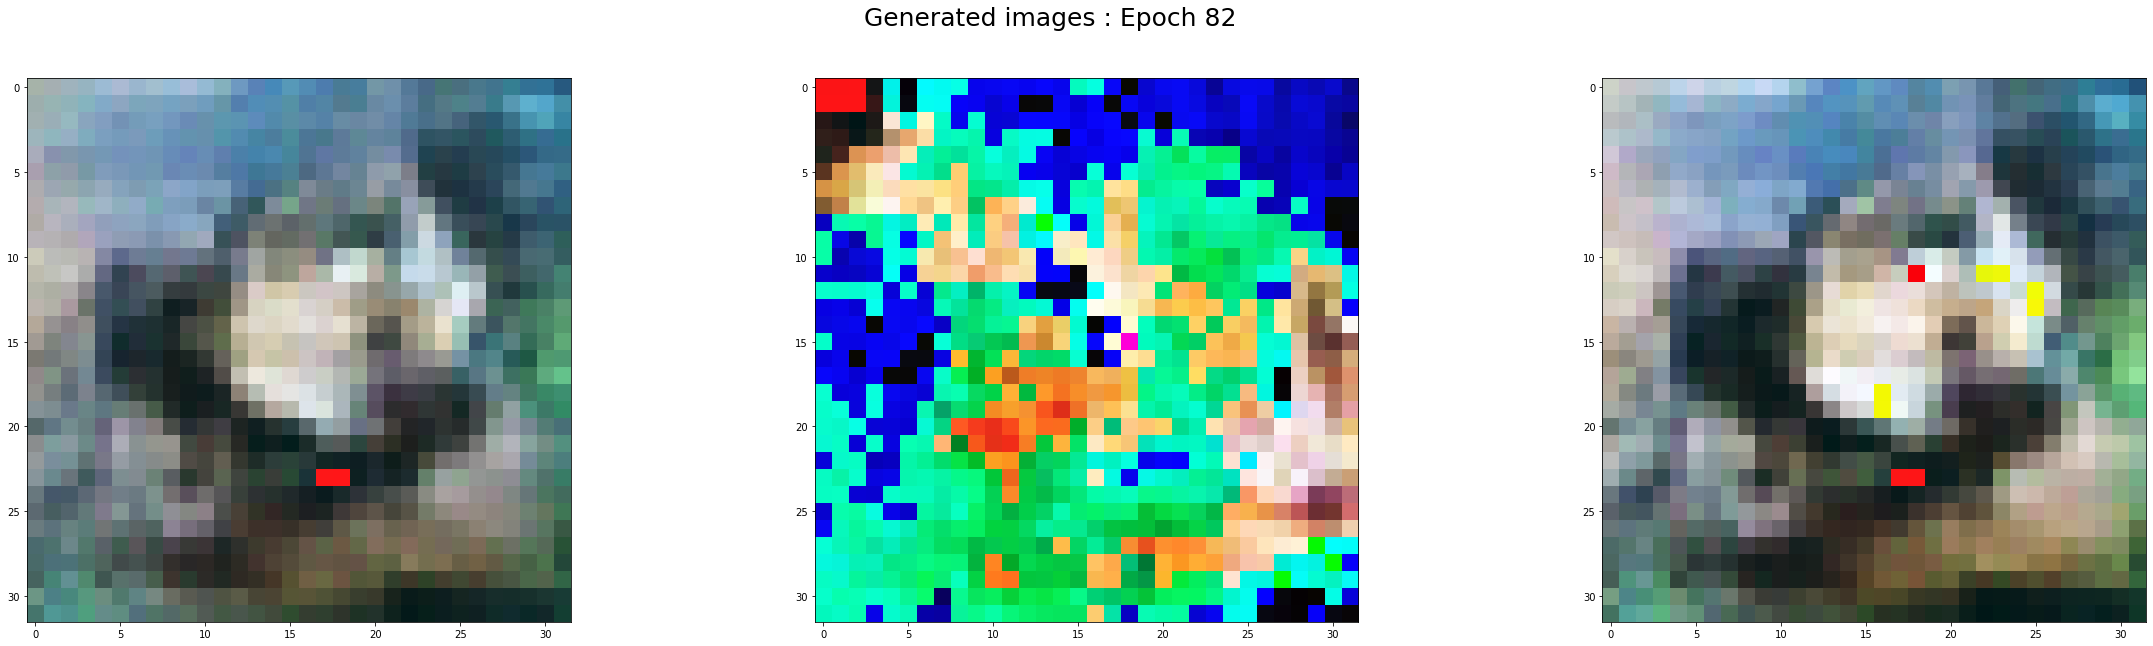

---------------------------------------------------------------
epoch :  83  d_loss =  [0.04817385971546173, 0.9765625]  g_loss =  0.21188613772392273


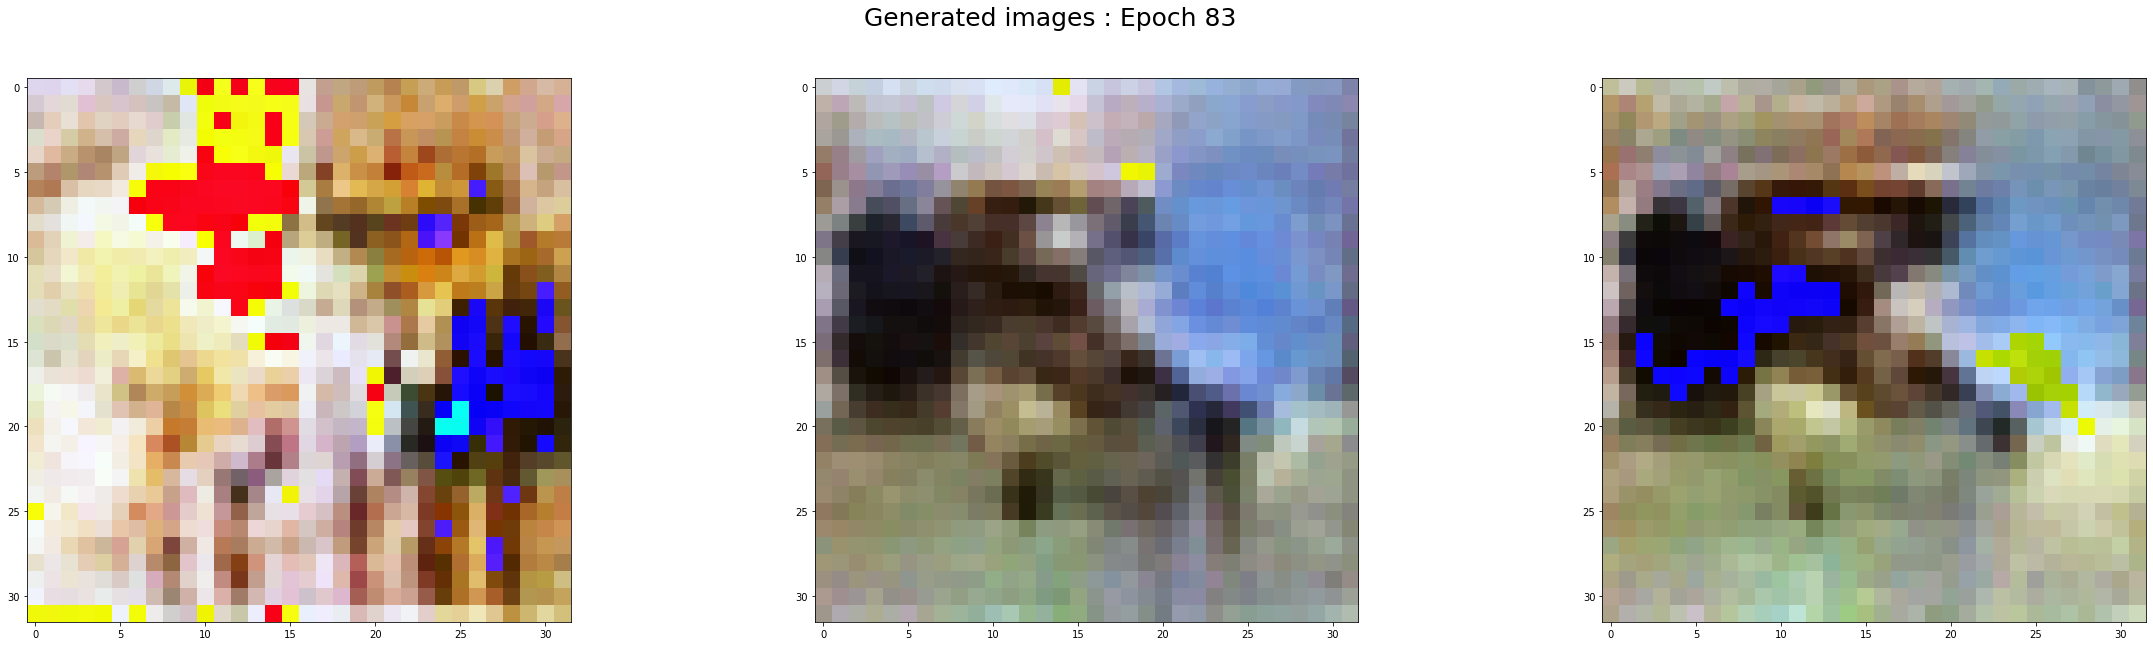

---------------------------------------------------------------
epoch :  84  d_loss =  [0.1886466145515442, 0.9375]  g_loss =  0.8982213735580444


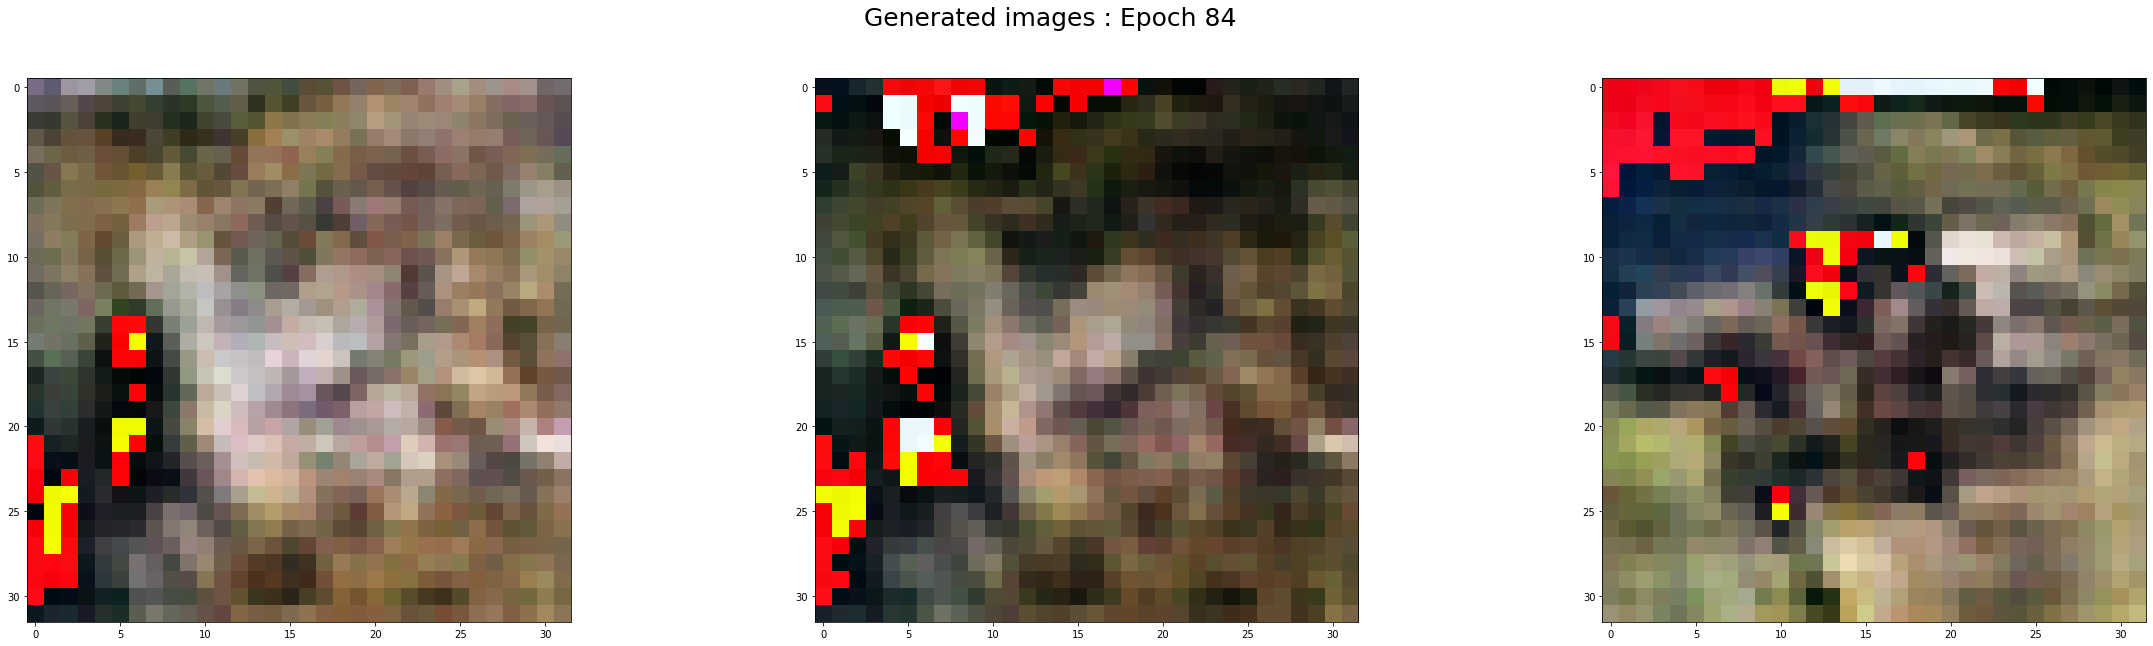

---------------------------------------------------------------
epoch :  85  d_loss =  [0.14214672148227692, 0.9609375]  g_loss =  0.3890589475631714


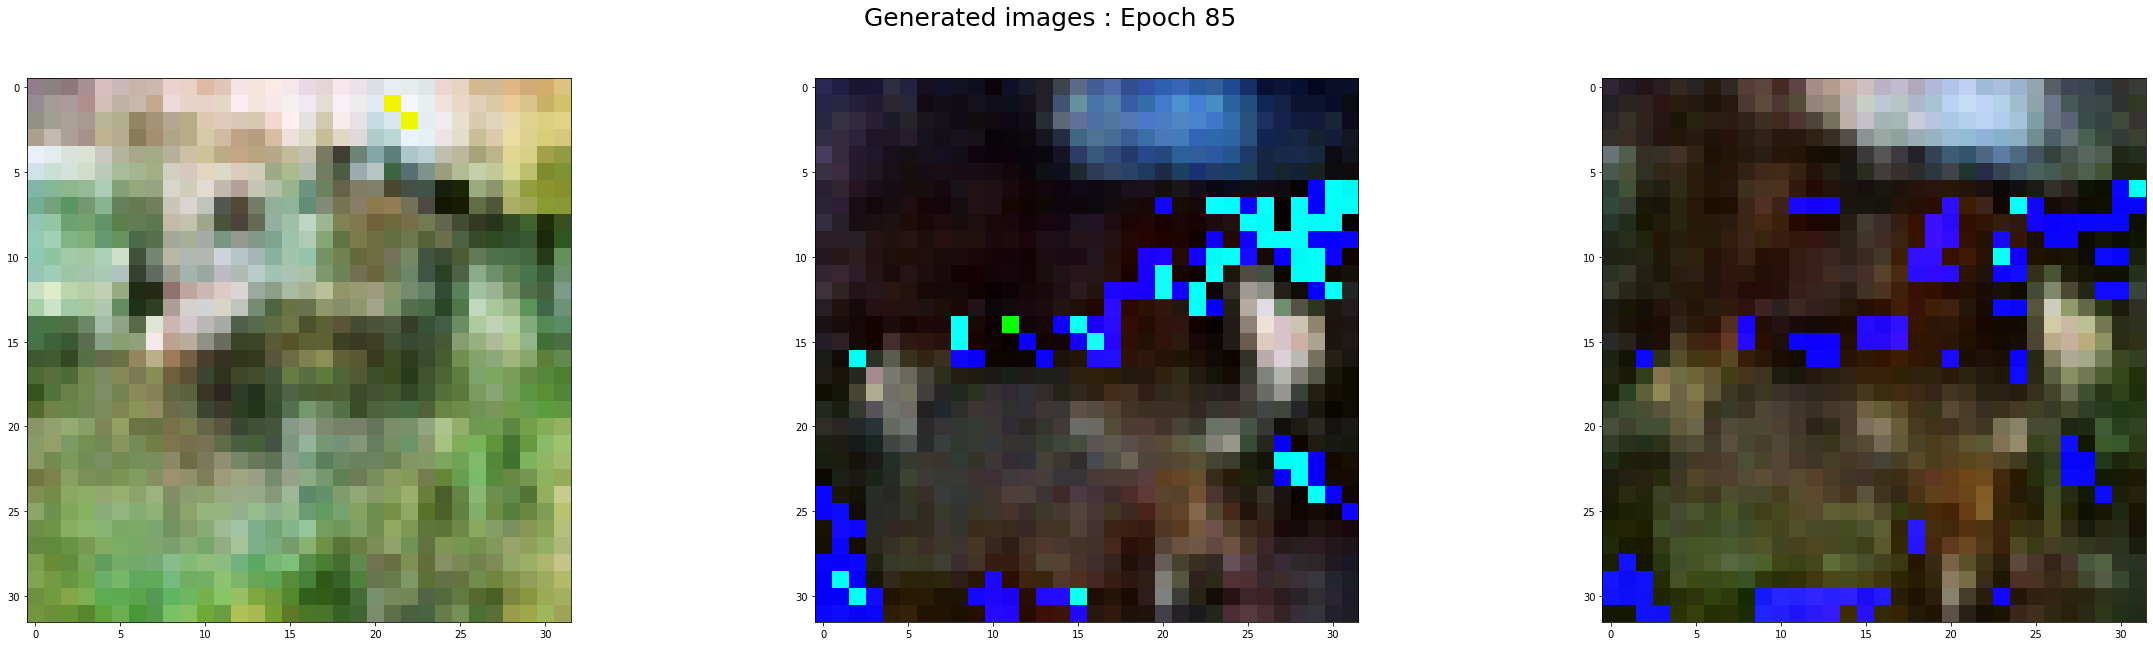

---------------------------------------------------------------
epoch :  86  d_loss =  [0.10489159822463989, 0.96875]  g_loss =  0.7827766537666321


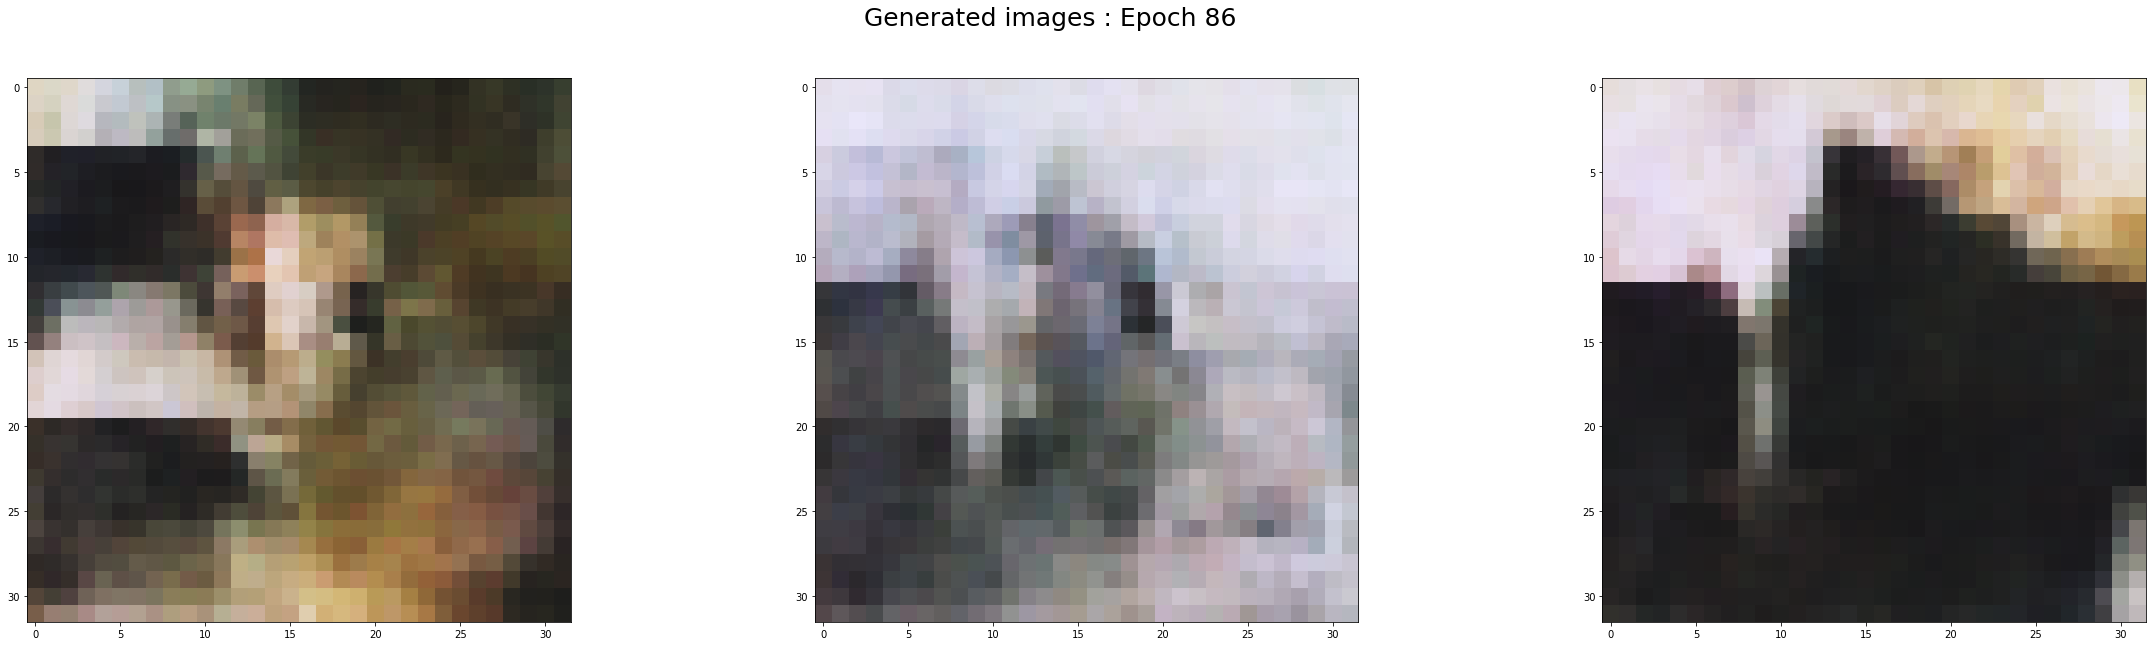

---------------------------------------------------------------
epoch :  87  d_loss =  [0.11105981469154358, 0.98046875]  g_loss =  0.16166485846042633


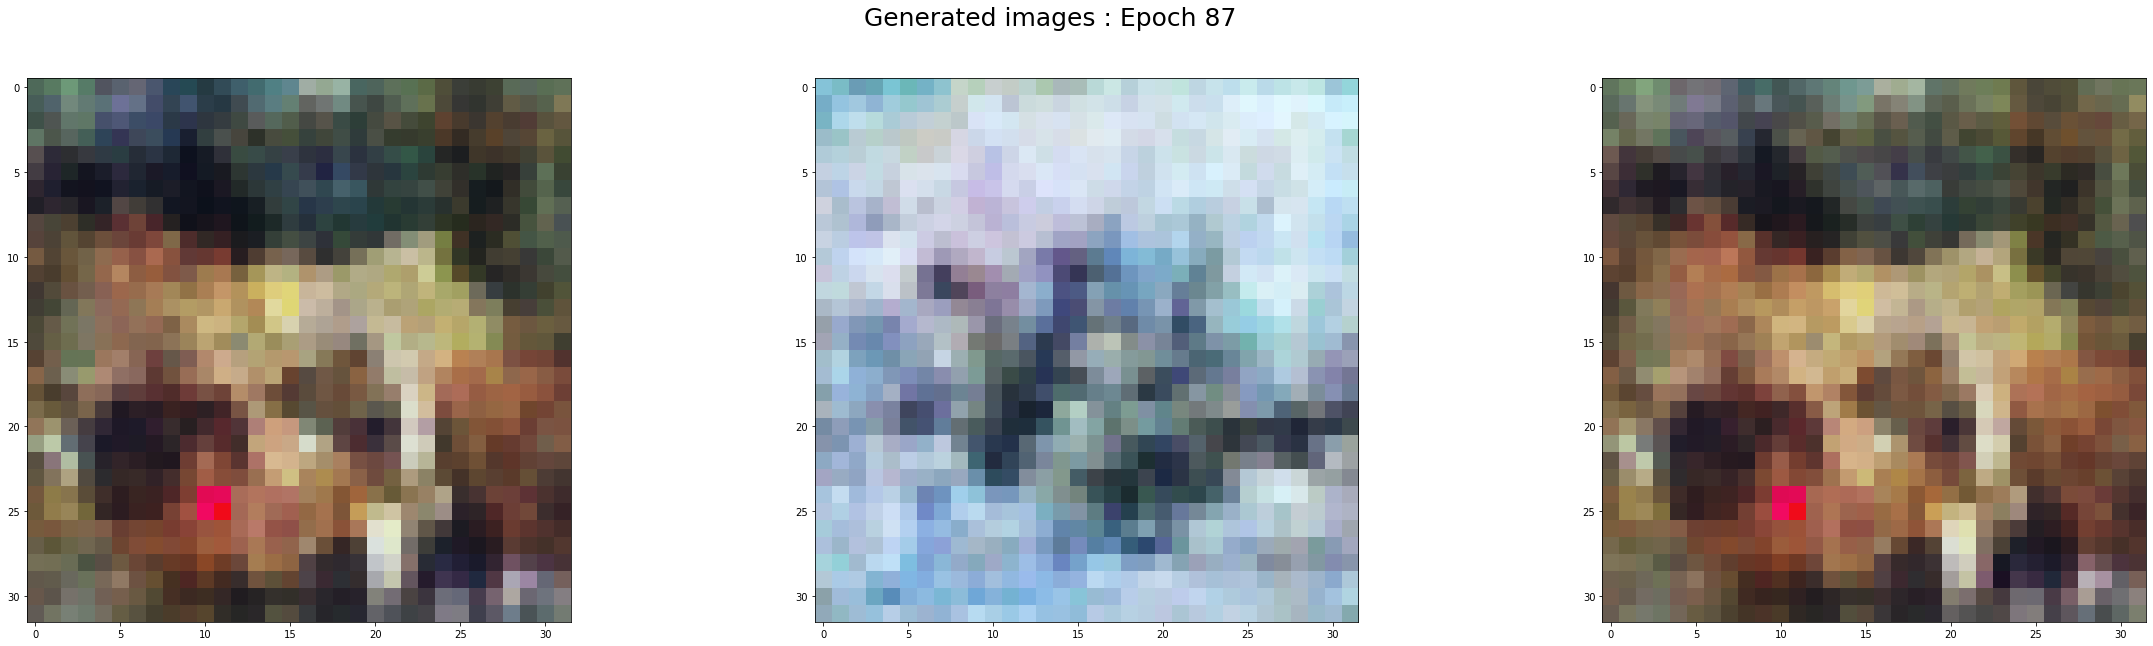

---------------------------------------------------------------
epoch :  88  d_loss =  [0.20650175213813782, 0.9609375]  g_loss =  1.5086255073547363


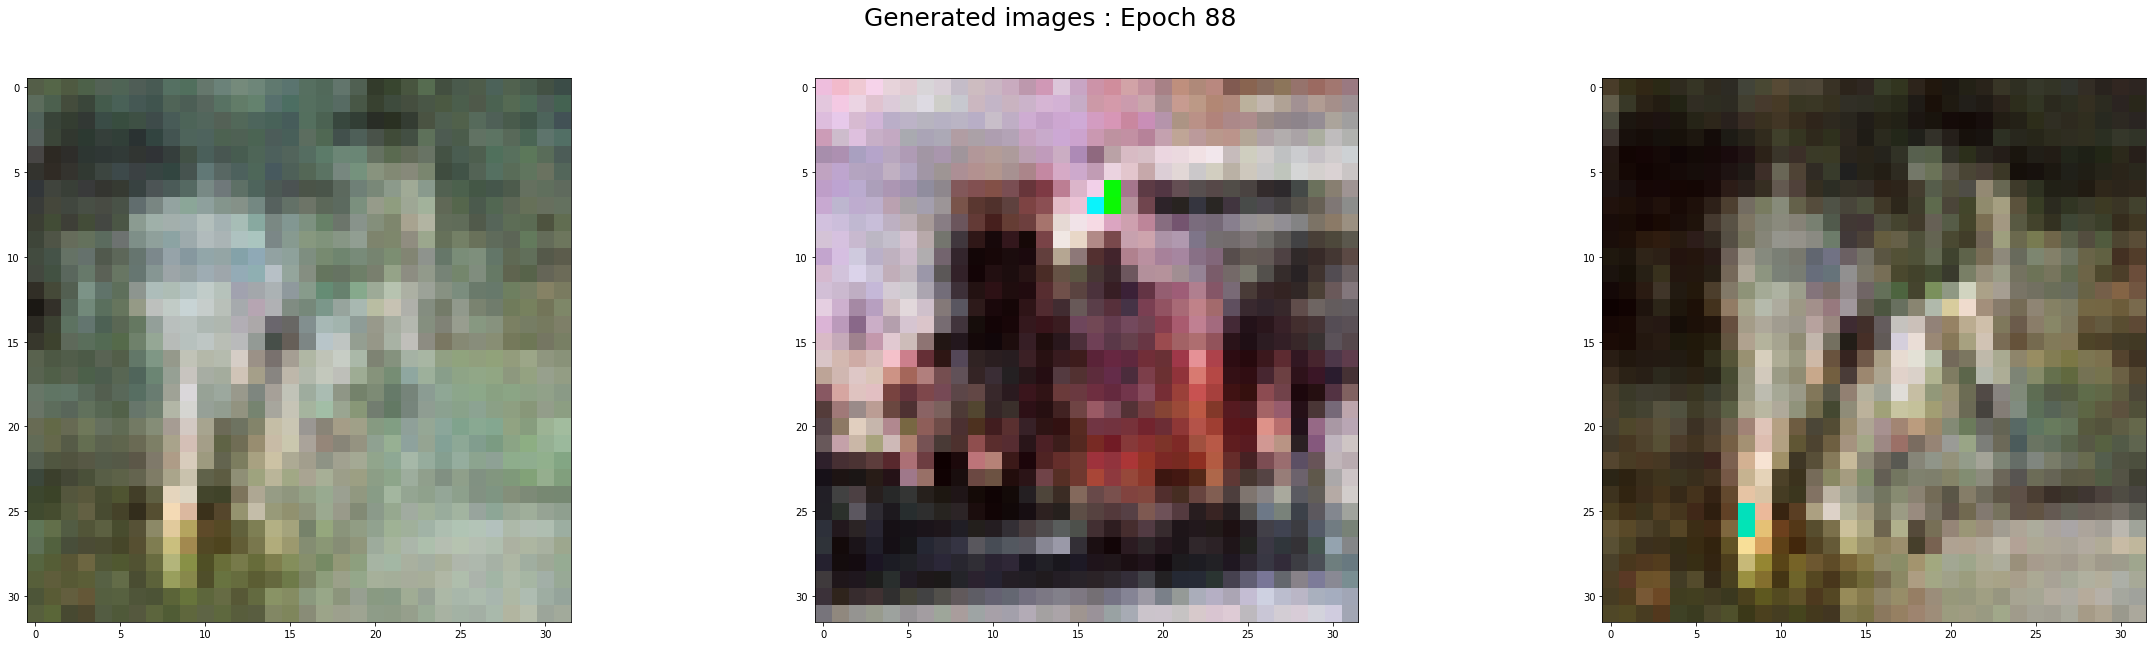

---------------------------------------------------------------
epoch :  89  d_loss =  [0.2695204019546509, 0.90625]  g_loss =  0.511766254901886


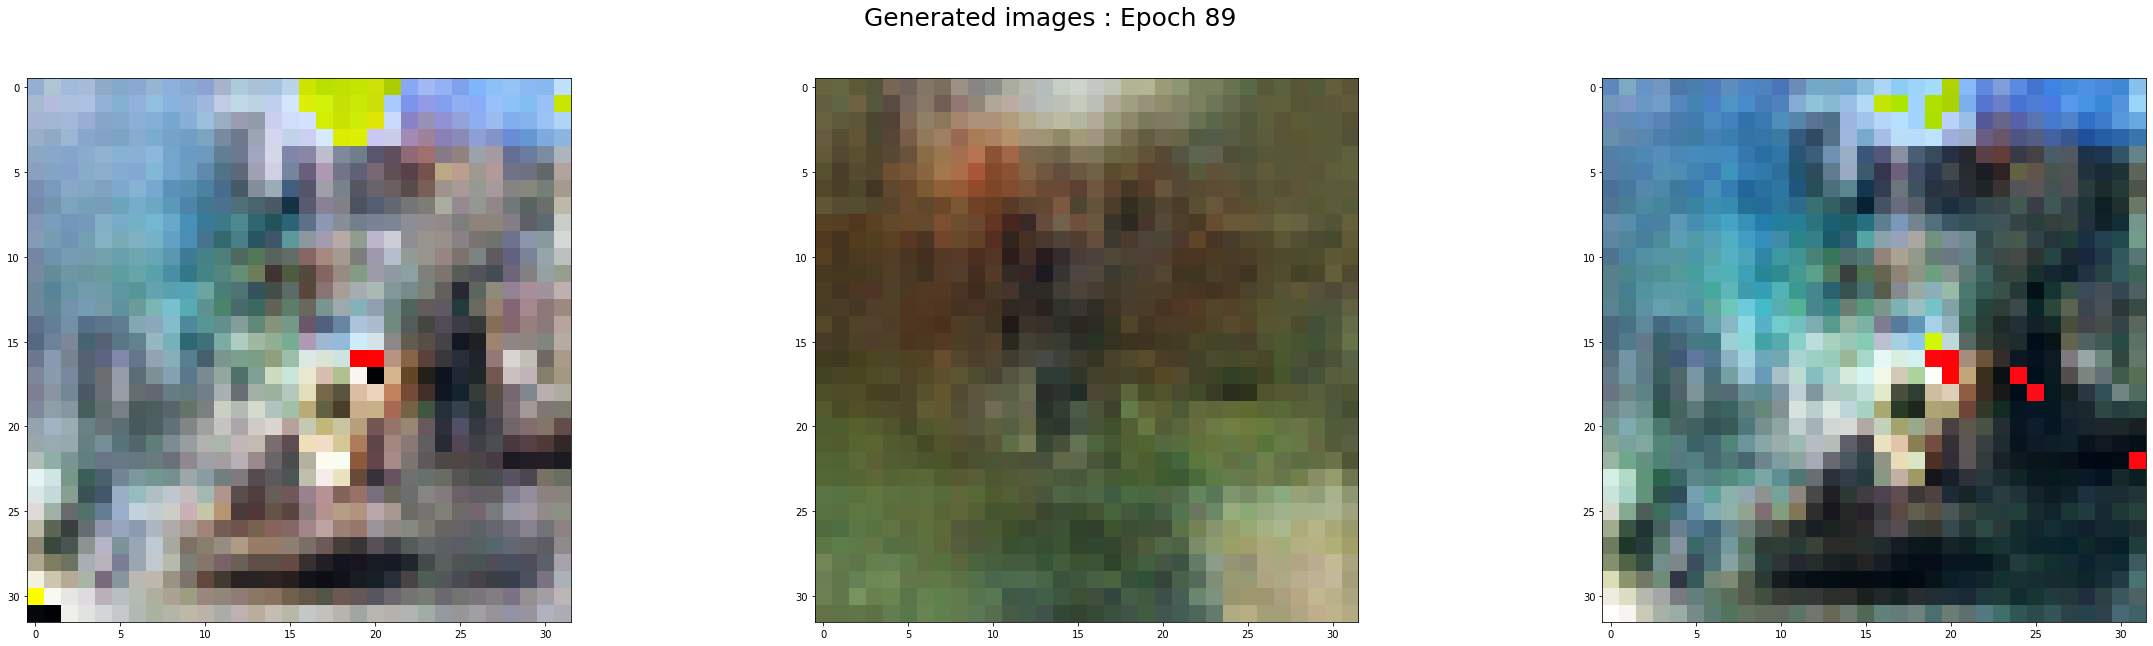

---------------------------------------------------------------
epoch :  90  d_loss =  [0.26357725262641907, 0.8828125]  g_loss =  2.806243896484375


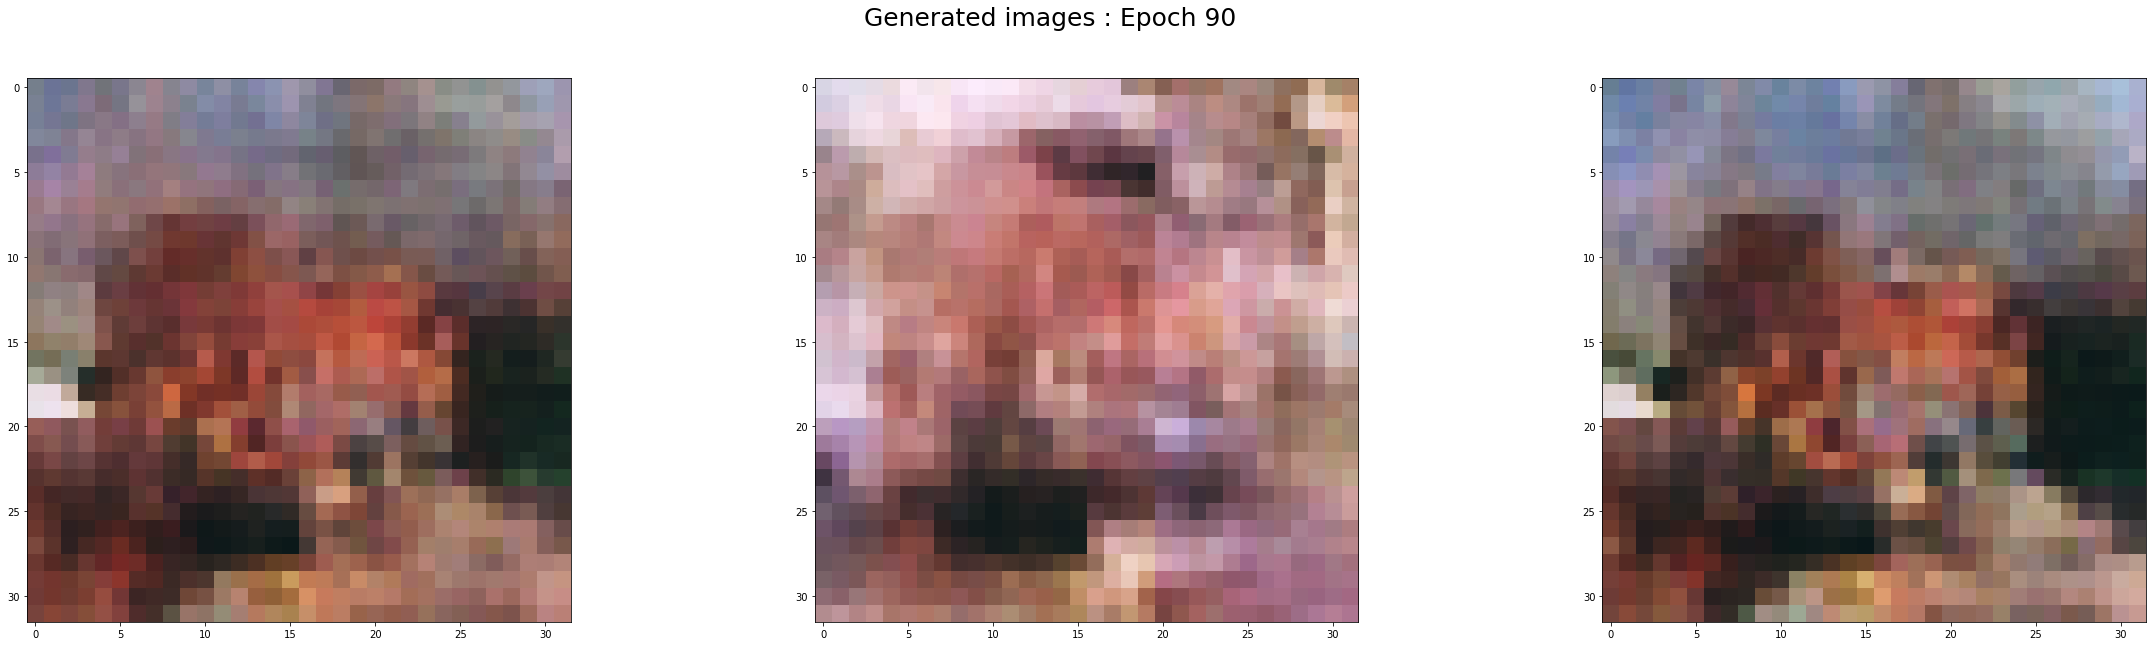

---------------------------------------------------------------
epoch :  91  d_loss =  [0.09442250430583954, 0.97265625]  g_loss =  0.270797461271286


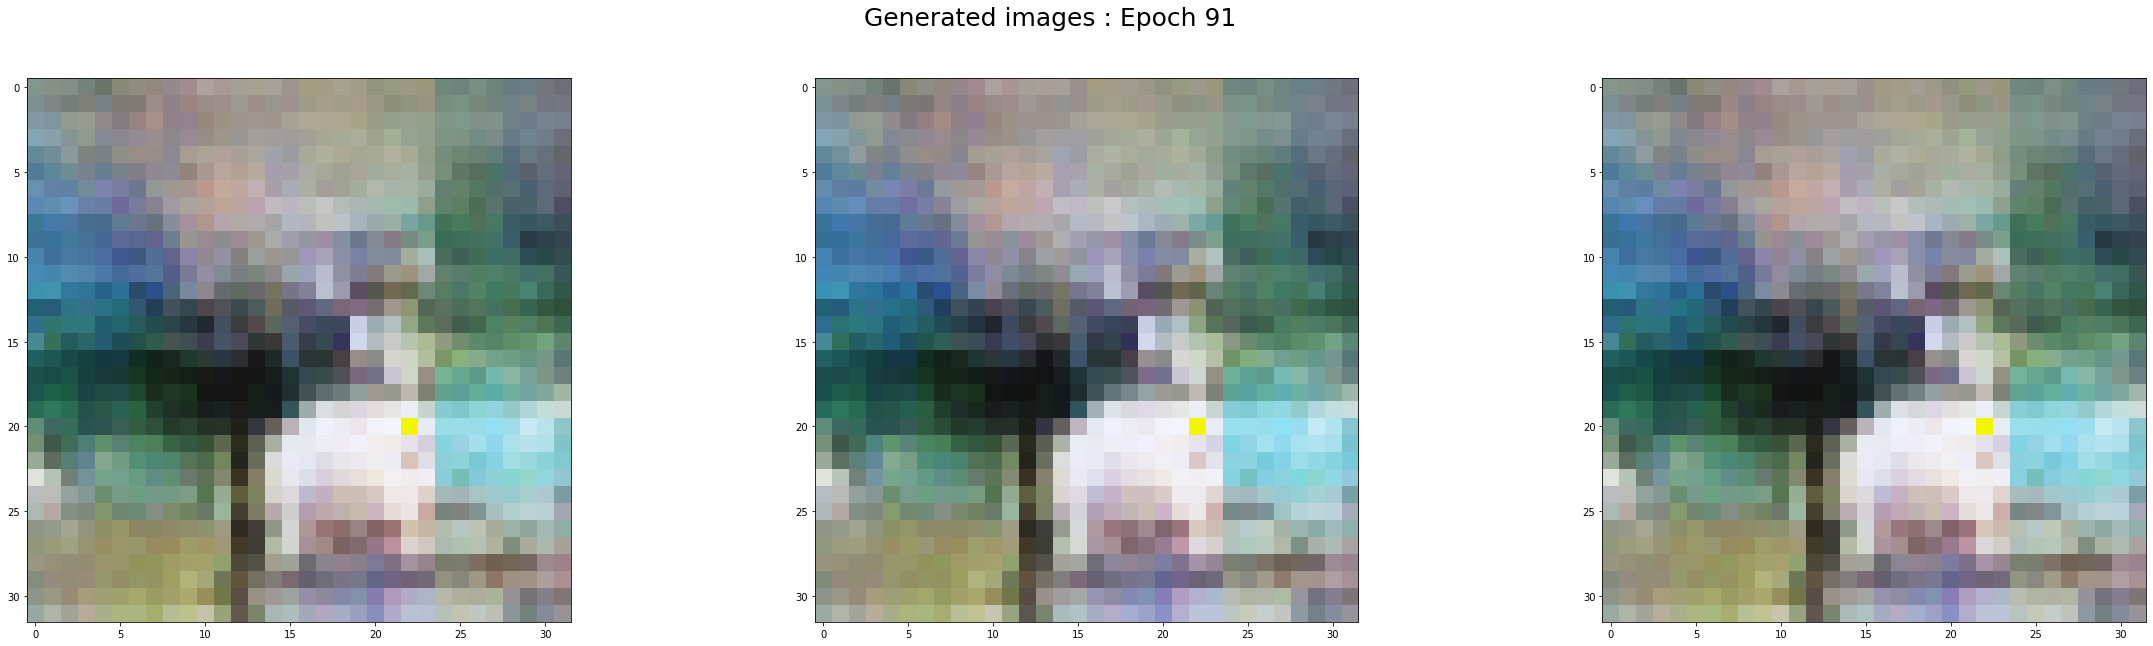

---------------------------------------------------------------
epoch :  92  d_loss =  [0.043700702488422394, 0.98046875]  g_loss =  0.12923045456409454


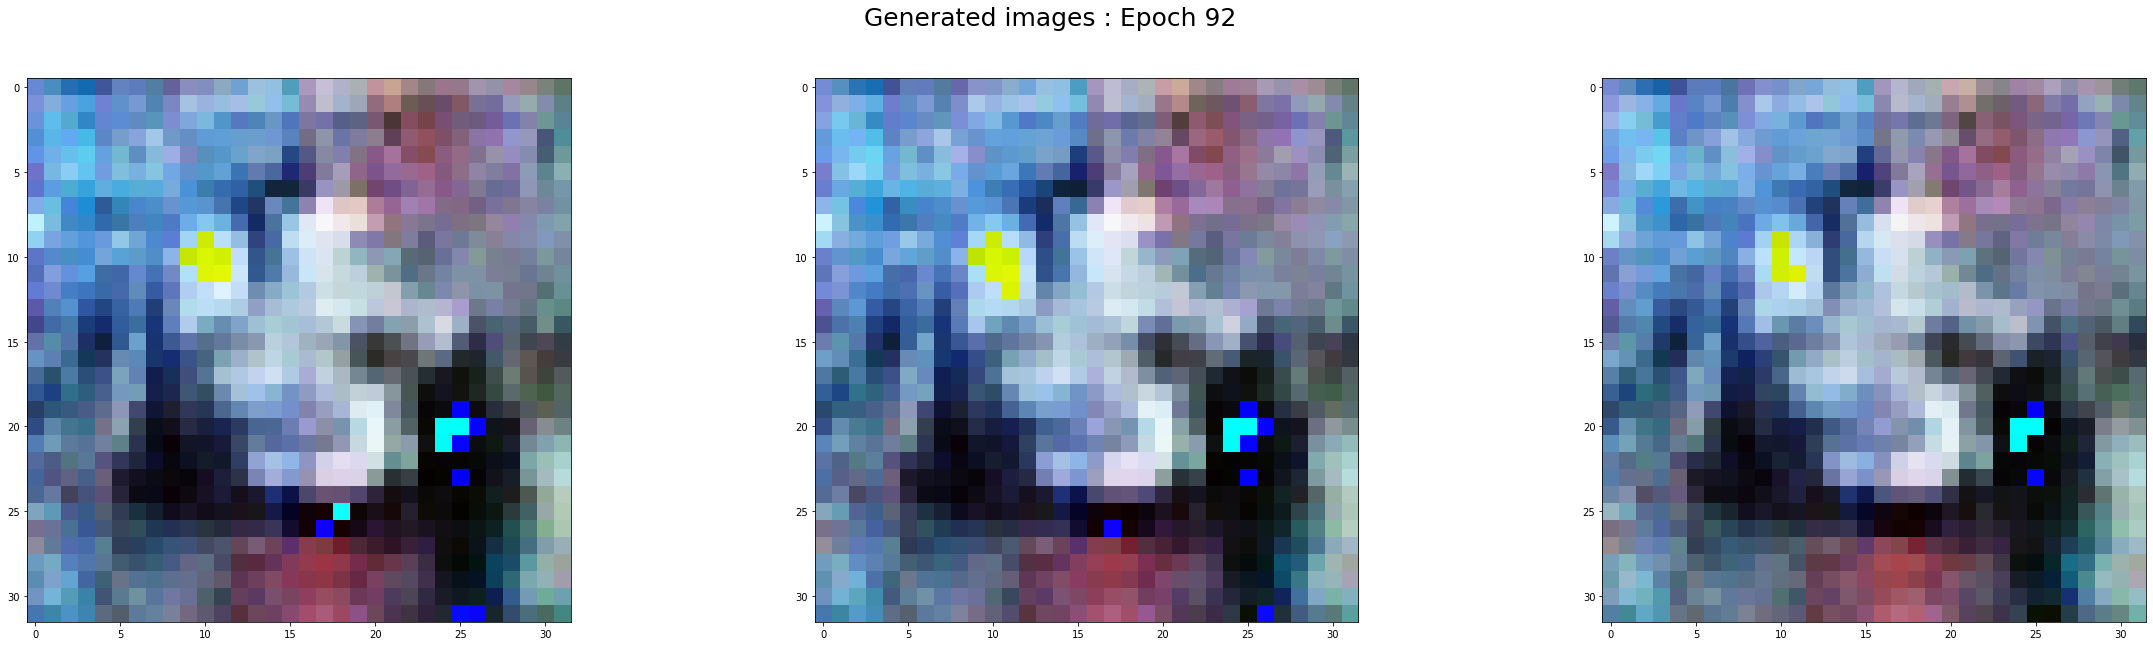

---------------------------------------------------------------
epoch :  93  d_loss =  [0.01920102909207344, 0.99609375]  g_loss =  0.06498724967241287


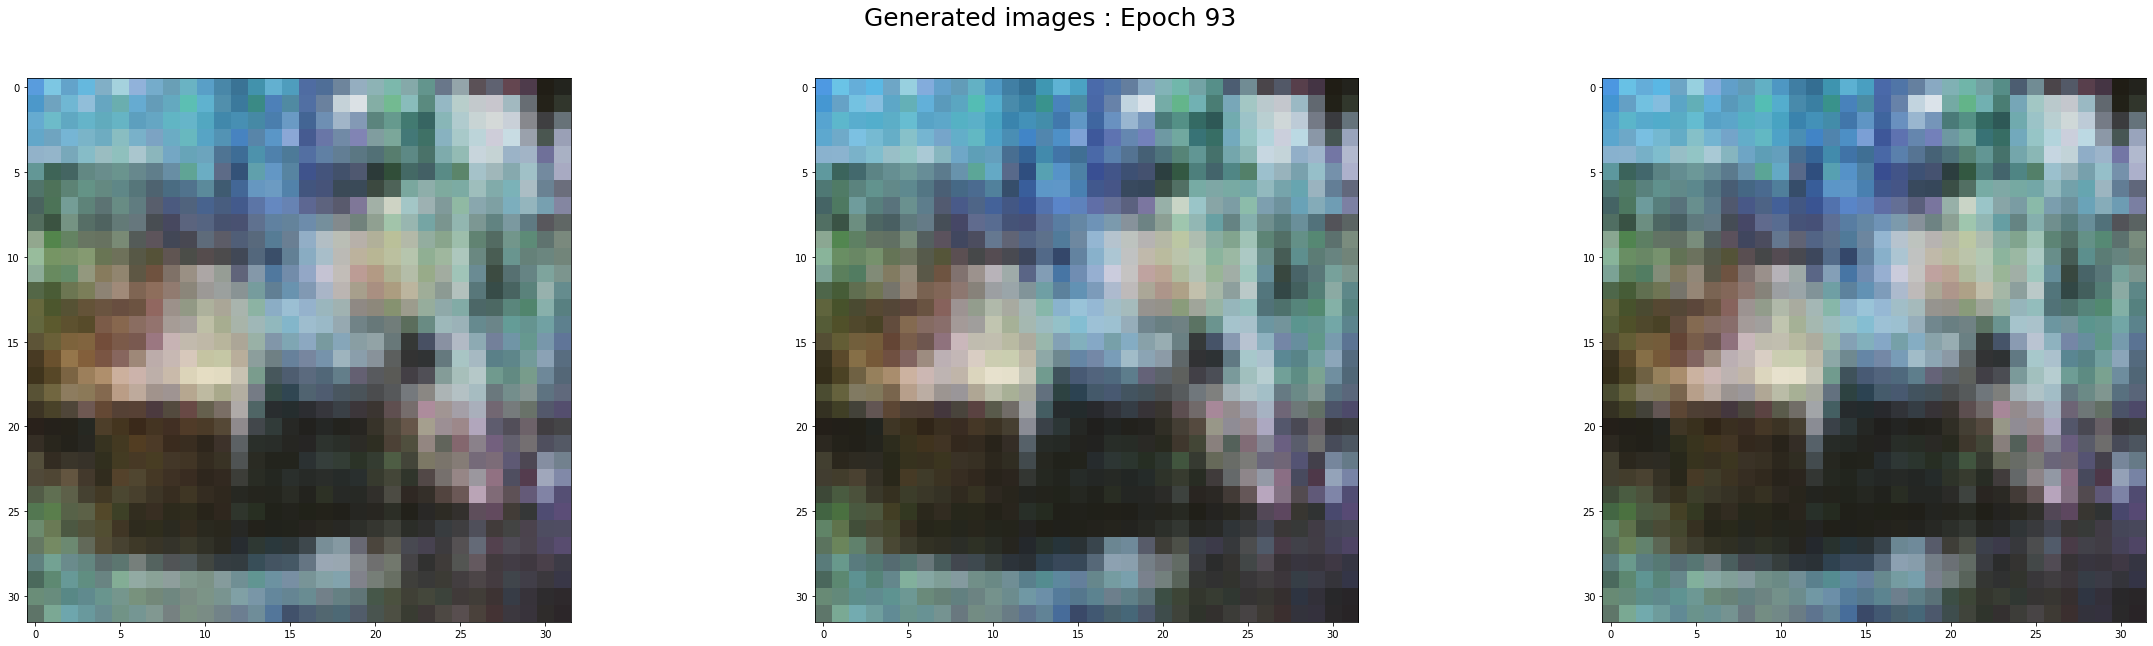

---------------------------------------------------------------
epoch :  94  d_loss =  [0.043988022953271866, 0.9921875]  g_loss =  0.38103604316711426


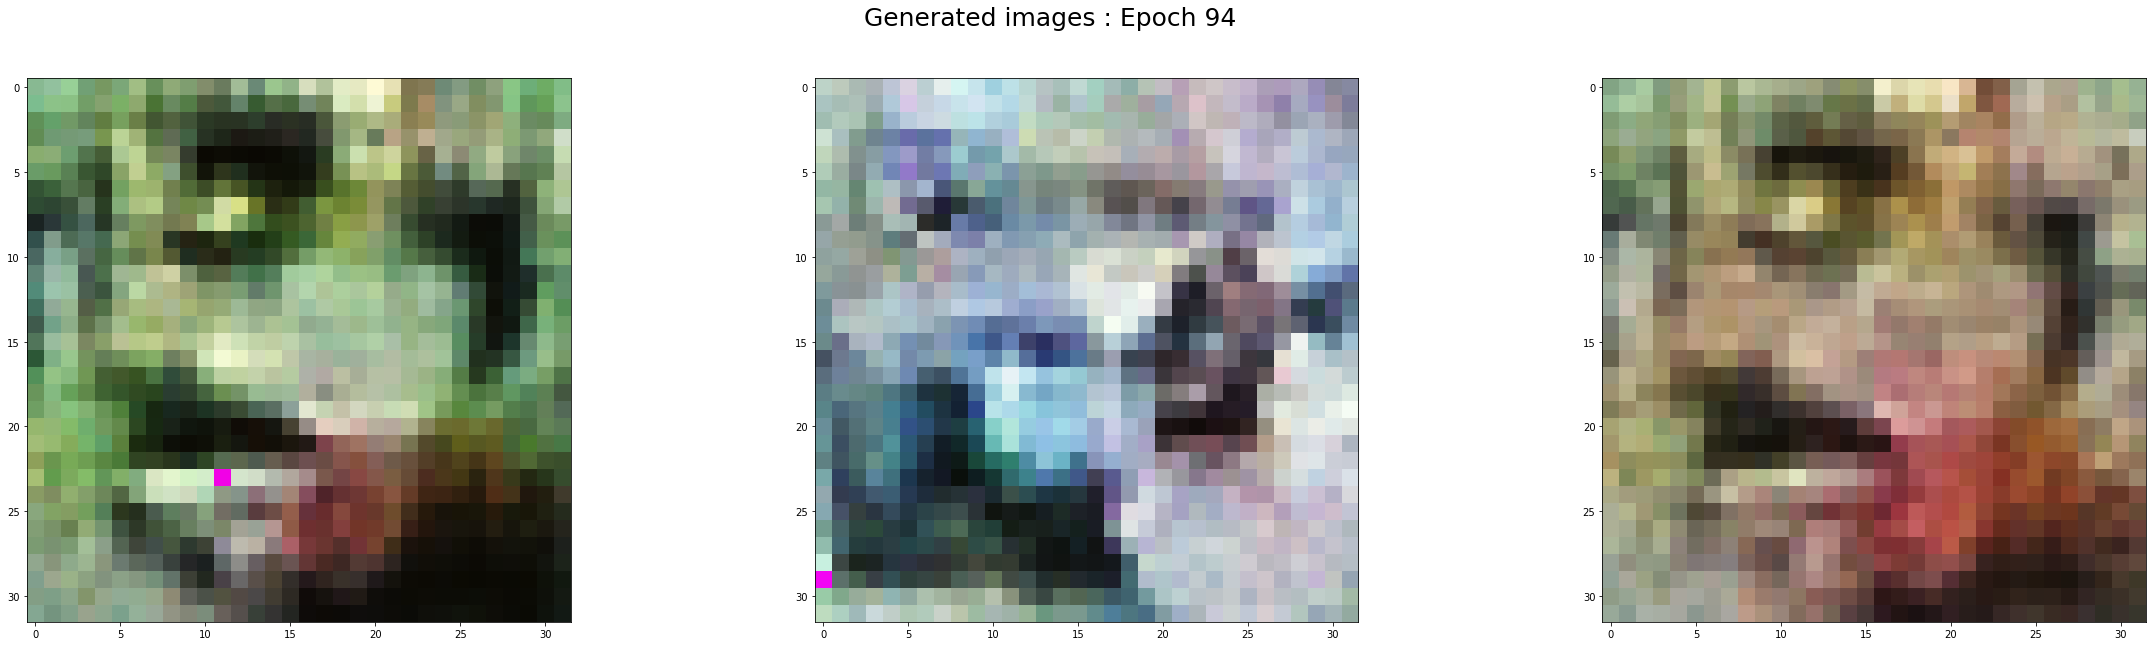

---------------------------------------------------------------
epoch :  95  d_loss =  [0.12685781717300415, 0.94921875]  g_loss =  1.46649169921875


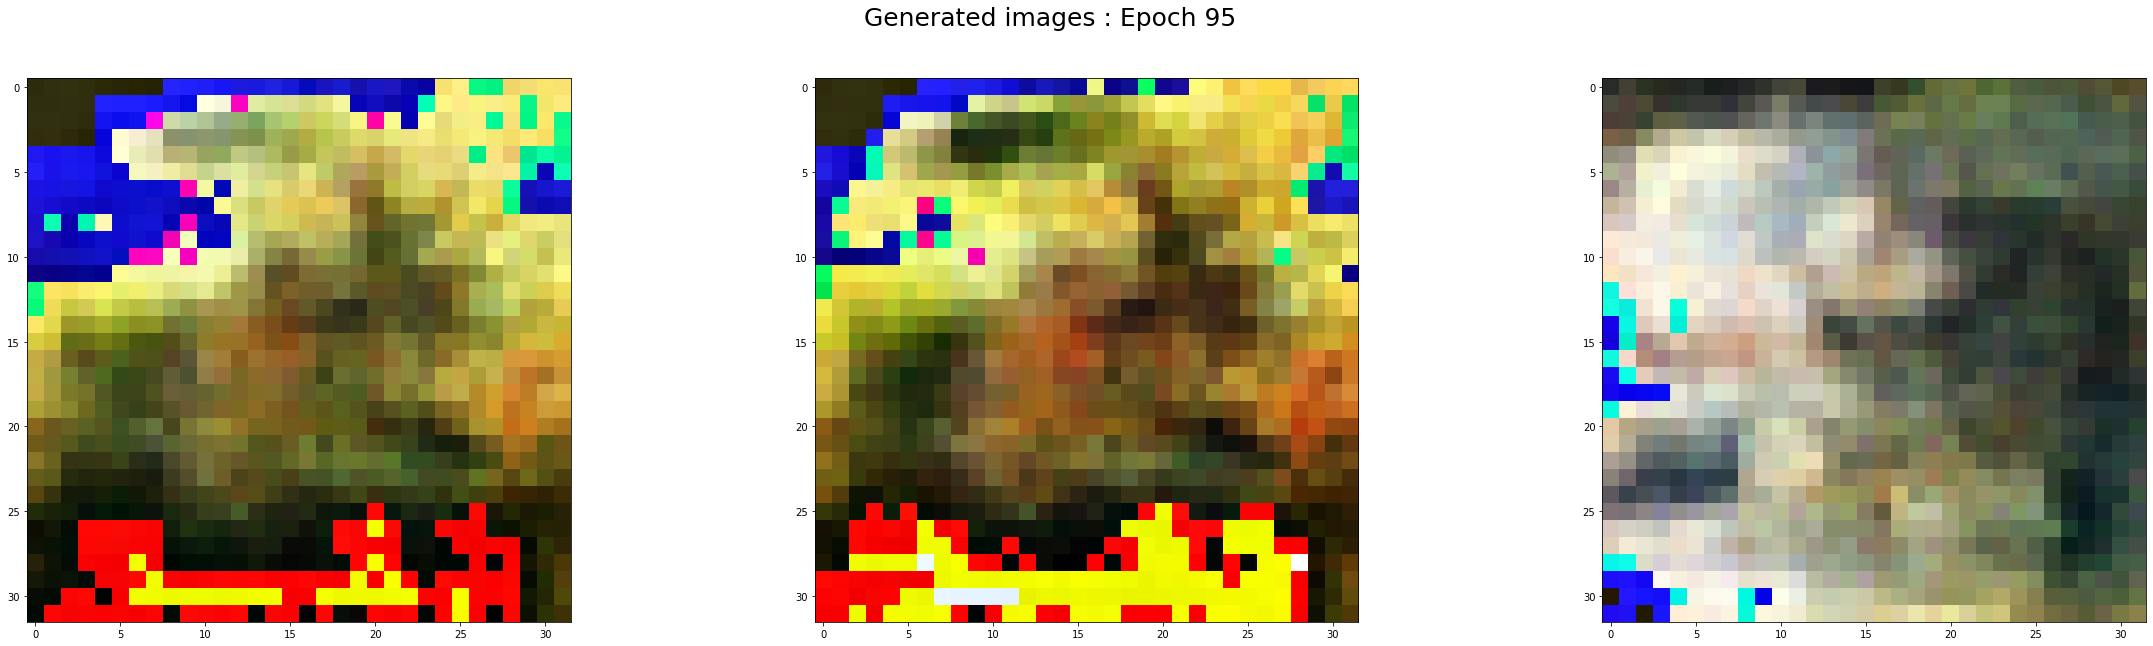

---------------------------------------------------------------
epoch :  96  d_loss =  [0.07726185023784637, 0.97265625]  g_loss =  0.44597017765045166


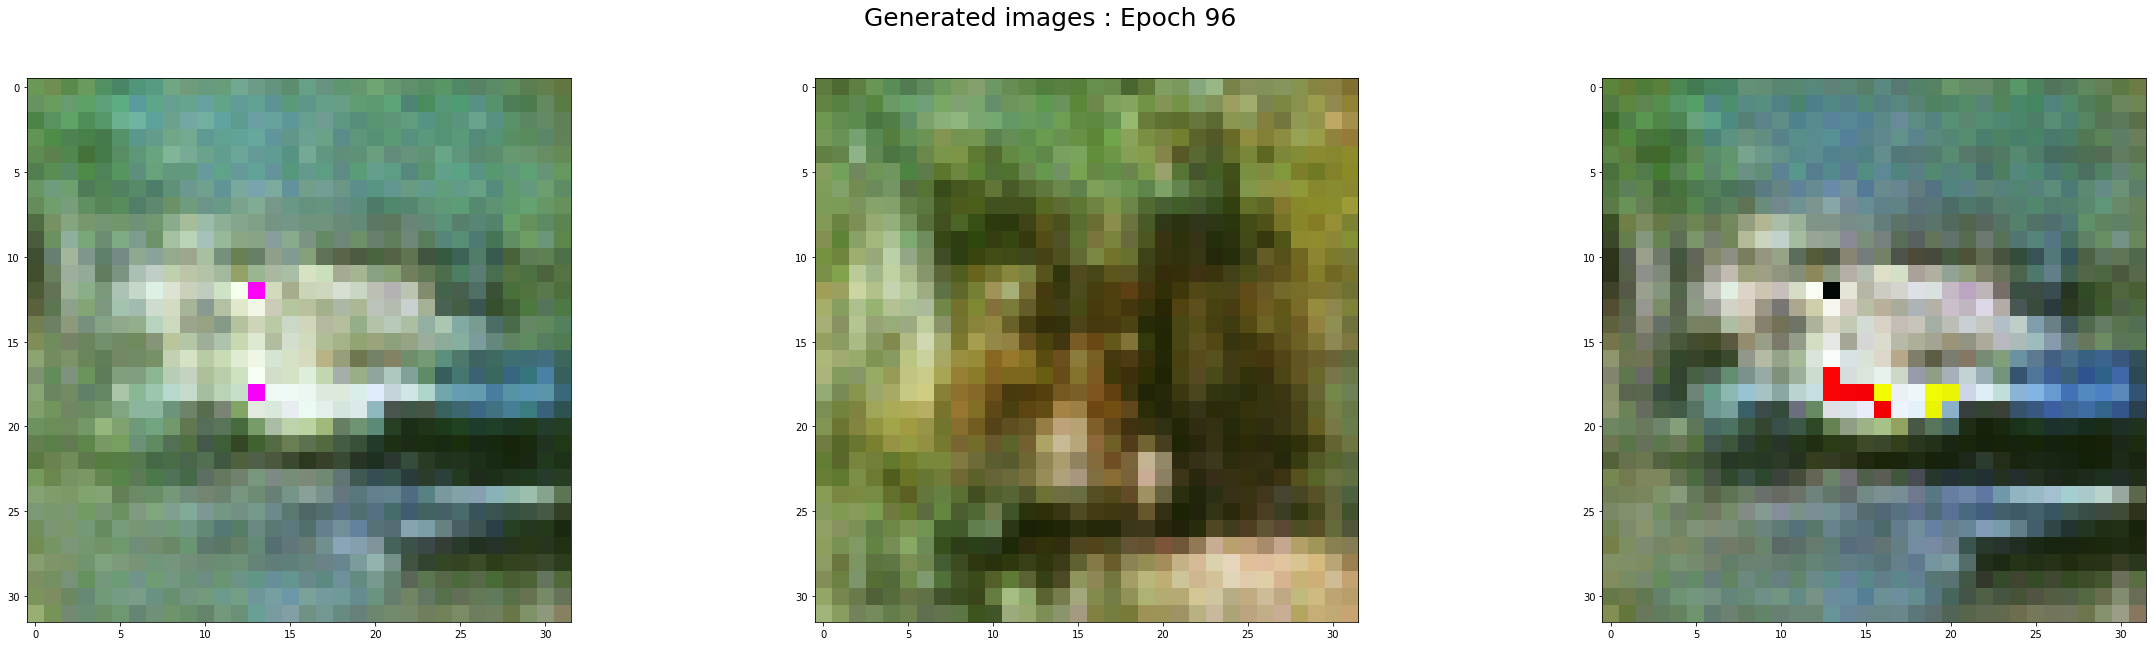

---------------------------------------------------------------
epoch :  97  d_loss =  [0.18011131882667542, 0.94921875]  g_loss =  0.8351389765739441


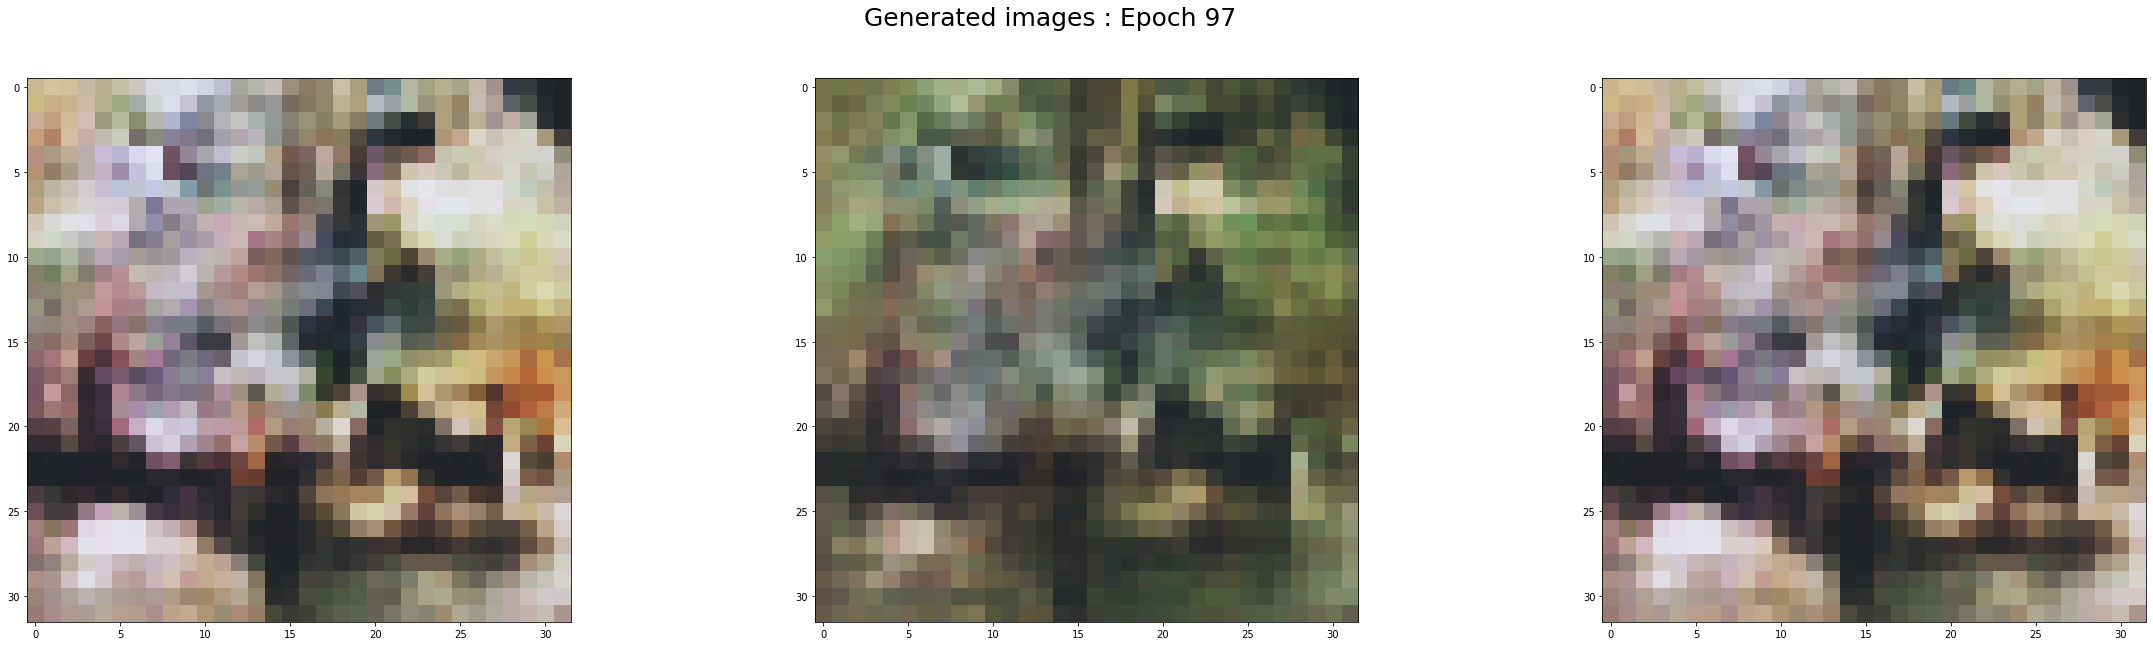

---------------------------------------------------------------
epoch :  98  d_loss =  [0.08539583534002304, 0.96875]  g_loss =  0.6911177039146423


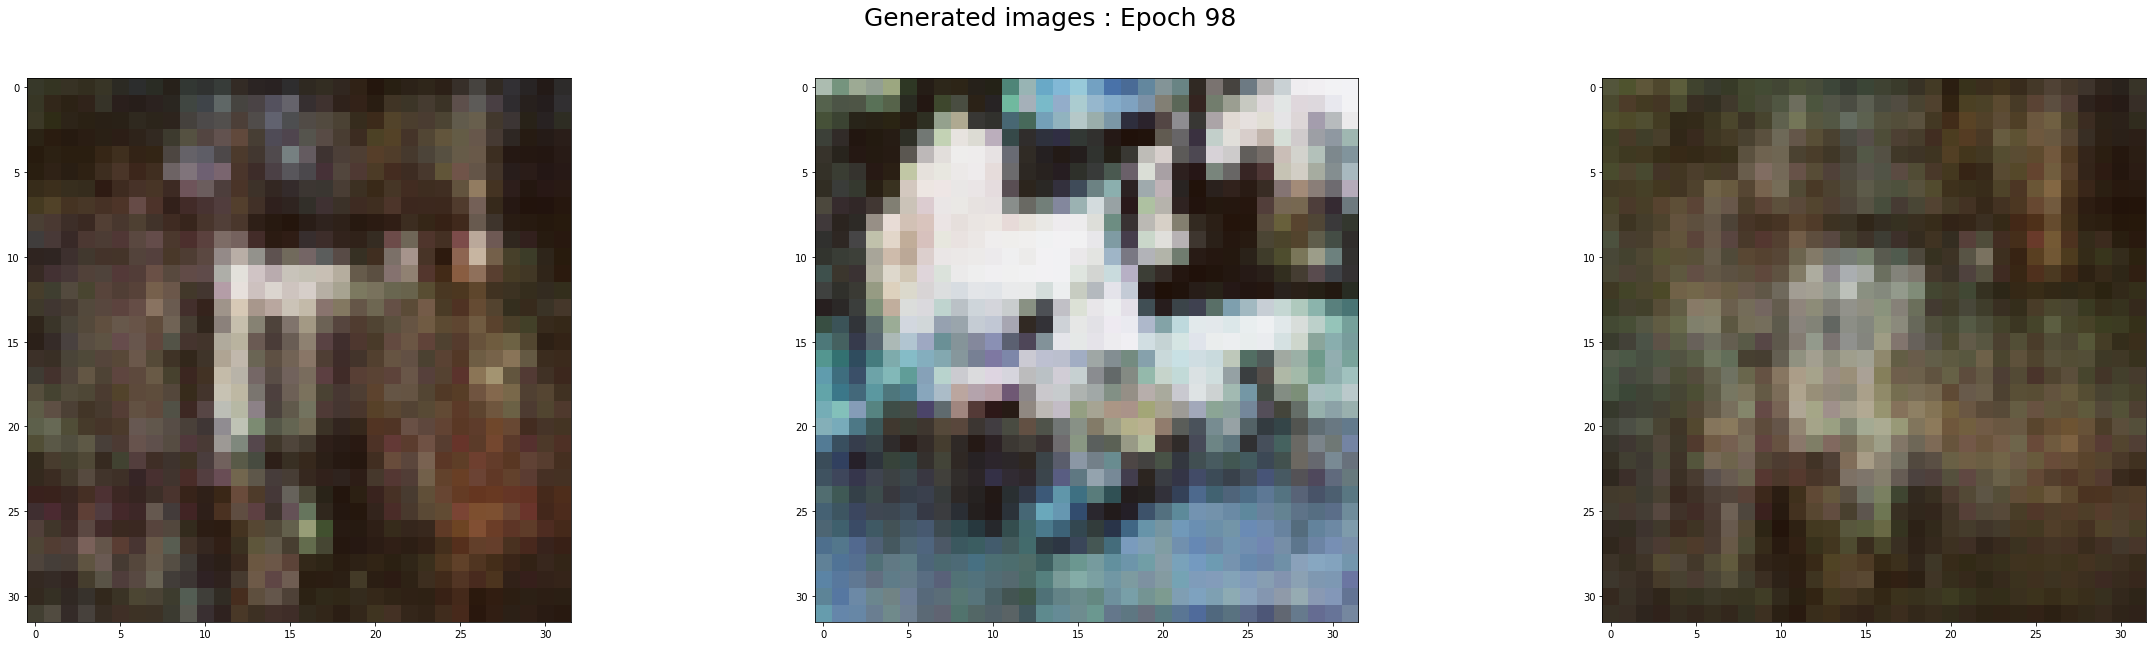

---------------------------------------------------------------
epoch :  99  d_loss =  [0.09077054262161255, 0.9765625]  g_loss =  0.9954840540885925


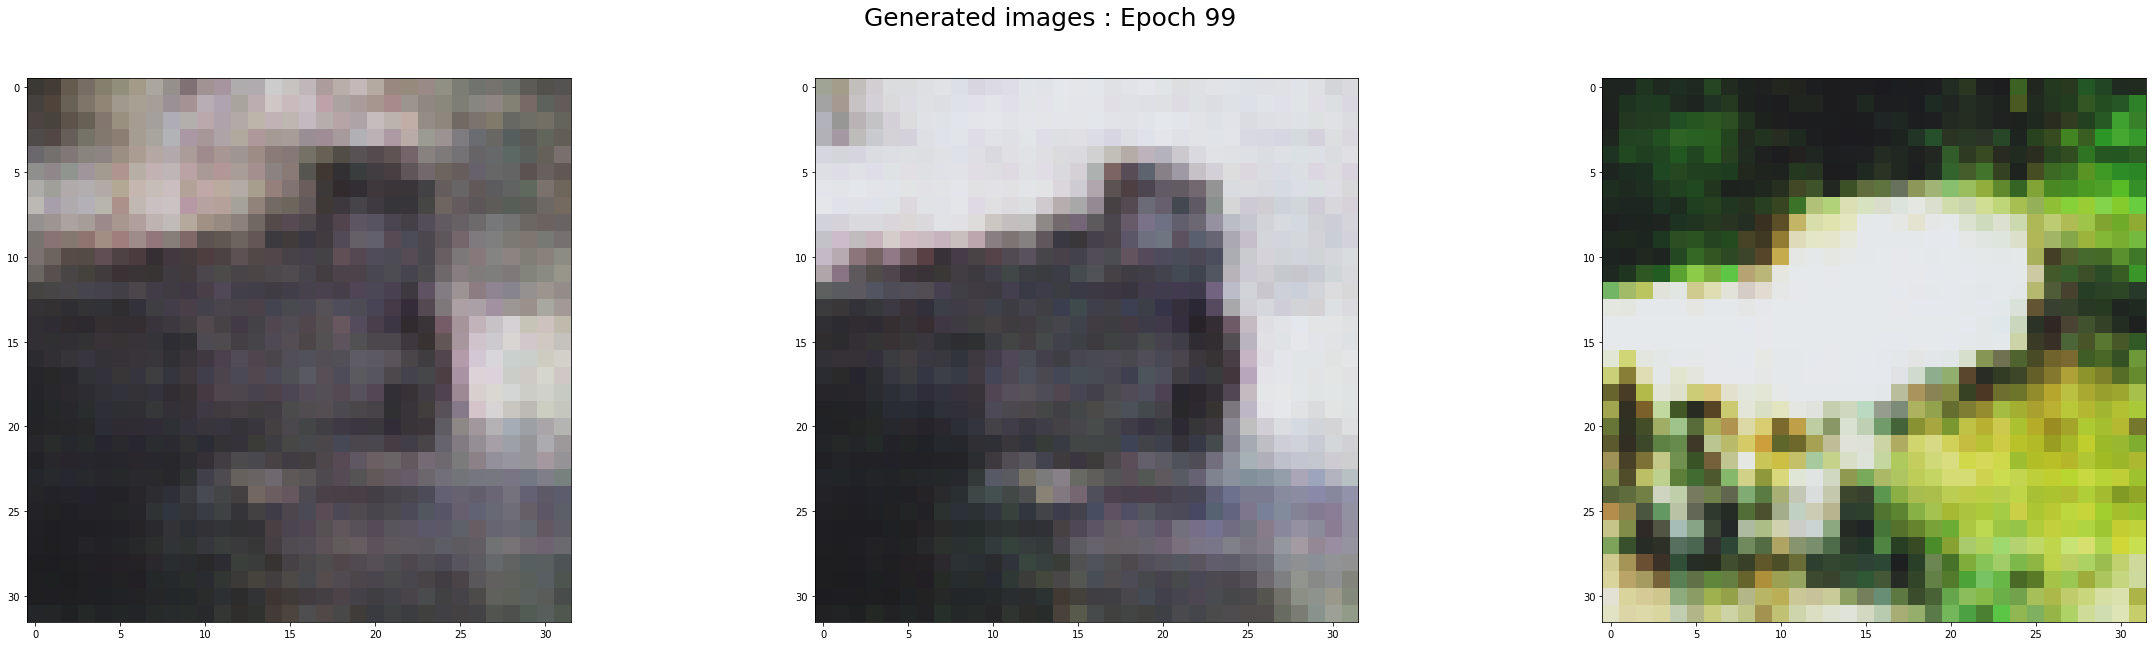

---------------------------------------------------------------


In [ ]:
gan = keras.models.Sequential([generator, discriminator])
# compile gan
opt = keras.optimizers.Adam(lr=0.0002, beta_1=0.5)
gan.compile(loss="binary_crossentropy", optimizer=opt)

# ------------------------------------------------------------------------------
# For creating an animated gif
from PIL import Image
import cv2 
images = []

def animated_gif():
    noise_1 = tf.random.normal(shape=[4, codings_size])
    imgs = generator.predict(noise_1)

    img0 = (imgs[0] * 255).astype(np.uint8)
    img1 = (imgs[1] * 255).astype(np.uint8)
    img2 = (imgs[2] * 255).astype(np.uint8)
    img3 = (imgs[3] * 255).astype(np.uint8)

    img = cv2.hconcat([img0, img1, img2, img3])
    img = Image.fromarray(np.uint8(img)).convert("RGB")
    return img

print("---------------------------------------------------------------")

def train_gan(gan, dataset, batch_size, codings_size, n_epochs):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator.predict(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            d_loss_accuracy = discriminator.train_on_batch(X_fake_and_real, y1)

            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            g_loss = gan.train_on_batch(noise, y2)
        
        
        print("epoch : ",epoch, " d_loss_accuracy  = ",d_loss, " g_loss = ",g_loss)
        plot_generated_images(3,titleadd=" : Epoch {}".format(epoch))
        
        # For creating an animated gif
        img = animated_gif()   
        images.append(img)
        print("---------------------------------------------------------------")
# ------------------------------------------------------------------------------
n_epochs = 100
train_gan(gan, dataset, batch_size, codings_size, n_epochs)

# Create a gif of the generated images at every epoch
images[0].save("/content/gif_image.gif",
               save_all=True, append_images=images[1:], optimize=False, duration=500, loop=0)

# **AttGAN - Arbitrary Facial Attribute Editing: Only Change What You Want**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

In [ ]:
# https://github.com/elvisyjlin/AttGAN-PyTorch
!git clone  https://github.com/elvisyjlin/AttGAN-PyTorch.git

!pip install -r /content/AttGAN-PyTorch/requirements.txt

In [ ]:
%cd /content/AttGAN-PyTorch
#https://www.iloveimg.com/crop-image
#path="/content/gdrive/MyDrive/384_shortcut1_inject1_none_hq_hichem/384_shortcut1_inject1_none_hq/checkpoint/"
#utils.py
# CUDA_VISIBLE_DEVICES=0 \
!python test.py --experiment_name /content/gdrive/MyDrive/384_shortcut1_inject1_none_hq_hichem/384_shortcut1_inject1_none_hq --test_int 1.0  --gpu --custom_img 